In [43]:
import string
import numpy as np
import igraph
import pandas as pd
import csv
import random
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
import distance #for lev, hamming , jaccard

#import sys
#np.set_printoptions(threshold=sys.maxsize)

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



In [44]:
order = ["A", "R", "N", "D", "C", "E", "Q", "G", "H", "I", "L", "K", "M", "F", "P", "S", "T", "W", "Y", "V"] #RANDOM SAMPLE ORDERING, USE YOUR OWN
#order = ["A", "C", "D", "E", "F", "G", "H", "I", "K", "L", "M", "N", "P", "Q", "R", "S", "T", "V", "W", "Y"] #RANDOM SAMPLE ORDERING, USE YOUR OWN


In [45]:
vals= {' ':0} #assign an incremement or decrement to each alphabet letter
id=-((len(order)+1)/2)


vals

{' ': 0}

In [46]:

for i in order:    
    if id == 0:
        print ("entered this loop")
        vals[" "]=id
        print ("sdfjk",vals)
        id+=1
        print("exiting")
    vals[i]=id
    print (id)
    id+=1
print (vals)


-10.5
-9.5
-8.5
-7.5
-6.5
-5.5
-4.5
-3.5
-2.5
-1.5
-0.5
0.5
1.5
2.5
3.5
4.5
5.5
6.5
7.5
8.5
{' ': 0, 'A': -10.5, 'R': -9.5, 'N': -8.5, 'D': -7.5, 'C': -6.5, 'E': -5.5, 'Q': -4.5, 'G': -3.5, 'H': -2.5, 'I': -1.5, 'L': -0.5, 'K': 0.5, 'M': 1.5, 'F': 2.5, 'P': 3.5, 'S': 4.5, 'T': 5.5, 'W': 6.5, 'Y': 7.5, 'V': 8.5}


In [47]:
#extra code

start=0

f = open('data1.csv')
csv_f = csv.reader(f)
with open("dump.txt",'w') as WF:
    for row in csv_f:
        #print (row[1])
        for x in row[1]:
            #print ('x=',x) #printing one letter one by one
            if x in vals:
                    #print (vals[x]) # converting only the capital letters of the word to a number
                    #print (vals[x],"+",start,"=",start+vals[x]) #printing the added values
                    start+=vals[x] #adding the converted numbers
            else:
                    #print (start)
                    #print ("entered else:",start ,"+", vals[" "],"=",start+vals[" "]) # handling encounter of other letters 
                    start+=vals[" "]
            WF.write(str(start)+" ")

#### DATA 1 - Converting to time series

In [48]:
#DATA 1
#using normal array methods
#WORKING 

f = open('data1.csv')
csv_f = csv.reader(f)

a = []
with open('data1_our_TimeSeries.csv','w',newline='') as cf:  #newline='' lets us write without adding an extra line betweeen rows
    for row[1] in csv_f:
        print (row[1])
        for col in csv_f:
                print (col[1])
                d = []
                
                for x in col[1]:
                    print (x)
                    c = vals[x]
                    a =d.append(c)
                print (d)
                wr = csv.writer(cf,lineterminator='\r')
                wr.writerow(d)

['name', ' sequence', ' source']
DDSSSASGQQQESSVSSQSEASTSSQLG
D
D
S
S
S
A
S
G
Q
Q
Q
E
S
S
V
S
S
Q
S
E
A
S
T
S
S
Q
L
G
[-7.5, -7.5, 4.5, 4.5, 4.5, -10.5, 4.5, -3.5, -4.5, -4.5, -4.5, -5.5, 4.5, 4.5, 8.5, 4.5, 4.5, -4.5, 4.5, -5.5, -10.5, 4.5, 5.5, 4.5, 4.5, -4.5, -0.5, -3.5]
ADSSSAGGQQQESSVSSQSDQASTSSQLG
A
D
S
S
S
A
G
G
Q
Q
Q
E
S
S
V
S
S
Q
S
D
Q
A
S
T
S
S
Q
L
G
[-10.5, -7.5, 4.5, 4.5, 4.5, -10.5, -3.5, -3.5, -4.5, -4.5, -4.5, -5.5, 4.5, 4.5, 8.5, 4.5, 4.5, -4.5, 4.5, -7.5, -4.5, -10.5, 4.5, 5.5, 4.5, 4.5, -4.5, -0.5, -3.5]
ADSSSAGGQQQESSVSSQSGQASTSSQLG
A
D
S
S
S
A
G
G
Q
Q
Q
E
S
S
V
S
S
Q
S
G
Q
A
S
T
S
S
Q
L
G
[-10.5, -7.5, 4.5, 4.5, 4.5, -10.5, -3.5, -3.5, -4.5, -4.5, -4.5, -5.5, 4.5, 4.5, 8.5, 4.5, 4.5, -4.5, 4.5, -3.5, -4.5, -10.5, 4.5, 5.5, 4.5, 4.5, -4.5, -0.5, -3.5]
ADSSSASGQQQESSVSSQSEASTSSQLGG
A
D
S
S
S
A
S
G
Q
Q
Q
E
S
S
V
S
S
Q
S
E
A
S
T
S
S
Q
L
G
G
[-10.5, -7.5, 4.5, 4.5, 4.5, -10.5, 4.5, -3.5, -4.5, -4.5, -4.5, -5.5, 4.5, 4.5, 8.5, 4.5, 4.5, -4.5, 4.5, -5.5, -10.5, 4.5, 5.5, 4

D
Q
Q
Q
E
S
G
V
L
S
Q
S
G
Q
A
S
T
S
S
Q
L
G
[-10.5, -7.5, 4.5, 4.5, 4.5, -10.5, -3.5, -7.5, -4.5, -4.5, -4.5, -5.5, 4.5, -3.5, 8.5, -0.5, 4.5, -4.5, 4.5, -3.5, -4.5, -10.5, 4.5, 5.5, 4.5, 4.5, -4.5, -0.5, -3.5]
ADSSSAGDQQQESSVLSQSGQASTSSQLG
A
D
S
S
S
A
G
D
Q
Q
Q
E
S
S
V
L
S
Q
S
G
Q
A
S
T
S
S
Q
L
G
[-10.5, -7.5, 4.5, 4.5, 4.5, -10.5, -3.5, -7.5, -4.5, -4.5, -4.5, -5.5, 4.5, 4.5, 8.5, -0.5, 4.5, -4.5, 4.5, -3.5, -4.5, -10.5, 4.5, 5.5, 4.5, 4.5, -4.5, -0.5, -3.5]
ADSSSASGQQQESSVLSPSGQASTSSQLS
A
D
S
S
S
A
S
G
Q
Q
Q
E
S
S
V
L
S
P
S
G
Q
A
S
T
S
S
Q
L
S
[-10.5, -7.5, 4.5, 4.5, 4.5, -10.5, 4.5, -3.5, -4.5, -4.5, -4.5, -5.5, 4.5, 4.5, 8.5, -0.5, 4.5, 3.5, 4.5, -3.5, -4.5, -10.5, 4.5, 5.5, 4.5, 4.5, -4.5, -0.5, 4.5]
TDSSSASGQQQKSSVLSQSSQASTSSQLG
T
D
S
S
S
A
S
G
Q
Q
Q
K
S
S
V
L
S
Q
S
S
Q
A
S
T
S
S
Q
L
G
[5.5, -7.5, 4.5, 4.5, 4.5, -10.5, 4.5, -3.5, -4.5, -4.5, -4.5, 0.5, 4.5, 4.5, 8.5, -0.5, 4.5, -4.5, 4.5, 4.5, -4.5, -10.5, 4.5, 5.5, 4.5, 4.5, -4.5, -0.5, -3.5]
ADSSSAGNQQQESSVLPQSGQASTSSQLS
A
D
S

A
S
T
S
S
Q
L
W
[5.5, -7.5, 4.5, 4.5, 4.5, -10.5, 4.5, -3.5, -4.5, -2.5, -4.5, -5.5, 4.5, -1.5, 8.5, 4.5, 4.5, -4.5, 4.5, -5.5, -10.5, 4.5, 5.5, 4.5, 4.5, -4.5, -0.5, 6.5]
TDGSSASGQQQESSVLSQSDEASTSSQLG
T
D
G
S
S
A
S
G
Q
Q
Q
E
S
S
V
L
S
Q
S
D
E
A
S
T
S
S
Q
L
G
[5.5, -7.5, -3.5, 4.5, 4.5, -10.5, 4.5, -3.5, -4.5, -4.5, -4.5, -5.5, 4.5, 4.5, 8.5, -0.5, 4.5, -4.5, 4.5, -7.5, -5.5, -10.5, 4.5, 5.5, 4.5, 4.5, -4.5, -0.5, -3.5]
TDGSSASGQQQESSVLSQSDEASTSSQSG
T
D
G
S
S
A
S
G
Q
Q
Q
E
S
S
V
L
S
Q
S
D
E
A
S
T
S
S
Q
S
G
[5.5, -7.5, -3.5, 4.5, 4.5, -10.5, 4.5, -3.5, -4.5, -4.5, -4.5, -5.5, 4.5, 4.5, 8.5, -0.5, 4.5, -4.5, 4.5, -7.5, -5.5, -10.5, 4.5, 5.5, 4.5, 4.5, -4.5, 4.5, -3.5]
ADGSSAGDQQQESSVSSQSGASTSSQLG
A
D
G
S
S
A
G
D
Q
Q
Q
E
S
S
V
S
S
Q
S
G
A
S
T
S
S
Q
L
G
[-10.5, -7.5, -3.5, 4.5, 4.5, -10.5, -3.5, -7.5, -4.5, -4.5, -4.5, -5.5, 4.5, 4.5, 8.5, 4.5, 4.5, -4.5, 4.5, -3.5, -10.5, 4.5, 5.5, 4.5, 4.5, -4.5, -0.5, -3.5]
TDSSSAGDQQQESSVSSQSGASTSSQLG
T
D
S
S
S
A
G
D
Q
Q
Q
E
S
S
V
S
S
Q
S
G
A
S
T
S
S
Q

A
S
T
S
S
Q
L
G
[5.5, -7.5, 4.5, 4.5, 4.5, -10.5, 4.5, -3.5, -4.5, -4.5, -9.5, -5.5, 4.5, 5.5, 8.5, -0.5, 4.5, -4.5, 4.5, -7.5, -4.5, -10.5, 4.5, 5.5, 4.5, 4.5, -4.5, -0.5, -3.5]
TDSSSASGQHQESSVLSQSDQASTSSQSG
T
D
S
S
S
A
S
G
Q
H
Q
E
S
S
V
L
S
Q
S
D
Q
A
S
T
S
S
Q
S
G
[5.5, -7.5, 4.5, 4.5, 4.5, -10.5, 4.5, -3.5, -4.5, -2.5, -4.5, -5.5, 4.5, 4.5, 8.5, -0.5, 4.5, -4.5, 4.5, -7.5, -4.5, -10.5, 4.5, 5.5, 4.5, 4.5, -4.5, 4.5, -3.5]
TDSSSASGQQQESNVLSPCGRASTSSQLG
T
D
S
S
S
A
S
G
Q
Q
Q
E
S
N
V
L
S
P
C
G
R
A
S
T
S
S
Q
L
G
[5.5, -7.5, 4.5, 4.5, 4.5, -10.5, 4.5, -3.5, -4.5, -4.5, -4.5, -5.5, 4.5, -8.5, 8.5, -0.5, 4.5, 3.5, -6.5, -3.5, -9.5, -10.5, 4.5, 5.5, 4.5, 4.5, -4.5, -0.5, -3.5]
ADSSSAGDQQKESNVSSQTGQASPSSHLR
A
D
S
S
S
A
G
D
Q
Q
K
E
S
N
V
S
S
Q
T
G
Q
A
S
P
S
S
H
L
R
[-10.5, -7.5, 4.5, 4.5, 4.5, -10.5, -3.5, -7.5, -4.5, -4.5, 0.5, -5.5, 4.5, -8.5, 8.5, 4.5, 4.5, -4.5, 5.5, -3.5, -4.5, -10.5, 4.5, 3.5, 4.5, 4.5, -2.5, -0.5, -9.5]
TDSSSAGDQQQGSGVSAQSGQASPWSQLG
T
D
S
S
S
A
G
D
Q
Q
Q
G
S
G
V
S
A
Q


Q
E
S
S
V
F
S
Q
S
A
Q
A
S
T
S
S
Q
S
G
[5.5, -7.5, 4.5, 4.5, 3.5, -5.5, -3.5, -4.5, -4.5, -4.5, -5.5, 4.5, 4.5, 8.5, 2.5, 4.5, -4.5, 4.5, -10.5, -4.5, -10.5, 4.5, 5.5, 4.5, 4.5, -4.5, 4.5, -3.5]
ADSSSASGQQQESSVPSQSEAATSSQLAD
A
D
S
S
S
A
S
G
Q
Q
Q
E
S
S
V
P
S
Q
S
E
A
A
T
S
S
Q
L
A
D
[-10.5, -7.5, 4.5, 4.5, 4.5, -10.5, 4.5, -3.5, -4.5, -4.5, -4.5, -5.5, 4.5, 4.5, 8.5, 3.5, 4.5, -4.5, 4.5, -5.5, -10.5, -10.5, 5.5, 4.5, 4.5, -4.5, -0.5, -10.5, -7.5]
ANGSSASGQQQESSVLSQSDQASTSSQLG
A
N
G
S
S
A
S
G
Q
Q
Q
E
S
S
V
L
S
Q
S
D
Q
A
S
T
S
S
Q
L
G
[-10.5, -8.5, -3.5, 4.5, 4.5, -10.5, 4.5, -3.5, -4.5, -4.5, -4.5, -5.5, 4.5, 4.5, 8.5, -0.5, 4.5, -4.5, 4.5, -7.5, -4.5, -10.5, 4.5, 5.5, 4.5, 4.5, -4.5, -0.5, -3.5]
TDSSSASGQQQESSVLSQSGQASTSSLLG
T
D
S
S
S
A
S
G
Q
Q
Q
E
S
S
V
L
S
Q
S
G
Q
A
S
T
S
S
L
L
G
[5.5, -7.5, 4.5, 4.5, 4.5, -10.5, 4.5, -3.5, -4.5, -4.5, -4.5, -5.5, 4.5, 4.5, 8.5, -0.5, 4.5, -4.5, 4.5, -3.5, -4.5, -10.5, 4.5, 5.5, 4.5, 4.5, -0.5, -0.5, -3.5]
ADSSSASGVLSKSDQASTSSQLG
A
D
S
S
S
A
S
G
V
L
S


#### DATA 2 - Converting to timeseries 

In [49]:
# DATA 2
#using normal array methods
#WORKING 

f = open('data2.csv')
csv_f = csv.reader(f)
a = []
with open('data2_our_TimeSeries.csv','w',newline='') as cf:  #newline='' lets us write without adding an extra line betweeen rows
    for row[1] in csv_f:
        print (row[1])
        for col in csv_f:
                print (col[1])
                d = []
                
                for x in col[1]:
                    print (x)
                    c = vals[x]
                    a =d.append(c)
                print (d)
                wr = csv.writer(cf)
                wr.writerow(d)                          


['ID', 'Sequence']
WKQENGMWYFYNTDGSMATG
W
K
Q
E
N
G
M
W
Y
F
Y
N
T
D
G
S
M
A
T
G
[6.5, 0.5, -4.5, -5.5, -8.5, -3.5, 1.5, 6.5, 7.5, 2.5, 7.5, -8.5, 5.5, -7.5, -3.5, 4.5, 1.5, -10.5, 5.5, -3.5]
WLQNNGSWYYLNANGSMATG
W
L
Q
N
N
G
S
W
Y
Y
L
N
A
N
G
S
M
A
T
G
[6.5, -0.5, -4.5, -8.5, -8.5, -3.5, 4.5, 6.5, 7.5, 7.5, -0.5, -8.5, -10.5, -8.5, -3.5, 4.5, 1.5, -10.5, 5.5, -3.5]
WVKDGDTWYYLEASGAMKASQ
W
V
K
D
G
D
T
W
Y
Y
L
E
A
S
G
A
M
K
A
S
Q
[6.5, 8.5, 0.5, -7.5, -3.5, -7.5, 5.5, 6.5, 7.5, 7.5, -0.5, -5.5, -10.5, 4.5, -3.5, -10.5, 1.5, 0.5, -10.5, 4.5, -4.5]
WFKVSDKWYYVNSNGAMATG
W
F
K
V
S
D
K
W
Y
Y
V
N
S
N
G
A
M
A
T
G
[6.5, 2.5, 0.5, 8.5, 4.5, -7.5, 0.5, 6.5, 7.5, 7.5, 8.5, -8.5, 4.5, -8.5, -3.5, -10.5, 1.5, -10.5, 5.5, -3.5]
WLQYNGSWYYLNSNGAMATG
W
L
Q
Y
N
G
S
W
Y
Y
L
N
S
N
G
A
M
A
T
G
[6.5, -0.5, -4.5, 7.5, -8.5, -3.5, 4.5, 6.5, 7.5, 7.5, -0.5, -8.5, 4.5, -8.5, -3.5, -10.5, 1.5, -10.5, 5.5, -3.5]
WAKVNGSWYYLNANGSMATG
W
A
K
V
N
G
S
W
Y
Y
L
N
A
N
G
S
M
A
T
G
[6.5, -10.5, 0.5, 8.5, -8.5, -3.5, 4.5, 6.5

##### (additional work) Placing values in one list and plotting (DATA 1)

In [50]:
#placing all the values in one list mlist[0:]
# using this for plotting 
#data1
length = 0
mlist = []
for line in open("data1_our_TimeSeries.csv"):
        reader_file = csv.reader(open("data1_our_TimeSeries.csv"))
        length_of_file = len(list(reader_file))
        x = line.split(',')
        y = []
        for i in range(len(x)):
            y.append(float(x[i]))
            mlist.append(float(x[i]))
        #mlist.append(y)
        length = max(length, len(y))


print(length)

31


(-50, 50)

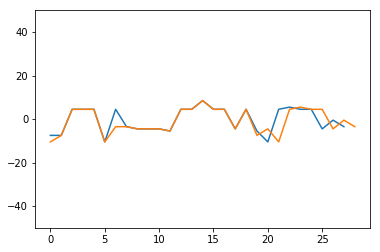

In [51]:
plt.plot(mlist[:28]) #first sequence
plt.plot(mlist[28:57]) # second sequence 
plt.ylim(-50, 50)

#### DATA 1 - converting list of lists to array to lists & plotting

In [52]:
#data1
#placing the values in a 2D list 
# can create an array of lists by np.array(mlist1)
#main
#plotting using arr[index]
#placing the values in a 2D list 
# can create an array of lists by np.array(mlist1)

length = 0
mlist1 = []
for line in open("data1_our_TimeSeries.csv"):
        reader_file = csv.reader(open("data1_our_TimeSeries.csv"))
        length_of_file = len(list(reader_file))
        x = line.split(',')
        y = []
        for i in range(len(x)):
            y.append(float(x[i]))
            #mlist.append(float(x[i]))
        mlist1.append(y)
        length = max(length, len(y))
        arr = np.array(mlist1)
        
        
print (length)
#mlist1
        
print(arr[1])
print("\n")        
print(arr[2])
#print(type(mlist1[0][4]))
#print (type(arr[0]))
#print (type(arr[0][1]))
#print (len(arr))
#print (arr[1])

for i in range(1,234):
    print("a[",i,"]")
    print(len(mlist1[i]))

31
[-10.5, -7.5, 4.5, 4.5, 4.5, -10.5, -3.5, -3.5, -4.5, -4.5, -4.5, -5.5, 4.5, 4.5, 8.5, 4.5, 4.5, -4.5, 4.5, -7.5, -4.5, -10.5, 4.5, 5.5, 4.5, 4.5, -4.5, -0.5, -3.5]


[-10.5, -7.5, 4.5, 4.5, 4.5, -10.5, -3.5, -3.5, -4.5, -4.5, -4.5, -5.5, 4.5, 4.5, 8.5, 4.5, 4.5, -4.5, 4.5, -3.5, -4.5, -10.5, 4.5, 5.5, 4.5, 4.5, -4.5, -0.5, -3.5]
a[ 1 ]
29
a[ 2 ]
29
a[ 3 ]
29
a[ 4 ]
28
a[ 5 ]
29
a[ 6 ]
29
a[ 7 ]
29
a[ 8 ]
29
a[ 9 ]
29
a[ 10 ]
28
a[ 11 ]
23
a[ 12 ]
29
a[ 13 ]
28
a[ 14 ]
29
a[ 15 ]
29
a[ 16 ]
29
a[ 17 ]
28
a[ 18 ]
29
a[ 19 ]
28
a[ 20 ]
28
a[ 21 ]
28
a[ 22 ]
28
a[ 23 ]
29
a[ 24 ]
29
a[ 25 ]
29
a[ 26 ]
29
a[ 27 ]
29
a[ 28 ]
25
a[ 29 ]
29
a[ 30 ]
29
a[ 31 ]
29
a[ 32 ]
29
a[ 33 ]
29
a[ 34 ]
28
a[ 35 ]
29
a[ 36 ]
29
a[ 37 ]
29
a[ 38 ]
29
a[ 39 ]
29
a[ 40 ]
28
a[ 41 ]
29
a[ 42 ]
31
a[ 43 ]
29
a[ 44 ]
28
a[ 45 ]
29
a[ 46 ]
29
a[ 47 ]
29
a[ 48 ]
29
a[ 49 ]
29
a[ 50 ]
29
a[ 51 ]
29
a[ 52 ]
29
a[ 53 ]
29
a[ 54 ]
29
a[ 55 ]
29
a[ 56 ]
29
a[ 57 ]
29
a[ 58 ]
29
a[ 59 ]
29
a[ 60 ]
29
a[ 61 ]
29
a[ 

(-15, 15)

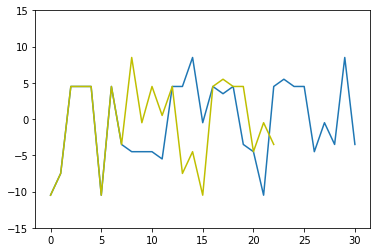

In [53]:
plt.plot(arr[42]) #longest sequence
plt.plot(arr[199],'y') # shortest sequence 
plt.ylim(-15,15)

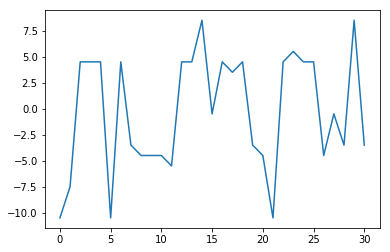

In [54]:
plt.plot(arr[42]) # 23 elements 


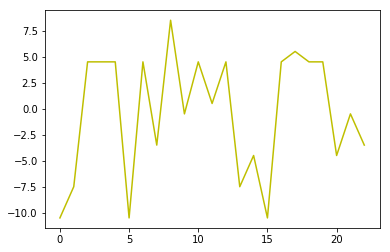

In [55]:
plt.plot(arr[199],'y') #31 elements

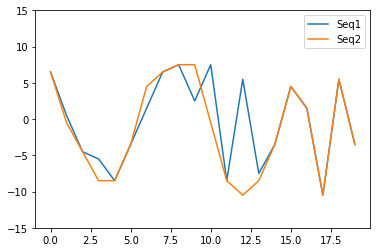

In [56]:
fig, ax = plt.subplots()
ax.plot(arr2[0],label='Seq1') #first sequence
ax.plot(arr2[1],label='Seq2') # second sequence 
legend = ax.legend(loc='best')
plt.ylim(-15,15)
plt.show()


#### DATA 1 Padding

In [57]:
#padding 0s at the end of the arrays
arr_of_arr= []
li_padded = []
for i in range(0,len(arr)):
    abc = np.array(mlist1[i])
    a_padded = np.pad(abc,(0,length-len(mlist1[i])),'constant')
    #a_stack = np.stack(a_padded, axis=0)
    #arr_of_arr = np.append(arr_of_arr,a_padded,axis = 0) # contains a 1D array with all the values.
    #ar_splited = np.split(arr_of_arr,[length]*i)
    li_padded.append(a_padded)

    
print ((li_padded)) 
length
#print (arr_of_arr[0:length+length])
#print(len(a_padded))

[array([ -7.5,  -7.5,   4.5,   4.5,   4.5, -10.5,   4.5,  -3.5,  -4.5,
        -4.5,  -4.5,  -5.5,   4.5,   4.5,   8.5,   4.5,   4.5,  -4.5,
         4.5,  -5.5, -10.5,   4.5,   5.5,   4.5,   4.5,  -4.5,  -0.5,
        -3.5,   0. ,   0. ,   0. ]), array([-10.5,  -7.5,   4.5,   4.5,   4.5, -10.5,  -3.5,  -3.5,  -4.5,
        -4.5,  -4.5,  -5.5,   4.5,   4.5,   8.5,   4.5,   4.5,  -4.5,
         4.5,  -7.5,  -4.5, -10.5,   4.5,   5.5,   4.5,   4.5,  -4.5,
        -0.5,  -3.5,   0. ,   0. ]), array([-10.5,  -7.5,   4.5,   4.5,   4.5, -10.5,  -3.5,  -3.5,  -4.5,
        -4.5,  -4.5,  -5.5,   4.5,   4.5,   8.5,   4.5,   4.5,  -4.5,
         4.5,  -3.5,  -4.5, -10.5,   4.5,   5.5,   4.5,   4.5,  -4.5,
        -0.5,  -3.5,   0. ,   0. ]), array([-10.5,  -7.5,   4.5,   4.5,   4.5, -10.5,   4.5,  -3.5,  -4.5,
        -4.5,  -4.5,  -5.5,   4.5,   4.5,   8.5,   4.5,   4.5,  -4.5,
         4.5,  -5.5, -10.5,   4.5,   5.5,   4.5,   4.5,  -4.5,  -0.5,
        -3.5,  -3.5,   0. ,   0. ]), array([-10.

31

##### DATA 2 converting "list of lists" to "array of lists"

In [58]:
#placing the values in a 2D list 
# can create an array of lists by np.array(mlist1)
#main
#plotting using arr[index]

length2 = 0
mlist2 = []
for line in open("data2_our_TimeSeries.csv"):
        reader_file2 = csv.reader(open("data2_our_TimeSeries.csv"))
        length_of_file2 = len(list(reader_file2))
        x2 = line.split(',')
        y2 = []
        for i in range(len(x2)):
            y2.append(float(x2[i]))
            #mlist.append(float(x[i]))
        mlist2.append(y2)
        length2 = max(length2, len(y2))
        arr2 = np.array(mlist2)
        #print (len(mlist2))

#print (mlist2[0])
print(arr2[20])
print("\n")        
print(arr2[2])
#print(type(mlist1[0][4]))
#print (type(arr[0]))
#print (type(arr[0][1]))
#print (len(arr))
#print (arr[1])

len(mlist2[1])

[6.5, 8.5, 0.5, -7.5, -3.5, -7.5, 5.5, 6.5, 7.5, 7.5, -0.5, -5.5, -10.5, 4.5, -3.5, -10.5, 1.5, 0.5, -10.5, -8.5, -4.5]


[6.5, 8.5, 0.5, -7.5, -3.5, -7.5, 5.5, 6.5, 7.5, 7.5, -0.5, -5.5, -10.5, 4.5, -3.5, -10.5, 1.5, 0.5, -10.5, 4.5, -4.5]


20

#### Padding data2

In [59]:
#padding 0s at the end of the arrays (padding  for dataset 2 is not required, but i still it did it anyway ¯\_(ツ)_/¯ )
# 0 values are spaces
arr_of_arr2= []
li_padded2 = []
for i in range(0,len(arr2)):
    abc2 = np.array(mlist2[i])
    a_padded2 = np.pad(abc2,(0,length2-len(mlist2[i])),'constant')
    #a_stack = np.stack(a_padded, axis=0)
    #arr_of_arr = np.append(arr_of_arr,a_padded,axis = 0) # contains a 1D array with all the values.
    #ar_splited = np.split(arr_of_arr,[length]*i)
    li_padded2.append(a_padded2)

    
print ((li_padded2[2]))  #this is silimar to element[14]
print ((li_padded2[12]))
print ((li_padded2[1]))
#print (arr_of_arr[0:length+length])
#print(len(a_padded))

[  6.5   8.5   0.5  -7.5  -3.5  -7.5   5.5   6.5   7.5   7.5  -0.5  -5.5
 -10.5   4.5  -3.5 -10.5   1.5   0.5 -10.5   4.5  -4.5]
[  6.5   8.5   0.5  -7.5  -3.5  -5.5   5.5   6.5   7.5   7.5  -0.5  -5.5
 -10.5   4.5  -3.5   4.5   1.5   0.5 -10.5  -8.5  -4.5]
[  6.5  -0.5  -4.5  -8.5  -8.5  -3.5   4.5   6.5   7.5   7.5  -0.5  -8.5
 -10.5  -8.5  -3.5   4.5   1.5 -10.5   5.5  -3.5   0. ]


# DISTANCE 

#### Fast Dynamic time warping (Euclidean)
Only works on numbers (can ahve differnet lenght)

In [60]:
#data1    
#should we consider padded seq or normal
print (li_padded[42]) #longest seq
print (li_padded[199]) #shortest seq
distance, path = fastdtw(li_padded[42],li_padded[199],dist=euclidean)
print (distance)

[-10.5  -7.5   4.5   4.5   4.5 -10.5   4.5  -3.5  -4.5  -4.5  -4.5  -5.5
   4.5   4.5   8.5  -0.5   4.5   3.5   4.5  -3.5  -4.5 -10.5   4.5   5.5
   4.5   4.5  -4.5  -0.5  -3.5   8.5  -3.5]
[-10.5  -7.5   4.5   4.5   4.5 -10.5   4.5  -3.5   8.5  -0.5   4.5   0.5
   4.5  -7.5  -4.5 -10.5   4.5   5.5   4.5   4.5  -4.5  -0.5  -3.5   0.
   0.    0.    0.    0.    0.    0.    0. ]
41.0


In [61]:
#data1
print (arr[42]) #31
print (arr[199]) #199
distance, path = fastdtw(arr[42],arr[199],dist=euclidean)
print (distance)

[-10.5, -7.5, 4.5, 4.5, 4.5, -10.5, 4.5, -3.5, -4.5, -4.5, -4.5, -5.5, 4.5, 4.5, 8.5, -0.5, 4.5, 3.5, 4.5, -3.5, -4.5, -10.5, 4.5, 5.5, 4.5, 4.5, -4.5, -0.5, -3.5, 8.5, -3.5]
[-10.5, -7.5, 4.5, 4.5, 4.5, -10.5, 4.5, -3.5, 8.5, -0.5, 4.5, 0.5, 4.5, -7.5, -4.5, -10.5, 4.5, 5.5, 4.5, 4.5, -4.5, -0.5, -3.5]
32.0


In [62]:
#data1
print (arr[0]) #31
print (arr[2]) #199
distance, path = fastdtw(arr[0],arr[2],dist=euclidean)
print (distance)

[-7.5, -7.5, 4.5, 4.5, 4.5, -10.5, 4.5, -3.5, -4.5, -4.5, -4.5, -5.5, 4.5, 4.5, 8.5, 4.5, 4.5, -4.5, 4.5, -5.5, -10.5, 4.5, 5.5, 4.5, 4.5, -4.5, -0.5, -3.5]
[-10.5, -7.5, 4.5, 4.5, 4.5, -10.5, -3.5, -3.5, -4.5, -4.5, -4.5, -5.5, 4.5, 4.5, 8.5, 4.5, 4.5, -4.5, 4.5, -3.5, -4.5, -10.5, 4.5, 5.5, 4.5, 4.5, -4.5, -0.5, -3.5]
14.0


In [63]:
#data1    
#should we consider padded seq or normal
print (li_padded[0]) #longest seq
print (li_padded[2]) #shortest seq
distance, path = fastdtw(li_padded[0],li_padded[2],dist=euclidean)
print (distance)

[ -7.5  -7.5   4.5   4.5   4.5 -10.5   4.5  -3.5  -4.5  -4.5  -4.5  -5.5
   4.5   4.5   8.5   4.5   4.5  -4.5   4.5  -5.5 -10.5   4.5   5.5   4.5
   4.5  -4.5  -0.5  -3.5   0.    0.    0. ]
[-10.5  -7.5   4.5   4.5   4.5 -10.5  -3.5  -3.5  -4.5  -4.5  -4.5  -5.5
   4.5   4.5   8.5   4.5   4.5  -4.5   4.5  -3.5  -4.5 -10.5   4.5   5.5
   4.5   4.5  -4.5  -0.5  -3.5   0.    0. ]
14.0


In [64]:
li_padded123 =[-10.5, -7.5, 4.5, 4.5, 4.5, -10.5, 4.5, -3.5, 8.5, -0.5, 4.5, 0.5, 4.5, -7.5, -4.5, -10.5, 4.5, 5.5, 4.5, 4.5, -4.5, -0.5, -3.5,0,0,0,0,0,0,0,0]
li_padded1234 = [-10.5, -7.5, 4.5, 4.5, 4.5, -10.5, 4.5, -3.5, 8.5, -0.5, 4.5, 0.5, 4.5, -7.5, -4.5, -10.5, 4.5, 5.5, 4.5, 4.5, -4.5, -0.5, -3.5,4.5, 0.5, 4.5, -7.5, -4.5, -10.5, 4.5, 5.5]
distance, path = fastdtw(li_padded123,li_padded1234,dist=euclidean)
print (distance)

42.0


In [65]:
#data1
#print (arr[42]) #longest seq
#print (arr[199]) #shortest seq
distance, path = fastdtw([-10.5, -7.5, 4.5, 4.5, 4.5, -10.5, 4.5, -3.5, -4.5, -4.5, -4.5, -5.5, 4.5, 4.5, 8.5, -0.5, 4.5, 3.5, 4.5, -3.5, -4.5, -10.5, 4.5, 5.5, 4.5, 4.5, -4.5, -0.5, -3.5, 8.5, -3.5],[-10.5, -7.5, 4.5, 4.5, 4.5, -10.5, 4.5, -3.5, -4.5, -4.5, -4.5, -5.5, 4.5, 4.5, 8.5, -3.5],dist=euclidean)
print (distance)

63.0


In [66]:
#data1
distance, path = fastdtw(li_padded[0],li_padded[1],dist=euclidean)
print (distance)

14.0


In [67]:
#data1
distance, path = fastdtw([-7.5,-7.5,4.5,4.5,4.5,-10.5,4.5,-3.5,8.5,4.5,4.5,-4.5,4.5,-5.5,-10.5,4.5,5.5,4.5,4.5,-4.5,-0.5,-3.5],[-10.5,-7.5,4.5,4.5,4.5,-10.5,-3.5,-3.5,-4.5,-4.5,-4.5,-5.5,4.5,4.5,8.5,4.5,4.5,-4.5,4.5,-7.5,-4.5,-10.5,4.5,5.5,4.5,4.5,-4.5,-0.5,-3.5],dist=euclidean)
print (distance)

27.0


In [68]:
#data2
distance2, path2 = fastdtw(li_padded2[2],li_padded2[12],dist=euclidean)
print (distance2)

23.0


In [69]:
distance2, path2 = fastdtw(arr2[8],arr2[18],dist=euclidean)
print (distance2)

1.0


In [70]:
#DATA2 FAST DTW
current_row= 0
compare_row= 0
data2_arr_eucl = []
for current_row in range(0,len(arr2)):
    dist_values = []
    for comapre_row in range(0,len(arr2)):
        print ("current",current_row)
        print ("comapre",compare_row)
        distance,path = fastdtw(arr2[current_row],arr2[compare_row],dist=euclidean) 
        print(distance)
        dist_values.append(distance)
        compare_row=compare_row+1
    data2_arr_eucl.append(dist_values)
    current_row=current_row+1
    compare_row=0





current 0
comapre 0
0.0
current 0
comapre 1
29.0
current 0
comapre 2
50.0
current 0
comapre 3
43.0
current 0
comapre 4
40.0
current 0
comapre 5
53.0
current 0
comapre 6
67.0
current 0
comapre 7
28.0
current 0
comapre 8
51.0
current 0
comapre 9
63.0
current 0
comapre 10
48.0
current 0
comapre 11
55.0
current 0
comapre 12
49.0
current 0
comapre 13
70.0
current 0
comapre 14
7.0
current 0
comapre 15
39.0
current 0
comapre 16
51.0
current 0
comapre 17
43.0
current 0
comapre 18
52.0
current 0
comapre 19
41.0
current 0
comapre 20
61.0
current 1
comapre 0
29.0
current 1
comapre 1
0.0
current 1
comapre 2
39.0
current 1
comapre 3
54.0
current 1
comapre 4
37.0
current 1
comapre 5
24.0
current 1
comapre 6
64.0
current 1
comapre 7
25.0
current 1
comapre 8
22.0
current 1
comapre 9
34.0
current 1
comapre 10
19.0
current 1
comapre 11
32.0
current 1
comapre 12
38.0
current 1
comapre 13
67.0
current 1
comapre 14
36.0
current 1
comapre 15
10.0
current 1
comapre 16
54.0
current 1
comapre 17
42.0
current 1

51.0
current 16
comapre 1
54.0
current 16
comapre 2
43.0
current 16
comapre 3
32.0
current 16
comapre 4
21.0
current 16
comapre 5
30.0
current 16
comapre 6
57.0
current 16
comapre 7
29.0
current 16
comapre 8
36.0
current 16
comapre 9
20.0
current 16
comapre 10
39.0
current 16
comapre 11
36.0
current 16
comapre 12
62.0
current 16
comapre 13
78.0
current 16
comapre 14
58.0
current 16
comapre 15
44.0
current 16
comapre 16
0.0
current 16
comapre 17
26.0
current 16
comapre 18
37.0
current 16
comapre 19
22.0
current 16
comapre 20
54.0
current 17
comapre 0
43.0
current 17
comapre 1
42.0
current 17
comapre 2
33.0
current 17
comapre 3
27.0
current 17
comapre 4
5.0
current 17
comapre 5
46.0
current 17
comapre 6
52.0
current 17
comapre 7
17.0
current 17
comapre 8
20.0
current 17
comapre 9
36.0
current 17
comapre 10
23.0
current 17
comapre 11
52.0
current 17
comapre 12
58.0
current 17
comapre 13
66.0
current 17
comapre 14
50.0
current 17
comapre 15
32.0
current 17
comapre 16
26.0
current 17
comapr

In [76]:
df2_eucl =  pd.DataFrame(data2_arr_eucl)
df2_eucl

0     1     2     3     4     5     6     7     8     9    10    11  \
0   0.0   29.0  50.0  43.0  40.0  53.0  67.0  28.0  51.0  63.0  48.0  55.0   
1   29.0  0.0   39.0  54.0  37.0  24.0  64.0  25.0  22.0  34.0  19.0  32.0   
2   50.0  39.0  0.0   45.0  34.0  53.0  57.0  26.0  37.0  43.0  40.0  57.0   
3   43.0  54.0  45.0  0.0   28.0  50.0  25.0  37.0  35.0  40.0  38.0  54.0   
4   40.0  37.0  34.0  28.0  0.0   41.0  53.0  12.0  15.0  31.0  18.0  47.0   
5   53.0  24.0  53.0  50.0  41.0  0.0   60.0  49.0  26.0  10.0  23.0  6.0    
6   67.0  64.0  57.0  25.0  53.0  60.0  0.0   62.0  43.0  48.0  46.0  64.0   
7   28.0  25.0  26.0  37.0  12.0  49.0  62.0  0.0   27.0  39.0  30.0  57.0   
8   51.0  22.0  37.0  35.0  15.0  26.0  43.0  27.0  0.0   16.0  3.0   32.0   
9   63.0  34.0  43.0  40.0  31.0  10.0  48.0  39.0  16.0  0.0   19.0  16.0   
10  48.0  19.0  40.0  38.0  18.0  23.0  46.0  30.0  3.0   19.0  0.0   29.0   
11  55.0  32.0  57.0  54.0  47.0  6.0   64.0  57.0  32.0  16.0  29.0  0.0    
12  49.0  38.0  23.0  68.0  53.0  52.0  74.0  45.0  56.0  62.0  53.0  56.0   
13  70.0  67.0  80.0  49.0  67.0  61.0  31.0  85.0  57.0  69.0  54.0  65.0   
14  7.0   36.0  55.0  50.0  47.0  60.0  74.0  35.0  58.0  70.0  55.0  62.0   
15  39.0  10.0  29.0  44.0  27.0  34.0  52.0  15.0  12.0  24.0  15.0  42.0   
16  51.0  54.0  43.0  32.0  21.0  30.0  57.0  29.0  36.0  20.0  39.0  36.0   
17  43.0  42.0  33.0  27.0  5.0   46.0  52.0  17.0  20.0  36.0  23.0  52.0   
18  52.0  23.0  38.0  36.0  16.0  27.0  44.0  28.0  1.0   17.0  4.0   33.0   
19  41.0  38.0  35.0  29.0  1.0   42.0  54.0  13.0  16.0  32.0  19.0  48.0   
20  61.0  50.0  11.0  56.0  45.0  64.0  66.0  37.0  48.0  54.0  51.0  68.0   

      12    13    14    15    16    17    18    19    20  
0   49.0  70.0  7.0   39.0  51.0  43.0  52.0  41.0  61.0  
1   38.0  67.0  36.0  10.0  54.0  42.0  23.0  38.0  50.0  
2   23.0  80.0  55.0  29.0  43.0  33.0  38.0  35.0  11.0  
3   68.0  49.0  50.0  44.0  32.0  27.0  36.0  29.0  56.0  
4   53.0  67.0  47.0  27.0  21.0  5.0   16.0  1.0   45.0  
5   52.0  61.0  60.0  34.0  30.0  46.0  27.0  42.0  64.0  
6   74.0  31.0  74.0  52.0  57.0  52.0  44.0  54.0  66.0  
7   45.0  85.0  35.0  15.0  29.0  17.0  28.0  13.0  37.0  
8   56.0  57.0  58.0  12.0  36.0  20.0  1.0   16.0  48.0  
9   62.0  69.0  70.0  24.0  20.0  36.0  17.0  32.0  54.0  
10  53.0  54.0  55.0  15.0  39.0  23.0  4.0   19.0  51.0  
11  56.0  65.0  62.0  42.0  36.0  52.0  33.0  48.0  68.0  
12  0.0   71.0  42.0  48.0  62.0  58.0  57.0  54.0  12.0  
13  71.0  0.0   74.0  75.0  78.0  66.0  58.0  68.0  79.0  
14  42.0  74.0  0.0   46.0  58.0  50.0  59.0  48.0  54.0  
15  48.0  75.0  46.0  0.0   44.0  32.0  13.0  28.0  40.0  
16  62.0  78.0  58.0  44.0  0.0   26.0  37.0  22.0  54.0  
17  58.0  66.0  50.0  32.0  26.0  0.0   21.0  6.0   44.0  
18  57.0  58.0  59.0  13.0  37.0  21.0  0.0   15.0  49.0  
19  54.0  68.0  48.0  28.0  22.0  6.0   15.0  0.0   46.0  
20  12.0  79.0  54.0  40.0  54.0  44.0  49.0  46.0  0.0

In [31]:
distance1,path = fastdtw(arr2[0],arr2[20],dist=euclidean) 
distance1

61.0

In [144]:
#DATA1
len(arr)

234

In [34]:
%%time
#DATA1 FAST DTW

current_row= 0
compare_row= 0
data1_arr_eucl = []
for current_row in range(0,len(arr)):
    dist_values = []
    for comapre_row in range(0,len(arr)):
        print ("current",current_row)
        print ("comapre",compare_row)
        distance,path = fastdtw(arr[current_row],arr[compare_row],dist=euclidean) 
        print(distance)
        dist_values.append(distance)
        compare_row=compare_row+1
    data1_arr_eucl.append(dist_values)
    current_row=current_row+1
    compare_row=0





current 0
comapre 0
0.0
current 0
comapre 1
14.0
current 0
comapre 2
14.0
current 0
comapre 3
3.0
current 0
comapre 4
3.0
current 0
comapre 5
16.0
current 0
comapre 6
8.0
current 0
comapre 7
21.0
current 0
comapre 8
3.0
current 0
comapre 9
19.0
current 0
comapre 10
25.0
current 0
comapre 11
24.0
current 0
comapre 12
37.0
current 0
comapre 13
15.0
current 0
comapre 14
9.0
current 0
comapre 15
17.0
current 0
comapre 16
22.0
current 0
comapre 17
11.0
current 0
comapre 18
29.0
current 0
comapre 19
13.0
current 0
comapre 20
5.0
current 0
comapre 21
5.0
current 0
comapre 22
15.0
current 0
comapre 23
18.0
current 0
comapre 24
21.0
current 0
comapre 25
6.0
current 0
comapre 26
11.0
current 0
comapre 27
16.0
current 0
comapre 28
35.0
current 0
comapre 29
47.0
current 0
comapre 30
6.0
current 0
comapre 31
26.0
current 0
comapre 32
18.0
current 0
comapre 33
3.0
current 0
comapre 34
14.0
current 0
comapre 35
27.0
current 0
comapre 36
31.0
current 0
comapre 37
17.0
current 0
comapre 38
11.0
current

current 1
comapre 105
16.0
current 1
comapre 106
28.0
current 1
comapre 107
35.0
current 1
comapre 108
23.0
current 1
comapre 109
14.0
current 1
comapre 110
42.0
current 1
comapre 111
28.0
current 1
comapre 112
8.0
current 1
comapre 113
58.0
current 1
comapre 114
23.0
current 1
comapre 115
25.0
current 1
comapre 116
46.0
current 1
comapre 117
9.0
current 1
comapre 118
21.0
current 1
comapre 119
29.0
current 1
comapre 120
25.0
current 1
comapre 121
39.0
current 1
comapre 122
19.0
current 1
comapre 123
1.0
current 1
comapre 124
34.0
current 1
comapre 125
31.0
current 1
comapre 126
39.0
current 1
comapre 127
37.0
current 1
comapre 128
13.0
current 1
comapre 129
18.0
current 1
comapre 130
28.0
current 1
comapre 131
16.0
current 1
comapre 132
81.0
current 1
comapre 133
41.0
current 1
comapre 134
5.0
current 1
comapre 135
5.0
current 1
comapre 136
19.0
current 1
comapre 137
22.0
current 1
comapre 138
19.0
current 1
comapre 139
11.0
current 1
comapre 140
24.0
current 1
comapre 141
31.0
curren

26.0
current 2
comapre 203
38.0
current 2
comapre 204
41.0
current 2
comapre 205
40.0
current 2
comapre 206
30.0
current 2
comapre 207
11.0
current 2
comapre 208
35.0
current 2
comapre 209
49.0
current 2
comapre 210
17.0
current 2
comapre 211
20.0
current 2
comapre 212
10.0
current 2
comapre 213
43.0
current 2
comapre 214
22.0
current 2
comapre 215
38.0
current 2
comapre 216
9.0
current 2
comapre 217
4.0
current 2
comapre 218
36.0
current 2
comapre 219
14.0
current 2
comapre 220
41.0
current 2
comapre 221
26.0
current 2
comapre 222
1.0
current 2
comapre 223
44.0
current 2
comapre 224
41.0
current 2
comapre 225
55.0
current 2
comapre 226
49.0
current 2
comapre 227
34.0
current 2
comapre 228
12.0
current 2
comapre 229
14.0
current 2
comapre 230
56.0
current 2
comapre 231
34.0
current 2
comapre 232
42.0
current 2
comapre 233
46.0
current 3
comapre 0
3.0
current 3
comapre 1
11.0
current 3
comapre 2
11.0
current 3
comapre 3
0.0
current 3
comapre 4
0.0
current 3
comapre 5
19.0
current 3
coma

32.0
current 4
comapre 97
34.0
current 4
comapre 98
27.0
current 4
comapre 99
32.0
current 4
comapre 100
17.0
current 4
comapre 101
29.0
current 4
comapre 102
29.0
current 4
comapre 103
12.0
current 4
comapre 104
12.0
current 4
comapre 105
5.0
current 4
comapre 106
35.0
current 4
comapre 107
26.0
current 4
comapre 108
14.0
current 4
comapre 109
19.0
current 4
comapre 110
48.0
current 4
comapre 111
33.0
current 4
comapre 112
13.0
current 4
comapre 113
49.0
current 4
comapre 114
30.0
current 4
comapre 115
16.0
current 4
comapre 116
37.0
current 4
comapre 117
14.0
current 4
comapre 118
26.0
current 4
comapre 119
34.0
current 4
comapre 120
16.0
current 4
comapre 121
30.0
current 4
comapre 122
30.0
current 4
comapre 123
12.0
current 4
comapre 124
25.0
current 4
comapre 125
21.0
current 4
comapre 126
30.0
current 4
comapre 127
28.0
current 4
comapre 128
18.0
current 4
comapre 129
7.0
current 4
comapre 130
31.0
current 4
comapre 131
5.0
current 4
comapre 132
83.0
current 4
comapre 133
32.0
cu

14.0
current 5
comapre 204
17.0
current 5
comapre 205
16.0
current 5
comapre 206
38.0
current 5
comapre 207
35.0
current 5
comapre 208
27.0
current 5
comapre 209
57.0
current 5
comapre 210
25.0
current 5
comapre 211
28.0
current 5
comapre 212
34.0
current 5
comapre 213
19.0
current 5
comapre 214
30.0
current 5
comapre 215
14.0
current 5
comapre 216
33.0
current 5
comapre 217
28.0
current 5
comapre 218
12.0
current 5
comapre 219
22.0
current 5
comapre 220
10.0
current 5
comapre 221
2.0
current 5
comapre 222
25.0
current 5
comapre 223
36.0
current 5
comapre 224
49.0
current 5
comapre 225
63.0
current 5
comapre 226
25.0
current 5
comapre 227
10.0
current 5
comapre 228
36.0
current 5
comapre 229
38.0
current 5
comapre 230
64.0
current 5
comapre 231
26.0
current 5
comapre 232
18.0
current 5
comapre 233
22.0
current 6
comapre 0
8.0
current 6
comapre 1
20.0
current 6
comapre 2
16.0
current 6
comapre 3
11.0
current 6
comapre 4
11.0
current 6
comapre 5
18.0
current 6
comapre 6
0.0
current 6
com

9.0
current 7
comapre 57
32.0
current 7
comapre 58
13.0
current 7
comapre 59
36.0
current 7
comapre 60
14.0
current 7
comapre 61
9.0
current 7
comapre 62
27.0
current 7
comapre 63
30.0
current 7
comapre 64
40.0
current 7
comapre 65
39.0
current 7
comapre 66
31.0
current 7
comapre 67
8.0
current 7
comapre 68
25.0
current 7
comapre 69
5.0
current 7
comapre 70
21.0
current 7
comapre 71
40.0
current 7
comapre 72
33.0
current 7
comapre 73
6.0
current 7
comapre 74
22.0
current 7
comapre 75
7.0
current 7
comapre 76
15.0
current 7
comapre 77
11.0
current 7
comapre 78
24.0
current 7
comapre 79
30.0
current 7
comapre 80
49.0
current 7
comapre 81
20.0
current 7
comapre 82
45.0
current 7
comapre 83
11.0
current 7
comapre 84
29.0
current 7
comapre 85
26.0
current 7
comapre 86
30.0
current 7
comapre 87
31.0
current 7
comapre 88
31.0
current 7
comapre 89
17.0
current 7
comapre 90
19.0
current 7
comapre 91
32.0
current 7
comapre 92
34.0
current 7
comapre 93
27.0
current 7
comapre 94
19.0
current 7
com

30.0
current 8
comapre 151
21.0
current 8
comapre 152
25.0
current 8
comapre 153
29.0
current 8
comapre 154
33.0
current 8
comapre 155
33.0
current 8
comapre 156
34.0
current 8
comapre 157
27.0
current 8
comapre 158
29.0
current 8
comapre 159
44.0
current 8
comapre 160
43.0
current 8
comapre 161
42.0
current 8
comapre 162
36.0
current 8
comapre 163
28.0
current 8
comapre 164
22.0
current 8
comapre 165
49.0
current 8
comapre 166
34.0
current 8
comapre 167
65.0
current 8
comapre 168
53.0
current 8
comapre 169
12.0
current 8
comapre 170
14.0
current 8
comapre 171
7.0
current 8
comapre 172
12.0
current 8
comapre 173
22.0
current 8
comapre 174
32.0
current 8
comapre 175
28.0
current 8
comapre 176
28.0
current 8
comapre 177
14.0
current 8
comapre 178
25.0
current 8
comapre 179
18.0
current 8
comapre 180
34.0
current 8
comapre 181
51.0
current 8
comapre 182
29.0
current 8
comapre 183
41.0
current 8
comapre 184
13.0
current 8
comapre 185
28.0
current 8
comapre 186
36.0
current 8
comapre 187
17

46.0
current 10
comapre 61
41.0
current 10
comapre 62
26.0
current 10
comapre 63
30.0
current 10
comapre 64
14.0
current 10
comapre 65
39.0
current 10
comapre 66
32.0
current 10
comapre 67
40.0
current 10
comapre 68
23.0
current 10
comapre 69
37.0
current 10
comapre 70
21.0
current 10
comapre 71
13.0
current 10
comapre 72
36.0
current 10
comapre 73
38.0
current 10
comapre 74
22.0
current 10
comapre 75
32.0
current 10
comapre 76
47.0
current 10
comapre 77
43.0
current 10
comapre 78
34.0
current 10
comapre 79
30.0
current 10
comapre 80
19.0
current 10
comapre 81
48.0
current 10
comapre 82
29.0
current 10
comapre 83
42.0
current 10
comapre 84
29.0
current 10
comapre 85
50.0
current 10
comapre 86
32.0
current 10
comapre 87
38.0
current 10
comapre 88
41.0
current 10
comapre 89
45.0
current 10
comapre 90
51.0
current 10
comapre 91
10.0
current 10
comapre 92
12.0
current 10
comapre 93
33.0
current 10
comapre 94
36.0
current 10
comapre 95
28.0
current 10
comapre 96
50.0
current 10
comapre 97
5

current 11
comapre 145
38.0
current 11
comapre 146
38.0
current 11
comapre 147
43.0
current 11
comapre 148
42.0
current 11
comapre 149
40.0
current 11
comapre 150
45.0
current 11
comapre 151
36.0
current 11
comapre 152
30.0
current 11
comapre 153
50.0
current 11
comapre 154
42.0
current 11
comapre 155
42.0
current 11
comapre 156
44.0
current 11
comapre 157
37.0
current 11
comapre 158
38.0
current 11
comapre 159
47.0
current 11
comapre 160
47.0
current 11
comapre 161
50.0
current 11
comapre 162
36.0
current 11
comapre 163
37.0
current 11
comapre 164
43.0
current 11
comapre 165
61.0
current 11
comapre 166
44.0
current 11
comapre 167
72.0
current 11
comapre 168
71.0
current 11
comapre 169
27.0
current 11
comapre 170
19.0
current 11
comapre 171
22.0
current 11
comapre 172
17.0
current 11
comapre 173
19.0
current 11
comapre 174
35.0
current 11
comapre 175
39.0
current 11
comapre 176
39.0
current 11
comapre 177
25.0
current 11
comapre 178
36.0
current 11
comapre 179
34.0
current 11
comapre 1

71.0
current 12
comapre 225
80.0
current 12
comapre 226
44.0
current 12
comapre 227
11.0
current 12
comapre 228
39.0
current 12
comapre 229
37.0
current 12
comapre 230
68.0
current 12
comapre 231
5.0
current 12
comapre 232
37.0
current 12
comapre 233
31.0
current 13
comapre 0
15.0
current 13
comapre 1
27.0
current 13
comapre 2
31.0
current 13
comapre 3
18.0
current 13
comapre 4
18.0
current 13
comapre 5
7.0
current 13
comapre 6
25.0
current 13
comapre 7
12.0
current 13
comapre 8
20.0
current 13
comapre 9
32.0
current 13
comapre 10
40.0
current 13
comapre 11
41.0
current 13
comapre 12
28.0
current 13
comapre 13
0.0
current 13
comapre 14
26.0
current 13
comapre 15
34.0
current 13
comapre 16
35.0
current 13
comapre 17
26.0
current 13
comapre 18
18.0
current 13
comapre 19
2.0
current 13
comapre 20
16.0
current 13
comapre 21
20.0
current 13
comapre 22
4.0
current 13
comapre 23
31.0
current 13
comapre 24
34.0
current 13
comapre 25
23.0
current 13
comapre 26
28.0
current 13
comapre 27
3.0
cur

comapre 57
14.0
current 14
comapre 58
27.0
current 14
comapre 59
18.0
current 14
comapre 60
28.0
current 14
comapre 61
33.0
current 14
comapre 62
9.0
current 14
comapre 63
12.0
current 14
comapre 64
22.0
current 14
comapre 65
21.0
current 14
comapre 66
13.0
current 14
comapre 67
32.0
current 14
comapre 68
7.0
current 14
comapre 69
29.0
current 14
comapre 70
13.0
current 14
comapre 71
22.0
current 14
comapre 72
15.0
current 14
comapre 73
30.0
current 14
comapre 74
14.0
current 14
comapre 75
32.0
current 14
comapre 76
29.0
current 14
comapre 77
25.0
current 14
comapre 78
38.0
current 14
comapre 79
12.0
current 14
comapre 80
31.0
current 14
comapre 81
34.0
current 14
comapre 82
27.0
current 14
comapre 83
25.0
current 14
comapre 84
21.0
current 14
comapre 85
48.0
current 14
comapre 86
44.0
current 14
comapre 87
45.0
current 14
comapre 88
45.0
current 14
comapre 89
31.0
current 14
comapre 90
33.0
current 14
comapre 91
14.0
current 14
comapre 92
26.0
current 14
comapre 93
15.0
current 14
com

current 15
comapre 223
43.0
current 15
comapre 224
38.0
current 15
comapre 225
52.0
current 15
comapre 226
48.0
current 15
comapre 227
37.0
current 15
comapre 228
15.0
current 15
comapre 229
17.0
current 15
comapre 230
53.0
current 15
comapre 231
31.0
current 15
comapre 232
39.0
current 15
comapre 233
49.0
current 16
comapre 0
22.0
current 16
comapre 1
8.0
current 16
comapre 2
12.0
current 16
comapre 3
19.0
current 16
comapre 4
19.0
current 16
comapre 5
36.0
current 16
comapre 6
28.0
current 16
comapre 7
41.0
current 16
comapre 8
23.0
current 16
comapre 9
13.0
current 16
comapre 10
23.0
current 16
comapre 11
28.0
current 16
comapre 12
29.0
current 16
comapre 13
35.0
current 16
comapre 14
23.0
current 16
comapre 15
15.0
current 16
comapre 16
0.0
current 16
comapre 17
11.0
current 16
comapre 18
47.0
current 16
comapre 19
35.0
current 16
comapre 20
19.0
current 16
comapre 21
21.0
current 16
comapre 22
37.0
current 16
comapre 23
12.0
current 16
comapre 24
15.0
current 16
comapre 25
20.0
cu

comapre 54
13.0
current 17
comapre 55
25.0
current 17
comapre 56
31.0
current 17
comapre 57
19.0
current 17
comapre 58
19.0
current 17
comapre 59
6.0
current 17
comapre 60
32.0
current 17
comapre 61
37.0
current 17
comapre 62
14.0
current 17
comapre 63
16.0
current 17
comapre 64
6.0
current 17
comapre 65
29.0
current 17
comapre 66
17.0
current 17
comapre 67
40.0
current 17
comapre 68
9.0
current 17
comapre 69
37.0
current 17
comapre 70
21.0
current 17
comapre 71
10.0
current 17
comapre 72
19.0
current 17
comapre 73
38.0
current 17
comapre 74
22.0
current 17
comapre 75
39.0
current 17
comapre 76
33.0
current 17
comapre 77
33.0
current 17
comapre 78
30.0
current 17
comapre 79
20.0
current 17
comapre 80
23.0
current 17
comapre 81
34.0
current 17
comapre 82
19.0
current 17
comapre 83
30.0
current 17
comapre 84
29.0
current 17
comapre 85
56.0
current 17
comapre 86
36.0
current 17
comapre 87
37.0
current 17
comapre 88
37.0
current 17
comapre 89
31.0
current 17
comapre 90
41.0
current 17
coma

current 18
comapre 120
32.0
current 18
comapre 121
14.0
current 18
comapre 122
50.0
current 18
comapre 123
42.0
current 18
comapre 124
19.0
current 18
comapre 125
40.0
current 18
comapre 126
26.0
current 18
comapre 127
44.0
current 18
comapre 128
46.0
current 18
comapre 129
29.0
current 18
comapre 130
63.0
current 18
comapre 131
27.0
current 18
comapre 132
60.0
current 18
comapre 133
16.0
current 18
comapre 134
46.0
current 18
comapre 135
46.0
current 18
comapre 136
26.0
current 18
comapre 137
29.0
current 18
comapre 138
26.0
current 18
comapre 139
44.0
current 18
comapre 140
41.0
current 18
comapre 141
38.0
current 18
comapre 142
24.0
current 18
comapre 143
38.0
current 18
comapre 144
28.0
current 18
comapre 145
17.0
current 18
comapre 146
16.0
current 18
comapre 147
35.0
current 18
comapre 148
34.0
current 18
comapre 149
19.0
current 18
comapre 150
54.0
current 18
comapre 151
47.0
current 18
comapre 152
41.0
current 18
comapre 153
29.0
current 18
comapre 154
23.0
current 18
comapre 1

26.0
current 20
comapre 52
29.0
current 20
comapre 53
33.0
current 20
comapre 54
25.0
current 20
comapre 55
21.0
current 20
comapre 56
27.0
current 20
comapre 57
13.0
current 20
comapre 58
31.0
current 20
comapre 59
14.0
current 20
comapre 60
24.0
current 20
comapre 61
29.0
current 20
comapre 62
8.0
current 20
comapre 63
8.0
current 20
comapre 64
12.0
current 20
comapre 65
25.0
current 20
comapre 66
9.0
current 20
comapre 67
36.0
current 20
comapre 68
3.0
current 20
comapre 69
33.0
current 20
comapre 70
17.0
current 20
comapre 71
18.0
current 20
comapre 72
11.0
current 20
comapre 73
34.0
current 20
comapre 74
18.0
current 20
comapre 75
35.0
current 20
comapre 76
25.0
current 20
comapre 77
29.0
current 20
comapre 78
42.0
current 20
comapre 79
16.0
current 20
comapre 80
35.0
current 20
comapre 81
24.0
current 20
comapre 82
31.0
current 20
comapre 83
24.0
current 20
comapre 84
23.0
current 20
comapre 85
50.0
current 20
comapre 86
48.0
current 20
comapre 87
49.0
current 20
comapre 88
49.0


40.0
current 21
comapre 187
15.0
current 21
comapre 188
11.0
current 21
comapre 189
19.0
current 21
comapre 190
28.0
current 21
comapre 191
17.0
current 21
comapre 192
4.0
current 21
comapre 193
14.0
current 21
comapre 194
9.0
current 21
comapre 195
45.0
current 21
comapre 196
15.0
current 21
comapre 197
15.0
current 21
comapre 198
30.0
current 21
comapre 199
24.0
current 21
comapre 200
29.0
current 21
comapre 201
31.0
current 21
comapre 202
18.0
current 21
comapre 203
35.0
current 21
comapre 204
33.0
current 21
comapre 205
32.0
current 21
comapre 206
22.0
current 21
comapre 207
24.0
current 21
comapre 208
48.0
current 21
comapre 209
33.0
current 21
comapre 210
14.0
current 21
comapre 211
11.0
current 21
comapre 212
15.0
current 21
comapre 213
36.0
current 21
comapre 214
15.0
current 21
comapre 215
31.0
current 21
comapre 216
22.0
current 21
comapre 217
15.0
current 21
comapre 218
25.0
current 21
comapre 219
9.0
current 21
comapre 220
27.0
current 21
comapre 221
23.0
current 21
comapre

7.0
current 23
comapre 18
45.0
current 23
comapre 19
31.0
current 23
comapre 20
15.0
current 23
comapre 21
17.0
current 23
comapre 22
33.0
current 23
comapre 23
0.0
current 23
comapre 24
6.0
current 23
comapre 25
16.0
current 23
comapre 26
21.0
current 23
comapre 27
28.0
current 23
comapre 28
35.0
current 23
comapre 29
63.0
current 23
comapre 30
12.0
current 23
comapre 31
16.0
current 23
comapre 32
3.0
current 23
comapre 33
15.0
current 23
comapre 34
4.0
current 23
comapre 35
43.0
current 23
comapre 36
44.0
current 23
comapre 37
33.0
current 23
comapre 38
21.0
current 23
comapre 39
37.0
current 23
comapre 40
20.0
current 23
comapre 41
29.0
current 23
comapre 42
41.0
current 23
comapre 43
16.0
current 23
comapre 44
38.0
current 23
comapre 45
29.0
current 23
comapre 46
13.0
current 23
comapre 47
40.0
current 23
comapre 48
29.0
current 23
comapre 49
24.0
current 23
comapre 50
16.0
current 23
comapre 51
37.0
current 23
comapre 52
41.0
current 23
comapre 53
26.0
current 23
comapre 54
18.0
c

comapre 114
29.0
current 24
comapre 115
32.0
current 24
comapre 116
53.0
current 24
comapre 117
15.0
current 24
comapre 118
22.0
current 24
comapre 119
35.0
current 24
comapre 120
32.0
current 24
comapre 121
46.0
current 24
comapre 122
26.0
current 24
comapre 123
8.0
current 24
comapre 124
41.0
current 24
comapre 125
38.0
current 24
comapre 126
46.0
current 24
comapre 127
44.0
current 24
comapre 128
21.0
current 24
comapre 129
25.0
current 24
comapre 130
36.0
current 24
comapre 131
23.0
current 24
comapre 132
84.0
current 24
comapre 133
48.0
current 24
comapre 134
4.0
current 24
comapre 135
12.0
current 24
comapre 136
26.0
current 24
comapre 137
28.0
current 24
comapre 138
26.0
current 24
comapre 139
12.0
current 24
comapre 140
29.0
current 24
comapre 141
38.0
current 24
comapre 142
40.0
current 24
comapre 143
38.0
current 24
comapre 144
52.0
current 24
comapre 145
41.0
current 24
comapre 146
40.0
current 24
comapre 147
40.0
current 24
comapre 148
39.0
current 24
comapre 149
35.0
curre

current 25
comapre 180
37.0
current 25
comapre 181
54.0
current 25
comapre 182
32.0
current 25
comapre 183
44.0
current 25
comapre 184
10.0
current 25
comapre 185
31.0
current 25
comapre 186
39.0
current 25
comapre 187
14.0
current 25
comapre 188
6.0
current 25
comapre 189
14.0
current 25
comapre 190
27.0
current 25
comapre 191
17.0
current 25
comapre 192
5.0
current 25
comapre 193
15.0
current 25
comapre 194
10.0
current 25
comapre 195
44.0
current 25
comapre 196
16.0
current 25
comapre 197
14.0
current 25
comapre 198
25.0
current 25
comapre 199
27.0
current 25
comapre 200
24.0
current 25
comapre 201
30.0
current 25
comapre 202
18.0
current 25
comapre 203
30.0
current 25
comapre 204
33.0
current 25
comapre 205
32.0
current 25
comapre 206
22.0
current 25
comapre 207
19.0
current 25
comapre 208
43.0
current 25
comapre 209
41.0
current 25
comapre 210
9.0
current 25
comapre 211
12.0
current 25
comapre 212
18.0
current 25
comapre 213
35.0
current 25
comapre 214
14.0
current 25
comapre 215


comapre 111
20.0
current 27
comapre 112
32.0
current 27
comapre 113
34.0
current 27
comapre 114
15.0
current 27
comapre 115
33.0
current 27
comapre 116
22.0
current 27
comapre 117
33.0
current 27
comapre 118
45.0
current 27
comapre 119
21.0
current 27
comapre 120
33.0
current 27
comapre 121
15.0
current 27
comapre 122
43.0
current 27
comapre 123
25.0
current 27
comapre 124
10.0
current 27
comapre 125
39.0
current 27
comapre 126
43.0
current 27
comapre 127
45.0
current 27
comapre 128
37.0
current 27
comapre 129
26.0
current 27
comapre 130
50.0
current 27
comapre 131
24.0
current 27
comapre 132
105.0
current 27
comapre 133
17.0
current 27
comapre 134
29.0
current 27
comapre 135
29.0
current 27
comapre 136
27.0
current 27
comapre 137
30.0
current 27
comapre 138
11.0
current 27
comapre 139
35.0
current 27
comapre 140
32.0
current 27
comapre 141
39.0
current 27
comapre 142
41.0
current 27
comapre 143
39.0
current 27
comapre 144
21.0
current 27
comapre 145
10.0
current 27
comapre 146
9.0
cur

comapre 177
50.0
current 28
comapre 178
35.0
current 28
comapre 179
34.0
current 28
comapre 180
30.0
current 28
comapre 181
44.0
current 28
comapre 182
25.0
current 28
comapre 183
37.0
current 28
comapre 184
41.0
current 28
comapre 185
32.0
current 28
comapre 186
34.0
current 28
comapre 187
45.0
current 28
comapre 188
45.0
current 28
comapre 189
37.0
current 28
comapre 190
28.0
current 28
comapre 191
44.0
current 28
comapre 192
40.0
current 28
comapre 193
50.0
current 28
comapre 194
41.0
current 28
comapre 195
29.0
current 28
comapre 196
51.0
current 28
comapre 197
49.0
current 28
comapre 198
34.0
current 28
comapre 199
58.0
current 28
comapre 200
47.0
current 28
comapre 201
31.0
current 28
comapre 202
50.0
current 28
comapre 203
39.0
current 28
comapre 204
35.0
current 28
comapre 205
34.0
current 28
comapre 206
46.0
current 28
comapre 207
42.0
current 28
comapre 208
36.0
current 28
comapre 209
78.0
current 28
comapre 210
48.0
current 28
comapre 211
47.0
current 28
comapre 212
33.0
cur

current 30
comapre 9
13.0
current 30
comapre 10
25.0
current 30
comapre 11
22.0
current 30
comapre 12
41.0
current 30
comapre 13
19.0
current 30
comapre 14
7.0
current 30
comapre 15
15.0
current 30
comapre 16
16.0
current 30
comapre 17
11.0
current 30
comapre 18
33.0
current 30
comapre 19
19.0
current 30
comapre 20
3.0
current 30
comapre 21
5.0
current 30
comapre 22
21.0
current 30
comapre 23
12.0
current 30
comapre 24
15.0
current 30
comapre 25
4.0
current 30
comapre 26
9.0
current 30
comapre 27
16.0
current 30
comapre 28
35.0
current 30
comapre 29
51.0
current 30
comapre 30
0.0
current 30
comapre 31
20.0
current 30
comapre 32
12.0
current 30
comapre 33
3.0
current 30
comapre 34
8.0
current 30
comapre 35
31.0
current 30
comapre 36
36.0
current 30
comapre 37
21.0
current 30
comapre 38
9.0
current 30
comapre 39
25.0
current 30
comapre 40
8.0
current 30
comapre 41
17.0
current 30
comapre 42
29.0
current 30
comapre 43
9.0
current 30
comapre 44
26.0
current 30
comapre 45
17.0
current 30
co

comapre 174
59.0
current 31
comapre 175
55.0
current 31
comapre 176
53.0
current 31
comapre 177
41.0
current 31
comapre 178
34.0
current 31
comapre 179
19.0
current 31
comapre 180
45.0
current 31
comapre 181
59.0
current 31
comapre 182
40.0
current 31
comapre 183
49.0
current 31
comapre 184
26.0
current 31
comapre 185
47.0
current 31
comapre 186
49.0
current 31
comapre 187
30.0
current 31
comapre 188
30.0
current 31
comapre 189
22.0
current 31
comapre 190
43.0
current 31
comapre 191
33.0
current 31
comapre 192
25.0
current 31
comapre 193
31.0
current 31
comapre 194
26.0
current 31
comapre 195
44.0
current 31
comapre 196
39.0
current 31
comapre 197
30.0
current 31
comapre 198
49.0
current 31
comapre 199
41.0
current 31
comapre 200
32.0
current 31
comapre 201
43.0
current 31
comapre 202
35.0
current 31
comapre 203
54.0
current 31
comapre 204
50.0
current 31
comapre 205
49.0
current 31
comapre 206
39.0
current 31
comapre 207
27.0
current 31
comapre 208
51.0
current 31
comapre 209
63.0
cur

comapre 6
9.0
current 33
comapre 7
22.0
current 33
comapre 8
4.0
current 33
comapre 9
16.0
current 33
comapre 10
28.0
current 33
comapre 11
25.0
current 33
comapre 12
38.0
current 33
comapre 13
16.0
current 33
comapre 14
10.0
current 33
comapre 15
18.0
current 33
comapre 16
19.0
current 33
comapre 17
14.0
current 33
comapre 18
30.0
current 33
comapre 19
16.0
current 33
comapre 20
6.0
current 33
comapre 21
8.0
current 33
comapre 22
18.0
current 33
comapre 23
15.0
current 33
comapre 24
18.0
current 33
comapre 25
7.0
current 33
comapre 26
12.0
current 33
comapre 27
13.0
current 33
comapre 28
32.0
current 33
comapre 29
48.0
current 33
comapre 30
3.0
current 33
comapre 31
23.0
current 33
comapre 32
15.0
current 33
comapre 33
0.0
current 33
comapre 34
11.0
current 33
comapre 35
28.0
current 33
comapre 36
33.0
current 33
comapre 37
18.0
current 33
comapre 38
12.0
current 33
comapre 39
22.0
current 33
comapre 40
11.0
current 33
comapre 41
20.0
current 33
comapre 42
32.0
current 33
comapre 43
1

39.0
current 34
comapre 164
33.0
current 34
comapre 165
50.0
current 34
comapre 166
49.0
current 34
comapre 167
50.0
current 34
comapre 168
44.0
current 34
comapre 169
17.0
current 34
comapre 170
19.0
current 34
comapre 171
12.0
current 34
comapre 172
17.0
current 34
comapre 173
31.0
current 34
comapre 174
47.0
current 34
comapre 175
43.0
current 34
comapre 176
41.0
current 34
comapre 177
29.0
current 34
comapre 178
22.0
current 34
comapre 179
7.0
current 34
comapre 180
33.0
current 34
comapre 181
47.0
current 34
comapre 182
28.0
current 34
comapre 183
40.0
current 34
comapre 184
14.0
current 34
comapre 185
35.0
current 34
comapre 186
37.0
current 34
comapre 187
18.0
current 34
comapre 188
18.0
current 34
comapre 189
10.0
current 34
comapre 190
31.0
current 34
comapre 191
21.0
current 34
comapre 192
13.0
current 34
comapre 193
19.0
current 34
comapre 194
14.0
current 34
comapre 195
32.0
current 34
comapre 196
24.0
current 34
comapre 197
18.0
current 34
comapre 198
37.0
current 34
comap

comapre 3
34.0
current 36
comapre 4
34.0
current 36
comapre 5
18.0
current 36
comapre 6
34.0
current 36
comapre 7
23.0
current 36
comapre 8
29.0
current 36
comapre 9
49.0
current 36
comapre 10
49.0
current 36
comapre 11
40.0
current 36
comapre 12
37.0
current 36
comapre 13
22.0
current 36
comapre 14
35.0
current 36
comapre 15
43.0
current 36
comapre 16
50.0
current 36
comapre 17
42.0
current 36
comapre 18
7.0
current 36
comapre 19
20.0
current 36
comapre 20
36.0
current 36
comapre 21
35.0
current 36
comapre 22
21.0
current 36
comapre 23
44.0
current 36
comapre 24
43.0
current 36
comapre 25
32.0
current 36
comapre 26
37.0
current 36
comapre 27
22.0
current 36
comapre 28
33.0
current 36
comapre 29
39.0
current 36
comapre 30
36.0
current 36
comapre 31
56.0
current 36
comapre 32
40.0
current 36
comapre 33
33.0
current 36
comapre 34
44.0
current 36
comapre 35
29.0
current 36
comapre 36
0.0
current 36
comapre 37
18.0
current 36
comapre 38
27.0
current 36
comapre 39
13.0
current 36
comapre 40

comapre 69
11.0
current 37
comapre 70
27.0
current 37
comapre 71
36.0
current 37
comapre 72
29.0
current 37
comapre 73
10.0
current 37
comapre 74
26.0
current 37
comapre 75
13.0
current 37
comapre 76
9.0
current 37
comapre 77
5.0
current 37
comapre 78
20.0
current 37
comapre 79
26.0
current 37
comapre 80
45.0
current 37
comapre 81
16.0
current 37
comapre 82
41.0
current 37
comapre 83
7.0
current 37
comapre 84
34.0
current 37
comapre 85
29.0
current 37
comapre 86
26.0
current 37
comapre 87
27.0
current 37
comapre 88
27.0
current 37
comapre 89
13.0
current 37
comapre 90
13.0
current 37
comapre 91
28.0
current 37
comapre 92
38.0
current 37
comapre 93
23.0
current 37
comapre 94
13.0
current 37
comapre 95
14.0
current 37
comapre 96
15.0
current 37
comapre 97
22.0
current 37
comapre 98
15.0
current 37
comapre 99
20.0
current 37
comapre 100
33.0
current 37
comapre 101
13.0
current 37
comapre 102
19.0
current 37
comapre 103
26.0
current 37
comapre 104
32.0
current 37
comapre 105
25.0
current 3

current 38
comapre 135
22.0
current 38
comapre 136
2.0
current 38
comapre 137
5.0
current 38
comapre 138
36.0
current 38
comapre 139
20.0
current 38
comapre 140
19.0
current 38
comapre 141
14.0
current 38
comapre 142
16.0
current 38
comapre 143
14.0
current 38
comapre 144
36.0
current 38
comapre 145
25.0
current 38
comapre 146
24.0
current 38
comapre 147
43.0
current 38
comapre 148
42.0
current 38
comapre 149
29.0
current 38
comapre 150
32.0
current 38
comapre 151
23.0
current 38
comapre 152
17.0
current 38
comapre 153
37.0
current 38
comapre 154
31.0
current 38
comapre 155
31.0
current 38
comapre 156
32.0
current 38
comapre 157
25.0
current 38
comapre 158
27.0
current 38
comapre 159
42.0
current 38
comapre 160
43.0
current 38
comapre 161
48.0
current 38
comapre 162
36.0
current 38
comapre 163
36.0
current 38
comapre 164
30.0
current 38
comapre 165
51.0
current 38
comapre 166
40.0
current 38
comapre 167
65.0
current 38
comapre 168
61.0
current 38
comapre 169
14.0
current 38
comapre 170

comapre 200
43.0
current 39
comapre 201
9.0
current 39
comapre 202
29.0
current 39
comapre 203
9.0
current 39
comapre 204
12.0
current 39
comapre 205
11.0
current 39
comapre 206
33.0
current 39
comapre 207
38.0
current 39
comapre 208
30.0
current 39
comapre 209
62.0
current 39
comapre 210
20.0
current 39
comapre 211
31.0
current 39
comapre 212
39.0
current 39
comapre 213
14.0
current 39
comapre 214
25.0
current 39
comapre 215
9.0
current 39
comapre 216
38.0
current 39
comapre 217
33.0
current 39
comapre 218
17.0
current 39
comapre 219
17.0
current 39
comapre 220
5.0
current 39
comapre 221
7.0
current 39
comapre 222
30.0
current 39
comapre 223
31.0
current 39
comapre 224
54.0
current 39
comapre 225
64.0
current 39
comapre 226
20.0
current 39
comapre 227
13.0
current 39
comapre 228
31.0
current 39
comapre 229
43.0
current 39
comapre 230
63.0
current 39
comapre 231
29.0
current 39
comapre 232
13.0
current 39
comapre 233
21.0
current 40
comapre 0
10.0
current 40
comapre 1
16.0
current 40
c

current 41
comapre 32
29.0
current 41
comapre 33
20.0
current 41
comapre 34
25.0
current 41
comapre 35
40.0
current 41
comapre 36
21.0
current 41
comapre 37
29.0
current 41
comapre 38
8.0
current 41
comapre 39
24.0
current 41
comapre 40
23.0
current 41
comapre 41
0.0
current 41
comapre 42
12.0
current 41
comapre 43
16.0
current 41
comapre 44
25.0
current 41
comapre 45
16.0
current 41
comapre 46
26.0
current 41
comapre 47
35.0
current 41
comapre 48
32.0
current 41
comapre 49
27.0
current 41
comapre 50
19.0
current 41
comapre 51
8.0
current 41
comapre 52
30.0
current 41
comapre 53
29.0
current 41
comapre 54
21.0
current 41
comapre 55
17.0
current 41
comapre 56
33.0
current 41
comapre 57
14.0
current 41
comapre 58
37.0
current 41
comapre 59
28.0
current 41
comapre 60
28.0
current 41
comapre 61
33.0
current 41
comapre 62
9.0
current 41
comapre 63
12.0
current 41
comapre 64
30.0
current 41
comapre 65
11.0
current 41
comapre 66
13.0
current 41
comapre 67
42.0
current 41
comapre 68
15.0
curre

current 42
comapre 98
45.0
current 42
comapre 99
42.0
current 42
comapre 100
41.0
current 42
comapre 101
53.0
current 42
comapre 102
57.0
current 42
comapre 103
24.0
current 42
comapre 104
40.0
current 42
comapre 105
23.0
current 42
comapre 106
63.0
current 42
comapre 107
38.0
current 42
comapre 108
26.0
current 42
comapre 109
43.0
current 42
comapre 110
62.0
current 42
comapre 111
57.0
current 42
comapre 112
37.0
current 42
comapre 113
62.0
current 42
comapre 114
52.0
current 42
comapre 115
32.0
current 42
comapre 116
41.0
current 42
comapre 117
38.0
current 42
comapre 118
50.0
current 42
comapre 119
48.0
current 42
comapre 120
28.0
current 42
comapre 121
42.0
current 42
comapre 122
46.0
current 42
comapre 123
38.0
current 42
comapre 124
47.0
current 42
comapre 125
36.0
current 42
comapre 126
2.0
current 42
comapre 127
16.0
current 42
comapre 128
42.0
current 42
comapre 129
25.0
current 42
comapre 130
45.0
current 42
comapre 131
23.0
current 42
comapre 132
56.0
current 42
comapre 133


comapre 163
40.0
current 43
comapre 164
34.0
current 43
comapre 165
51.0
current 43
comapre 166
78.0
current 43
comapre 167
65.0
current 43
comapre 168
61.0
current 43
comapre 169
18.0
current 43
comapre 170
18.0
current 43
comapre 171
13.0
current 43
comapre 172
16.0
current 43
comapre 173
22.0
current 43
comapre 174
38.0
current 43
comapre 175
34.0
current 43
comapre 176
32.0
current 43
comapre 177
20.0
current 43
comapre 178
29.0
current 43
comapre 179
24.0
current 43
comapre 180
50.0
current 43
comapre 181
64.0
current 43
comapre 182
45.0
current 43
comapre 183
57.0
current 43
comapre 184
5.0
current 43
comapre 185
26.0
current 43
comapre 186
40.0
current 43
comapre 187
9.0
current 43
comapre 188
9.0
current 43
comapre 189
27.0
current 43
comapre 190
22.0
current 43
comapre 191
8.0
current 43
comapre 192
12.0
current 43
comapre 193
3.0
current 43
comapre 194
5.0
current 43
comapre 195
45.0
current 43
comapre 196
23.0
current 43
comapre 197
2.0
current 43
comapre 198
28.0
current 43

comapre 229
40.0
current 44
comapre 230
62.0
current 44
comapre 231
30.0
current 44
comapre 232
14.0
current 44
comapre 233
18.0
current 45
comapre 0
19.0
current 45
comapre 1
25.0
current 45
comapre 2
21.0
current 45
comapre 3
16.0
current 45
comapre 4
16.0
current 45
comapre 5
29.0
current 45
comapre 6
21.0
current 45
comapre 7
34.0
current 45
comapre 8
16.0
current 45
comapre 9
30.0
current 45
comapre 10
34.0
current 45
comapre 11
13.0
current 45
comapre 12
34.0
current 45
comapre 13
36.0
current 45
comapre 14
16.0
current 45
comapre 15
24.0
current 45
comapre 16
21.0
current 45
comapre 17
24.0
current 45
comapre 18
32.0
current 45
comapre 19
32.0
current 45
comapre 20
20.0
current 45
comapre 21
18.0
current 45
comapre 22
34.0
current 45
comapre 23
29.0
current 45
comapre 24
32.0
current 45
comapre 25
13.0
current 45
comapre 26
18.0
current 45
comapre 27
33.0
current 45
comapre 28
52.0
current 45
comapre 29
44.0
current 45
comapre 30
17.0
current 45
comapre 31
37.0
current 45
comapr

45.0
current 47
comapre 127
33.0
current 47
comapre 128
45.0
current 47
comapre 129
32.0
current 47
comapre 130
58.0
current 47
comapre 131
30.0
current 47
comapre 132
103.0
current 47
comapre 133
5.0
current 47
comapre 134
41.0
current 47
comapre 135
41.0
current 47
comapre 136
29.0
current 47
comapre 137
32.0
current 47
comapre 138
23.0
current 47
comapre 139
39.0
current 47
comapre 140
24.0
current 47
comapre 141
33.0
current 47
comapre 142
33.0
current 47
comapre 143
27.0
current 47
comapre 144
31.0
current 47
comapre 145
20.0
current 47
comapre 146
19.0
current 47
comapre 147
16.0
current 47
comapre 148
15.0
current 47
comapre 149
16.0
current 47
comapre 150
51.0
current 47
comapre 151
42.0
current 47
comapre 152
44.0
current 47
comapre 153
24.0
current 47
comapre 154
26.0
current 47
comapre 155
26.0
current 47
comapre 156
27.0
current 47
comapre 157
20.0
current 47
comapre 158
22.0
current 47
comapre 159
23.0
current 47
comapre 160
48.0
current 47
comapre 161
21.0
current 47
coma

comapre 192
32.0
current 48
comapre 193
34.0
current 48
comapre 194
29.0
current 48
comapre 195
64.0
current 48
comapre 196
43.0
current 48
comapre 197
33.0
current 48
comapre 198
44.0
current 48
comapre 199
37.0
current 48
comapre 200
5.0
current 48
comapre 201
49.0
current 48
comapre 202
37.0
current 48
comapre 203
33.0
current 48
comapre 204
52.0
current 48
comapre 205
51.0
current 48
comapre 206
41.0
current 48
comapre 207
7.0
current 48
comapre 208
31.0
current 48
comapre 209
70.0
current 48
comapre 210
18.0
current 48
comapre 211
23.0
current 48
comapre 212
22.0
current 48
comapre 213
44.0
current 48
comapre 214
33.0
current 48
comapre 215
49.0
current 48
comapre 216
21.0
current 48
comapre 217
16.0
current 48
comapre 218
57.0
current 48
comapre 219
25.0
current 48
comapre 220
52.0
current 48
comapre 221
47.0
current 48
comapre 222
22.0
current 48
comapre 223
46.0
current 48
comapre 224
63.0
current 48
comapre 225
72.0
current 48
comapre 226
60.0
current 48
comapre 227
39.0
curre

current 50
comapre 24
18.0
current 50
comapre 25
16.0
current 50
comapre 26
21.0
current 50
comapre 27
36.0
current 50
comapre 28
39.0
current 50
comapre 29
53.0
current 50
comapre 30
20.0
current 50
comapre 31
24.0
current 50
comapre 32
16.0
current 50
comapre 33
23.0
current 50
comapre 34
12.0
current 50
comapre 35
43.0
current 50
comapre 36
38.0
current 50
comapre 37
33.0
current 50
comapre 38
11.0
current 50
comapre 39
27.0
current 50
comapre 40
28.0
current 50
comapre 41
19.0
current 50
comapre 42
31.0
current 50
comapre 43
19.0
current 50
comapre 44
28.0
current 50
comapre 45
19.0
current 50
comapre 46
7.0
current 50
comapre 47
38.0
current 50
comapre 48
10.0
current 50
comapre 49
8.0
current 50
comapre 50
0.0
current 50
comapre 51
27.0
current 50
comapre 52
33.0
current 50
comapre 53
10.0
current 50
comapre 54
2.0
current 50
comapre 55
20.0
current 50
comapre 56
29.0
current 50
comapre 57
17.0
current 50
comapre 58
24.0
current 50
comapre 59
9.0
current 50
comapre 60
31.0
curren

47.0
current 51
comapre 90
25.0
current 51
comapre 91
32.0
current 51
comapre 92
33.0
current 51
comapre 93
23.0
current 51
comapre 94
38.0
current 51
comapre 95
50.0
current 51
comapre 96
26.0
current 51
comapre 97
40.0
current 51
comapre 98
41.0
current 51
comapre 99
45.0
current 51
comapre 100
37.0
current 51
comapre 101
49.0
current 51
comapre 102
53.0
current 51
comapre 103
20.0
current 51
comapre 104
39.0
current 51
comapre 105
22.0
current 51
comapre 106
59.0
current 51
comapre 107
34.0
current 51
comapre 108
22.0
current 51
comapre 109
39.0
current 51
comapre 110
58.0
current 51
comapre 111
53.0
current 51
comapre 112
33.0
current 51
comapre 113
58.0
current 51
comapre 114
48.0
current 51
comapre 115
28.0
current 51
comapre 116
44.0
current 51
comapre 117
34.0
current 51
comapre 118
46.0
current 51
comapre 119
44.0
current 51
comapre 120
24.0
current 51
comapre 121
38.0
current 51
comapre 122
42.0
current 51
comapre 123
34.0
current 51
comapre 124
43.0
current 51
comapre 125
32

comapre 155
20.0
current 52
comapre 156
21.0
current 52
comapre 157
14.0
current 52
comapre 158
15.0
current 52
comapre 159
30.0
current 52
comapre 160
62.0
current 52
comapre 161
35.0
current 52
comapre 162
45.0
current 52
comapre 163
24.0
current 52
comapre 164
17.0
current 52
comapre 165
69.0
current 52
comapre 166
54.0
current 52
comapre 167
85.0
current 52
comapre 168
73.0
current 52
comapre 169
33.0
current 52
comapre 170
33.0
current 52
comapre 171
28.0
current 52
comapre 172
31.0
current 52
comapre 173
36.0
current 52
comapre 174
20.0
current 52
comapre 175
16.0
current 52
comapre 176
14.0
current 52
comapre 177
28.0
current 52
comapre 178
29.0
current 52
comapre 179
39.0
current 52
comapre 180
31.0
current 52
comapre 181
49.0
current 52
comapre 182
26.0
current 52
comapre 183
44.0
current 52
comapre 184
26.0
current 52
comapre 185
14.0
current 52
comapre 186
28.0
current 52
comapre 187
29.0
current 52
comapre 188
23.0
current 52
comapre 189
41.0
current 52
comapre 190
10.0
cur

current 53
comapre 221
44.0
current 53
comapre 222
19.0
current 53
comapre 223
41.0
current 53
comapre 224
42.0
current 53
comapre 225
50.0
current 53
comapre 226
52.0
current 53
comapre 227
52.0
current 53
comapre 228
23.0
current 53
comapre 229
26.0
current 53
comapre 230
51.0
current 53
comapre 231
45.0
current 53
comapre 232
49.0
current 53
comapre 233
59.0
current 54
comapre 0
24.0
current 54
comapre 1
14.0
current 54
comapre 2
10.0
current 54
comapre 3
21.0
current 54
comapre 4
21.0
current 54
comapre 5
34.0
current 54
comapre 6
26.0
current 54
comapre 7
39.0
current 54
comapre 8
21.0
current 54
comapre 9
19.0
current 54
comapre 10
17.0
current 54
comapre 11
27.0
current 54
comapre 12
33.0
current 54
comapre 13
41.0
current 54
comapre 14
21.0
current 54
comapre 15
13.0
current 54
comapre 16
22.0
current 54
comapre 17
13.0
current 54
comapre 18
37.0
current 54
comapre 19
37.0
current 54
comapre 20
25.0
current 54
comapre 21
23.0
current 54
comapre 22
39.0
current 54
comapre 23
18.

current 55
comapre 53
30.0
current 55
comapre 54
22.0
current 55
comapre 55
0.0
current 55
comapre 56
34.0
current 55
comapre 57
15.0
current 55
comapre 58
38.0
current 55
comapre 59
29.0
current 55
comapre 60
29.0
current 55
comapre 61
34.0
current 55
comapre 62
10.0
current 55
comapre 63
13.0
current 55
comapre 64
33.0
current 55
comapre 65
22.0
current 55
comapre 66
14.0
current 55
comapre 67
43.0
current 55
comapre 68
16.0
current 55
comapre 69
30.0
current 55
comapre 70
14.0
current 55
comapre 71
25.0
current 55
comapre 72
16.0
current 55
comapre 73
31.0
current 55
comapre 74
15.0
current 55
comapre 75
42.0
current 55
comapre 76
30.0
current 55
comapre 77
26.0
current 55
comapre 78
47.0
current 55
comapre 79
21.0
current 55
comapre 80
27.0
current 55
comapre 81
43.0
current 55
comapre 82
18.0
current 55
comapre 83
26.0
current 55
comapre 84
22.0
current 55
comapre 85
44.0
current 55
comapre 86
48.0
current 55
comapre 87
54.0
current 55
comapre 88
54.0
current 55
comapre 89
42.0
cu

comapre 118
38.0
current 56
comapre 119
14.0
current 56
comapre 120
33.0
current 56
comapre 121
15.0
current 56
comapre 122
50.0
current 56
comapre 123
33.0
current 56
comapre 124
10.0
current 56
comapre 125
41.0
current 56
comapre 126
43.0
current 56
comapre 127
45.0
current 56
comapre 128
40.0
current 56
comapre 129
30.0
current 56
comapre 130
54.0
current 56
comapre 131
28.0
current 56
comapre 132
101.0
current 56
comapre 133
17.0
current 56
comapre 134
37.0
current 56
comapre 135
37.0
current 56
comapre 136
27.0
current 56
comapre 137
30.0
current 56
comapre 138
19.0
current 56
comapre 139
28.0
current 56
comapre 140
28.0
current 56
comapre 141
39.0
current 56
comapre 142
41.0
current 56
comapre 143
39.0
current 56
comapre 144
26.0
current 56
comapre 145
18.0
current 56
comapre 146
17.0
current 56
comapre 147
21.0
current 56
comapre 148
20.0
current 56
comapre 149
12.0
current 56
comapre 150
47.0
current 56
comapre 151
38.0
current 56
comapre 152
42.0
current 56
comapre 153
20.0
cu

comapre 184
10.0
current 57
comapre 185
30.0
current 57
comapre 186
44.0
current 57
comapre 187
13.0
current 57
comapre 188
7.0
current 57
comapre 189
25.0
current 57
comapre 190
26.0
current 57
comapre 191
16.0
current 57
comapre 192
11.0
current 57
comapre 193
14.0
current 57
comapre 194
9.0
current 57
comapre 195
49.0
current 57
comapre 196
22.0
current 57
comapre 197
13.0
current 57
comapre 198
26.0
current 57
comapre 199
23.0
current 57
comapre 200
33.0
current 57
comapre 201
29.0
current 57
comapre 202
20.0
current 57
comapre 203
31.0
current 57
comapre 204
36.0
current 57
comapre 205
34.0
current 57
comapre 206
24.0
current 57
comapre 207
28.0
current 57
comapre 208
52.0
current 57
comapre 209
44.0
current 57
comapre 210
10.0
current 57
comapre 211
18.0
current 57
comapre 212
24.0
current 57
comapre 213
34.0
current 57
comapre 214
13.0
current 57
comapre 215
29.0
current 57
comapre 216
28.0
current 57
comapre 217
22.0
current 57
comapre 218
34.0
current 57
comapre 219
6.0
curren

current 59
comapre 16
11.0
current 59
comapre 17
6.0
current 59
comapre 18
44.0
current 59
comapre 19
30.0
current 59
comapre 20
14.0
current 59
comapre 21
16.0
current 59
comapre 22
32.0
current 59
comapre 23
7.0
current 59
comapre 24
9.0
current 59
comapre 25
15.0
current 59
comapre 26
20.0
current 59
comapre 27
27.0
current 59
comapre 28
30.0
current 59
comapre 29
62.0
current 59
comapre 30
11.0
current 59
comapre 31
15.0
current 59
comapre 32
7.0
current 59
comapre 33
14.0
current 59
comapre 34
3.0
current 59
comapre 35
42.0
current 59
comapre 36
47.0
current 59
comapre 37
32.0
current 59
comapre 38
20.0
current 59
comapre 39
36.0
current 59
comapre 40
19.0
current 59
comapre 41
28.0
current 59
comapre 42
40.0
current 59
comapre 43
20.0
current 59
comapre 44
37.0
current 59
comapre 45
28.0
current 59
comapre 46
6.0
current 59
comapre 47
39.0
current 59
comapre 48
19.0
current 59
comapre 49
17.0
current 59
comapre 50
9.0
current 59
comapre 51
36.0
current 59
comapre 52
40.0
current 

comapre 181
44.0
current 60
comapre 182
25.0
current 60
comapre 183
37.0
current 60
comapre 184
17.0
current 60
comapre 185
6.0
current 60
comapre 186
20.0
current 60
comapre 187
21.0
current 60
comapre 188
21.0
current 60
comapre 189
39.0
current 60
comapre 190
2.0
current 60
comapre 191
24.0
current 60
comapre 192
24.0
current 60
comapre 193
22.0
current 60
comapre 194
17.0
current 60
comapre 195
25.0
current 60
comapre 196
35.0
current 60
comapre 197
21.0
current 60
comapre 198
8.0
current 60
comapre 199
34.0
current 60
comapre 200
47.0
current 60
comapre 201
5.0
current 60
comapre 202
26.0
current 60
comapre 203
13.0
current 60
comapre 204
9.0
current 60
comapre 205
8.0
current 60
comapre 206
30.0
current 60
comapre 207
42.0
current 60
comapre 208
34.0
current 60
comapre 209
64.0
current 60
comapre 210
24.0
current 60
comapre 211
31.0
current 60
comapre 212
35.0
current 60
comapre 213
10.0
current 60
comapre 214
21.0
current 60
comapre 215
5.0
current 60
comapre 216
42.0
current 60

comapre 13
24.0
current 62
comapre 14
9.0
current 62
comapre 15
17.0
current 62
comapre 16
22.0
current 62
comapre 17
14.0
current 62
comapre 18
25.0
current 62
comapre 19
22.0
current 62
comapre 20
8.0
current 62
comapre 21
8.0
current 62
comapre 22
24.0
current 62
comapre 23
20.0
current 62
comapre 24
23.0
current 62
comapre 25
6.0
current 62
comapre 26
11.0
current 62
comapre 27
24.0
current 62
comapre 28
43.0
current 62
comapre 29
43.0
current 62
comapre 30
8.0
current 62
comapre 31
28.0
current 62
comapre 32
20.0
current 62
comapre 33
11.0
current 62
comapre 34
16.0
current 62
comapre 35
33.0
current 62
comapre 36
30.0
current 62
comapre 37
23.0
current 62
comapre 38
1.0
current 62
comapre 39
17.0
current 62
comapre 40
13.0
current 62
comapre 41
9.0
current 62
comapre 42
21.0
current 62
comapre 43
7.0
current 62
comapre 44
17.0
current 62
comapre 45
9.0
current 62
comapre 46
19.0
current 62
comapre 47
28.0
current 62
comapre 48
25.0
current 62
comapre 49
20.0
current 62
comapre 50

current 63
comapre 179
20.0
current 63
comapre 180
46.0
current 63
comapre 181
60.0
current 63
comapre 182
41.0
current 63
comapre 183
53.0
current 63
comapre 184
1.0
current 63
comapre 185
22.0
current 63
comapre 186
36.0
current 63
comapre 187
5.0
current 63
comapre 188
5.0
current 63
comapre 189
23.0
current 63
comapre 190
18.0
current 63
comapre 191
8.0
current 63
comapre 192
8.0
current 63
comapre 193
6.0
current 63
comapre 194
1.0
current 63
comapre 195
41.0
current 63
comapre 196
19.0
current 63
comapre 197
5.0
current 63
comapre 198
24.0
current 63
comapre 199
18.0
current 63
comapre 200
31.0
current 63
comapre 201
21.0
current 63
comapre 202
10.0
current 63
comapre 203
29.0
current 63
comapre 204
25.0
current 63
comapre 205
24.0
current 63
comapre 206
14.0
current 63
comapre 207
26.0
current 63
comapre 208
50.0
current 63
comapre 209
48.0
current 63
comapre 210
8.0
current 63
comapre 211
15.0
current 63
comapre 212
19.0
current 63
comapre 213
26.0
current 63
comapre 214
5.0
cu

comapre 10
39.0
current 65
comapre 11
26.0
current 65
comapre 12
53.0
current 65
comapre 13
41.0
current 65
comapre 14
21.0
current 65
comapre 15
29.0
current 65
comapre 16
36.0
current 65
comapre 17
29.0
current 65
comapre 18
27.0
current 65
comapre 19
37.0
current 65
comapre 20
25.0
current 65
comapre 21
19.0
current 65
comapre 22
35.0
current 65
comapre 23
34.0
current 65
comapre 24
37.0
current 65
comapre 25
18.0
current 65
comapre 26
23.0
current 65
comapre 27
38.0
current 65
comapre 28
57.0
current 65
comapre 29
49.0
current 65
comapre 30
22.0
current 65
comapre 31
42.0
current 65
comapre 32
34.0
current 65
comapre 33
25.0
current 65
comapre 34
30.0
current 65
comapre 35
45.0
current 65
comapre 36
32.0
current 65
comapre 37
35.0
current 65
comapre 38
13.0
current 65
comapre 39
29.0
current 65
comapre 40
30.0
current 65
comapre 41
11.0
current 65
comapre 42
23.0
current 65
comapre 43
21.0
current 65
comapre 44
30.0
current 65
comapre 45
21.0
current 65
comapre 46
31.0
current 65
c

comapre 76
18.0
current 66
comapre 77
22.0
current 66
comapre 78
43.0
current 66
comapre 79
17.0
current 66
comapre 80
29.0
current 66
comapre 81
31.0
current 66
comapre 82
24.0
current 66
comapre 83
20.0
current 66
comapre 84
18.0
current 66
comapre 85
46.0
current 66
comapre 86
50.0
current 66
comapre 87
50.0
current 66
comapre 88
50.0
current 66
comapre 89
30.0
current 66
comapre 90
30.0
current 66
comapre 91
21.0
current 66
comapre 92
23.0
current 66
comapre 93
4.0
current 66
comapre 94
28.0
current 66
comapre 95
39.0
current 66
comapre 96
31.0
current 66
comapre 97
41.0
current 66
comapre 98
23.0
current 66
comapre 99
28.0
current 66
comapre 100
27.0
current 66
comapre 101
38.0
current 66
comapre 102
36.0
current 66
comapre 103
9.0
current 66
comapre 104
21.0
current 66
comapre 105
4.0
current 66
comapre 106
42.0
current 66
comapre 107
23.0
current 66
comapre 108
10.0
current 66
comapre 109
29.0
current 66
comapre 110
47.0
current 66
comapre 111
42.0
current 66
comapre 112
22.0
cu

current 67
comapre 142
50.0
current 67
comapre 143
48.0
current 67
comapre 144
28.0
current 67
comapre 145
17.0
current 67
comapre 146
26.0
current 67
comapre 147
37.0
current 67
comapre 148
36.0
current 67
comapre 149
21.0
current 67
comapre 150
54.0
current 67
comapre 151
45.0
current 67
comapre 152
49.0
current 67
comapre 153
26.0
current 67
comapre 154
33.0
current 67
comapre 155
23.0
current 67
comapre 156
24.0
current 67
comapre 157
27.0
current 67
comapre 158
19.0
current 67
comapre 159
44.0
current 67
comapre 160
68.0
current 67
comapre 161
43.0
current 67
comapre 162
52.0
current 67
comapre 163
28.0
current 67
comapre 164
22.0
current 67
comapre 165
49.0
current 67
comapre 166
58.0
current 67
comapre 167
83.0
current 67
comapre 168
70.0
current 67
comapre 169
38.0
current 67
comapre 170
36.0
current 67
comapre 171
32.0
current 67
comapre 172
38.0
current 67
comapre 173
48.0
current 67
comapre 174
32.0
current 67
comapre 175
14.0
current 67
comapre 176
25.0
current 67
comapre 1

23.0
current 68
comapre 208
47.0
current 68
comapre 209
36.0
current 68
comapre 210
11.0
current 68
comapre 211
8.0
current 68
comapre 212
14.0
current 68
comapre 213
33.0
current 68
comapre 214
12.0
current 68
comapre 215
28.0
current 68
comapre 216
21.0
current 68
comapre 217
14.0
current 68
comapre 218
24.0
current 68
comapre 219
6.0
current 68
comapre 220
24.0
current 68
comapre 221
22.0
current 68
comapre 222
11.0
current 68
comapre 223
54.0
current 68
comapre 224
31.0
current 68
comapre 225
45.0
current 68
comapre 226
43.0
current 68
comapre 227
30.0
current 68
comapre 228
16.0
current 68
comapre 229
18.0
current 68
comapre 230
46.0
current 68
comapre 231
46.0
current 68
comapre 232
36.0
current 68
comapre 233
36.0
current 69
comapre 0
26.0
current 69
comapre 1
38.0
current 69
comapre 2
34.0
current 69
comapre 3
29.0
current 69
comapre 4
29.0
current 69
comapre 5
10.0
current 69
comapre 6
18.0
current 69
comapre 7
5.0
current 69
comapre 8
23.0
current 69
comapre 9
43.0
current 69

comapre 39
21.0
current 70
comapre 40
12.0
current 70
comapre 41
13.0
current 70
comapre 42
17.0
current 70
comapre 43
13.0
current 70
comapre 44
22.0
current 70
comapre 45
13.0
current 70
comapre 46
23.0
current 70
comapre 47
32.0
current 70
comapre 48
29.0
current 70
comapre 49
24.0
current 70
comapre 50
16.0
current 70
comapre 51
20.0
current 70
comapre 52
27.0
current 70
comapre 53
25.0
current 70
comapre 54
18.0
current 70
comapre 55
14.0
current 70
comapre 56
30.0
current 70
comapre 57
11.0
current 70
comapre 58
34.0
current 70
comapre 59
25.0
current 70
comapre 60
25.0
current 70
comapre 61
20.0
current 70
comapre 62
6.0
current 70
comapre 63
9.0
current 70
comapre 64
29.0
current 70
comapre 65
18.0
current 70
comapre 66
10.0
current 70
comapre 67
29.0
current 70
comapre 68
12.0
current 70
comapre 69
16.0
current 70
comapre 70
0.0
current 70
comapre 71
29.0
current 70
comapre 72
12.0
current 70
comapre 73
17.0
current 70
comapre 74
1.0
current 70
comapre 75
28.0
current 70
comap

current 71
comapre 105
23.0
current 71
comapre 106
29.0
current 71
comapre 107
42.0
current 71
comapre 108
26.0
current 71
comapre 109
10.0
current 71
comapre 110
43.0
current 71
comapre 111
29.0
current 71
comapre 112
9.0
current 71
comapre 113
65.0
current 71
comapre 114
24.0
current 71
comapre 115
32.0
current 71
comapre 116
53.0
current 71
comapre 117
10.0
current 71
comapre 118
17.0
current 71
comapre 119
30.0
current 71
comapre 120
32.0
current 71
comapre 121
46.0
current 71
comapre 122
26.0
current 71
comapre 123
8.0
current 71
comapre 124
41.0
current 71
comapre 125
38.0
current 71
comapre 126
46.0
current 71
comapre 127
44.0
current 71
comapre 128
20.0
current 71
comapre 129
25.0
current 71
comapre 130
35.0
current 71
comapre 131
23.0
current 71
comapre 132
83.0
current 71
comapre 133
48.0
current 71
comapre 134
4.0
current 71
comapre 135
12.0
current 71
comapre 136
26.0
current 71
comapre 137
29.0
current 71
comapre 138
26.0
current 71
comapre 139
7.0
current 71
comapre 140
2

17.0
current 72
comapre 171
12.0
current 72
comapre 172
15.0
current 72
comapre 173
21.0
current 72
comapre 174
37.0
current 72
comapre 175
33.0
current 72
comapre 176
31.0
current 72
comapre 177
19.0
current 72
comapre 178
28.0
current 72
comapre 179
23.0
current 72
comapre 180
49.0
current 72
comapre 181
63.0
current 72
comapre 182
44.0
current 72
comapre 183
56.0
current 72
comapre 184
2.0
current 72
comapre 185
25.0
current 72
comapre 186
39.0
current 72
comapre 187
8.0
current 72
comapre 188
6.0
current 72
comapre 189
26.0
current 72
comapre 190
21.0
current 72
comapre 191
11.0
current 72
comapre 192
11.0
current 72
comapre 193
10.0
current 72
comapre 194
4.0
current 72
comapre 195
37.0
current 72
comapre 196
22.0
current 72
comapre 197
9.0
current 72
comapre 198
27.0
current 72
comapre 199
21.0
current 72
comapre 200
34.0
current 72
comapre 201
24.0
current 72
comapre 202
13.0
current 72
comapre 203
32.0
current 72
comapre 204
28.0
current 72
comapre 205
27.0
current 72
comapre 2

comapre 2
19.0
current 74
comapre 3
14.0
current 74
comapre 4
14.0
current 74
comapre 5
27.0
current 74
comapre 6
9.0
current 74
comapre 7
22.0
current 74
comapre 8
14.0
current 74
comapre 9
28.0
current 74
comapre 10
22.0
current 74
comapre 11
19.0
current 74
comapre 12
48.0
current 74
comapre 13
34.0
current 74
comapre 14
14.0
current 74
comapre 15
16.0
current 74
comapre 16
31.0
current 74
comapre 17
22.0
current 74
comapre 18
30.0
current 74
comapre 19
30.0
current 74
comapre 20
18.0
current 74
comapre 21
16.0
current 74
comapre 22
32.0
current 74
comapre 23
27.0
current 74
comapre 24
30.0
current 74
comapre 25
11.0
current 74
comapre 26
6.0
current 74
comapre 27
31.0
current 74
comapre 28
50.0
current 74
comapre 29
39.0
current 74
comapre 30
15.0
current 74
comapre 31
35.0
current 74
comapre 32
27.0
current 74
comapre 33
18.0
current 74
comapre 34
23.0
current 74
comapre 35
28.0
current 74
comapre 36
33.0
current 74
comapre 37
26.0
current 74
comapre 38
6.0
current 74
comapre 39
2

current 76
comapre 134
35.0
current 76
comapre 135
35.0
current 76
comapre 136
23.0
current 76
comapre 137
26.0
current 76
comapre 138
17.0
current 76
comapre 139
41.0
current 76
comapre 140
36.0
current 76
comapre 141
35.0
current 76
comapre 142
37.0
current 76
comapre 143
35.0
current 76
comapre 144
17.0
current 76
comapre 145
6.0
current 76
comapre 146
5.0
current 76
comapre 147
34.0
current 76
comapre 148
33.0
current 76
comapre 149
10.0
current 76
comapre 150
45.0
current 76
comapre 151
36.0
current 76
comapre 152
30.0
current 76
comapre 153
18.0
current 76
comapre 154
12.0
current 76
comapre 155
12.0
current 76
comapre 156
13.0
current 76
comapre 157
6.0
current 76
comapre 158
8.0
current 76
comapre 159
25.0
current 76
comapre 160
66.0
current 76
comapre 161
38.0
current 76
comapre 162
55.0
current 76
comapre 163
21.0
current 76
comapre 164
15.0
current 76
comapre 165
64.0
current 76
comapre 166
85.0
current 76
comapre 167
78.0
current 76
comapre 168
67.0
current 76
comapre 169
3

comapre 199
39.0
current 77
comapre 200
46.0
current 77
comapre 201
10.0
current 77
comapre 202
30.0
current 77
comapre 203
8.0
current 77
comapre 204
11.0
current 77
comapre 205
12.0
current 77
comapre 206
34.0
current 77
comapre 207
41.0
current 77
comapre 208
33.0
current 77
comapre 209
63.0
current 77
comapre 210
21.0
current 77
comapre 211
32.0
current 77
comapre 212
40.0
current 77
comapre 213
15.0
current 77
comapre 214
26.0
current 77
comapre 215
10.0
current 77
comapre 216
39.0
current 77
comapre 217
34.0
current 77
comapre 218
18.0
current 77
comapre 219
18.0
current 77
comapre 220
6.0
current 77
comapre 221
8.0
current 77
comapre 222
31.0
current 77
comapre 223
32.0
current 77
comapre 224
55.0
current 77
comapre 225
63.0
current 77
comapre 226
21.0
current 77
comapre 227
16.0
current 77
comapre 228
32.0
current 77
comapre 229
44.0
current 77
comapre 230
64.0
current 77
comapre 231
32.0
current 77
comapre 232
14.0
current 77
comapre 233
23.0
current 78
comapre 0
35.0
current 

comapre 31
33.0
current 79
comapre 32
25.0
current 79
comapre 33
16.0
current 79
comapre 34
21.0
current 79
comapre 35
36.0
current 79
comapre 36
39.0
current 79
comapre 37
26.0
current 79
comapre 38
12.0
current 79
comapre 39
28.0
current 79
comapre 40
21.0
current 79
comapre 41
20.0
current 79
comapre 42
32.0
current 79
comapre 43
20.0
current 79
comapre 44
29.0
current 79
comapre 45
4.0
current 79
comapre 46
22.0
current 79
comapre 47
17.0
current 79
comapre 48
20.0
current 79
comapre 49
15.0
current 79
comapre 50
23.0
current 79
comapre 51
28.0
current 79
comapre 52
34.0
current 79
comapre 53
33.0
current 79
comapre 54
25.0
current 79
comapre 55
21.0
current 79
comapre 56
29.0
current 79
comapre 57
18.0
current 79
comapre 58
33.0
current 79
comapre 59
24.0
current 79
comapre 60
32.0
current 79
comapre 61
37.0
current 79
comapre 62
13.0
current 79
comapre 63
16.0
current 79
comapre 64
28.0
current 79
comapre 65
25.0
current 79
comapre 66
17.0
current 79
comapre 67
38.0
current 79
co

current 80
comapre 97
53.0
current 80
comapre 98
40.0
current 80
comapre 99
45.0
current 80
comapre 100
14.0
current 80
comapre 101
34.0
current 80
comapre 102
40.0
current 80
comapre 103
22.0
current 80
comapre 104
22.0
current 80
comapre 105
26.0
current 80
comapre 106
46.0
current 80
comapre 107
41.0
current 80
comapre 108
28.0
current 80
comapre 109
16.0
current 80
comapre 110
37.0
current 80
comapre 111
38.0
current 80
comapre 112
18.0
current 80
comapre 113
70.0
current 80
comapre 114
33.0
current 80
comapre 115
39.0
current 80
comapre 116
36.0
current 80
comapre 117
19.0
current 80
comapre 118
23.0
current 80
comapre 119
39.0
current 80
comapre 120
31.0
current 80
comapre 121
45.0
current 80
comapre 122
27.0
current 80
comapre 123
25.0
current 80
comapre 124
50.0
current 80
comapre 125
23.0
current 80
comapre 126
45.0
current 80
comapre 127
27.0
current 80
comapre 128
33.0
current 80
comapre 129
28.0
current 80
comapre 130
48.0
current 80
comapre 131
26.0
current 80
comapre 132


40.0
current 81
comapre 163
18.0
current 81
comapre 164
16.0
current 81
comapre 165
63.0
current 81
comapre 166
54.0
current 81
comapre 167
79.0
current 81
comapre 168
67.0
current 81
comapre 169
32.0
current 81
comapre 170
22.0
current 81
comapre 171
27.0
current 81
comapre 172
20.0
current 81
comapre 173
34.0
current 81
comapre 174
18.0
current 81
comapre 175
30.0
current 81
comapre 176
23.0
current 81
comapre 177
42.0
current 81
comapre 178
38.0
current 81
comapre 179
38.0
current 81
comapre 180
32.0
current 81
comapre 181
42.0
current 81
comapre 182
27.0
current 81
comapre 183
39.0
current 81
comapre 184
31.0
current 81
comapre 185
20.0
current 81
comapre 186
30.0
current 81
comapre 187
35.0
current 81
comapre 188
35.0
current 81
comapre 189
45.0
current 81
comapre 190
16.0
current 81
comapre 191
35.0
current 81
comapre 192
28.0
current 81
comapre 193
34.0
current 81
comapre 194
29.0
current 81
comapre 195
35.0
current 81
comapre 196
39.0
current 81
comapre 197
35.0
current 81
coma

comapre 228
18.0
current 82
comapre 229
30.0
current 82
comapre 230
66.0
current 82
comapre 231
48.0
current 82
comapre 232
48.0
current 82
comapre 233
56.0
current 83
comapre 0
19.0
current 83
comapre 1
32.0
current 83
comapre 2
30.0
current 83
comapre 3
22.0
current 83
comapre 4
22.0
current 83
comapre 5
6.0
current 83
comapre 6
24.0
current 83
comapre 7
11.0
current 83
comapre 8
19.0
current 83
comapre 9
37.0
current 83
comapre 10
42.0
current 83
comapre 11
30.0
current 83
comapre 12
25.0
current 83
comapre 13
8.0
current 83
comapre 14
25.0
current 83
comapre 15
33.0
current 83
comapre 16
38.0
current 83
comapre 17
30.0
current 83
comapre 18
9.0
current 83
comapre 19
6.0
current 83
comapre 20
24.0
current 83
comapre 21
24.0
current 83
comapre 22
8.0
current 83
comapre 23
36.0
current 83
comapre 24
39.0
current 83
comapre 25
22.0
current 83
comapre 26
27.0
current 83
comapre 27
8.0
current 83
comapre 28
29.0
current 83
comapre 29
27.0
current 83
comapre 30
24.0
current 83
comapre 31


current 84
comapre 160
56.0
current 84
comapre 161
63.0
current 84
comapre 162
49.0
current 84
comapre 163
49.0
current 84
comapre 164
43.0
current 84
comapre 165
38.0
current 84
comapre 166
71.0
current 84
comapre 167
85.0
current 84
comapre 168
52.0
current 84
comapre 169
27.0
current 84
comapre 170
27.0
current 84
comapre 171
22.0
current 84
comapre 172
25.0
current 84
comapre 173
27.0
current 84
comapre 174
43.0
current 84
comapre 175
29.0
current 84
comapre 176
39.0
current 84
comapre 177
15.0
current 84
comapre 178
36.0
current 84
comapre 179
33.0
current 84
comapre 180
55.0
current 84
comapre 181
72.0
current 84
comapre 182
42.0
current 84
comapre 183
52.0
current 84
comapre 184
18.0
current 84
comapre 185
39.0
current 84
comapre 186
43.0
current 84
comapre 187
12.0
current 84
comapre 188
14.0
current 84
comapre 189
32.0
current 84
comapre 190
35.0
current 84
comapre 191
25.0
current 84
comapre 192
21.0
current 84
comapre 193
23.0
current 84
comapre 194
18.0
current 84
comapre 1

77.0
current 85
comapre 226
4.0
current 85
comapre 227
37.0
current 85
comapre 228
50.0
current 85
comapre 229
57.0
current 85
comapre 230
86.0
current 85
comapre 231
45.0
current 85
comapre 232
13.0
current 85
comapre 233
43.0
current 86
comapre 0
41.0
current 86
comapre 1
37.0
current 86
comapre 2
33.0
current 86
comapre 3
44.0
current 86
comapre 4
44.0
current 86
comapre 5
25.0
current 86
comapre 6
43.0
current 86
comapre 7
30.0
current 86
comapre 8
38.0
current 86
comapre 9
42.0
current 86
comapre 10
32.0
current 86
comapre 11
46.0
current 86
comapre 12
4.0
current 86
comapre 13
32.0
current 86
comapre 14
44.0
current 86
comapre 15
36.0
current 86
comapre 16
33.0
current 86
comapre 17
36.0
current 86
comapre 18
36.0
current 86
comapre 19
28.0
current 86
comapre 20
48.0
current 86
comapre 21
46.0
current 86
comapre 22
30.0
current 86
comapre 23
33.0
current 86
comapre 24
38.0
current 86
comapre 25
41.0
current 86
comapre 26
46.0
current 86
comapre 27
29.0
current 86
comapre 28
38.0


current 88
comapre 123
39.0
current 88
comapre 124
32.0
current 88
comapre 125
47.0
current 88
comapre 126
63.0
current 88
comapre 127
51.0
current 88
comapre 128
47.0
current 88
comapre 129
50.0
current 88
comapre 130
62.0
current 88
comapre 131
48.0
current 88
comapre 132
97.0
current 88
comapre 133
23.0
current 88
comapre 134
43.0
current 88
comapre 135
43.0
current 88
comapre 136
43.0
current 88
comapre 137
50.0
current 88
comapre 138
25.0
current 88
comapre 139
35.0
current 88
comapre 140
35.0
current 88
comapre 141
48.0
current 88
comapre 142
49.0
current 88
comapre 143
37.0
current 88
comapre 144
41.0
current 88
comapre 145
38.0
current 88
comapre 146
29.0
current 88
comapre 147
8.0
current 88
comapre 148
7.0
current 88
comapre 149
34.0
current 88
comapre 150
53.0
current 88
comapre 151
60.0
current 88
comapre 152
62.0
current 88
comapre 153
42.0
current 88
comapre 154
36.0
current 88
comapre 155
36.0
current 88
comapre 156
37.0
current 88
comapre 157
30.0
current 88
comapre 158

comapre 188
34.0
current 89
comapre 189
42.0
current 89
comapre 190
15.0
current 89
comapre 191
34.0
current 89
comapre 192
25.0
current 89
comapre 193
33.0
current 89
comapre 194
28.0
current 89
comapre 195
32.0
current 89
comapre 196
36.0
current 89
comapre 197
34.0
current 89
comapre 198
21.0
current 89
comapre 199
36.0
current 89
comapre 200
52.0
current 89
comapre 201
18.0
current 89
comapre 202
39.0
current 89
comapre 203
26.0
current 89
comapre 204
22.0
current 89
comapre 205
21.0
current 89
comapre 206
43.0
current 89
comapre 207
47.0
current 89
comapre 208
39.0
current 89
comapre 209
58.0
current 89
comapre 210
37.0
current 89
comapre 211
32.0
current 89
comapre 212
32.0
current 89
comapre 213
23.0
current 89
comapre 214
34.0
current 89
comapre 215
18.0
current 89
comapre 216
45.0
current 89
comapre 217
36.0
current 89
comapre 218
10.0
current 89
comapre 219
30.0
current 89
comapre 220
14.0
current 89
comapre 221
12.0
current 89
comapre 222
33.0
current 89
comapre 223
46.0
cur

comapre 20
18.0
current 91
comapre 21
16.0
current 91
comapre 22
32.0
current 91
comapre 23
11.0
current 91
comapre 24
13.0
current 91
comapre 25
11.0
current 91
comapre 26
16.0
current 91
comapre 27
31.0
current 91
comapre 28
34.0
current 91
comapre 29
58.0
current 91
comapre 30
15.0
current 91
comapre 31
19.0
current 91
comapre 32
11.0
current 91
comapre 33
18.0
current 91
comapre 34
7.0
current 91
comapre 35
38.0
current 91
comapre 36
43.0
current 91
comapre 37
28.0
current 91
comapre 38
16.0
current 91
comapre 39
32.0
current 91
comapre 40
23.0
current 91
comapre 41
24.0
current 91
comapre 42
36.0
current 91
comapre 43
24.0
current 91
comapre 44
33.0
current 91
comapre 45
24.0
current 91
comapre 46
2.0
current 91
comapre 47
35.0
current 91
comapre 48
15.0
current 91
comapre 49
13.0
current 91
comapre 50
5.0
current 91
comapre 51
32.0
current 91
comapre 52
38.0
current 91
comapre 53
15.0
current 91
comapre 54
7.0
current 91
comapre 55
25.0
current 91
comapre 56
24.0
current 91
comap

22.0
current 93
comapre 152
16.0
current 93
comapre 153
30.0
current 93
comapre 154
24.0
current 93
comapre 155
24.0
current 93
comapre 156
25.0
current 93
comapre 157
18.0
current 93
comapre 158
20.0
current 93
comapre 159
37.0
current 93
comapre 160
50.0
current 93
comapre 161
49.0
current 93
comapre 162
39.0
current 93
comapre 163
33.0
current 93
comapre 164
27.0
current 93
comapre 165
50.0
current 93
comapre 166
71.0
current 93
comapre 167
64.0
current 93
comapre 168
54.0
current 93
comapre 169
17.0
current 93
comapre 170
17.0
current 93
comapre 171
12.0
current 93
comapre 172
15.0
current 93
comapre 173
21.0
current 93
comapre 174
31.0
current 93
comapre 175
27.0
current 93
comapre 176
25.0
current 93
comapre 177
13.0
current 93
comapre 178
22.0
current 93
comapre 179
23.0
current 93
comapre 180
43.0
current 93
comapre 181
57.0
current 93
comapre 182
38.0
current 93
comapre 183
50.0
current 93
comapre 184
4.0
current 93
comapre 185
19.0
current 93
comapre 186
33.0
current 93
comap

comapre 217
30.0
current 94
comapre 218
26.0
current 94
comapre 219
24.0
current 94
comapre 220
24.0
current 94
comapre 221
16.0
current 94
comapre 222
27.0
current 94
comapre 223
49.0
current 94
comapre 224
48.0
current 94
comapre 225
61.0
current 94
comapre 226
38.0
current 94
comapre 227
24.0
current 94
comapre 228
30.0
current 94
comapre 229
37.0
current 94
comapre 230
66.0
current 94
comapre 231
40.0
current 94
comapre 232
31.0
current 94
comapre 233
37.0
current 95
comapre 0
29.0
current 95
comapre 1
25.0
current 95
comapre 2
21.0
current 95
comapre 3
32.0
current 95
comapre 4
32.0
current 95
comapre 5
13.0
current 95
comapre 6
31.0
current 95
comapre 7
18.0
current 95
comapre 8
26.0
current 95
comapre 9
30.0
current 95
comapre 10
28.0
current 95
comapre 11
46.0
current 95
comapre 12
12.0
current 95
comapre 13
20.0
current 95
comapre 14
32.0
current 95
comapre 15
24.0
current 95
comapre 16
33.0
current 95
comapre 17
24.0
current 95
comapre 18
26.0
current 95
comapre 19
16.0
curre

current 96
comapre 49
43.0
current 96
comapre 50
35.0
current 96
comapre 51
26.0
current 96
comapre 52
16.0
current 96
comapre 53
45.0
current 96
comapre 54
37.0
current 96
comapre 55
35.0
current 96
comapre 56
19.0
current 96
comapre 57
32.0
current 96
comapre 58
23.0
current 96
comapre 59
44.0
current 96
comapre 60
14.0
current 96
comapre 61
19.0
current 96
comapre 62
27.0
current 96
comapre 63
30.0
current 96
comapre 64
44.0
current 96
comapre 65
29.0
current 96
comapre 66
31.0
current 96
comapre 67
28.0
current 96
comapre 68
31.0
current 96
comapre 69
15.0
current 96
comapre 70
31.0
current 96
comapre 71
48.0
current 96
comapre 72
33.0
current 96
comapre 73
16.0
current 96
comapre 74
32.0
current 96
comapre 75
27.0
current 96
comapre 76
15.0
current 96
comapre 77
11.0
current 96
comapre 78
30.0
current 96
comapre 79
38.0
current 96
comapre 80
47.0
current 96
comapre 81
24.0
current 96
comapre 82
45.0
current 96
comapre 83
11.0
current 96
comapre 84
23.0
current 96
comapre 85
18.0
c

32.0
current 97
comapre 115
48.0
current 97
comapre 116
27.0
current 97
comapre 117
48.0
current 97
comapre 118
60.0
current 97
comapre 119
36.0
current 97
comapre 120
48.0
current 97
comapre 121
28.0
current 97
comapre 122
52.0
current 97
comapre 123
46.0
current 97
comapre 124
27.0
current 97
comapre 125
43.0
current 97
comapre 126
51.0
current 97
comapre 127
43.0
current 97
comapre 128
55.0
current 97
comapre 129
42.0
current 97
comapre 130
68.0
current 97
comapre 131
37.0
current 97
comapre 132
114.0
current 97
comapre 133
22.0
current 97
comapre 134
50.0
current 97
comapre 135
50.0
current 97
comapre 136
42.0
current 97
comapre 137
45.0
current 97
comapre 138
28.0
current 97
comapre 139
52.0
current 97
comapre 140
35.0
current 97
comapre 141
44.0
current 97
comapre 142
50.0
current 97
comapre 143
44.0
current 97
comapre 144
40.0
current 97
comapre 145
29.0
current 97
comapre 146
28.0
current 97
comapre 147
27.0
current 97
comapre 148
28.0
current 97
comapre 149
21.0
current 97
com

comapre 180
35.0
current 98
comapre 181
49.0
current 98
comapre 182
30.0
current 98
comapre 183
42.0
current 98
comapre 184
23.0
current 98
comapre 185
11.0
current 98
comapre 186
25.0
current 98
comapre 187
26.0
current 98
comapre 188
27.0
current 98
comapre 189
44.0
current 98
comapre 190
7.0
current 98
comapre 191
27.0
current 98
comapre 192
27.0
current 98
comapre 193
17.0
current 98
comapre 194
20.0
current 98
comapre 195
30.0
current 98
comapre 196
38.0
current 98
comapre 197
18.0
current 98
comapre 198
13.0
current 98
comapre 199
39.0
current 98
comapre 200
52.0
current 98
comapre 201
10.0
current 98
comapre 202
31.0
current 98
comapre 203
18.0
current 98
comapre 204
14.0
current 98
comapre 205
13.0
current 98
comapre 206
30.0
current 98
comapre 207
47.0
current 98
comapre 208
39.0
current 98
comapre 209
69.0
current 98
comapre 210
29.0
current 98
comapre 211
34.0
current 98
comapre 212
38.0
current 98
comapre 213
15.0
current 98
comapre 214
26.0
current 98
comapre 215
10.0
curr

current 100
comapre 12
31.0
current 100
comapre 13
35.0
current 100
comapre 14
19.0
current 100
comapre 15
11.0
current 100
comapre 16
18.0
current 100
comapre 17
9.0
current 100
comapre 18
45.0
current 100
comapre 19
33.0
current 100
comapre 20
19.0
current 100
comapre 21
19.0
current 100
comapre 22
35.0
current 100
comapre 23
8.0
current 100
comapre 24
13.0
current 100
comapre 25
16.0
current 100
comapre 26
21.0
current 100
comapre 27
36.0
current 100
comapre 28
43.0
current 100
comapre 29
63.0
current 100
comapre 30
20.0
current 100
comapre 31
24.0
current 100
comapre 32
11.0
current 100
comapre 33
23.0
current 100
comapre 34
12.0
current 100
comapre 35
43.0
current 100
comapre 36
44.0
current 100
comapre 37
33.0
current 100
comapre 38
21.0
current 100
comapre 39
37.0
current 100
comapre 40
24.0
current 100
comapre 41
29.0
current 100
comapre 42
41.0
current 100
comapre 43
24.0
current 100
comapre 44
36.0
current 100
comapre 45
29.0
current 100
comapre 46
7.0
current 100
comapre 47


current 101
comapre 78
9.0
current 101
comapre 79
37.0
current 101
comapre 80
34.0
current 101
comapre 81
23.0
current 101
comapre 82
36.0
current 101
comapre 83
17.0
current 101
comapre 84
46.0
current 101
comapre 85
41.0
current 101
comapre 86
15.0
current 101
comapre 87
13.0
current 101
comapre 88
16.0
current 101
comapre 89
20.0
current 101
comapre 90
26.0
current 101
comapre 91
17.0
current 101
comapre 92
29.0
current 101
comapre 93
34.0
current 101
comapre 94
26.0
current 101
comapre 95
3.0
current 101
comapre 96
25.0
current 101
comapre 97
31.0
current 101
comapre 98
26.0
current 101
comapre 99
31.0
current 101
comapre 100
20.0
current 101
comapre 101
0.0
current 101
comapre 102
4.0
current 101
comapre 103
37.0
current 101
comapre 104
25.0
current 101
comapre 105
34.0
current 101
comapre 106
10.0
current 101
comapre 107
19.0
current 101
comapre 108
39.0
current 101
comapre 109
22.0
current 101
comapre 110
19.0
current 101
comapre 111
4.0
current 101
comapre 112
16.0
current 101


comapre 143
53.0
current 102
comapre 144
29.0
current 102
comapre 145
24.0
current 102
comapre 146
23.0
current 102
comapre 147
18.0
current 102
comapre 148
19.0
current 102
comapre 149
12.0
current 102
comapre 150
31.0
current 102
comapre 151
44.0
current 102
comapre 152
48.0
current 102
comapre 153
20.0
current 102
comapre 154
29.0
current 102
comapre 155
29.0
current 102
comapre 156
31.0
current 102
comapre 157
24.0
current 102
comapre 158
26.0
current 102
comapre 159
42.0
current 102
comapre 160
52.0
current 102
comapre 161
25.0
current 102
comapre 162
53.0
current 102
comapre 163
25.0
current 102
comapre 164
19.0
current 102
comapre 165
66.0
current 102
comapre 166
59.0
current 102
comapre 167
60.0
current 102
comapre 168
48.0
current 102
comapre 169
35.0
current 102
comapre 170
37.0
current 102
comapre 171
30.0
current 102
comapre 172
35.0
current 102
comapre 173
53.0
current 102
comapre 174
37.0
current 102
comapre 175
33.0
current 102
comapre 176
28.0
current 102
comapre 177
45

comapre 209
50.0
current 103
comapre 210
8.0
current 103
comapre 211
19.0
current 103
comapre 212
27.0
current 103
comapre 213
34.0
current 103
comapre 214
13.0
current 103
comapre 215
29.0
current 103
comapre 216
26.0
current 103
comapre 217
21.0
current 103
comapre 218
37.0
current 103
comapre 219
5.0
current 103
comapre 220
25.0
current 103
comapre 221
27.0
current 103
comapre 222
18.0
current 103
comapre 223
51.0
current 103
comapre 224
37.0
current 103
comapre 225
47.0
current 103
comapre 226
40.0
current 103
comapre 227
33.0
current 103
comapre 228
11.0
current 103
comapre 229
26.0
current 103
comapre 230
51.0
current 103
comapre 231
49.0
current 103
comapre 232
33.0
current 103
comapre 233
41.0
current 104
comapre 0
15.0
current 104
comapre 1
7.0
current 104
comapre 2
7.0
current 104
comapre 3
12.0
current 104
comapre 4
12.0
current 104
comapre 5
31.0
current 104
comapre 6
23.0
current 104
comapre 7
36.0
current 104
comapre 8
18.0
current 104
comapre 9
12.0
current 104
comapre 1

current 105
comapre 41
11.0
current 105
comapre 42
23.0
current 105
comapre 43
7.0
current 105
comapre 44
18.0
current 105
comapre 45
11.0
current 105
comapre 46
21.0
current 105
comapre 47
30.0
current 105
comapre 48
27.0
current 105
comapre 49
22.0
current 105
comapre 50
14.0
current 105
comapre 51
22.0
current 105
comapre 52
22.0
current 105
comapre 53
27.0
current 105
comapre 54
16.0
current 105
comapre 55
12.0
current 105
comapre 56
28.0
current 105
comapre 57
6.0
current 105
comapre 58
32.0
current 105
comapre 59
19.0
current 105
comapre 60
19.0
current 105
comapre 61
24.0
current 105
comapre 62
1.0
current 105
comapre 63
3.0
current 105
comapre 64
19.0
current 105
comapre 65
16.0
current 105
comapre 66
4.0
current 105
comapre 67
37.0
current 105
comapre 68
4.0
current 105
comapre 69
24.0
current 105
comapre 70
8.0
current 105
comapre 71
23.0
current 105
comapre 72
6.0
current 105
comapre 73
25.0
current 105
comapre 74
9.0
current 105
comapre 75
36.0
current 105
comapre 76
20.0
c

0.0
current 106
comapre 107
31.0
current 106
comapre 108
51.0
current 106
comapre 109
32.0
current 106
comapre 110
29.0
current 106
comapre 111
14.0
current 106
comapre 112
26.0
current 106
comapre 113
48.0
current 106
comapre 114
13.0
current 106
comapre 115
47.0
current 106
comapre 116
42.0
current 106
comapre 117
27.0
current 106
comapre 118
39.0
current 106
comapre 119
15.0
current 106
comapre 120
41.0
current 106
comapre 121
35.0
current 106
comapre 122
47.0
current 106
comapre 123
29.0
current 106
comapre 124
18.0
current 106
comapre 125
44.0
current 106
comapre 126
61.0
current 106
comapre 127
65.0
current 106
comapre 128
40.0
current 106
comapre 129
45.0
current 106
comapre 130
46.0
current 106
comapre 131
40.0
current 106
comapre 132
91.0
current 106
comapre 133
37.0
current 106
comapre 134
33.0
current 106
comapre 135
33.0
current 106
comapre 136
47.0
current 106
comapre 137
50.0
current 106
comapre 138
9.0
current 106
comapre 139
33.0
current 106
comapre 140
41.0
current 106

comapre 172
30.0
current 107
comapre 173
32.0
current 107
comapre 174
16.0
current 107
comapre 175
11.0
current 107
comapre 176
10.0
current 107
comapre 177
24.0
current 107
comapre 178
27.0
current 107
comapre 179
38.0
current 107
comapre 180
27.0
current 107
comapre 181
42.0
current 107
comapre 182
23.0
current 107
comapre 183
35.0
current 107
comapre 184
23.0
current 107
comapre 185
12.0
current 107
comapre 186
26.0
current 107
comapre 187
27.0
current 107
comapre 188
19.0
current 107
comapre 189
37.0
current 107
comapre 190
8.0
current 107
comapre 191
30.0
current 107
comapre 192
25.0
current 107
comapre 193
28.0
current 107
comapre 194
23.0
current 107
comapre 195
31.0
current 107
comapre 196
36.0
current 107
comapre 197
27.0
current 107
comapre 198
6.0
current 107
comapre 199
40.0
current 107
comapre 200
45.0
current 107
comapre 201
11.0
current 107
comapre 202
31.0
current 107
comapre 203
11.0
current 107
comapre 204
14.0
current 107
comapre 205
13.0
current 107
comapre 206
35.0

current 109
comapre 4
19.0
current 109
comapre 5
34.0
current 109
comapre 6
26.0
current 109
comapre 7
39.0
current 109
comapre 8
21.0
current 109
comapre 9
19.0
current 109
comapre 10
7.0
current 109
comapre 11
37.0
current 109
comapre 12
33.0
current 109
comapre 13
37.0
current 109
comapre 14
21.0
current 109
comapre 15
13.0
current 109
comapre 16
20.0
current 109
comapre 17
11.0
current 109
comapre 18
47.0
current 109
comapre 19
35.0
current 109
comapre 20
21.0
current 109
comapre 21
21.0
current 109
comapre 22
37.0
current 109
comapre 23
10.0
current 109
comapre 24
15.0
current 109
comapre 25
18.0
current 109
comapre 26
23.0
current 109
comapre 27
38.0
current 109
comapre 28
45.0
current 109
comapre 29
61.0
current 109
comapre 30
22.0
current 109
comapre 31
26.0
current 109
comapre 32
13.0
current 109
comapre 33
25.0
current 109
comapre 34
14.0
current 109
comapre 35
45.0
current 109
comapre 36
46.0
current 109
comapre 37
35.0
current 109
comapre 38
23.0
current 109
comapre 39
39.0

31.0
current 110
comapre 70
47.0
current 110
comapre 71
43.0
current 110
comapre 72
49.0
current 110
comapre 73
33.0
current 110
comapre 74
49.0
current 110
comapre 75
36.0
current 110
comapre 76
32.0
current 110
comapre 77
28.0
current 110
comapre 78
12.0
current 110
comapre 79
40.0
current 110
comapre 80
37.0
current 110
comapre 81
26.0
current 110
comapre 82
45.0
current 110
comapre 83
26.0
current 110
comapre 84
55.0
current 110
comapre 85
50.0
current 110
comapre 86
18.0
current 110
comapre 87
16.0
current 110
comapre 88
19.0
current 110
comapre 89
39.0
current 110
comapre 90
36.0
current 110
comapre 91
36.0
current 110
comapre 92
39.0
current 110
comapre 93
43.0
current 110
comapre 94
45.0
current 110
comapre 95
22.0
current 110
comapre 96
34.0
current 110
comapre 97
38.0
current 110
comapre 98
35.0
current 110
comapre 99
40.0
current 110
comapre 100
39.0
current 110
comapre 101
19.0
current 110
comapre 102
23.0
current 110
comapre 103
46.0
current 110
comapre 104
44.0
current 11

comapre 135
29.0
current 111
comapre 136
38.0
current 111
comapre 137
42.0
current 111
comapre 138
11.0
current 111
comapre 139
25.0
current 111
comapre 140
39.0
current 111
comapre 141
50.0
current 111
comapre 142
49.0
current 111
comapre 143
51.0
current 111
comapre 144
35.0
current 111
comapre 145
26.0
current 111
comapre 146
29.0
current 111
comapre 147
17.0
current 111
comapre 148
16.0
current 111
comapre 149
20.0
current 111
comapre 150
37.0
current 111
comapre 151
46.0
current 111
comapre 152
50.0
current 111
comapre 153
29.0
current 111
comapre 154
35.0
current 111
comapre 155
35.0
current 111
comapre 156
37.0
current 111
comapre 157
30.0
current 111
comapre 158
29.0
current 111
comapre 159
45.0
current 111
comapre 160
45.0
current 111
comapre 161
23.0
current 111
comapre 162
53.0
current 111
comapre 163
25.0
current 111
comapre 164
23.0
current 111
comapre 165
73.0
current 111
comapre 166
60.0
current 111
comapre 167
69.0
current 111
comapre 168
56.0
current 111
comapre 169
39

current 112
comapre 201
42.0
current 112
comapre 202
31.0
current 112
comapre 203
42.0
current 112
comapre 204
46.0
current 112
comapre 205
45.0
current 112
comapre 206
35.0
current 112
comapre 207
9.0
current 112
comapre 208
33.0
current 112
comapre 209
50.0
current 112
comapre 210
14.0
current 112
comapre 211
22.0
current 112
comapre 212
4.0
current 112
comapre 213
42.0
current 112
comapre 214
26.0
current 112
comapre 215
42.0
current 112
comapre 216
7.0
current 112
comapre 217
0.0
current 112
comapre 218
36.0
current 112
comapre 219
16.0
current 112
comapre 220
45.0
current 112
comapre 221
30.0
current 112
comapre 222
3.0
current 112
comapre 223
42.0
current 112
comapre 224
43.0
current 112
comapre 225
57.0
current 112
comapre 226
53.0
current 112
comapre 227
38.0
current 112
comapre 228
14.0
current 112
comapre 229
8.0
current 112
comapre 230
56.0
current 112
comapre 231
32.0
current 112
comapre 232
46.0
current 112
comapre 233
49.0
current 113
comapre 0
46.0
current 113
comapre 1


current 114
comapre 33
28.0
current 114
comapre 34
23.0
current 114
comapre 35
22.0
current 114
comapre 36
29.0
current 114
comapre 37
12.0
current 114
comapre 38
32.0
current 114
comapre 39
16.0
current 114
comapre 40
39.0
current 114
comapre 41
40.0
current 114
comapre 42
52.0
current 114
comapre 43
40.0
current 114
comapre 44
17.0
current 114
comapre 45
40.0
current 114
comapre 46
18.0
current 114
comapre 47
19.0
current 114
comapre 48
31.0
current 114
comapre 49
29.0
current 114
comapre 50
21.0
current 114
comapre 51
48.0
current 114
comapre 52
22.0
current 114
comapre 53
31.0
current 114
comapre 54
23.0
current 114
comapre 55
41.0
current 114
comapre 56
8.0
current 114
comapre 57
38.0
current 114
comapre 58
3.0
current 114
comapre 59
20.0
current 114
comapre 60
20.0
current 114
comapre 61
25.0
current 114
comapre 62
33.0
current 114
comapre 63
36.0
current 114
comapre 64
24.0
current 114
comapre 65
45.0
current 114
comapre 66
37.0
current 114
comapre 67
24.0
current 114
comapre 68

comapre 98
31.0
current 115
comapre 99
36.0
current 115
comapre 100
33.0
current 115
comapre 101
45.0
current 115
comapre 102
41.0
current 115
comapre 103
20.0
current 115
comapre 104
28.0
current 115
comapre 105
11.0
current 115
comapre 106
47.0
current 115
comapre 107
35.0
current 115
comapre 108
22.0
current 115
comapre 109
36.0
current 115
comapre 110
54.0
current 115
comapre 111
52.0
current 115
comapre 112
29.0
current 115
comapre 113
36.0
current 115
comapre 114
48.0
current 115
comapre 115
0.0
current 115
comapre 116
45.0
current 115
comapre 117
30.0
current 115
comapre 118
34.0
current 115
comapre 119
50.0
current 115
comapre 120
24.0
current 115
comapre 121
38.0
current 115
comapre 122
34.0
current 115
comapre 123
27.0
current 115
comapre 124
43.0
current 115
comapre 125
27.0
current 115
comapre 126
34.0
current 115
comapre 127
36.0
current 115
comapre 128
34.0
current 115
comapre 129
13.0
current 115
comapre 130
52.0
current 115
comapre 131
11.0
current 115
comapre 132
49.0


comapre 164
27.0
current 116
comapre 165
70.0
current 116
comapre 166
63.0
current 116
comapre 167
88.0
current 116
comapre 168
78.0
current 116
comapre 169
43.0
current 116
comapre 170
33.0
current 116
comapre 171
38.0
current 116
comapre 172
31.0
current 116
comapre 173
27.0
current 116
comapre 174
11.0
current 116
comapre 175
13.0
current 116
comapre 176
23.0
current 116
comapre 177
25.0
current 116
comapre 178
38.0
current 116
comapre 179
49.0
current 116
comapre 180
39.0
current 116
comapre 181
56.0
current 116
comapre 182
34.0
current 116
comapre 183
46.0
current 116
comapre 184
34.0
current 116
comapre 185
23.0
current 116
comapre 186
27.0
current 116
comapre 187
28.0
current 116
comapre 188
30.0
current 116
comapre 189
48.0
current 116
comapre 190
19.0
current 116
comapre 191
41.0
current 116
comapre 192
37.0
current 116
comapre 193
39.0
current 116
comapre 194
34.0
current 116
comapre 195
32.0
current 116
comapre 196
48.0
current 116
comapre 197
38.0
current 116
comapre 198
17

current 117
comapre 230
58.0
current 117
comapre 231
33.0
current 117
comapre 232
47.0
current 117
comapre 233
50.0
current 118
comapre 0
29.0
current 118
comapre 1
21.0
current 118
comapre 2
17.0
current 118
comapre 3
26.0
current 118
comapre 4
26.0
current 118
comapre 5
41.0
current 118
comapre 6
33.0
current 118
comapre 7
46.0
current 118
comapre 8
28.0
current 118
comapre 9
26.0
current 118
comapre 10
14.0
current 118
comapre 11
44.0
current 118
comapre 12
40.0
current 118
comapre 13
44.0
current 118
comapre 14
28.0
current 118
comapre 15
20.0
current 118
comapre 16
27.0
current 118
comapre 17
18.0
current 118
comapre 18
54.0
current 118
comapre 19
42.0
current 118
comapre 20
28.0
current 118
comapre 21
28.0
current 118
comapre 22
44.0
current 118
comapre 23
17.0
current 118
comapre 24
22.0
current 118
comapre 25
25.0
current 118
comapre 26
30.0
current 118
comapre 27
45.0
current 118
comapre 28
52.0
current 118
comapre 29
65.0
current 118
comapre 30
29.0
current 118
comapre 31
33.

31.0
current 119
comapre 62
38.0
current 119
comapre 63
42.0
current 119
comapre 64
26.0
current 119
comapre 65
41.0
current 119
comapre 66
43.0
current 119
comapre 67
30.0
current 119
comapre 68
35.0
current 119
comapre 69
27.0
current 119
comapre 70
43.0
current 119
comapre 71
30.0
current 119
comapre 72
45.0
current 119
comapre 73
28.0
current 119
comapre 74
44.0
current 119
comapre 75
22.0
current 119
comapre 76
27.0
current 119
comapre 77
23.0
current 119
comapre 78
14.0
current 119
comapre 79
42.0
current 119
comapre 80
39.0
current 119
comapre 81
28.0
current 119
comapre 82
41.0
current 119
comapre 83
22.0
current 119
comapre 84
41.0
current 119
comapre 85
36.0
current 119
comapre 86
20.0
current 119
comapre 87
18.0
current 119
comapre 88
21.0
current 119
comapre 89
25.0
current 119
comapre 90
21.0
current 119
comapre 91
22.0
current 119
comapre 92
34.0
current 119
comapre 93
39.0
current 119
comapre 94
31.0
current 119
comapre 95
8.0
current 119
comapre 96
20.0
current 119
coma

comapre 127
28.0
current 120
comapre 128
37.0
current 120
comapre 129
16.0
current 120
comapre 130
41.0
current 120
comapre 131
11.0
current 120
comapre 132
52.0
current 120
comapre 133
32.0
current 120
comapre 134
30.0
current 120
comapre 135
30.0
current 120
comapre 136
10.0
current 120
comapre 137
13.0
current 120
comapre 138
44.0
current 120
comapre 139
28.0
current 120
comapre 140
27.0
current 120
comapre 141
22.0
current 120
comapre 142
24.0
current 120
comapre 143
22.0
current 120
comapre 144
32.0
current 120
comapre 145
33.0
current 120
comapre 146
32.0
current 120
comapre 147
51.0
current 120
comapre 148
50.0
current 120
comapre 149
37.0
current 120
comapre 150
40.0
current 120
comapre 151
31.0
current 120
comapre 152
25.0
current 120
comapre 153
45.0
current 120
comapre 154
39.0
current 120
comapre 155
39.0
current 120
comapre 156
40.0
current 120
comapre 157
33.0
current 120
comapre 158
35.0
current 120
comapre 159
50.0
current 120
comapre 160
39.0
current 120
comapre 161
56

current 121
comapre 193
32.0
current 121
comapre 194
27.0
current 121
comapre 195
35.0
current 121
comapre 196
41.0
current 121
comapre 197
31.0
current 121
comapre 198
10.0
current 121
comapre 199
42.0
current 121
comapre 200
51.0
current 121
comapre 201
5.0
current 121
comapre 202
35.0
current 121
comapre 203
13.0
current 121
comapre 204
16.0
current 121
comapre 205
17.0
current 121
comapre 206
39.0
current 121
comapre 207
46.0
current 121
comapre 208
38.0
current 121
comapre 209
68.0
current 121
comapre 210
26.0
current 121
comapre 211
37.0
current 121
comapre 212
45.0
current 121
comapre 213
20.0
current 121
comapre 214
31.0
current 121
comapre 215
15.0
current 121
comapre 216
44.0
current 121
comapre 217
39.0
current 121
comapre 218
23.0
current 121
comapre 219
23.0
current 121
comapre 220
11.0
current 121
comapre 221
13.0
current 121
comapre 222
36.0
current 121
comapre 223
37.0
current 121
comapre 224
58.0
current 121
comapre 225
66.0
current 121
comapre 226
26.0
current 121
com

8.0
current 123
comapre 25
13.0
current 123
comapre 26
18.0
current 123
comapre 27
25.0
current 123
comapre 28
28.0
current 123
comapre 29
58.0
current 123
comapre 30
9.0
current 123
comapre 31
13.0
current 123
comapre 32
5.0
current 123
comapre 33
12.0
current 123
comapre 34
1.0
current 123
comapre 35
40.0
current 123
comapre 36
45.0
current 123
comapre 37
30.0
current 123
comapre 38
18.0
current 123
comapre 39
34.0
current 123
comapre 40
17.0
current 123
comapre 41
26.0
current 123
comapre 42
38.0
current 123
comapre 43
18.0
current 123
comapre 44
35.0
current 123
comapre 45
26.0
current 123
comapre 46
10.0
current 123
comapre 47
37.0
current 123
comapre 48
26.0
current 123
comapre 49
21.0
current 123
comapre 50
13.0
current 123
comapre 51
34.0
current 123
comapre 52
38.0
current 123
comapre 53
23.0
current 123
comapre 54
15.0
current 123
comapre 55
27.0
current 123
comapre 56
33.0
current 123
comapre 57
22.0
current 123
comapre 58
21.0
current 123
comapre 59
4.0
current 123
comapre 

comapre 90
20.0
current 124
comapre 91
33.0
current 124
comapre 92
45.0
current 124
comapre 93
28.0
current 124
comapre 94
20.0
current 124
comapre 95
19.0
current 124
comapre 96
21.0
current 124
comapre 97
27.0
current 124
comapre 98
20.0
current 124
comapre 99
25.0
current 124
comapre 100
38.0
current 124
comapre 101
18.0
current 124
comapre 102
24.0
current 124
comapre 103
31.0
current 124
comapre 104
40.0
current 124
comapre 105
33.0
current 124
comapre 106
18.0
current 124
comapre 107
13.0
current 124
comapre 108
33.0
current 124
comapre 109
40.0
current 124
comapre 110
37.0
current 124
comapre 111
22.0
current 124
comapre 112
34.0
current 124
comapre 113
44.0
current 124
comapre 114
17.0
current 124
comapre 115
43.0
current 124
comapre 116
24.0
current 124
comapre 117
35.0
current 124
comapre 118
47.0
current 124
comapre 119
23.0
current 124
comapre 120
23.0
current 124
comapre 121
17.0
current 124
comapre 122
52.0
current 124
comapre 123
35.0
current 124
comapre 124
0.0
current 

current 125
comapre 156
46.0
current 125
comapre 157
39.0
current 125
comapre 158
41.0
current 125
comapre 159
42.0
current 125
comapre 160
32.0
current 125
comapre 161
50.0
current 125
comapre 162
35.0
current 125
comapre 163
45.0
current 125
comapre 164
31.0
current 125
comapre 165
65.0
current 125
comapre 166
56.0
current 125
comapre 167
79.0
current 125
comapre 168
83.0
current 125
comapre 169
21.0
current 125
comapre 170
20.0
current 125
comapre 171
25.0
current 125
comapre 172
18.0
current 125
comapre 173
2.0
current 125
comapre 174
18.0
current 125
comapre 175
42.0
current 125
comapre 176
40.0
current 125
comapre 177
28.0
current 125
comapre 178
37.0
current 125
comapre 179
33.0
current 125
comapre 180
57.0
current 125
comapre 181
61.0
current 125
comapre 182
52.0
current 125
comapre 183
70.0
current 125
comapre 184
19.0
current 125
comapre 185
28.0
current 125
comapre 186
54.0
current 125
comapre 187
23.0
current 125
comapre 188
17.0
current 125
comapre 189
35.0
current 125
com

current 126
comapre 222
36.0
current 126
comapre 223
25.0
current 126
comapre 224
59.0
current 126
comapre 225
67.0
current 126
comapre 226
14.0
current 126
comapre 227
47.0
current 126
comapre 228
37.0
current 126
comapre 229
47.0
current 126
comapre 230
68.0
current 126
comapre 231
55.0
current 126
comapre 232
23.0
current 126
comapre 233
53.0
current 127
comapre 0
31.0
current 127
comapre 1
37.0
current 127
comapre 2
33.0
current 127
comapre 3
28.0
current 127
comapre 4
28.0
current 127
comapre 5
41.0
current 127
comapre 6
25.0
current 127
comapre 7
38.0
current 127
comapre 8
28.0
current 127
comapre 9
42.0
current 127
comapre 10
38.0
current 127
comapre 11
25.0
current 127
comapre 12
46.0
current 127
comapre 13
48.0
current 127
comapre 14
28.0
current 127
comapre 15
32.0
current 127
comapre 16
33.0
current 127
comapre 17
36.0
current 127
comapre 18
44.0
current 127
comapre 19
44.0
current 127
comapre 20
32.0
current 127
comapre 21
30.0
current 127
comapre 22
46.0
current 127
comapr

comapre 53
34.0
current 128
comapre 54
23.0
current 128
comapre 55
25.0
current 128
comapre 56
40.0
current 128
comapre 57
29.0
current 128
comapre 58
29.0
current 128
comapre 59
16.0
current 128
comapre 60
42.0
current 128
comapre 61
47.0
current 128
comapre 62
24.0
current 128
comapre 63
26.0
current 128
comapre 64
16.0
current 128
comapre 65
35.0
current 128
comapre 66
27.0
current 128
comapre 67
50.0
current 128
comapre 68
19.0
current 128
comapre 69
47.0
current 128
comapre 70
31.0
current 128
comapre 71
20.0
current 128
comapre 72
29.0
current 128
comapre 73
48.0
current 128
comapre 74
32.0
current 128
comapre 75
48.0
current 128
comapre 76
43.0
current 128
comapre 77
43.0
current 128
comapre 78
40.0
current 128
comapre 79
30.0
current 128
comapre 80
33.0
current 128
comapre 81
44.0
current 128
comapre 82
14.0
current 128
comapre 83
40.0
current 128
comapre 84
35.0
current 128
comapre 85
62.0
current 128
comapre 86
46.0
current 128
comapre 87
47.0
current 128
comapre 88
47.0
curr

comapre 119
41.0
current 129
comapre 120
16.0
current 129
comapre 121
27.0
current 129
comapre 122
23.0
current 129
comapre 123
19.0
current 129
comapre 124
35.0
current 129
comapre 125
21.0
current 129
comapre 126
27.0
current 129
comapre 127
25.0
current 129
comapre 128
25.0
current 129
comapre 129
0.0
current 129
comapre 130
38.0
current 129
comapre 131
2.0
current 129
comapre 132
80.0
current 129
comapre 133
29.0
current 129
comapre 134
23.0
current 129
comapre 135
19.0
current 129
comapre 136
7.0
current 129
comapre 137
10.0
current 129
comapre 138
33.0
current 129
comapre 139
25.0
current 129
comapre 140
18.0
current 129
comapre 141
19.0
current 129
comapre 142
21.0
current 129
comapre 143
15.0
current 129
comapre 144
43.0
current 129
comapre 145
26.0
current 129
comapre 146
25.0
current 129
comapre 147
46.0
current 129
comapre 148
47.0
current 129
comapre 149
26.0
current 129
comapre 150
25.0
current 129
comapre 151
20.0
current 129
comapre 152
14.0
current 129
comapre 153
39.0


current 130
comapre 185
55.0
current 130
comapre 186
44.0
current 130
comapre 187
34.0
current 130
comapre 188
40.0
current 130
comapre 189
34.0
current 130
comapre 190
57.0
current 130
comapre 191
49.0
current 130
comapre 192
31.0
current 130
comapre 193
43.0
current 130
comapre 194
38.0
current 130
comapre 195
39.0
current 130
comapre 196
30.0
current 130
comapre 197
44.0
current 130
comapre 198
59.0
current 130
comapre 199
57.0
current 130
comapre 200
44.0
current 130
comapre 201
60.0
current 130
comapre 202
49.0
current 130
comapre 203
64.0
current 130
comapre 204
64.0
current 130
comapre 205
63.0
current 130
comapre 206
53.0
current 130
comapre 207
39.0
current 130
comapre 208
49.0
current 130
comapre 209
72.0
current 130
comapre 210
43.0
current 130
comapre 211
40.0
current 130
comapre 212
30.0
current 130
comapre 213
62.0
current 130
comapre 214
41.0
current 130
comapre 215
57.0
current 130
comapre 216
37.0
current 130
comapre 217
30.0
current 130
comapre 218
53.0
current 130
co

83.0
current 132
comapre 17
75.0
current 132
comapre 18
60.0
current 132
comapre 19
99.0
current 132
comapre 20
85.0
current 132
comapre 21
53.0
current 132
comapre 22
69.0
current 132
comapre 23
85.0
current 132
comapre 24
84.0
current 132
comapre 25
87.0
current 132
comapre 26
60.0
current 132
comapre 27
105.0
current 132
comapre 28
108.0
current 132
comapre 29
94.0
current 132
comapre 30
89.0
current 132
comapre 31
93.0
current 132
comapre 32
85.0
current 132
comapre 33
92.0
current 132
comapre 34
51.0
current 132
comapre 35
76.0
current 132
comapre 36
65.0
current 132
comapre 37
104.0
current 132
comapre 38
52.0
current 132
comapre 39
68.0
current 132
comapre 40
90.0
current 132
comapre 41
44.0
current 132
comapre 42
56.0
current 132
comapre 43
60.0
current 132
comapre 44
66.0
current 132
comapre 45
58.0
current 132
comapre 46
79.0
current 132
comapre 47
103.0
current 132
comapre 48
46.0
current 132
comapre 49
48.0
current 132
comapre 50
42.0
current 132
comapre 51
55.0
current 132

comapre 82
43.0
current 133
comapre 83
9.0
current 133
comapre 84
37.0
current 133
comapre 85
32.0
current 133
comapre 86
22.0
current 133
comapre 87
23.0
current 133
comapre 88
23.0
current 133
comapre 89
25.0
current 133
comapre 90
17.0
current 133
comapre 91
40.0
current 133
comapre 92
42.0
current 133
comapre 93
25.0
current 133
comapre 94
27.0
current 133
comapre 95
26.0
current 133
comapre 96
18.0
current 133
comapre 97
22.0
current 133
comapre 98
17.0
current 133
comapre 99
22.0
current 133
comapre 100
45.0
current 133
comapre 101
25.0
current 133
comapre 102
31.0
current 133
comapre 103
28.0
current 133
comapre 104
44.0
current 133
comapre 105
27.0
current 133
comapre 106
37.0
current 133
comapre 107
10.0
current 133
comapre 108
30.0
current 133
comapre 109
47.0
current 133
comapre 110
28.0
current 133
comapre 111
29.0
current 133
comapre 112
41.0
current 133
comapre 113
39.0
current 133
comapre 114
24.0
current 133
comapre 115
40.0
current 133
comapre 116
5.0
current 133
comap

current 134
comapre 148
40.0
current 134
comapre 149
33.0
current 134
comapre 150
10.0
current 134
comapre 151
25.0
current 134
comapre 152
29.0
current 134
comapre 153
39.0
current 134
comapre 154
45.0
current 134
comapre 155
45.0
current 134
comapre 156
46.0
current 134
comapre 157
39.0
current 134
comapre 158
41.0
current 134
comapre 159
58.0
current 134
comapre 160
41.0
current 134
comapre 161
47.0
current 134
comapre 162
44.0
current 134
comapre 163
44.0
current 134
comapre 164
38.0
current 134
comapre 165
53.0
current 134
comapre 166
52.0
current 134
comapre 167
53.0
current 134
comapre 168
49.0
current 134
comapre 169
22.0
current 134
comapre 170
22.0
current 134
comapre 171
17.0
current 134
comapre 172
22.0
current 134
comapre 173
36.0
current 134
comapre 174
52.0
current 134
comapre 175
46.0
current 134
comapre 176
46.0
current 134
comapre 177
34.0
current 134
comapre 178
27.0
current 134
comapre 179
12.0
current 134
comapre 180
36.0
current 134
comapre 181
52.0
current 134
co

44.0
current 135
comapre 214
23.0
current 135
comapre 215
39.0
current 135
comapre 216
18.0
current 135
comapre 217
13.0
current 135
comapre 218
37.0
current 135
comapre 219
23.0
current 135
comapre 220
42.0
current 135
comapre 221
35.0
current 135
comapre 222
10.0
current 135
comapre 223
53.0
current 135
comapre 224
42.0
current 135
comapre 225
56.0
current 135
comapre 226
58.0
current 135
comapre 227
43.0
current 135
comapre 228
17.0
current 135
comapre 229
15.0
current 135
comapre 230
57.0
current 135
comapre 231
43.0
current 135
comapre 232
51.0
current 135
comapre 233
51.0
current 136
comapre 0
13.0
current 136
comapre 1
19.0
current 136
comapre 2
15.0
current 136
comapre 3
10.0
current 136
comapre 4
10.0
current 136
comapre 5
23.0
current 136
comapre 6
15.0
current 136
comapre 7
28.0
current 136
comapre 8
10.0
current 136
comapre 9
24.0
current 136
comapre 10
28.0
current 136
comapre 11
11.0
current 136
comapre 12
38.0
current 136
comapre 13
30.0
current 136
comapre 14
10.0
curre

comapre 45
13.0
current 137
comapre 46
23.0
current 137
comapre 47
32.0
current 137
comapre 48
29.0
current 137
comapre 49
24.0
current 137
comapre 50
16.0
current 137
comapre 51
21.0
current 137
comapre 52
27.0
current 137
comapre 53
26.0
current 137
comapre 54
18.0
current 137
comapre 55
4.0
current 137
comapre 56
30.0
current 137
comapre 57
11.0
current 137
comapre 58
34.0
current 137
comapre 59
25.0
current 137
comapre 60
25.0
current 137
comapre 61
30.0
current 137
comapre 62
6.0
current 137
comapre 63
9.0
current 137
comapre 64
29.0
current 137
comapre 65
18.0
current 137
comapre 66
10.0
current 137
comapre 67
39.0
current 137
comapre 68
12.0
current 137
comapre 69
26.0
current 137
comapre 70
10.0
current 137
comapre 71
29.0
current 137
comapre 72
12.0
current 137
comapre 73
27.0
current 137
comapre 74
11.0
current 137
comapre 75
38.0
current 137
comapre 76
26.0
current 137
comapre 77
22.0
current 137
comapre 78
43.0
current 137
comapre 79
17.0
current 137
comapre 80
28.0
current

current 138
comapre 111
11.0
current 138
comapre 112
23.0
current 138
comapre 113
39.0
current 138
comapre 114
10.0
current 138
comapre 115
38.0
current 138
comapre 116
33.0
current 138
comapre 117
24.0
current 138
comapre 118
36.0
current 138
comapre 119
12.0
current 138
comapre 120
44.0
current 138
comapre 121
26.0
current 138
comapre 122
38.0
current 138
comapre 123
20.0
current 138
comapre 124
21.0
current 138
comapre 125
47.0
current 138
comapre 126
52.0
current 138
comapre 127
56.0
current 138
comapre 128
28.0
current 138
comapre 129
33.0
current 138
comapre 130
43.0
current 138
comapre 131
31.0
current 138
comapre 132
93.0
current 138
comapre 133
28.0
current 138
comapre 134
24.0
current 138
comapre 135
24.0
current 138
comapre 136
38.0
current 138
comapre 137
41.0
current 138
comapre 138
0.0
current 138
comapre 139
30.0
current 138
comapre 140
39.0
current 138
comapre 141
50.0
current 138
comapre 142
50.0
current 138
comapre 143
50.0
current 138
comapre 144
32.0
current 138
com

current 139
comapre 177
32.0
current 139
comapre 178
27.0
current 139
comapre 179
8.0
current 139
comapre 180
30.0
current 139
comapre 181
47.0
current 139
comapre 182
25.0
current 139
comapre 183
37.0
current 139
comapre 184
26.0
current 139
comapre 185
46.0
current 139
comapre 186
48.0
current 139
comapre 187
29.0
current 139
comapre 188
22.0
current 139
comapre 189
7.0
current 139
comapre 190
42.0
current 139
comapre 191
30.0
current 139
comapre 192
20.0
current 139
comapre 193
22.0
current 139
comapre 194
25.0
current 139
comapre 195
43.0
current 139
comapre 196
31.0
current 139
comapre 197
21.0
current 139
comapre 198
40.0
current 139
comapre 199
43.0
current 139
comapre 200
14.0
current 139
comapre 201
45.0
current 139
comapre 202
33.0
current 139
comapre 203
45.0
current 139
comapre 204
48.0
current 139
comapre 205
47.0
current 139
comapre 206
32.0
current 139
comapre 207
12.0
current 139
comapre 208
36.0
current 139
comapre 209
56.0
current 139
comapre 210
17.0
current 139
coma

comapre 8
22.0
current 141
comapre 9
36.0
current 141
comapre 10
41.0
current 141
comapre 11
1.0
current 141
comapre 12
43.0
current 141
comapre 13
42.0
current 141
comapre 14
21.0
current 141
comapre 15
30.0
current 141
comapre 16
29.0
current 141
comapre 17
30.0
current 141
comapre 18
38.0
current 141
comapre 19
38.0
current 141
comapre 20
26.0
current 141
comapre 21
24.0
current 141
comapre 22
40.0
current 141
comapre 23
35.0
current 141
comapre 24
38.0
current 141
comapre 25
19.0
current 141
comapre 26
24.0
current 141
comapre 27
39.0
current 141
comapre 28
58.0
current 141
comapre 29
51.0
current 141
comapre 30
23.0
current 141
comapre 31
41.0
current 141
comapre 32
35.0
current 141
comapre 33
26.0
current 141
comapre 34
30.0
current 141
comapre 35
46.0
current 141
comapre 36
41.0
current 141
comapre 37
36.0
current 141
comapre 38
14.0
current 141
comapre 39
30.0
current 141
comapre 40
31.0
current 141
comapre 41
22.0
current 141
comapre 42
34.0
current 141
comapre 43
22.0
current

comapre 74
22.0
current 142
comapre 75
49.0
current 142
comapre 76
37.0
current 142
comapre 77
33.0
current 142
comapre 78
44.0
current 142
comapre 79
18.0
current 142
comapre 80
35.0
current 142
comapre 81
40.0
current 142
comapre 82
35.0
current 142
comapre 83
33.0
current 142
comapre 84
13.0
current 142
comapre 85
40.0
current 142
comapre 86
48.0
current 142
comapre 87
49.0
current 142
comapre 88
49.0
current 142
comapre 89
47.0
current 142
comapre 90
25.0
current 142
comapre 91
32.0
current 142
comapre 92
34.0
current 142
comapre 93
23.0
current 142
comapre 94
38.0
current 142
comapre 95
47.0
current 142
comapre 96
26.0
current 142
comapre 97
50.0
current 142
comapre 98
41.0
current 142
comapre 99
46.0
current 142
comapre 100
37.0
current 142
comapre 101
49.0
current 142
comapre 102
53.0
current 142
comapre 103
20.0
current 142
comapre 104
36.0
current 142
comapre 105
19.0
current 142
comapre 106
59.0
current 142
comapre 107
34.0
current 142
comapre 108
22.0
current 142
comapre 109

current 143
comapre 140
17.0
current 143
comapre 141
21.0
current 143
comapre 142
27.0
current 143
comapre 143
0.0
current 143
comapre 144
45.0
current 143
comapre 145
39.0
current 143
comapre 146
30.0
current 143
comapre 147
43.0
current 143
comapre 148
42.0
current 143
comapre 149
43.0
current 143
comapre 150
42.0
current 143
comapre 151
33.0
current 143
comapre 152
27.0
current 143
comapre 153
51.0
current 143
comapre 154
37.0
current 143
comapre 155
37.0
current 143
comapre 156
34.0
current 143
comapre 157
31.0
current 143
comapre 158
41.0
current 143
comapre 159
40.0
current 143
comapre 160
39.0
current 143
comapre 161
93.0
current 143
comapre 162
30.0
current 143
comapre 163
47.0
current 143
comapre 164
44.0
current 143
comapre 165
62.0
current 143
comapre 166
51.0
current 143
comapre 167
72.0
current 143
comapre 168
74.0
current 143
comapre 169
28.0
current 143
comapre 170
18.0
current 143
comapre 171
23.0
current 143
comapre 172
16.0
current 143
comapre 173
12.0
current 143
com

24.0
current 144
comapre 206
46.0
current 144
comapre 207
52.0
current 144
comapre 208
44.0
current 144
comapre 209
80.0
current 144
comapre 210
37.0
current 144
comapre 211
47.0
current 144
comapre 212
45.0
current 144
comapre 213
17.0
current 144
comapre 214
37.0
current 144
comapre 215
21.0
current 144
comapre 216
52.0
current 144
comapre 217
47.0
current 144
comapre 218
27.0
current 144
comapre 219
37.0
current 144
comapre 220
17.0
current 144
comapre 221
27.0
current 144
comapre 222
50.0
current 144
comapre 223
37.0
current 144
comapre 224
58.0
current 144
comapre 225
68.0
current 144
comapre 226
32.0
current 144
comapre 227
33.0
current 144
comapre 228
53.0
current 144
comapre 229
49.0
current 144
comapre 230
67.0
current 144
comapre 231
33.0
current 144
comapre 232
23.0
current 144
comapre 233
33.0
current 145
comapre 0
26.0
current 145
comapre 1
34.0
current 145
comapre 2
38.0
current 145
comapre 3
29.0
current 145
comapre 4
29.0
current 145
comapre 5
14.0
current 145
comapre 6

comapre 37
14.0
current 146
comapre 38
24.0
current 146
comapre 39
8.0
current 146
comapre 40
33.0
current 146
comapre 41
32.0
current 146
comapre 42
44.0
current 146
comapre 43
24.0
current 146
comapre 44
9.0
current 146
comapre 45
32.0
current 146
comapre 46
42.0
current 146
comapre 47
19.0
current 146
comapre 48
42.0
current 146
comapre 49
43.0
current 146
comapre 50
35.0
current 146
comapre 51
40.0
current 146
comapre 52
13.0
current 146
comapre 53
43.0
current 146
comapre 54
35.0
current 146
comapre 55
33.0
current 146
comapre 56
17.0
current 146
comapre 57
29.0
current 146
comapre 58
21.0
current 146
comapre 59
36.0
current 146
comapre 60
4.0
current 146
comapre 61
9.0
current 146
comapre 62
23.0
current 146
comapre 63
20.0
current 146
comapre 64
38.0
current 146
comapre 65
37.0
current 146
comapre 66
21.0
current 146
comapre 67
26.0
current 146
comapre 68
27.0
current 146
comapre 69
13.0
current 146
comapre 70
29.0
current 146
comapre 71
40.0
current 146
comapre 72
23.0
current 

current 147
comapre 103
47.0
current 147
comapre 104
37.0
current 147
comapre 105
44.0
current 147
comapre 106
24.0
current 147
comapre 107
29.0
current 147
comapre 108
49.0
current 147
comapre 109
36.0
current 147
comapre 110
17.0
current 147
comapre 111
17.0
current 147
comapre 112
30.0
current 147
comapre 113
51.0
current 147
comapre 114
13.0
current 147
comapre 115
57.0
current 147
comapre 116
26.0
current 147
comapre 117
31.0
current 147
comapre 118
43.0
current 147
comapre 119
19.0
current 147
comapre 120
51.0
current 147
comapre 121
31.0
current 147
comapre 122
39.0
current 147
comapre 123
37.0
current 147
comapre 124
30.0
current 147
comapre 125
45.0
current 147
comapre 126
61.0
current 147
comapre 127
49.0
current 147
comapre 128
43.0
current 147
comapre 129
46.0
current 147
comapre 130
58.0
current 147
comapre 131
44.0
current 147
comapre 132
98.0
current 147
comapre 133
21.0
current 147
comapre 134
41.0
current 147
comapre 135
41.0
current 147
comapre 136
41.0
current 147
co

65.0
current 148
comapre 169
48.0
current 148
comapre 170
38.0
current 148
comapre 171
43.0
current 148
comapre 172
36.0
current 148
comapre 173
42.0
current 148
comapre 174
26.0
current 148
comapre 175
38.0
current 148
comapre 176
35.0
current 148
comapre 177
50.0
current 148
comapre 178
35.0
current 148
comapre 179
32.0
current 148
comapre 180
22.0
current 148
comapre 181
39.0
current 148
comapre 182
17.0
current 148
comapre 183
27.0
current 148
comapre 184
48.0
current 148
comapre 185
36.0
current 148
comapre 186
39.0
current 148
comapre 187
51.0
current 148
comapre 188
43.0
current 148
comapre 189
31.0
current 148
comapre 190
32.0
current 148
comapre 191
54.0
current 148
comapre 192
44.0
current 148
comapre 193
52.0
current 148
comapre 194
47.0
current 148
comapre 195
35.0
current 148
comapre 196
55.0
current 148
comapre 197
51.0
current 148
comapre 198
30.0
current 148
comapre 199
51.0
current 148
comapre 200
22.0
current 148
comapre 201
31.0
current 148
comapre 202
55.0
current 1

comapre 0
25.0
current 150
comapre 1
15.0
current 150
comapre 2
19.0
current 150
comapre 3
22.0
current 150
comapre 4
22.0
current 150
comapre 5
43.0
current 150
comapre 6
35.0
current 150
comapre 7
48.0
current 150
comapre 8
30.0
current 150
comapre 9
20.0
current 150
comapre 10
23.0
current 150
comapre 11
45.0
current 150
comapre 12
48.0
current 150
comapre 13
36.0
current 150
comapre 14
30.0
current 150
comapre 15
22.0
current 150
comapre 16
23.0
current 150
comapre 17
14.0
current 150
comapre 18
54.0
current 150
comapre 19
38.0
current 150
comapre 20
20.0
current 150
comapre 21
24.0
current 150
comapre 22
40.0
current 150
comapre 23
14.0
current 150
comapre 24
14.0
current 150
comapre 25
27.0
current 150
comapre 26
32.0
current 150
comapre 27
39.0
current 150
comapre 28
34.0
current 150
comapre 29
74.0
current 150
comapre 30
23.0
current 150
comapre 31
27.0
current 150
comapre 32
11.0
current 150
comapre 33
26.0
current 150
comapre 34
15.0
current 150
comapre 35
54.0
current 150
co

current 151
comapre 66
20.0
current 151
comapre 67
45.0
current 151
comapre 68
18.0
current 151
comapre 69
44.0
current 151
comapre 70
28.0
current 151
comapre 71
29.0
current 151
comapre 72
22.0
current 151
comapre 73
45.0
current 151
comapre 74
29.0
current 151
comapre 75
46.0
current 151
comapre 76
36.0
current 151
comapre 77
40.0
current 151
comapre 78
53.0
current 151
comapre 79
27.0
current 151
comapre 80
46.0
current 151
comapre 81
38.0
current 151
comapre 82
42.0
current 151
comapre 83
38.0
current 151
comapre 84
36.0
current 151
comapre 85
63.0
current 151
comapre 86
59.0
current 151
comapre 87
60.0
current 151
comapre 88
60.0
current 151
comapre 89
38.0
current 151
comapre 90
48.0
current 151
comapre 91
29.0
current 151
comapre 92
41.0
current 151
comapre 93
22.0
current 151
comapre 94
36.0
current 151
comapre 95
47.0
current 151
comapre 96
49.0
current 151
comapre 97
51.0
current 151
comapre 98
40.0
current 151
comapre 99
45.0
current 151
comapre 100
32.0
current 151
comapre

current 152
comapre 132
65.0
current 152
comapre 133
41.0
current 152
comapre 134
29.0
current 152
comapre 135
25.0
current 152
comapre 136
19.0
current 152
comapre 137
22.0
current 152
comapre 138
45.0
current 152
comapre 139
37.0
current 152
comapre 140
32.0
current 152
comapre 141
31.0
current 152
comapre 142
33.0
current 152
comapre 143
27.0
current 152
comapre 144
45.0
current 152
comapre 145
32.0
current 152
comapre 146
33.0
current 152
comapre 147
60.0
current 152
comapre 148
59.0
current 152
comapre 149
38.0
current 152
comapre 150
31.0
current 152
comapre 151
6.0
current 152
comapre 152
0.0
current 152
comapre 153
44.0
current 152
comapre 154
40.0
current 152
comapre 155
40.0
current 152
comapre 156
37.0
current 152
comapre 157
34.0
current 152
comapre 158
36.0
current 152
comapre 159
51.0
current 152
comapre 160
55.0
current 152
comapre 161
66.0
current 152
comapre 162
46.0
current 152
comapre 163
49.0
current 152
comapre 164
43.0
current 152
comapre 165
49.0
current 152
coma

comapre 197
38.0
current 153
comapre 198
25.0
current 153
comapre 199
51.0
current 153
comapre 200
56.0
current 153
comapre 201
22.0
current 153
comapre 202
43.0
current 153
comapre 203
30.0
current 153
comapre 204
26.0
current 153
comapre 205
25.0
current 153
comapre 206
47.0
current 153
comapre 207
51.0
current 153
comapre 208
43.0
current 153
comapre 209
70.0
current 153
comapre 210
41.0
current 153
comapre 211
38.0
current 153
comapre 212
36.0
current 153
comapre 213
27.0
current 153
comapre 214
38.0
current 153
comapre 215
22.0
current 153
comapre 216
49.0
current 153
comapre 217
43.0
current 153
comapre 218
14.0
current 153
comapre 219
37.0
current 153
comapre 220
18.0
current 153
comapre 221
18.0
current 153
comapre 222
40.0
current 153
comapre 223
47.0
current 153
comapre 224
43.0
current 153
comapre 225
57.0
current 153
comapre 226
36.0
current 153
comapre 227
26.0
current 153
comapre 228
49.0
current 153
comapre 229
40.0
current 153
comapre 230
58.0
current 153
comapre 231
41

comapre 29
31.0
current 155
comapre 30
32.0
current 155
comapre 31
52.0
current 155
comapre 32
44.0
current 155
comapre 33
29.0
current 155
comapre 34
40.0
current 155
comapre 35
21.0
current 155
comapre 36
28.0
current 155
comapre 37
21.0
current 155
comapre 38
31.0
current 155
comapre 39
15.0
current 155
comapre 40
30.0
current 155
comapre 41
39.0
current 155
comapre 42
43.0
current 155
comapre 43
31.0
current 155
comapre 44
16.0
current 155
comapre 45
39.0
current 155
comapre 46
48.0
current 155
comapre 47
26.0
current 155
comapre 48
48.0
current 155
comapre 49
49.0
current 155
comapre 50
41.0
current 155
comapre 51
46.0
current 155
comapre 52
20.0
current 155
comapre 53
48.0
current 155
comapre 54
41.0
current 155
comapre 55
40.0
current 155
comapre 56
25.0
current 155
comapre 57
36.0
current 155
comapre 58
28.0
current 155
comapre 59
42.0
current 155
comapre 60
11.0
current 155
comapre 61
6.0
current 155
comapre 62
30.0
current 155
comapre 63
27.0
current 155
comapre 64
44.0
curre

current 156
comapre 95
34.0
current 156
comapre 96
26.0
current 156
comapre 97
35.0
current 156
comapre 98
17.0
current 156
comapre 99
12.0
current 156
comapre 100
53.0
current 156
comapre 101
33.0
current 156
comapre 102
31.0
current 156
comapre 103
36.0
current 156
comapre 104
48.0
current 156
comapre 105
31.0
current 156
comapre 106
37.0
current 156
comapre 107
18.0
current 156
comapre 108
38.0
current 156
comapre 109
55.0
current 156
comapre 110
42.0
current 156
comapre 111
37.0
current 156
comapre 112
48.0
current 156
comapre 113
42.0
current 156
comapre 114
32.0
current 156
comapre 115
40.0
current 156
comapre 116
19.0
current 156
comapre 117
48.0
current 156
comapre 118
62.0
current 156
comapre 119
38.0
current 156
comapre 120
40.0
current 156
comapre 121
22.0
current 156
comapre 122
46.0
current 156
comapre 123
42.0
current 156
comapre 124
27.0
current 156
comapre 125
46.0
current 156
comapre 126
40.0
current 156
comapre 127
42.0
current 156
comapre 128
54.0
current 156
comapre

68.0
current 157
comapre 161
71.0
current 157
comapre 162
51.0
current 157
comapre 163
23.0
current 157
comapre 164
19.0
current 157
comapre 165
69.0
current 157
comapre 166
86.0
current 157
comapre 167
79.0
current 157
comapre 168
71.0
current 157
comapre 169
35.0
current 157
comapre 170
35.0
current 157
comapre 171
30.0
current 157
comapre 172
33.0
current 157
comapre 173
39.0
current 157
comapre 174
23.0
current 157
comapre 175
19.0
current 157
comapre 176
17.0
current 157
comapre 177
31.0
current 157
comapre 178
32.0
current 157
comapre 179
39.0
current 157
comapre 180
33.0
current 157
comapre 181
49.0
current 157
comapre 182
30.0
current 157
comapre 183
42.0
current 157
comapre 184
22.0
current 157
comapre 185
11.0
current 157
comapre 186
25.0
current 157
comapre 187
26.0
current 157
comapre 188
26.0
current 157
comapre 189
42.0
current 157
comapre 190
7.0
current 157
comapre 191
29.0
current 157
comapre 192
29.0
current 157
comapre 193
27.0
current 157
comapre 194
22.0
current 15

comapre 226
23.0
current 158
comapre 227
24.0
current 158
comapre 228
38.0
current 158
comapre 229
46.0
current 158
comapre 230
58.0
current 158
comapre 231
30.0
current 158
comapre 232
14.0
current 158
comapre 233
24.0
current 159
comapre 0
43.0
current 159
comapre 1
53.0
current 159
comapre 2
55.0
current 159
comapre 3
46.0
current 159
comapre 4
46.0
current 159
comapre 5
31.0
current 159
comapre 6
49.0
current 159
comapre 7
36.0
current 159
comapre 8
44.0
current 159
comapre 9
58.0
current 159
comapre 10
66.0
current 159
comapre 11
47.0
current 159
comapre 12
36.0
current 159
comapre 13
31.0
current 159
comapre 14
50.0
current 159
comapre 15
58.0
current 159
comapre 16
47.0
current 159
comapre 17
54.0
current 159
comapre 18
19.0
current 159
comapre 19
30.0
current 159
comapre 20
47.0
current 159
comapre 21
44.0
current 159
comapre 22
28.0
current 159
comapre 23
57.0
current 159
comapre 24
60.0
current 159
comapre 25
47.0
current 159
comapre 26
52.0
current 159
comapre 27
29.0
curren

current 160
comapre 58
48.0
current 160
comapre 59
33.0
current 160
comapre 60
63.0
current 160
comapre 61
68.0
current 160
comapre 62
45.0
current 160
comapre 63
47.0
current 160
comapre 64
37.0
current 160
comapre 65
55.0
current 160
comapre 66
48.0
current 160
comapre 67
68.0
current 160
comapre 68
44.0
current 160
comapre 69
64.0
current 160
comapre 70
48.0
current 160
comapre 71
37.0
current 160
comapre 72
50.0
current 160
comapre 73
67.0
current 160
comapre 74
51.0
current 160
comapre 75
61.0
current 160
comapre 76
66.0
current 160
comapre 77
62.0
current 160
comapre 78
37.0
current 160
comapre 79
33.0
current 160
comapre 80
30.0
current 160
comapre 81
55.0
current 160
comapre 82
46.0
current 160
comapre 83
61.0
current 160
comapre 84
56.0
current 160
comapre 85
83.0
current 160
comapre 86
42.0
current 160
comapre 87
40.0
current 160
comapre 88
43.0
current 160
comapre 89
68.0
current 160
comapre 90
70.0
current 160
comapre 91
29.0
current 160
comapre 92
41.0
current 160
comapre 

42.0
current 161
comapre 124
35.0
current 161
comapre 125
50.0
current 161
comapre 126
68.0
current 161
comapre 127
54.0
current 161
comapre 128
52.0
current 161
comapre 129
53.0
current 161
comapre 130
66.0
current 161
comapre 131
51.0
current 161
comapre 132
101.0
current 161
comapre 133
26.0
current 161
comapre 134
47.0
current 161
comapre 135
47.0
current 161
comapre 136
46.0
current 161
comapre 137
53.0
current 161
comapre 138
28.0
current 161
comapre 139
38.0
current 161
comapre 140
38.0
current 161
comapre 141
51.0
current 161
comapre 142
56.0
current 161
comapre 143
93.0
current 161
comapre 144
46.0
current 161
comapre 145
42.0
current 161
comapre 146
70.0
current 161
comapre 147
11.0
current 161
comapre 148
10.0
current 161
comapre 149
37.0
current 161
comapre 150
56.0
current 161
comapre 151
64.0
current 161
comapre 152
66.0
current 161
comapre 153
46.0
current 161
comapre 154
41.0
current 161
comapre 155
74.0
current 161
comapre 156
78.0
current 161
comapre 157
71.0
current 

comapre 189
39.0
current 162
comapre 190
54.0
current 162
comapre 191
38.0
current 162
comapre 192
30.0
current 162
comapre 193
40.0
current 162
comapre 194
35.0
current 162
comapre 195
73.0
current 162
comapre 196
41.0
current 162
comapre 197
41.0
current 162
comapre 198
56.0
current 162
comapre 199
41.0
current 162
comapre 200
30.0
current 162
comapre 201
53.0
current 162
comapre 202
45.0
current 162
comapre 203
47.0
current 162
comapre 204
63.0
current 162
comapre 205
60.0
current 162
comapre 206
49.0
current 162
comapre 207
30.0
current 162
comapre 208
54.0
current 162
comapre 209
63.0
current 162
comapre 210
37.0
current 162
comapre 211
23.0
current 162
comapre 212
37.0
current 162
comapre 213
53.0
current 162
comapre 214
41.0
current 162
comapre 215
57.0
current 162
comapre 216
44.0
current 162
comapre 217
37.0
current 162
comapre 218
53.0
current 162
comapre 219
35.0
current 162
comapre 220
53.0
current 162
comapre 221
48.0
current 162
comapre 222
40.0
current 162
comapre 223
77

current 164
comapre 21
24.0
current 164
comapre 22
8.0
current 164
comapre 23
37.0
current 164
comapre 24
40.0
current 164
comapre 25
25.0
current 164
comapre 26
30.0
current 164
comapre 27
9.0
current 164
comapre 28
30.0
current 164
comapre 29
40.0
current 164
comapre 30
25.0
current 164
comapre 31
45.0
current 164
comapre 32
37.0
current 164
comapre 33
22.0
current 164
comapre 34
33.0
current 164
comapre 35
8.0
current 164
comapre 36
26.0
current 164
comapre 37
10.0
current 164
comapre 38
30.0
current 164
comapre 39
14.0
current 164
comapre 40
29.0
current 164
comapre 41
38.0
current 164
comapre 42
50.0
current 164
comapre 43
34.0
current 164
comapre 44
13.0
current 164
comapre 45
38.0
current 164
comapre 46
38.0
current 164
comapre 47
17.0
current 164
comapre 48
54.0
current 164
comapre 49
49.0
current 164
comapre 50
41.0
current 164
comapre 51
46.0
current 164
comapre 52
17.0
current 164
comapre 53
51.0
current 164
comapre 54
43.0
current 164
comapre 55
39.0
current 164
comapre 56


current 165
comapre 87
86.0
current 165
comapre 88
86.0
current 165
comapre 89
58.0
current 165
comapre 90
60.0
current 165
comapre 91
57.0
current 165
comapre 92
59.0
current 165
comapre 93
50.0
current 165
comapre 94
64.0
current 165
comapre 95
75.0
current 165
comapre 96
59.0
current 165
comapre 97
52.0
current 165
comapre 98
66.0
current 165
comapre 99
61.0
current 165
comapre 100
61.0
current 165
comapre 101
73.0
current 165
comapre 102
66.0
current 165
comapre 103
55.0
current 165
comapre 104
58.0
current 165
comapre 105
51.0
current 165
comapre 106
72.0
current 165
comapre 107
68.0
current 165
comapre 108
57.0
current 165
comapre 109
62.0
current 165
comapre 110
96.0
current 165
comapre 111
73.0
current 165
comapre 112
57.0
current 165
comapre 113
74.0
current 165
comapre 114
73.0
current 165
comapre 115
47.0
current 165
comapre 116
70.0
current 165
comapre 117
58.0
current 165
comapre 118
55.0
current 165
comapre 119
68.0
current 165
comapre 120
59.0
current 165
comapre 121
73.

comapre 152
77.0
current 166
comapre 153
39.0
current 166
comapre 154
90.0
current 166
comapre 155
90.0
current 166
comapre 156
87.0
current 166
comapre 157
86.0
current 166
comapre 158
85.0
current 166
comapre 159
76.0
current 166
comapre 160
62.0
current 166
comapre 161
65.0
current 166
comapre 162
54.0
current 166
comapre 163
59.0
current 166
comapre 164
54.0
current 166
comapre 165
62.0
current 166
comapre 166
0.0
current 166
comapre 167
33.0
current 166
comapre 168
46.0
current 166
comapre 169
47.0
current 166
comapre 170
47.0
current 166
comapre 171
41.0
current 166
comapre 172
47.0
current 166
comapre 173
54.0
current 166
comapre 174
64.0
current 166
comapre 175
57.0
current 166
comapre 176
59.0
current 166
comapre 177
47.0
current 166
comapre 178
57.0
current 166
comapre 179
50.0
current 166
comapre 180
65.0
current 166
comapre 181
73.0
current 166
comapre 182
62.0
current 166
comapre 183
64.0
current 166
comapre 184
76.0
current 166
comapre 185
90.0
current 166
comapre 186
70.

comapre 218
77.0
current 167
comapre 219
65.0
current 167
comapre 220
112.0
current 167
comapre 221
80.0
current 167
comapre 222
54.0
current 167
comapre 223
60.0
current 167
comapre 224
65.0
current 167
comapre 225
73.0
current 167
comapre 226
100.0
current 167
comapre 227
88.0
current 167
comapre 228
61.0
current 167
comapre 229
48.0
current 167
comapre 230
69.0
current 167
comapre 231
76.0
current 167
comapre 232
101.0
current 167
comapre 233
68.0
current 168
comapre 0
50.0
current 168
comapre 1
44.0
current 168
comapre 2
48.0
current 168
comapre 3
56.0
current 168
comapre 4
53.0
current 168
comapre 5
66.0
current 168
comapre 6
52.0
current 168
comapre 7
65.0
current 168
comapre 8
53.0
current 168
comapre 9
42.0
current 168
comapre 10
48.0
current 168
comapre 11
71.0
current 168
comapre 12
63.0
current 168
comapre 13
59.0
current 168
comapre 14
61.0
current 168
comapre 15
48.0
current 168
comapre 16
52.0
current 168
comapre 17
45.0
current 168
comapre 18
63.0
current 168
comapre 19


current 169
comapre 50
25.0
current 169
comapre 51
33.0
current 169
comapre 52
33.0
current 169
comapre 53
38.0
current 169
comapre 54
27.0
current 169
comapre 55
23.0
current 169
comapre 56
29.0
current 169
comapre 57
17.0
current 169
comapre 58
33.0
current 169
comapre 59
20.0
current 169
comapre 60
30.0
current 169
comapre 61
35.0
current 169
comapre 62
12.0
current 169
comapre 63
14.0
current 169
comapre 64
20.0
current 169
comapre 65
27.0
current 169
comapre 66
15.0
current 169
comapre 67
38.0
current 169
comapre 68
7.0
current 169
comapre 69
35.0
current 169
comapre 70
19.0
current 169
comapre 71
24.0
current 169
comapre 72
17.0
current 169
comapre 73
36.0
current 169
comapre 74
20.0
current 169
comapre 75
37.0
current 169
comapre 76
31.0
current 169
comapre 77
31.0
current 169
comapre 78
44.0
current 169
comapre 79
18.0
current 169
comapre 80
37.0
current 169
comapre 81
32.0
current 169
comapre 82
33.0
current 169
comapre 83
28.0
current 169
comapre 84
27.0
current 169
comapre 8

25.0
current 170
comapre 116
33.0
current 170
comapre 117
22.0
current 170
comapre 118
31.0
current 170
comapre 119
42.0
current 170
comapre 120
25.0
current 170
comapre 121
38.0
current 170
comapre 122
26.0
current 170
comapre 123
19.0
current 170
comapre 124
36.0
current 170
comapre 125
20.0
current 170
comapre 126
36.0
current 170
comapre 127
24.0
current 170
comapre 128
26.0
current 170
comapre 129
13.0
current 170
comapre 130
37.0
current 170
comapre 131
11.0
current 170
comapre 132
87.0
current 170
comapre 133
28.0
current 170
comapre 134
22.0
current 170
comapre 135
20.0
current 170
comapre 136
16.0
current 170
comapre 137
19.0
current 170
comapre 138
34.0
current 170
comapre 139
26.0
current 170
comapre 140
9.0
current 170
comapre 141
20.0
current 170
comapre 142
24.0
current 170
comapre 143
18.0
current 170
comapre 144
52.0
current 170
comapre 145
31.0
current 170
comapre 146
34.0
current 170
comapre 147
37.0
current 170
comapre 148
38.0
current 170
comapre 149
27.0
current 17

comapre 181
58.0
current 171
comapre 182
34.0
current 171
comapre 183
46.0
current 171
comapre 184
10.0
current 171
comapre 185
34.0
current 171
comapre 186
39.0
current 171
comapre 187
14.0
current 171
comapre 188
10.0
current 171
comapre 189
18.0
current 171
comapre 190
27.0
current 171
comapre 191
16.0
current 171
comapre 192
2.0
current 171
comapre 193
13.0
current 171
comapre 194
8.0
current 171
comapre 195
44.0
current 171
comapre 196
13.0
current 171
comapre 197
14.0
current 171
comapre 198
29.0
current 171
comapre 199
27.0
current 171
comapre 200
28.0
current 171
comapre 201
30.0
current 171
comapre 202
19.0
current 171
comapre 203
34.0
current 171
comapre 204
34.0
current 171
comapre 205
33.0
current 171
comapre 206
23.0
current 171
comapre 207
23.0
current 171
comapre 208
47.0
current 171
comapre 209
34.0
current 171
comapre 210
13.0
current 171
comapre 211
10.0
current 171
comapre 212
14.0
current 171
comapre 213
35.0
current 171
comapre 214
14.0
current 171
comapre 215
30.0

current 173
comapre 13
42.0
current 173
comapre 14
22.0
current 173
comapre 15
30.0
current 173
comapre 16
27.0
current 173
comapre 17
30.0
current 173
comapre 18
38.0
current 173
comapre 19
38.0
current 173
comapre 20
26.0
current 173
comapre 21
24.0
current 173
comapre 22
40.0
current 173
comapre 23
35.0
current 173
comapre 24
38.0
current 173
comapre 25
19.0
current 173
comapre 26
24.0
current 173
comapre 27
39.0
current 173
comapre 28
58.0
current 173
comapre 29
50.0
current 173
comapre 30
23.0
current 173
comapre 31
43.0
current 173
comapre 32
35.0
current 173
comapre 33
26.0
current 173
comapre 34
31.0
current 173
comapre 35
34.0
current 173
comapre 36
41.0
current 173
comapre 37
36.0
current 173
comapre 38
14.0
current 173
comapre 39
30.0
current 173
comapre 40
31.0
current 173
comapre 41
22.0
current 173
comapre 42
34.0
current 173
comapre 43
22.0
current 173
comapre 44
31.0
current 173
comapre 45
6.0
current 173
comapre 46
32.0
current 173
comapre 47
27.0
current 173
comapre 4

22.0
current 174
comapre 79
26.0
current 174
comapre 80
37.0
current 174
comapre 81
18.0
current 174
comapre 82
49.0
current 174
comapre 83
15.0
current 174
comapre 84
43.0
current 174
comapre 85
38.0
current 174
comapre 86
28.0
current 174
comapre 87
29.0
current 174
comapre 88
29.0
current 174
comapre 89
31.0
current 174
comapre 90
23.0
current 174
comapre 91
46.0
current 174
comapre 92
48.0
current 174
comapre 93
31.0
current 174
comapre 94
33.0
current 174
comapre 95
32.0
current 174
comapre 96
24.0
current 174
comapre 97
28.0
current 174
comapre 98
23.0
current 174
comapre 99
28.0
current 174
comapre 100
51.0
current 174
comapre 101
31.0
current 174
comapre 102
37.0
current 174
comapre 103
34.0
current 174
comapre 104
53.0
current 174
comapre 105
36.0
current 174
comapre 106
31.0
current 174
comapre 107
16.0
current 174
comapre 108
36.0
current 174
comapre 109
53.0
current 174
comapre 110
34.0
current 174
comapre 111
35.0
current 174
comapre 112
47.0
current 174
comapre 113
45.0
c

comapre 144
20.0
current 175
comapre 145
15.0
current 175
comapre 146
18.0
current 175
comapre 147
39.0
current 175
comapre 148
38.0
current 175
comapre 149
23.0
current 175
comapre 150
56.0
current 175
comapre 151
43.0
current 175
comapre 152
37.0
current 175
comapre 153
28.0
current 175
comapre 154
25.0
current 175
comapre 155
15.0
current 175
comapre 156
16.0
current 175
comapre 157
19.0
current 175
comapre 158
11.0
current 175
comapre 159
33.0
current 175
comapre 160
70.0
current 175
comapre 161
44.0
current 175
comapre 162
60.0
current 175
comapre 163
30.0
current 175
comapre 164
24.0
current 175
comapre 165
63.0
current 175
comapre 166
57.0
current 175
comapre 167
83.0
current 175
comapre 168
71.0
current 175
comapre 169
40.0
current 175
comapre 170
38.0
current 175
comapre 171
34.0
current 175
comapre 172
40.0
current 175
comapre 173
40.0
current 175
comapre 174
24.0
current 175
comapre 175
0.0
current 175
comapre 176
17.0
current 175
comapre 177
21.0
current 175
comapre 178
35.

current 176
comapre 210
30.0
current 176
comapre 211
38.0
current 176
comapre 212
44.0
current 176
comapre 213
22.0
current 176
comapre 214
33.0
current 176
comapre 215
17.0
current 176
comapre 216
48.0
current 176
comapre 217
42.0
current 176
comapre 218
22.0
current 176
comapre 219
26.0
current 176
comapre 220
13.0
current 176
comapre 221
17.0
current 176
comapre 222
39.0
current 176
comapre 223
41.0
current 176
comapre 224
61.0
current 176
comapre 225
71.0
current 176
comapre 226
30.0
current 176
comapre 227
23.0
current 176
comapre 228
38.0
current 176
comapre 229
48.0
current 176
comapre 230
70.0
current 176
comapre 231
39.0
current 176
comapre 232
23.0
current 176
comapre 233
36.0
current 177
comapre 0
17.0
current 177
comapre 1
29.0
current 177
comapre 2
25.0
current 177
comapre 3
20.0
current 177
comapre 4
20.0
current 177
comapre 5
27.0
current 177
comapre 6
9.0
current 177
comapre 7
22.0
current 177
comapre 8
14.0
current 177
comapre 9
34.0
current 177
comapre 10
28.0
current

current 178
comapre 42
43.0
current 178
comapre 43
29.0
current 178
comapre 44
25.0
current 178
comapre 45
31.0
current 178
comapre 46
25.0
current 178
comapre 47
36.0
current 178
comapre 48
31.0
current 178
comapre 49
26.0
current 178
comapre 50
18.0
current 178
comapre 51
39.0
current 178
comapre 52
29.0
current 178
comapre 53
28.0
current 178
comapre 54
20.0
current 178
comapre 55
22.0
current 178
comapre 56
33.0
current 178
comapre 57
27.0
current 178
comapre 58
22.0
current 178
comapre 59
25.0
current 178
comapre 60
27.0
current 178
comapre 61
32.0
current 178
comapre 62
22.0
current 178
comapre 63
25.0
current 178
comapre 64
26.0
current 178
comapre 65
36.0
current 178
comapre 66
26.0
current 178
comapre 67
43.0
current 178
comapre 68
27.0
current 178
comapre 69
30.0
current 178
comapre 70
28.0
current 178
comapre 71
29.0
current 178
comapre 72
28.0
current 178
comapre 73
31.0
current 178
comapre 74
29.0
current 178
comapre 75
41.0
current 178
comapre 76
28.0
current 178
comapre 

comapre 107
38.0
current 179
comapre 108
26.0
current 179
comapre 109
9.0
current 179
comapre 110
38.0
current 179
comapre 111
23.0
current 179
comapre 112
3.0
current 179
comapre 113
61.0
current 179
comapre 114
20.0
current 179
comapre 115
28.0
current 179
comapre 116
49.0
current 179
comapre 117
2.0
current 179
comapre 118
16.0
current 179
comapre 119
24.0
current 179
comapre 120
28.0
current 179
comapre 121
42.0
current 179
comapre 122
26.0
current 179
comapre 123
8.0
current 179
comapre 124
37.0
current 179
comapre 125
33.0
current 179
comapre 126
42.0
current 179
comapre 127
40.0
current 179
comapre 128
14.0
current 179
comapre 129
19.0
current 179
comapre 130
29.0
current 179
comapre 131
17.0
current 179
comapre 132
71.0
current 179
comapre 133
44.0
current 179
comapre 134
12.0
current 179
comapre 135
12.0
current 179
comapre 136
22.0
current 179
comapre 137
25.0
current 179
comapre 138
22.0
current 179
comapre 139
8.0
current 179
comapre 140
18.0
current 179
comapre 141
35.0
cu

comapre 173
56.0
current 180
comapre 174
40.0
current 180
comapre 175
30.0
current 180
comapre 176
32.0
current 180
comapre 177
45.0
current 180
comapre 178
34.0
current 180
comapre 179
26.0
current 180
comapre 180
0.0
current 180
comapre 181
28.0
current 180
comapre 182
13.0
current 180
comapre 183
25.0
current 180
comapre 184
47.0
current 180
comapre 185
36.0
current 180
comapre 186
38.0
current 180
comapre 187
51.0
current 180
comapre 188
43.0
current 180
comapre 189
25.0
current 180
comapre 190
32.0
current 180
comapre 191
44.0
current 180
comapre 192
38.0
current 180
comapre 193
52.0
current 180
comapre 194
47.0
current 180
comapre 195
33.0
current 180
comapre 196
49.0
current 180
comapre 197
51.0
current 180
comapre 198
30.0
current 180
comapre 199
65.0
current 180
comapre 200
35.0
current 180
comapre 201
35.0
current 180
comapre 202
55.0
current 180
comapre 203
35.0
current 180
comapre 204
38.0
current 180
comapre 205
37.0
current 180
comapre 206
59.0
current 180
comapre 207
34.

current 182
comapre 5
16.0
current 182
comapre 6
34.0
current 182
comapre 7
21.0
current 182
comapre 8
29.0
current 182
comapre 9
33.0
current 182
comapre 10
29.0
current 182
comapre 11
51.0
current 182
comapre 12
15.0
current 182
comapre 13
19.0
current 182
comapre 14
35.0
current 182
comapre 15
27.0
current 182
comapre 16
34.0
current 182
comapre 17
25.0
current 182
comapre 18
21.0
current 182
comapre 19
17.0
current 182
comapre 20
35.0
current 182
comapre 21
31.0
current 182
comapre 22
15.0
current 182
comapre 23
32.0
current 182
comapre 24
34.0
current 182
comapre 25
32.0
current 182
comapre 26
37.0
current 182
comapre 27
20.0
current 182
comapre 28
25.0
current 182
comapre 29
47.0
current 182
comapre 30
36.0
current 182
comapre 31
40.0
current 182
comapre 32
32.0
current 182
comapre 33
33.0
current 182
comapre 34
28.0
current 182
comapre 35
27.0
current 182
comapre 36
26.0
current 182
comapre 37
17.0
current 182
comapre 38
37.0
current 182
comapre 39
21.0
current 182
comapre 40
40

54.0
current 183
comapre 71
41.0
current 183
comapre 72
56.0
current 183
comapre 73
39.0
current 183
comapre 74
55.0
current 183
comapre 75
33.0
current 183
comapre 76
38.0
current 183
comapre 77
34.0
current 183
comapre 78
25.0
current 183
comapre 79
53.0
current 183
comapre 80
50.0
current 183
comapre 81
39.0
current 183
comapre 82
52.0
current 183
comapre 83
39.0
current 183
comapre 84
52.0
current 183
comapre 85
47.0
current 183
comapre 86
31.0
current 183
comapre 87
29.0
current 183
comapre 88
32.0
current 183
comapre 89
36.0
current 183
comapre 90
32.0
current 183
comapre 91
33.0
current 183
comapre 92
45.0
current 183
comapre 93
50.0
current 183
comapre 94
42.0
current 183
comapre 95
15.0
current 183
comapre 96
31.0
current 183
comapre 97
43.0
current 183
comapre 98
42.0
current 183
comapre 99
47.0
current 183
comapre 100
36.0
current 183
comapre 101
16.0
current 183
comapre 102
20.0
current 183
comapre 103
53.0
current 183
comapre 104
41.0
current 183
comapre 105
50.0
current 1

comapre 136
8.0
current 184
comapre 137
10.0
current 184
comapre 138
33.0
current 184
comapre 139
26.0
current 184
comapre 140
20.0
current 184
comapre 141
20.0
current 184
comapre 142
21.0
current 184
comapre 143
19.0
current 184
comapre 144
33.0
current 184
comapre 145
22.0
current 184
comapre 146
21.0
current 184
comapre 147
49.0
current 184
comapre 148
48.0
current 184
comapre 149
26.0
current 184
comapre 150
29.0
current 184
comapre 151
20.0
current 184
comapre 152
14.0
current 184
comapre 153
34.0
current 184
comapre 154
28.0
current 184
comapre 155
28.0
current 184
comapre 156
29.0
current 184
comapre 157
22.0
current 184
comapre 158
24.0
current 184
comapre 159
41.0
current 184
comapre 160
48.0
current 184
comapre 161
54.0
current 184
comapre 162
38.0
current 184
comapre 163
37.0
current 184
comapre 164
31.0
current 184
comapre 165
49.0
current 184
comapre 166
76.0
current 184
comapre 167
63.0
current 184
comapre 168
59.0
current 184
comapre 169
15.0
current 184
comapre 170
15.

current 185
comapre 202
32.0
current 185
comapre 203
19.0
current 185
comapre 204
15.0
current 185
comapre 205
14.0
current 185
comapre 206
36.0
current 185
comapre 207
48.0
current 185
comapre 208
40.0
current 185
comapre 209
70.0
current 185
comapre 210
30.0
current 185
comapre 211
37.0
current 185
comapre 212
41.0
current 185
comapre 213
16.0
current 185
comapre 214
27.0
current 185
comapre 215
11.0
current 185
comapre 216
48.0
current 185
comapre 217
43.0
current 185
comapre 218
17.0
current 185
comapre 219
27.0
current 185
comapre 220
7.0
current 185
comapre 221
17.0
current 185
comapre 222
40.0
current 185
comapre 223
41.0
current 185
comapre 224
60.0
current 185
comapre 225
70.0
current 185
comapre 226
30.0
current 185
comapre 227
23.0
current 185
comapre 228
40.0
current 185
comapre 229
45.0
current 185
comapre 230
69.0
current 185
comapre 231
39.0
current 185
comapre 232
23.0
current 185
comapre 233
23.0
current 186
comapre 0
35.0
current 186
comapre 1
37.0
current 186
comapre

13.0
current 187
comapre 34
18.0
current 187
comapre 35
31.0
current 187
comapre 36
36.0
current 187
comapre 37
31.0
current 187
comapre 38
9.0
current 187
comapre 39
25.0
current 187
comapre 40
8.0
current 187
comapre 41
17.0
current 187
comapre 42
21.0
current 187
comapre 43
9.0
current 187
comapre 44
26.0
current 187
comapre 45
17.0
current 187
comapre 46
27.0
current 187
comapre 47
36.0
current 187
comapre 48
33.0
current 187
comapre 49
28.0
current 187
comapre 50
20.0
current 187
comapre 51
24.0
current 187
comapre 52
29.0
current 187
comapre 53
29.0
current 187
comapre 54
22.0
current 187
comapre 55
18.0
current 187
comapre 56
34.0
current 187
comapre 57
13.0
current 187
comapre 58
38.0
current 187
comapre 59
21.0
current 187
comapre 60
21.0
current 187
comapre 61
16.0
current 187
comapre 62
8.0
current 187
comapre 63
5.0
current 187
comapre 64
25.0
current 187
comapre 65
22.0
current 187
comapre 66
6.0
current 187
comapre 67
33.0
current 187
comapre 68
12.0
current 187
comapre 6

comapre 99
32.0
current 188
comapre 100
23.0
current 188
comapre 101
34.0
current 188
comapre 102
40.0
current 188
comapre 103
5.0
current 188
comapre 104
21.0
current 188
comapre 105
4.0
current 188
comapre 106
46.0
current 188
comapre 107
19.0
current 188
comapre 108
6.0
current 188
comapre 109
25.0
current 188
comapre 110
43.0
current 188
comapre 111
38.0
current 188
comapre 112
18.0
current 188
comapre 113
51.0
current 188
comapre 114
33.0
current 188
comapre 115
17.0
current 188
comapre 116
30.0
current 188
comapre 117
19.0
current 188
comapre 118
32.0
current 188
comapre 119
39.0
current 188
comapre 120
9.0
current 188
comapre 121
23.0
current 188
comapre 122
27.0
current 188
comapre 123
19.0
current 188
comapre 124
28.0
current 188
comapre 125
17.0
current 188
comapre 126
23.0
current 188
comapre 127
21.0
current 188
comapre 128
27.0
current 188
comapre 129
6.0
current 188
comapre 130
40.0
current 188
comapre 131
4.0
current 188
comapre 132
53.0
current 188
comapre 133
25.0
curr

current 189
comapre 165
60.0
current 189
comapre 166
50.0
current 189
comapre 167
54.0
current 189
comapre 168
48.0
current 189
comapre 169
23.0
current 189
comapre 170
25.0
current 189
comapre 171
18.0
current 189
comapre 172
23.0
current 189
comapre 173
33.0
current 189
comapre 174
49.0
current 189
comapre 175
41.0
current 189
comapre 176
45.0
current 189
comapre 177
31.0
current 189
comapre 178
26.0
current 189
comapre 179
5.0
current 189
comapre 180
25.0
current 189
comapre 181
43.0
current 189
comapre 182
22.0
current 189
comapre 183
34.0
current 189
comapre 184
24.0
current 189
comapre 185
45.0
current 189
comapre 186
47.0
current 189
comapre 187
28.0
current 189
comapre 188
20.0
current 189
comapre 189
0.0
current 189
comapre 190
41.0
current 189
comapre 191
31.0
current 189
comapre 192
19.0
current 189
comapre 193
29.0
current 189
comapre 194
24.0
current 189
comapre 195
42.0
current 189
comapre 196
30.0
current 189
comapre 197
28.0
current 189
comapre 198
39.0
current 189
coma

current 190
comapre 231
35.0
current 190
comapre 232
19.0
current 190
comapre 233
19.0
current 191
comapre 0
18.0
current 191
comapre 1
21.0
current 191
comapre 2
25.0
current 191
comapre 3
15.0
current 191
comapre 4
15.0
current 191
comapre 5
33.0
current 191
comapre 6
25.0
current 191
comapre 7
38.0
current 191
comapre 8
20.0
current 191
comapre 9
26.0
current 191
comapre 10
35.0
current 191
comapre 11
25.0
current 191
comapre 12
52.0
current 191
comapre 13
29.0
current 191
comapre 14
20.0
current 191
comapre 15
28.0
current 191
comapre 16
27.0
current 191
comapre 17
23.0
current 191
comapre 18
36.0
current 191
comapre 19
31.0
current 191
comapre 20
13.0
current 191
comapre 21
17.0
current 191
comapre 22
33.0
current 191
comapre 23
23.0
current 191
comapre 24
24.0
current 191
comapre 25
17.0
current 191
comapre 26
22.0
current 191
comapre 27
29.0
current 191
comapre 28
44.0
current 191
comapre 29
54.0
current 191
comapre 30
13.0
current 191
comapre 31
33.0
current 191
comapre 32
21.0

comapre 62
6.0
current 192
comapre 63
8.0
current 192
comapre 64
16.0
current 192
comapre 65
19.0
current 192
comapre 66
9.0
current 192
comapre 67
32.0
current 192
comapre 68
1.0
current 192
comapre 69
29.0
current 192
comapre 70
13.0
current 192
comapre 71
20.0
current 192
comapre 72
11.0
current 192
comapre 73
30.0
current 192
comapre 74
14.0
current 192
comapre 75
33.0
current 192
comapre 76
25.0
current 192
comapre 77
25.0
current 192
comapre 78
40.0
current 192
comapre 79
12.0
current 192
comapre 80
31.0
current 192
comapre 81
28.0
current 192
comapre 82
27.0
current 192
comapre 83
22.0
current 192
comapre 84
21.0
current 192
comapre 85
48.0
current 192
comapre 86
46.0
current 192
comapre 87
47.0
current 192
comapre 88
47.0
current 192
comapre 89
25.0
current 192
comapre 90
31.0
current 192
comapre 91
16.0
current 192
comapre 92
26.0
current 192
comapre 93
11.0
current 192
comapre 94
23.0
current 192
comapre 95
34.0
current 192
comapre 96
32.0
current 192
comapre 97
36.0
current 

comapre 128
30.0
current 193
comapre 129
9.0
current 193
comapre 130
43.0
current 193
comapre 131
7.0
current 193
comapre 132
62.0
current 193
comapre 133
34.0
current 193
comapre 134
17.0
current 193
comapre 135
24.0
current 193
comapre 136
12.0
current 193
comapre 137
15.0
current 193
comapre 138
36.0
current 193
comapre 139
22.0
current 193
comapre 140
23.0
current 193
comapre 141
24.0
current 193
comapre 142
26.0
current 193
comapre 143
24.0
current 193
comapre 144
38.0
current 193
comapre 145
27.0
current 193
comapre 146
26.0
current 193
comapre 147
51.0
current 193
comapre 148
52.0
current 193
comapre 149
29.0
current 193
comapre 150
25.0
current 193
comapre 151
25.0
current 193
comapre 152
19.0
current 193
comapre 153
37.0
current 193
comapre 154
33.0
current 193
comapre 155
33.0
current 193
comapre 156
34.0
current 193
comapre 157
27.0
current 193
comapre 158
29.0
current 193
comapre 159
46.0
current 193
comapre 160
53.0
current 193
comapre 161
58.0
current 193
comapre 162
40.0

current 194
comapre 194
0.0
current 194
comapre 195
42.0
current 194
comapre 196
18.0
current 194
comapre 197
6.0
current 194
comapre 198
25.0
current 194
comapre 199
19.0
current 194
comapre 200
32.0
current 194
comapre 201
22.0
current 194
comapre 202
11.0
current 194
comapre 203
30.0
current 194
comapre 204
26.0
current 194
comapre 205
25.0
current 194
comapre 206
15.0
current 194
comapre 207
27.0
current 194
comapre 208
51.0
current 194
comapre 209
49.0
current 194
comapre 210
9.0
current 194
comapre 211
14.0
current 194
comapre 212
18.0
current 194
comapre 213
27.0
current 194
comapre 214
6.0
current 194
comapre 215
22.0
current 194
comapre 216
27.0
current 194
comapre 217
22.0
current 194
comapre 218
28.0
current 194
comapre 219
6.0
current 194
comapre 220
18.0
current 194
comapre 221
28.0
current 194
comapre 222
19.0
current 194
comapre 223
52.0
current 194
comapre 224
37.0
current 194
comapre 225
47.0
current 194
comapre 226
41.0
current 194
comapre 227
34.0
current 194
comapre

16.0
current 196
comapre 26
21.0
current 196
comapre 27
32.0
current 196
comapre 28
51.0
current 196
comapre 29
57.0
current 196
comapre 30
16.0
current 196
comapre 31
39.0
current 196
comapre 32
28.0
current 196
comapre 33
19.0
current 196
comapre 34
24.0
current 196
comapre 35
29.0
current 196
comapre 36
45.0
current 196
comapre 37
33.0
current 196
comapre 38
19.0
current 196
comapre 39
35.0
current 196
comapre 40
20.0
current 196
comapre 41
27.0
current 196
comapre 42
39.0
current 196
comapre 43
23.0
current 196
comapre 44
34.0
current 196
comapre 45
27.0
current 196
comapre 46
29.0
current 196
comapre 47
40.0
current 196
comapre 48
43.0
current 196
comapre 49
38.0
current 196
comapre 50
30.0
current 196
comapre 51
38.0
current 196
comapre 52
38.0
current 196
comapre 53
43.0
current 196
comapre 54
32.0
current 196
comapre 55
28.0
current 196
comapre 56
36.0
current 196
comapre 57
22.0
current 196
comapre 58
40.0
current 196
comapre 59
27.0
current 196
comapre 60
35.0
current 196
com

comapre 91
25.0
current 197
comapre 92
27.0
current 197
comapre 93
8.0
current 197
comapre 94
29.0
current 197
comapre 95
43.0
current 197
comapre 96
35.0
current 197
comapre 97
45.0
current 197
comapre 98
18.0
current 197
comapre 99
23.0
current 197
comapre 100
22.0
current 197
comapre 101
42.0
current 197
comapre 102
40.0
current 197
comapre 103
6.0
current 197
comapre 104
18.0
current 197
comapre 105
8.0
current 197
comapre 106
46.0
current 197
comapre 107
27.0
current 197
comapre 108
12.0
current 197
comapre 109
24.0
current 197
comapre 110
51.0
current 197
comapre 111
46.0
current 197
comapre 112
26.0
current 197
comapre 113
51.0
current 197
comapre 114
41.0
current 197
comapre 115
17.0
current 197
comapre 116
38.0
current 197
comapre 117
27.0
current 197
comapre 118
31.0
current 197
comapre 119
47.0
current 197
comapre 120
17.0
current 197
comapre 121
31.0
current 197
comapre 122
27.0
current 197
comapre 123
19.0
current 197
comapre 124
36.0
current 197
comapre 125
23.0
current 1

current 198
comapre 157
13.0
current 198
comapre 158
15.0
current 198
comapre 159
30.0
current 198
comapre 160
59.0
current 198
comapre 161
36.0
current 198
comapre 162
56.0
current 198
comapre 163
24.0
current 198
comapre 164
18.0
current 198
comapre 165
63.0
current 198
comapre 166
46.0
current 198
comapre 167
81.0
current 198
comapre 168
75.0
current 198
comapre 169
34.0
current 198
comapre 170
34.0
current 198
comapre 171
29.0
current 198
comapre 172
32.0
current 198
comapre 173
34.0
current 198
comapre 174
18.0
current 198
comapre 175
14.0
current 198
comapre 176
14.0
current 198
comapre 177
26.0
current 198
comapre 178
29.0
current 198
comapre 179
40.0
current 198
comapre 180
30.0
current 198
comapre 181
39.0
current 198
comapre 182
25.0
current 198
comapre 183
29.0
current 198
comapre 184
25.0
current 198
comapre 185
14.0
current 198
comapre 186
28.0
current 198
comapre 187
29.0
current 198
comapre 188
21.0
current 198
comapre 189
39.0
current 198
comapre 190
10.0
current 198
co

20.0
current 200
comapre 2
16.0
current 200
comapre 3
27.0
current 200
comapre 4
27.0
current 200
comapre 5
40.0
current 200
comapre 6
32.0
current 200
comapre 7
45.0
current 200
comapre 8
27.0
current 200
comapre 9
25.0
current 200
comapre 10
20.0
current 200
comapre 11
33.0
current 200
comapre 12
20.0
current 200
comapre 13
47.0
current 200
comapre 14
27.0
current 200
comapre 15
19.0
current 200
comapre 16
16.0
current 200
comapre 17
19.0
current 200
comapre 18
51.0
current 200
comapre 19
43.0
current 200
comapre 20
31.0
current 200
comapre 21
29.0
current 200
comapre 22
45.0
current 200
comapre 23
24.0
current 200
comapre 24
23.0
current 200
comapre 25
24.0
current 200
comapre 26
29.0
current 200
comapre 27
44.0
current 200
comapre 28
47.0
current 200
comapre 29
55.0
current 200
comapre 30
28.0
current 200
comapre 31
32.0
current 200
comapre 32
24.0
current 200
comapre 33
31.0
current 200
comapre 34
20.0
current 200
comapre 35
51.0
current 200
comapre 36
54.0
current 200
comapre 37


43.0
current 201
comapre 118
55.0
current 201
comapre 119
31.0
current 201
comapre 120
33.0
current 201
comapre 121
5.0
current 201
comapre 122
43.0
current 201
comapre 123
35.0
current 201
comapre 124
20.0
current 201
comapre 125
39.0
current 201
comapre 126
43.0
current 201
comapre 127
45.0
current 201
comapre 128
47.0
current 201
comapre 129
26.0
current 201
comapre 130
60.0
current 201
comapre 131
24.0
current 201
comapre 132
79.0
current 201
comapre 133
17.0
current 201
comapre 134
39.0
current 201
comapre 135
39.0
current 201
comapre 136
27.0
current 201
comapre 137
30.0
current 201
comapre 138
21.0
current 201
comapre 139
45.0
current 201
comapre 140
40.0
current 201
comapre 141
37.0
current 201
comapre 142
32.0
current 201
comapre 143
39.0
current 201
comapre 144
21.0
current 201
comapre 145
10.0
current 201
comapre 146
9.0
current 201
comapre 147
32.0
current 201
comapre 148
31.0
current 201
comapre 149
14.0
current 201
comapre 150
49.0
current 201
comapre 151
40.0
current 201

current 202
comapre 220
27.0
current 202
comapre 221
36.0
current 202
comapre 222
28.0
current 202
comapre 223
46.0
current 202
comapre 224
48.0
current 202
comapre 225
52.0
current 202
comapre 226
35.0
current 202
comapre 227
42.0
current 202
comapre 228
25.0
current 202
comapre 229
33.0
current 202
comapre 230
55.0
current 202
comapre 231
58.0
current 202
comapre 232
28.0
current 202
comapre 233
43.0
current 203
comapre 0
30.0
current 203
comapre 1
42.0
current 203
comapre 2
38.0
current 203
comapre 3
33.0
current 203
comapre 4
33.0
current 203
comapre 5
14.0
current 203
comapre 6
32.0
current 203
comapre 7
19.0
current 203
comapre 8
27.0
current 203
comapre 9
47.0
current 203
comapre 10
51.0
current 203
comapre 11
30.0
current 203
comapre 12
19.0
current 203
comapre 13
21.0
current 203
comapre 14
33.0
current 203
comapre 15
41.0
current 203
comapre 16
38.0
current 203
comapre 17
41.0
current 203
comapre 18
17.0
current 203
comapre 19
17.0
current 203
comapre 20
37.0
current 203
coma

current 204
comapre 52
20.0
current 204
comapre 53
47.0
current 204
comapre 54
39.0
current 204
comapre 55
37.0
current 204
comapre 56
21.0
current 204
comapre 57
36.0
current 204
comapre 58
25.0
current 204
comapre 59
41.0
current 204
comapre 60
9.0
current 204
comapre 61
14.0
current 204
comapre 62
31.0
current 204
comapre 63
25.0
current 204
comapre 64
45.0
current 204
comapre 65
33.0
current 204
comapre 66
26.0
current 204
comapre 67
30.0
current 204
comapre 68
32.0
current 204
comapre 69
17.0
current 204
comapre 70
33.0
current 204
comapre 71
45.0
current 204
comapre 72
28.0
current 204
comapre 73
16.0
current 204
comapre 74
32.0
current 204
comapre 75
29.0
current 204
comapre 76
8.0
current 204
comapre 77
11.0
current 204
comapre 78
36.0
current 204
comapre 79
40.0
current 204
comapre 80
51.0
current 204
comapre 81
25.0
current 204
comapre 82
47.0
current 204
comapre 83
15.0
current 204
comapre 84
27.0
current 204
comapre 85
22.0
current 204
comapre 86
42.0
current 204
comapre 87

70.0
current 205
comapre 161
43.0
current 205
comapre 162
60.0
current 205
comapre 163
28.0
current 205
comapre 164
22.0
current 205
comapre 165
61.0
current 205
comapre 166
76.0
current 205
comapre 167
77.0
current 205
comapre 168
67.0
current 205
comapre 169
38.0
current 205
comapre 170
38.0
current 205
comapre 171
33.0
current 205
comapre 172
36.0
current 205
comapre 173
41.0
current 205
comapre 174
25.0
current 205
comapre 175
22.0
current 205
comapre 176
22.0
current 205
comapre 177
33.0
current 205
comapre 178
37.0
current 205
comapre 179
44.0
current 205
comapre 180
37.0
current 205
comapre 181
48.0
current 205
comapre 182
25.0
current 205
comapre 183
33.0
current 205
comapre 184
25.0
current 205
comapre 185
14.0
current 205
comapre 186
28.0
current 205
comapre 187
29.0
current 205
comapre 188
28.0
current 205
comapre 189
47.0
current 205
comapre 190
10.0
current 205
comapre 191
32.0
current 205
comapre 192
32.0
current 205
comapre 193
30.0
current 205
comapre 194
25.0
current 2

40.0
current 207
comapre 23
19.0
current 207
comapre 24
21.0
current 207
comapre 25
19.0
current 207
comapre 26
24.0
current 207
comapre 27
39.0
current 207
comapre 28
42.0
current 207
comapre 29
50.0
current 207
comapre 30
23.0
current 207
comapre 31
27.0
current 207
comapre 32
19.0
current 207
comapre 33
26.0
current 207
comapre 34
15.0
current 207
comapre 35
46.0
current 207
comapre 36
49.0
current 207
comapre 37
36.0
current 207
comapre 38
22.0
current 207
comapre 39
38.0
current 207
comapre 40
31.0
current 207
comapre 41
30.0
current 207
comapre 42
42.0
current 207
comapre 43
30.0
current 207
comapre 44
39.0
current 207
comapre 45
16.0
current 207
comapre 46
10.0
current 207
comapre 47
27.0
current 207
comapre 48
7.0
current 207
comapre 49
5.0
current 207
comapre 50
11.0
current 207
comapre 51
38.0
current 207
comapre 52
44.0
current 207
comapre 53
23.0
current 207
comapre 54
15.0
current 207
comapre 55
31.0
current 207
comapre 56
32.0
current 207
comapre 57
28.0
current 207
comap

current 208
comapre 115
62.0
current 208
comapre 116
29.0
current 208
comapre 117
34.0
current 208
comapre 118
46.0
current 208
comapre 119
22.0
current 208
comapre 120
54.0
current 208
comapre 121
38.0
current 208
comapre 122
42.0
current 208
comapre 123
40.0
current 208
comapre 124
33.0
current 208
comapre 125
48.0
current 208
comapre 126
64.0
current 208
comapre 127
52.0
current 208
comapre 128
32.0
current 208
comapre 129
51.0
current 208
comapre 130
49.0
current 208
comapre 131
49.0
current 208
comapre 132
87.0
current 208
comapre 133
24.0
current 208
comapre 134
44.0
current 208
comapre 135
44.0
current 208
comapre 136
48.0
current 208
comapre 137
41.0
current 208
comapre 138
26.0
current 208
comapre 139
36.0
current 208
comapre 140
36.0
current 208
comapre 141
52.0
current 208
comapre 142
52.0
current 208
comapre 143
46.0
current 208
comapre 144
44.0
current 208
comapre 145
39.0
current 208
comapre 146
38.0
current 208
comapre 147
13.0
current 208
comapre 148
12.0
current 208
co

16.0
current 210
comapre 21
14.0
current 210
comapre 22
30.0
current 210
comapre 23
25.0
current 210
comapre 24
26.0
current 210
comapre 25
9.0
current 210
comapre 26
14.0
current 210
comapre 27
29.0
current 210
comapre 28
48.0
current 210
comapre 29
46.0
current 210
comapre 30
13.0
current 210
comapre 31
33.0
current 210
comapre 32
25.0
current 210
comapre 33
16.0
current 210
comapre 34
21.0
current 210
comapre 35
36.0
current 210
comapre 36
31.0
current 210
comapre 37
26.0
current 210
comapre 38
4.0
current 210
comapre 39
20.0
current 210
comapre 40
21.0
current 210
comapre 41
12.0
current 210
comapre 42
24.0
current 210
comapre 43
12.0
current 210
comapre 44
21.0
current 210
comapre 45
12.0
current 210
comapre 46
15.0
current 210
comapre 47
31.0
current 210
comapre 48
18.0
current 210
comapre 49
16.0
current 210
comapre 50
8.0
current 210
comapre 51
20.0
current 210
comapre 52
26.0
current 210
comapre 53
18.0
current 210
comapre 54
10.0
current 210
comapre 55
13.0
current 210
comapr

comapre 112
22.0
current 211
comapre 113
50.0
current 211
comapre 114
39.0
current 211
comapre 115
23.0
current 211
comapre 116
28.0
current 211
comapre 117
23.0
current 211
comapre 118
35.0
current 211
comapre 119
43.0
current 211
comapre 120
23.0
current 211
comapre 121
37.0
current 211
comapre 122
23.0
current 211
comapre 123
21.0
current 211
comapre 124
34.0
current 211
comapre 125
12.0
current 211
comapre 126
35.0
current 211
comapre 127
19.0
current 211
comapre 128
27.0
current 211
comapre 129
14.0
current 211
comapre 130
40.0
current 211
comapre 131
12.0
current 211
comapre 132
84.0
current 211
comapre 133
23.0
current 211
comapre 134
25.0
current 211
comapre 135
25.0
current 211
comapre 136
17.0
current 211
comapre 137
20.0
current 211
comapre 138
35.0
current 211
comapre 139
27.0
current 211
comapre 140
4.0
current 211
comapre 141
21.0
current 211
comapre 142
21.0
current 211
comapre 143
13.0
current 211
comapre 144
47.0
current 211
comapre 145
36.0
current 211
comapre 146
35.

42.0
current 213
comapre 18
22.0
current 213
comapre 19
18.0
current 213
comapre 20
34.0
current 213
comapre 21
36.0
current 213
comapre 22
20.0
current 213
comapre 23
43.0
current 213
comapre 24
46.0
current 213
comapre 25
35.0
current 213
comapre 26
40.0
current 213
comapre 27
15.0
current 213
comapre 28
36.0
current 213
comapre 29
30.0
current 213
comapre 30
31.0
current 213
comapre 31
51.0
current 213
comapre 32
43.0
current 213
comapre 33
28.0
current 213
comapre 34
39.0
current 213
comapre 35
30.0
current 213
comapre 36
27.0
current 213
comapre 37
20.0
current 213
comapre 38
30.0
current 213
comapre 39
14.0
current 213
comapre 40
39.0
current 213
comapre 41
38.0
current 213
comapre 42
50.0
current 213
comapre 43
30.0
current 213
comapre 44
15.0
current 213
comapre 45
38.0
current 213
comapre 46
43.0
current 213
comapre 47
25.0
current 213
comapre 48
44.0
current 213
comapre 49
44.0
current 213
comapre 50
36.0
current 213
comapre 51
46.0
current 213
comapre 52
18.0
current 213
com

30.0
current 214
comapre 110
51.0
current 214
comapre 111
46.0
current 214
comapre 112
26.0
current 214
comapre 113
51.0
current 214
comapre 114
41.0
current 214
comapre 115
17.0
current 214
comapre 116
38.0
current 214
comapre 117
27.0
current 214
comapre 118
39.0
current 214
comapre 119
47.0
current 214
comapre 120
17.0
current 214
comapre 121
31.0
current 214
comapre 122
27.0
current 214
comapre 123
19.0
current 214
comapre 124
36.0
current 214
comapre 125
23.0
current 214
comapre 126
31.0
current 214
comapre 127
29.0
current 214
comapre 128
31.0
current 214
comapre 129
10.0
current 214
comapre 130
41.0
current 214
comapre 131
8.0
current 214
comapre 132
79.0
current 214
comapre 133
33.0
current 214
comapre 134
23.0
current 214
comapre 135
23.0
current 214
comapre 136
11.0
current 214
comapre 137
14.0
current 214
comapre 138
37.0
current 214
comapre 139
29.0
current 214
comapre 140
24.0
current 214
comapre 141
23.0
current 214
comapre 142
25.0
current 214
comapre 143
23.0
current 21

comapre 41
30.0
current 216
comapre 42
42.0
current 216
comapre 43
30.0
current 216
comapre 44
39.0
current 216
comapre 45
30.0
current 216
comapre 46
8.0
current 216
comapre 47
41.0
current 216
comapre 48
21.0
current 216
comapre 49
19.0
current 216
comapre 50
11.0
current 216
comapre 51
38.0
current 216
comapre 52
44.0
current 216
comapre 53
21.0
current 216
comapre 54
13.0
current 216
comapre 55
31.0
current 216
comapre 56
30.0
current 216
comapre 57
28.0
current 216
comapre 58
25.0
current 216
comapre 59
10.0
current 216
comapre 60
42.0
current 216
comapre 61
47.0
current 216
comapre 62
23.0
current 216
comapre 63
26.0
current 216
comapre 64
14.0
current 216
comapre 65
35.0
current 216
comapre 66
25.0
current 216
comapre 67
46.0
current 216
comapre 68
21.0
current 216
comapre 69
43.0
current 216
comapre 70
27.0
current 216
comapre 71
14.0
current 216
comapre 72
23.0
current 216
comapre 73
44.0
current 216
comapre 74
28.0
current 216
comapre 75
38.0
current 216
comapre 76
43.0
curre

48.0
current 217
comapre 167
51.0
current 217
comapre 168
45.0
current 217
comapre 169
19.0
current 217
comapre 170
21.0
current 217
comapre 171
14.0
current 217
comapre 172
19.0
current 217
comapre 173
31.0
current 217
comapre 174
47.0
current 217
comapre 175
41.0
current 217
comapre 176
42.0
current 217
comapre 177
29.0
current 217
comapre 178
23.0
current 217
comapre 179
3.0
current 217
comapre 180
25.0
current 217
comapre 181
43.0
current 217
comapre 182
20.0
current 217
comapre 183
32.0
current 217
comapre 184
22.0
current 217
comapre 185
43.0
current 217
comapre 186
45.0
current 217
comapre 187
26.0
current 217
comapre 188
18.0
current 217
comapre 189
2.0
current 217
comapre 190
39.0
current 217
comapre 191
28.0
current 217
comapre 192
15.0
current 217
comapre 193
27.0
current 217
comapre 194
22.0
current 217
comapre 195
40.0
current 217
comapre 196
26.0
current 217
comapre 197
26.0
current 217
comapre 198
37.0
current 217
comapre 199
40.0
current 217
comapre 200
11.0
current 217

current 219
comapre 39
17.0
current 219
comapre 40
14.0
current 219
comapre 41
9.0
current 219
comapre 42
21.0
current 219
comapre 43
9.0
current 219
comapre 44
16.0
current 219
comapre 45
9.0
current 219
comapre 46
19.0
current 219
comapre 47
28.0
current 219
comapre 48
25.0
current 219
comapre 49
20.0
current 219
comapre 50
12.0
current 219
comapre 51
17.0
current 219
comapre 52
22.0
current 219
comapre 53
22.0
current 219
comapre 54
14.0
current 219
comapre 55
10.0
current 219
comapre 56
26.0
current 219
comapre 57
6.0
current 219
comapre 58
30.0
current 219
comapre 59
21.0
current 219
comapre 60
21.0
current 219
comapre 61
26.0
current 219
comapre 62
1.0
current 219
comapre 63
5.0
current 219
comapre 64
21.0
current 219
comapre 65
14.0
current 219
comapre 66
6.0
current 219
comapre 67
35.0
current 219
comapre 68
6.0
current 219
comapre 69
22.0
current 219
comapre 70
6.0
current 219
comapre 71
25.0
current 219
comapre 72
8.0
current 219
comapre 73
23.0
current 219
comapre 74
7.0
cur

44.0
current 220
comapre 105
20.0
current 220
comapre 106
33.0
current 220
comapre 107
7.0
current 220
comapre 108
27.0
current 220
comapre 109
51.0
current 220
comapre 110
38.0
current 220
comapre 111
33.0
current 220
comapre 112
45.0
current 220
comapre 113
31.0
current 220
comapre 114
28.0
current 220
comapre 115
29.0
current 220
comapre 116
18.0
current 220
comapre 117
46.0
current 220
comapre 118
58.0
current 220
comapre 119
34.0
current 220
comapre 120
29.0
current 220
comapre 121
11.0
current 220
comapre 122
46.0
current 220
comapre 123
38.0
current 220
comapre 124
16.0
current 220
comapre 125
35.0
current 220
comapre 126
39.0
current 220
comapre 127
41.0
current 220
comapre 128
44.0
current 220
comapre 129
22.0
current 220
comapre 130
56.0
current 220
comapre 131
20.0
current 220
comapre 132
75.0
current 220
comapre 133
13.0
current 220
comapre 134
42.0
current 220
comapre 135
42.0
current 220
comapre 136
23.0
current 220
comapre 137
26.0
current 220
comapre 138
24.0
current 22

27.0
current 221
comapre 227
8.0
current 221
comapre 228
38.0
current 221
comapre 229
40.0
current 221
comapre 230
63.0
current 221
comapre 231
24.0
current 221
comapre 232
20.0
current 221
comapre 233
24.0
current 222
comapre 0
13.0
current 222
comapre 1
5.0
current 222
comapre 2
1.0
current 222
comapre 3
10.0
current 222
comapre 4
10.0
current 222
comapre 5
25.0
current 222
comapre 6
17.0
current 222
comapre 7
30.0
current 222
comapre 8
12.0
current 222
comapre 9
10.0
current 222
comapre 10
12.0
current 222
comapre 11
27.0
current 222
comapre 12
30.0
current 222
comapre 13
28.0
current 222
comapre 14
12.0
current 222
comapre 15
4.0
current 222
comapre 16
11.0
current 222
comapre 17
2.0
current 222
comapre 18
38.0
current 222
comapre 19
26.0
current 222
comapre 20
12.0
current 222
comapre 21
12.0
current 222
comapre 22
28.0
current 222
comapre 23
9.0
current 222
comapre 24
12.0
current 222
comapre 25
9.0
current 222
comapre 26
14.0
current 222
comapre 27
29.0
current 222
comapre 28
32

current 223
comapre 106
36.0
current 223
comapre 107
33.0
current 223
comapre 108
53.0
current 223
comapre 109
48.0
current 223
comapre 110
35.0
current 223
comapre 111
30.0
current 223
comapre 112
42.0
current 223
comapre 113
57.0
current 223
comapre 114
25.0
current 223
comapre 115
59.0
current 223
comapre 116
36.0
current 223
comapre 117
43.0
current 223
comapre 118
55.0
current 223
comapre 119
21.0
current 223
comapre 120
55.0
current 223
comapre 121
37.0
current 223
comapre 122
57.0
current 223
comapre 123
49.0
current 223
comapre 124
42.0
current 223
comapre 125
63.0
current 223
comapre 126
25.0
current 223
comapre 127
43.0
current 223
comapre 128
53.0
current 223
comapre 129
52.0
current 223
comapre 130
58.0
current 223
comapre 131
50.0
current 223
comapre 132
62.0
current 223
comapre 133
39.0
current 223
comapre 134
53.0
current 223
comapre 135
53.0
current 223
comapre 136
49.0
current 223
comapre 137
52.0
current 223
comapre 138
33.0
current 223
comapre 139
45.0
current 223
co

current 224
comapre 168
66.0
current 224
comapre 169
44.0
current 224
comapre 170
46.0
current 224
comapre 171
39.0
current 224
comapre 172
44.0
current 224
comapre 173
52.0
current 224
comapre 174
68.0
current 224
comapre 175
54.0
current 224
comapre 176
61.0
current 224
comapre 177
40.0
current 224
comapre 178
58.0
current 224
comapre 179
41.0
current 224
comapre 180
67.0
current 224
comapre 181
75.0
current 224
comapre 182
64.0
current 224
comapre 183
64.0
current 224
comapre 184
39.0
current 224
comapre 185
60.0
current 224
comapre 186
58.0
current 224
comapre 187
33.0
current 224
comapre 188
40.0
current 224
comapre 189
46.0
current 224
comapre 190
56.0
current 224
comapre 191
43.0
current 224
comapre 192
32.0
current 224
comapre 193
34.0
current 224
comapre 194
37.0
current 224
comapre 195
63.0
current 224
comapre 196
51.0
current 224
comapre 197
35.0
current 224
comapre 198
50.0
current 224
comapre 199
53.0
current 224
comapre 200
58.0
current 224
comapre 201
57.0
current 224
co

comapre 99
26.0
current 226
comapre 100
57.0
current 226
comapre 101
37.0
current 226
comapre 102
41.0
current 226
comapre 103
40.0
current 226
comapre 104
56.0
current 226
comapre 105
39.0
current 226
comapre 106
47.0
current 226
comapre 107
22.0
current 226
comapre 108
42.0
current 226
comapre 109
59.0
current 226
comapre 110
46.0
current 226
comapre 111
41.0
current 226
comapre 112
53.0
current 226
comapre 113
46.0
current 226
comapre 114
36.0
current 226
comapre 115
48.0
current 226
comapre 116
25.0
current 226
comapre 117
54.0
current 226
comapre 118
66.0
current 226
comapre 119
32.0
current 226
comapre 120
44.0
current 226
comapre 121
26.0
current 226
comapre 122
62.0
current 226
comapre 123
54.0
current 226
comapre 124
31.0
current 226
comapre 125
52.0
current 226
comapre 126
14.0
current 226
comapre 127
32.0
current 226
comapre 128
58.0
current 226
comapre 129
41.0
current 226
comapre 130
61.0
current 226
comapre 131
39.0
current 226
comapre 132
72.0
current 226
comapre 133
28.

comapre 31
27.0
current 228
comapre 32
8.0
current 228
comapre 33
23.0
current 228
comapre 34
12.0
current 228
comapre 35
53.0
current 228
comapre 36
33.0
current 228
comapre 37
37.0
current 228
comapre 38
15.0
current 228
comapre 39
31.0
current 228
comapre 40
24.0
current 228
comapre 41
23.0
current 228
comapre 42
35.0
current 228
comapre 43
11.0
current 228
comapre 44
30.0
current 228
comapre 45
23.0
current 228
comapre 46
17.0
current 228
comapre 47
42.0
current 228
comapre 48
23.0
current 228
comapre 49
18.0
current 228
comapre 50
10.0
current 228
comapre 51
34.0
current 228
comapre 52
34.0
current 228
comapre 53
23.0
current 228
comapre 54
12.0
current 228
comapre 55
16.0
current 228
comapre 56
40.0
current 228
comapre 57
18.0
current 228
comapre 58
28.0
current 228
comapre 59
15.0
current 228
comapre 60
31.0
current 228
comapre 61
36.0
current 228
comapre 62
13.0
current 228
comapre 63
15.0
current 228
comapre 64
15.0
current 228
comapre 65
28.0
current 228
comapre 66
16.0
curre

53.0
current 229
comapre 167
48.0
current 229
comapre 168
42.0
current 229
comapre 169
23.0
current 229
comapre 170
25.0
current 229
comapre 171
18.0
current 229
comapre 172
23.0
current 229
comapre 173
41.0
current 229
comapre 174
57.0
current 229
comapre 175
53.0
current 229
comapre 176
48.0
current 229
comapre 177
39.0
current 229
comapre 178
29.0
current 229
comapre 179
7.0
current 229
comapre 180
33.0
current 229
comapre 181
51.0
current 229
comapre 182
28.0
current 229
comapre 183
40.0
current 229
comapre 184
25.0
current 229
comapre 185
45.0
current 229
comapre 186
47.0
current 229
comapre 187
28.0
current 229
comapre 188
29.0
current 229
comapre 189
14.0
current 229
comapre 190
41.0
current 229
comapre 191
26.0
current 229
comapre 192
19.0
current 229
comapre 193
19.0
current 229
comapre 194
22.0
current 229
comapre 195
42.0
current 229
comapre 196
30.0
current 229
comapre 197
20.0
current 229
comapre 198
47.0
current 229
comapre 199
42.0
current 229
comapre 200
21.0
current 22

47.0
current 231
comapre 129
50.0
current 231
comapre 130
52.0
current 231
comapre 131
48.0
current 231
comapre 132
74.0
current 231
comapre 133
23.0
current 231
comapre 134
43.0
current 231
comapre 135
43.0
current 231
comapre 136
43.0
current 231
comapre 137
50.0
current 231
comapre 138
25.0
current 231
comapre 139
35.0
current 231
comapre 140
35.0
current 231
comapre 141
48.0
current 231
comapre 142
49.0
current 231
comapre 143
45.0
current 231
comapre 144
33.0
current 231
comapre 145
38.0
current 231
comapre 146
37.0
current 231
comapre 147
8.0
current 231
comapre 148
7.0
current 231
comapre 149
34.0
current 231
comapre 150
53.0
current 231
comapre 151
60.0
current 231
comapre 152
62.0
current 231
comapre 153
41.0
current 231
comapre 154
43.0
current 231
comapre 155
33.0
current 231
comapre 156
35.0
current 231
comapre 157
38.0
current 231
comapre 158
30.0
current 231
comapre 159
41.0
current 231
comapre 160
43.0
current 231
comapre 161
13.0
current 231
comapre 162
50.0
current 231

comapre 60
17.0
current 233
comapre 61
22.0
current 233
comapre 62
33.0
current 233
comapre 63
33.0
current 233
comapre 64
47.0
current 233
comapre 65
50.0
current 233
comapre 66
34.0
current 233
comapre 67
35.0
current 233
comapre 68
36.0
current 233
comapre 69
26.0
current 233
comapre 70
42.0
current 233
comapre 71
53.0
current 233
comapre 72
36.0
current 233
comapre 73
28.0
current 233
comapre 74
44.0
current 233
comapre 75
34.0
current 233
comapre 76
19.0
current 233
comapre 77
23.0
current 233
comapre 78
29.0
current 233
comapre 79
35.0
current 233
comapre 80
54.0
current 233
comapre 81
11.0
current 233
comapre 82
56.0
current 233
comapre 83
17.0
current 233
comapre 84
48.0
current 233
comapre 85
43.0
current 233
comapre 86
35.0
current 233
comapre 87
36.0
current 233
comapre 88
36.0
current 233
comapre 89
24.0
current 233
comapre 90
28.0
current 233
comapre 91
49.0
current 233
comapre 92
56.0
current 233
comapre 93
30.0
current 233
comapre 94
37.0
current 233
comapre 95
35.0
curr

In [42]:
df_eucl =  pd.DataFrame(data_arr1_eucl)
df_eucl[5]

NameError: name 'data_arr1_eucl' is not defined

In [271]:
#readng time series data to var

data1TS = pd.read_csv('data2_our_TimeSeries.csv', header=None, sep='\n')
data1TS = data1TS[0].str.split('\d \,\d', expand=True)
data1TS


0
0   6.5,0.5,-4.5,-5.5,-8.5,-3.5,1.5,6.5,7.5,2.5,7.5,-8.5,5.5,-7.5,-3.5,4.5,1.5,-10.5,5.5,-3.5        
1   6.5,-0.5,-4.5,-8.5,-8.5,-3.5,4.5,6.5,7.5,7.5,-0.5,-8.5,-10.5,-8.5,-3.5,4.5,1.5,-10.5,5.5,-3.5    
2   6.5,8.5,0.5,-7.5,-3.5,-7.5,5.5,6.5,7.5,7.5,-0.5,-5.5,-10.5,4.5,-3.5,-10.5,1.5,0.5,-10.5,4.5,-4.5 
3   6.5,2.5,0.5,8.5,4.5,-7.5,0.5,6.5,7.5,7.5,8.5,-8.5,4.5,-8.5,-3.5,-10.5,1.5,-10.5,5.5,-3.5         
4   6.5,-0.5,-4.5,7.5,-8.5,-3.5,4.5,6.5,7.5,7.5,-0.5,-8.5,4.5,-8.5,-3.5,-10.5,1.5,-10.5,5.5,-3.5     
5   6.5,-10.5,0.5,8.5,-8.5,-3.5,4.5,6.5,7.5,7.5,-0.5,-8.5,-10.5,-8.5,-3.5,4.5,1.5,-10.5,5.5,-3.5     
6   6.5,2.5,0.5,8.5,4.5,-7.5,0.5,6.5,7.5,7.5,8.5,-8.5,-3.5,-0.5,-3.5,-10.5,-0.5,-10.5,8.5,-8.5       
7   6.5,-0.5,-4.5,-8.5,-8.5,-3.5,4.5,6.5,7.5,7.5,-0.5,-8.5,4.5,-8.5,-3.5,-10.5,1.5,-10.5,5.5,-3.5    
8   6.5,-0.5,-4.5,7.5,-8.5,-3.5,4.5,6.5,7.5,7.5,-0.5,-8.5,-10.5,-8.5,-3.5,-10.5,1.5,-10.5,5.5,-3.5   
9   6.5,-10.5,0.5,8.5,-8.5,-3.5,4.5,6.5,7.5,7.5,-0.5,-8.5,-10.5,-8.5,-3.5,-10.5,1.5,-10.5,5.5,-3.5   
10  6.5,-0.5,-4.5,7.5,-8.5,-3.5,4.5,6.5,7.5,7.5,-0.5,-8.5,-10.5,-8.5,-3.5,-7.5,1.5,-10.5,5.5,-3.5    
11  6.5,-10.5,0.5,8.5,-2.5,-3.5,4.5,6.5,7.5,7.5,-0.5,-8.5,-10.5,-8.5,-3.5,4.5,1.5,-10.5,5.5,-3.5     
12  6.5,8.5,0.5,-7.5,-3.5,-5.5,5.5,6.5,7.5,7.5,-0.5,-5.5,-10.5,4.5,-3.5,4.5,1.5,0.5,-10.5,-8.5,-4.5  
13  6.5,2.5,-4.5,8.5,4.5,-7.5,0.5,6.5,7.5,7.5,8.5,-8.5,-3.5,-0.5,-3.5,4.5,-0.5,4.5,8.5,-8.5          
14  6.5,0.5,-4.5,-5.5,-8.5,-3.5,1.5,6.5,7.5,2.5,7.5,-8.5,5.5,-7.5,-3.5,4.5,1.5,-10.5,-1.5,-3.5       
15  6.5,-0.5,-4.5,-8.5,-8.5,-3.5,4.5,6.5,7.5,7.5,-0.5,-8.5,-10.5,-8.5,-3.5,-10.5,1.5,-10.5,5.5,-3.5  
16  6.5,-10.5,0.5,8.5,-8.5,-3.5,-0.5,6.5,7.5,7.5,-0.5,-8.5,4.5,-8.5,-3.5,-10.5,1.5,-10.5,5.5,-3.5    
17  6.5,-0.5,-4.5,7.5,-8.5,-7.5,4.5,6.5,7.5,7.5,-0.5,-8.5,5.5,-8.5,-3.5,-10.5,1.5,-10.5,5.5,-3.5     
18  6.5,-0.5,-5.5,7.5,-8.5,-3.5,4.5,6.5,7.5,7.5,-0.5,-8.5,-10.5,-8.5,-3.5,-10.5,1.5,-10.5,5.5,-3.5   
19  6.5,-0.5,-5.5,7.5,-8.5,-3.5,4.5,6.5,7.5,7.5,-0.5,-8.5,4.5,-8.5,-3.5,-10.5,1.5,-10.5,5.5,-3.5     
20  6.5,8.5,0.5,-7.5,-3.5,-7.5,5.5,6.5,7.5,7.5,-0.5,-5.5,-10.5,4.5,-3.5,-10.5,1.5,0.5,-10.5,-8.5,-4.5

In [37]:
# visualize distances
#df =  pd.DataFrame(index=)
#df
#data1csv.iloc[]



## levenshtein Distance
Can only work with alphabets

In [43]:
data1csv = pd.read_csv('data1.csv',header=None,usecols=[1])
data2csv = pd.read_csv('data2.csv',header=None,usecols=[1])

data1csv[1].iloc[2]   #data1csv[column].iloc[row]
#data1csv.iloc[1]
#distance.levenshtein(data1csv[1].iloc[1],data1csv[1].iloc[0]) 

'ADSSSAGGQQQESSVSSQSDQASTSSQLG'

In [44]:
distance.levenshtein(data1csv[1].iloc[1],data1csv[1].iloc[2]) 

4

In [51]:
%%time
#DATA1
current_row= 1
compare_row= 1
data1_arr_leven = []
for current_row in range(1,len(arr)+1):
    dist_values = []
    for comapre_row in range(1,len(arr)+1):
        print ("current",current_row)
        print ("comapre",compare_row)
        levin_distance = distance.levenshtein(data1csv[1].iloc[current_row],data1csv[1].iloc[compare_row]) 
        print(levin_distance)
        dist_values.append(levin_distance)
        compare_row=compare_row+1
    data1_arr_leven.append(dist_values)
    current_row=current_row+1
    compare_row=1


current 1
comapre 1
0
current 1
comapre 2
4
current 1
comapre 3
4
current 1
comapre 4
2
current 1
comapre 5
1
current 1
comapre 6
3
current 1
comapre 7
3
current 1
comapre 8
4
current 1
comapre 9
2
current 1
comapre 10
5
current 1
comapre 11
6
current 1
comapre 12
10
current 1
comapre 13
7
current 1
comapre 14
2
current 1
comapre 15
4
current 1
comapre 16
5
current 1
comapre 17
5
current 1
comapre 18
2
current 1
comapre 19
5
current 1
comapre 20
1
current 1
comapre 21
2
current 1
comapre 22
2
current 1
comapre 23
2
current 1
comapre 24
5
current 1
comapre 25
5
current 1
comapre 26
3
current 1
comapre 27
4
current 1
comapre 28
3
current 1
comapre 29
7
current 1
comapre 30
7
current 1
comapre 31
3
current 1
comapre 32
6
current 1
comapre 33
5
current 1
comapre 34
2
current 1
comapre 35
5
current 1
comapre 36
5
current 1
comapre 37
6
current 1
comapre 38
4
current 1
comapre 39
4
current 1
comapre 40
4
current 1
comapre 41
3
current 1
comapre 42
5
current 1
comapre 43
7
current 1
comapre 4

comapre 68
4
current 3
comapre 69
4
current 3
comapre 70
4
current 3
comapre 71
3
current 3
comapre 72
3
current 3
comapre 73
4
current 3
comapre 74
5
current 3
comapre 75
4
current 3
comapre 76
4
current 3
comapre 77
5
current 3
comapre 78
4
current 3
comapre 79
3
current 3
comapre 80
3
current 3
comapre 81
4
current 3
comapre 82
5
current 3
comapre 83
3
current 3
comapre 84
4
current 3
comapre 85
4
current 3
comapre 86
7
current 3
comapre 87
5
current 3
comapre 88
5
current 3
comapre 89
5
current 3
comapre 90
5
current 3
comapre 91
5
current 3
comapre 92
1
current 3
comapre 93
4
current 3
comapre 94
4
current 3
comapre 95
5
current 3
comapre 96
3
current 3
comapre 97
6
current 3
comapre 98
7
current 3
comapre 99
6
current 3
comapre 100
7
current 3
comapre 101
3
current 3
comapre 102
3
current 3
comapre 103
4
current 3
comapre 104
3
current 3
comapre 105
4
current 3
comapre 106
5
current 3
comapre 107
5
current 3
comapre 108
4
current 3
comapre 109
4
current 3
comapre 110
4
current 3


comapre 234
4
current 5
comapre 1
1
current 5
comapre 2
3
current 5
comapre 3
3
current 5
comapre 4
1
current 5
comapre 5
0
current 5
comapre 6
3
current 5
comapre 7
4
current 5
comapre 8
4
current 5
comapre 9
3
current 5
comapre 10
4
current 5
comapre 11
5
current 5
comapre 12
9
current 5
comapre 13
7
current 5
comapre 14
2
current 5
comapre 15
3
current 5
comapre 16
4
current 5
comapre 17
4
current 5
comapre 18
1
current 5
comapre 19
5
current 5
comapre 20
1
current 5
comapre 21
1
current 5
comapre 22
1
current 5
comapre 23
2
current 5
comapre 24
4
current 5
comapre 25
4
current 5
comapre 26
2
current 5
comapre 27
3
current 5
comapre 28
3
current 5
comapre 29
7
current 5
comapre 30
7
current 5
comapre 31
2
current 5
comapre 32
5
current 5
comapre 33
4
current 5
comapre 34
3
current 5
comapre 35
4
current 5
comapre 36
5
current 5
comapre 37
6
current 5
comapre 38
4
current 5
comapre 39
3
current 5
comapre 40
4
current 5
comapre 41
2
current 5
comapre 42
4
current 5
comapre 43
6
curren

current 6
comapre 166
11
current 6
comapre 167
11
current 6
comapre 168
13
current 6
comapre 169
13
current 6
comapre 170
4
current 6
comapre 171
6
current 6
comapre 172
5
current 6
comapre 173
5
current 6
comapre 174
4
current 6
comapre 175
3
current 6
comapre 176
5
current 6
comapre 177
5
current 6
comapre 178
5
current 6
comapre 179
4
current 6
comapre 180
5
current 6
comapre 181
4
current 6
comapre 182
6
current 6
comapre 183
4
current 6
comapre 184
6
current 6
comapre 185
5
current 6
comapre 186
3
current 6
comapre 187
6
current 6
comapre 188
4
current 6
comapre 189
3
current 6
comapre 190
4
current 6
comapre 191
3
current 6
comapre 192
5
current 6
comapre 193
5
current 6
comapre 194
6
current 6
comapre 195
4
current 6
comapre 196
6
current 6
comapre 197
7
current 6
comapre 198
5
current 6
comapre 199
2
current 6
comapre 200
10
current 6
comapre 201
5
current 6
comapre 202
3
current 6
comapre 203
5
current 6
comapre 204
3
current 6
comapre 205
4
current 6
comapre 206
3
current 6
c

current 8
comapre 98
6
current 8
comapre 99
5
current 8
comapre 100
4
current 8
comapre 101
6
current 8
comapre 102
4
current 8
comapre 103
5
current 8
comapre 104
4
current 8
comapre 105
7
current 8
comapre 106
6
current 8
comapre 107
6
current 8
comapre 108
3
current 8
comapre 109
5
current 8
comapre 110
7
current 8
comapre 111
5
current 8
comapre 112
6
current 8
comapre 113
5
current 8
comapre 114
8
current 8
comapre 115
3
current 8
comapre 116
7
current 8
comapre 117
2
current 8
comapre 118
5
current 8
comapre 119
8
current 8
comapre 120
5
current 8
comapre 121
5
current 8
comapre 122
4
current 8
comapre 123
6
current 8
comapre 124
5
current 8
comapre 125
2
current 8
comapre 126
6
current 8
comapre 127
6
current 8
comapre 128
6
current 8
comapre 129
8
current 8
comapre 130
7
current 8
comapre 131
8
current 8
comapre 132
5
current 8
comapre 133
14
current 8
comapre 134
3
current 8
comapre 135
6
current 8
comapre 136
6
current 8
comapre 137
4
current 8
comapre 138
4
current 8
comapre

4
current 10
comapre 30
8
current 10
comapre 31
2
current 10
comapre 32
3
current 10
comapre 33
2
current 10
comapre 34
3
current 10
comapre 35
2
current 10
comapre 36
6
current 10
comapre 37
7
current 10
comapre 38
5
current 10
comapre 39
4
current 10
comapre 40
5
current 10
comapre 41
4
current 10
comapre 42
5
current 10
comapre 43
7
current 10
comapre 44
4
current 10
comapre 45
6
current 10
comapre 46
5
current 10
comapre 47
4
current 10
comapre 48
5
current 10
comapre 49
6
current 10
comapre 50
5
current 10
comapre 51
4
current 10
comapre 52
6
current 10
comapre 53
6
current 10
comapre 54
6
current 10
comapre 55
5
current 10
comapre 56
6
current 10
comapre 57
5
current 10
comapre 58
5
current 10
comapre 59
3
current 10
comapre 60
2
current 10
comapre 61
4
current 10
comapre 62
5
current 10
comapre 63
4
current 10
comapre 64
3
current 10
comapre 65
3
current 10
comapre 66
6
current 10
comapre 67
4
current 10
comapre 68
6
current 10
comapre 69
5
current 10
comapre 70
6
current 10
com

comapre 195
7
current 11
comapre 196
8
current 11
comapre 197
9
current 11
comapre 198
7
current 11
comapre 199
8
current 11
comapre 200
13
current 11
comapre 201
5
current 11
comapre 202
9
current 11
comapre 203
9
current 11
comapre 204
9
current 11
comapre 205
10
current 11
comapre 206
9
current 11
comapre 207
10
current 11
comapre 208
4
current 11
comapre 209
6
current 11
comapre 210
12
current 11
comapre 211
5
current 11
comapre 212
7
current 11
comapre 213
3
current 11
comapre 214
10
current 11
comapre 215
8
current 11
comapre 216
9
current 11
comapre 217
4
current 11
comapre 218
2
current 11
comapre 219
7
current 11
comapre 220
5
current 11
comapre 221
8
current 11
comapre 222
7
current 11
comapre 223
3
current 11
comapre 224
8
current 11
comapre 225
10
current 11
comapre 226
12
current 11
comapre 227
10
current 11
comapre 228
8
current 11
comapre 229
7
current 11
comapre 230
2
current 11
comapre 231
13
current 11
comapre 232
5
current 11
comapre 233
7
current 11
comapre 234
7
cu

comapre 127
9
current 13
comapre 128
7
current 13
comapre 129
9
current 13
comapre 130
10
current 13
comapre 131
12
current 13
comapre 132
8
current 13
comapre 133
16
current 13
comapre 134
4
current 13
comapre 135
7
current 13
comapre 136
7
current 13
comapre 137
5
current 13
comapre 138
7
current 13
comapre 139
5
current 13
comapre 140
4
current 13
comapre 141
6
current 13
comapre 142
9
current 13
comapre 143
8
current 13
comapre 144
7
current 13
comapre 145
9
current 13
comapre 146
7
current 13
comapre 147
7
current 13
comapre 148
2
current 13
comapre 149
1
current 13
comapre 150
6
current 13
comapre 151
10
current 13
comapre 152
10
current 13
comapre 153
11
current 13
comapre 154
9
current 13
comapre 155
9
current 13
comapre 156
9
current 13
comapre 157
9
current 13
comapre 158
7
current 13
comapre 159
8
current 13
comapre 160
8
current 13
comapre 161
8
current 13
comapre 162
3
current 13
comapre 163
10
current 13
comapre 164
8
current 13
comapre 165
7
current 13
comapre 166
12
cur

current 15
comapre 59
3
current 15
comapre 60
4
current 15
comapre 61
4
current 15
comapre 62
5
current 15
comapre 63
3
current 15
comapre 64
3
current 15
comapre 65
5
current 15
comapre 66
4
current 15
comapre 67
4
current 15
comapre 68
4
current 15
comapre 69
4
current 15
comapre 70
4
current 15
comapre 71
3
current 15
comapre 72
5
current 15
comapre 73
4
current 15
comapre 74
5
current 15
comapre 75
4
current 15
comapre 76
4
current 15
comapre 77
5
current 15
comapre 78
4
current 15
comapre 79
5
current 15
comapre 80
3
current 15
comapre 81
6
current 15
comapre 82
5
current 15
comapre 83
3
current 15
comapre 84
4
current 15
comapre 85
4
current 15
comapre 86
7
current 15
comapre 87
7
current 15
comapre 88
6
current 15
comapre 89
6
current 15
comapre 90
5
current 15
comapre 91
5
current 15
comapre 92
3
current 15
comapre 93
6
current 15
comapre 94
4
current 15
comapre 95
5
current 15
comapre 96
4
current 15
comapre 97
5
current 15
comapre 98
7
current 15
comapre 99
6
current 15
comap

current 16
comapre 225
11
current 16
comapre 226
13
current 16
comapre 227
7
current 16
comapre 228
5
current 16
comapre 229
6
current 16
comapre 230
5
current 16
comapre 231
12
current 16
comapre 232
5
current 16
comapre 233
5
current 16
comapre 234
6
current 17
comapre 1
5
current 17
comapre 2
2
current 17
comapre 3
3
current 17
comapre 4
5
current 17
comapre 5
4
current 17
comapre 6
5
current 17
comapre 7
6
current 17
comapre 8
6
current 17
comapre 9
5
current 17
comapre 10
3
current 17
comapre 11
6
current 17
comapre 12
10
current 17
comapre 13
6
current 17
comapre 14
4
current 17
comapre 15
5
current 17
comapre 16
4
current 17
comapre 17
0
current 17
comapre 18
3
current 17
comapre 19
7
current 17
comapre 20
5
current 17
comapre 21
3
current 17
comapre 22
5
current 17
comapre 23
6
current 17
comapre 24
3
current 17
comapre 25
4
current 17
comapre 26
4
current 17
comapre 27
5
current 17
comapre 28
4
current 17
comapre 29
6
current 17
comapre 30
9
current 17
comapre 31
3
current 17


9
current 18
comapre 157
9
current 18
comapre 158
7
current 18
comapre 159
7
current 18
comapre 160
8
current 18
comapre 161
9
current 18
comapre 162
9
current 18
comapre 163
6
current 18
comapre 164
4
current 18
comapre 165
3
current 18
comapre 166
10
current 18
comapre 167
12
current 18
comapre 168
12
current 18
comapre 169
12
current 18
comapre 170
2
current 18
comapre 171
4
current 18
comapre 172
3
current 18
comapre 173
3
current 18
comapre 174
6
current 18
comapre 175
7
current 18
comapre 176
8
current 18
comapre 177
8
current 18
comapre 178
8
current 18
comapre 179
6
current 18
comapre 180
1
current 18
comapre 181
4
current 18
comapre 182
6
current 18
comapre 183
4
current 18
comapre 184
6
current 18
comapre 185
6
current 18
comapre 186
6
current 18
comapre 187
8
current 18
comapre 188
5
current 18
comapre 189
5
current 18
comapre 190
3
current 18
comapre 191
6
current 18
comapre 192
5
current 18
comapre 193
3
current 18
comapre 194
5
current 18
comapre 195
3
current 18
comapre 

comapre 88
7
current 20
comapre 89
7
current 20
comapre 90
2
current 20
comapre 91
5
current 20
comapre 92
5
current 20
comapre 93
8
current 20
comapre 94
4
current 20
comapre 95
6
current 20
comapre 96
5
current 20
comapre 97
4
current 20
comapre 98
3
current 20
comapre 99
3
current 20
comapre 100
4
current 20
comapre 101
5
current 20
comapre 102
3
current 20
comapre 103
3
current 20
comapre 104
5
current 20
comapre 105
4
current 20
comapre 106
3
current 20
comapre 107
4
current 20
comapre 108
4
current 20
comapre 109
6
current 20
comapre 110
6
current 20
comapre 111
4
current 20
comapre 112
5
current 20
comapre 113
4
current 20
comapre 114
7
current 20
comapre 115
4
current 20
comapre 116
6
current 20
comapre 117
5
current 20
comapre 118
4
current 20
comapre 119
7
current 20
comapre 120
4
current 20
comapre 121
5
current 20
comapre 122
5
current 20
comapre 123
6
current 20
comapre 124
5
current 20
comapre 125
3
current 20
comapre 126
6
current 20
comapre 127
7
current 20
comapre 128


comapre 20
2
current 22
comapre 21
2
current 22
comapre 22
0
current 22
comapre 23
1
current 22
comapre 24
5
current 22
comapre 25
5
current 22
comapre 26
3
current 22
comapre 27
4
current 22
comapre 28
4
current 22
comapre 29
8
current 22
comapre 30
8
current 22
comapre 31
3
current 22
comapre 32
6
current 22
comapre 33
5
current 22
comapre 34
4
current 22
comapre 35
5
current 22
comapre 36
6
current 22
comapre 37
7
current 22
comapre 38
5
current 22
comapre 39
4
current 22
comapre 40
5
current 22
comapre 41
3
current 22
comapre 42
4
current 22
comapre 43
6
current 22
comapre 44
5
current 22
comapre 45
4
current 22
comapre 46
5
current 22
comapre 47
6
current 22
comapre 48
5
current 22
comapre 49
8
current 22
comapre 50
7
current 22
comapre 51
6
current 22
comapre 52
5
current 22
comapre 53
6
current 22
comapre 54
8
current 22
comapre 55
7
current 22
comapre 56
6
current 22
comapre 57
5
current 22
comapre 58
5
current 22
comapre 59
5
current 22
comapre 60
5
current 22
comapre 61
5
cur

current 23
comapre 186
5
current 23
comapre 187
8
current 23
comapre 188
6
current 23
comapre 189
6
current 23
comapre 190
6
current 23
comapre 191
5
current 23
comapre 192
6
current 23
comapre 193
4
current 23
comapre 194
6
current 23
comapre 195
4
current 23
comapre 196
8
current 23
comapre 197
6
current 23
comapre 198
7
current 23
comapre 199
5
current 23
comapre 200
11
current 23
comapre 201
8
current 23
comapre 202
5
current 23
comapre 203
7
current 23
comapre 204
6
current 23
comapre 205
6
current 23
comapre 206
5
current 23
comapre 207
8
current 23
comapre 208
7
current 23
comapre 209
7
current 23
comapre 210
9
current 23
comapre 211
6
current 23
comapre 212
4
current 23
comapre 213
5
current 23
comapre 214
6
current 23
comapre 215
6
current 23
comapre 216
5
current 23
comapre 217
7
current 23
comapre 218
5
current 23
comapre 219
4
current 23
comapre 220
4
current 23
comapre 221
5
current 23
comapre 222
4
current 23
comapre 223
4
current 23
comapre 224
8
current 23
comapre 225
1

current 25
comapre 118
5
current 25
comapre 119
8
current 25
comapre 120
7
current 25
comapre 121
5
current 25
comapre 122
7
current 25
comapre 123
4
current 25
comapre 124
3
current 25
comapre 125
5
current 25
comapre 126
6
current 25
comapre 127
8
current 25
comapre 128
7
current 25
comapre 129
7
current 25
comapre 130
7
current 25
comapre 131
9
current 25
comapre 132
5
current 25
comapre 133
14
current 25
comapre 134
6
current 25
comapre 135
2
current 25
comapre 136
4
current 25
comapre 137
5
current 25
comapre 138
5
current 25
comapre 139
4
current 25
comapre 140
5
current 25
comapre 141
7
current 25
comapre 142
11
current 25
comapre 143
6
current 25
comapre 144
7
current 25
comapre 145
7
current 25
comapre 146
5
current 25
comapre 147
5
current 25
comapre 148
9
current 25
comapre 149
8
current 25
comapre 150
5
current 25
comapre 151
5
current 25
comapre 152
6
current 25
comapre 153
7
current 25
comapre 154
7
current 25
comapre 155
8
current 25
comapre 156
8
current 25
comapre 157


6
current 27
comapre 50
5
current 27
comapre 51
4
current 27
comapre 52
4
current 27
comapre 53
5
current 27
comapre 54
6
current 27
comapre 55
5
current 27
comapre 56
4
current 27
comapre 57
3
current 27
comapre 58
4
current 27
comapre 59
3
current 27
comapre 60
4
current 27
comapre 61
4
current 27
comapre 62
3
current 27
comapre 63
3
current 27
comapre 64
3
current 27
comapre 65
5
current 27
comapre 66
4
current 27
comapre 67
4
current 27
comapre 68
2
current 27
comapre 69
4
current 27
comapre 70
2
current 27
comapre 71
1
current 27
comapre 72
5
current 27
comapre 73
4
current 27
comapre 74
3
current 27
comapre 75
2
current 27
comapre 76
2
current 27
comapre 77
5
current 27
comapre 78
4
current 27
comapre 79
5
current 27
comapre 80
3
current 27
comapre 81
6
current 27
comapre 82
5
current 27
comapre 83
3
current 27
comapre 84
4
current 27
comapre 85
2
current 27
comapre 86
7
current 27
comapre 87
7
current 27
comapre 88
7
current 27
comapre 89
7
current 27
comapre 90
5
current 27
com

comapre 215
3
current 28
comapre 216
2
current 28
comapre 217
5
current 28
comapre 218
5
current 28
comapre 219
3
current 28
comapre 220
4
current 28
comapre 221
2
current 28
comapre 222
2
current 28
comapre 223
4
current 28
comapre 224
7
current 28
comapre 225
11
current 28
comapre 226
13
current 28
comapre 227
5
current 28
comapre 228
3
current 28
comapre 229
7
current 28
comapre 230
5
current 28
comapre 231
12
current 28
comapre 232
6
current 28
comapre 233
4
current 28
comapre 234
2
current 29
comapre 1
7
current 29
comapre 2
4
current 29
comapre 3
5
current 29
comapre 4
8
current 29
comapre 5
7
current 29
comapre 6
6
current 29
comapre 7
7
current 29
comapre 8
7
current 29
comapre 9
6
current 29
comapre 10
4
current 29
comapre 11
8
current 29
comapre 12
10
current 29
comapre 13
8
current 29
comapre 14
6
current 29
comapre 15
7
current 29
comapre 16
6
current 29
comapre 17
6
current 29
comapre 18
6
current 29
comapre 19
8
current 29
comapre 20
7
current 29
comapre 21
6
current 29
c

comapre 147
7
current 30
comapre 148
10
current 30
comapre 149
9
current 30
comapre 150
7
current 30
comapre 151
11
current 30
comapre 152
9
current 30
comapre 153
10
current 30
comapre 154
8
current 30
comapre 155
10
current 30
comapre 156
8
current 30
comapre 157
8
current 30
comapre 158
8
current 30
comapre 159
6
current 30
comapre 160
9
current 30
comapre 161
12
current 30
comapre 162
10
current 30
comapre 163
12
current 30
comapre 164
8
current 30
comapre 165
7
current 30
comapre 166
15
current 30
comapre 167
15
current 30
comapre 168
17
current 30
comapre 169
16
current 30
comapre 170
8
current 30
comapre 171
10
current 30
comapre 172
8
current 30
comapre 173
9
current 30
comapre 174
8
current 30
comapre 175
7
current 30
comapre 176
7
current 30
comapre 177
8
current 30
comapre 178
7
current 30
comapre 179
8
current 30
comapre 180
9
current 30
comapre 181
8
current 30
comapre 182
9
current 30
comapre 183
8
current 30
comapre 184
10
current 30
comapre 185
9
current 30
comapre 186


current 32
comapre 79
6
current 32
comapre 80
6
current 32
comapre 81
7
current 32
comapre 82
6
current 32
comapre 83
6
current 32
comapre 84
6
current 32
comapre 85
7
current 32
comapre 86
10
current 32
comapre 87
8
current 32
comapre 88
8
current 32
comapre 89
8
current 32
comapre 90
6
current 32
comapre 91
8
current 32
comapre 92
4
current 32
comapre 93
7
current 32
comapre 94
5
current 32
comapre 95
8
current 32
comapre 96
6
current 32
comapre 97
9
current 32
comapre 98
7
current 32
comapre 99
7
current 32
comapre 100
8
current 32
comapre 101
6
current 32
comapre 102
6
current 32
comapre 103
5
current 32
comapre 104
6
current 32
comapre 105
6
current 32
comapre 106
7
current 32
comapre 107
5
current 32
comapre 108
7
current 32
comapre 109
7
current 32
comapre 110
7
current 32
comapre 111
7
current 32
comapre 112
6
current 32
comapre 113
5
current 32
comapre 114
10
current 32
comapre 115
5
current 32
comapre 116
7
current 32
comapre 117
8
current 32
comapre 118
5
current 32
comapre 

current 34
comapre 11
7
current 34
comapre 12
9
current 34
comapre 13
6
current 34
comapre 14
2
current 34
comapre 15
3
current 34
comapre 16
4
current 34
comapre 17
4
current 34
comapre 18
4
current 34
comapre 19
4
current 34
comapre 20
3
current 34
comapre 21
2
current 34
comapre 22
4
current 34
comapre 23
4
current 34
comapre 24
3
current 34
comapre 25
3
current 34
comapre 26
2
current 34
comapre 27
3
current 34
comapre 28
1
current 34
comapre 29
5
current 34
comapre 30
6
current 34
comapre 31
1
current 34
comapre 32
4
current 34
comapre 33
3
current 34
comapre 34
0
current 34
comapre 35
3
current 34
comapre 36
4
current 34
comapre 37
5
current 34
comapre 38
3
current 34
comapre 39
3
current 34
comapre 40
3
current 34
comapre 41
3
current 34
comapre 42
4
current 34
comapre 43
6
current 34
comapre 44
3
current 34
comapre 45
4
current 34
comapre 46
4
current 34
comapre 47
5
current 34
comapre 48
3
current 34
comapre 49
7
current 34
comapre 50
6
current 34
comapre 51
5
current 34
comap

9
current 35
comapre 177
8
current 35
comapre 178
8
current 35
comapre 179
6
current 35
comapre 180
4
current 35
comapre 181
6
current 35
comapre 182
8
current 35
comapre 183
6
current 35
comapre 184
7
current 35
comapre 185
4
current 35
comapre 186
5
current 35
comapre 187
8
current 35
comapre 188
4
current 35
comapre 189
5
current 35
comapre 190
4
current 35
comapre 191
5
current 35
comapre 192
5
current 35
comapre 193
6
current 35
comapre 194
6
current 35
comapre 195
4
current 35
comapre 196
7
current 35
comapre 197
8
current 35
comapre 198
5
current 35
comapre 199
6
current 35
comapre 200
8
current 35
comapre 201
4
current 35
comapre 202
4
current 35
comapre 203
5
current 35
comapre 204
7
current 35
comapre 205
6
current 35
comapre 206
5
current 35
comapre 207
6
current 35
comapre 208
4
current 35
comapre 209
6
current 35
comapre 210
11
current 35
comapre 211
5
current 35
comapre 212
6
current 35
comapre 213
3
current 35
comapre 214
5
current 35
comapre 215
4
current 35
comapre 216

comapre 108
4
current 37
comapre 109
3
current 37
comapre 110
9
current 37
comapre 111
8
current 37
comapre 112
9
current 37
comapre 113
7
current 37
comapre 114
9
current 37
comapre 115
6
current 37
comapre 116
7
current 37
comapre 117
5
current 37
comapre 118
7
current 37
comapre 119
10
current 37
comapre 120
8
current 37
comapre 121
5
current 37
comapre 122
5
current 37
comapre 123
8
current 37
comapre 124
7
current 37
comapre 125
5
current 37
comapre 126
6
current 37
comapre 127
6
current 37
comapre 128
6
current 37
comapre 129
10
current 37
comapre 130
7
current 37
comapre 131
11
current 37
comapre 132
5
current 37
comapre 133
14
current 37
comapre 134
4
current 37
comapre 135
6
current 37
comapre 136
8
current 37
comapre 137
4
current 37
comapre 138
4
current 37
comapre 139
7
current 37
comapre 140
7
current 37
comapre 141
8
current 37
comapre 142
10
current 37
comapre 143
5
current 37
comapre 144
6
current 37
comapre 145
7
current 37
comapre 146
5
current 37
comapre 147
5
curren

comapre 40
1
current 39
comapre 41
4
current 39
comapre 42
1
current 39
comapre 43
3
current 39
comapre 44
2
current 39
comapre 45
2
current 39
comapre 46
1
current 39
comapre 47
4
current 39
comapre 48
3
current 39
comapre 49
4
current 39
comapre 50
3
current 39
comapre 51
2
current 39
comapre 52
2
current 39
comapre 53
3
current 39
comapre 54
4
current 39
comapre 55
3
current 39
comapre 56
2
current 39
comapre 57
3
current 39
comapre 58
2
current 39
comapre 59
3
current 39
comapre 60
4
current 39
comapre 61
2
current 39
comapre 62
3
current 39
comapre 63
1
current 39
comapre 64
1
current 39
comapre 65
5
current 39
comapre 66
2
current 39
comapre 67
2
current 39
comapre 68
4
current 39
comapre 69
3
current 39
comapre 70
2
current 39
comapre 71
1
current 39
comapre 72
5
current 39
comapre 73
2
current 39
comapre 74
3
current 39
comapre 75
2
current 39
comapre 76
4
current 39
comapre 77
3
current 39
comapre 78
2
current 39
comapre 79
5
current 39
comapre 80
2
current 39
comapre 81
4
cur

current 40
comapre 206
2
current 40
comapre 207
5
current 40
comapre 208
5
current 40
comapre 209
5
current 40
comapre 210
10
current 40
comapre 211
2
current 40
comapre 212
5
current 40
comapre 213
6
current 40
comapre 214
3
current 40
comapre 215
3
current 40
comapre 216
2
current 40
comapre 217
5
current 40
comapre 218
5
current 40
comapre 219
5
current 40
comapre 220
2
current 40
comapre 221
2
current 40
comapre 222
2
current 40
comapre 223
4
current 40
comapre 224
5
current 40
comapre 225
12
current 40
comapre 226
13
current 40
comapre 227
3
current 40
comapre 228
3
current 40
comapre 229
6
current 40
comapre 230
7
current 40
comapre 231
13
current 40
comapre 232
6
current 40
comapre 233
2
current 40
comapre 234
4
current 41
comapre 1
3
current 41
comapre 2
3
current 41
comapre 3
4
current 41
comapre 4
3
current 41
comapre 5
2
current 41
comapre 6
4
current 41
comapre 7
3
current 41
comapre 8
3
current 41
comapre 9
4
current 41
comapre 10
4
current 41
comapre 11
4
current 41
comap

current 42
comapre 138
2
current 42
comapre 139
6
current 42
comapre 140
5
current 42
comapre 141
6
current 42
comapre 142
8
current 42
comapre 143
1
current 42
comapre 144
4
current 42
comapre 145
6
current 42
comapre 146
4
current 42
comapre 147
4
current 42
comapre 148
9
current 42
comapre 149
8
current 42
comapre 150
6
current 42
comapre 151
9
current 42
comapre 152
7
current 42
comapre 153
6
current 42
comapre 154
8
current 42
comapre 155
6
current 42
comapre 156
7
current 42
comapre 157
7
current 42
comapre 158
5
current 42
comapre 159
5
current 42
comapre 160
4
current 42
comapre 161
10
current 42
comapre 162
10
current 42
comapre 163
9
current 42
comapre 164
7
current 42
comapre 165
6
current 42
comapre 166
10
current 42
comapre 167
10
current 42
comapre 168
11
current 42
comapre 169
12
current 42
comapre 170
5
current 42
comapre 171
7
current 42
comapre 172
6
current 42
comapre 173
6
current 42
comapre 174
3
current 42
comapre 175
4
current 42
comapre 176
6
current 42
comapre 

4
current 44
comapre 70
4
current 44
comapre 71
3
current 44
comapre 72
3
current 44
comapre 73
1
current 44
comapre 74
5
current 44
comapre 75
4
current 44
comapre 76
6
current 44
comapre 77
3
current 44
comapre 78
4
current 44
comapre 79
7
current 44
comapre 80
4
current 44
comapre 81
6
current 44
comapre 82
5
current 44
comapre 83
3
current 44
comapre 84
3
current 44
comapre 85
4
current 44
comapre 86
7
current 44
comapre 87
9
current 44
comapre 88
9
current 44
comapre 89
9
current 44
comapre 90
5
current 44
comapre 91
5
current 44
comapre 92
5
current 44
comapre 93
6
current 44
comapre 94
2
current 44
comapre 95
6
current 44
comapre 96
7
current 44
comapre 97
6
current 44
comapre 98
8
current 44
comapre 99
4
current 44
comapre 100
5
current 44
comapre 101
7
current 44
comapre 102
7
current 44
comapre 103
6
current 44
comapre 104
1
current 44
comapre 105
5
current 44
comapre 106
4
current 44
comapre 107
7
current 44
comapre 108
4
current 44
comapre 109
2
current 44
comapre 110
8
cur

comapre 1
5
current 46
comapre 2
4
current 46
comapre 3
3
current 46
comapre 4
5
current 46
comapre 5
4
current 46
comapre 6
3
current 46
comapre 7
4
current 46
comapre 8
4
current 46
comapre 9
3
current 46
comapre 10
5
current 46
comapre 11
7
current 46
comapre 12
6
current 46
comapre 13
5
current 46
comapre 14
5
current 46
comapre 15
3
current 46
comapre 16
4
current 46
comapre 17
5
current 46
comapre 18
5
current 46
comapre 19
3
current 46
comapre 20
5
current 46
comapre 21
4
current 46
comapre 22
5
current 46
comapre 23
6
current 46
comapre 24
5
current 46
comapre 25
5
current 46
comapre 26
2
current 46
comapre 27
3
current 46
comapre 28
4
current 46
comapre 29
8
current 46
comapre 30
7
current 46
comapre 31
3
current 46
comapre 32
6
current 46
comapre 33
5
current 46
comapre 34
4
current 46
comapre 35
5
current 46
comapre 36
5
current 46
comapre 37
4
current 46
comapre 38
4
current 46
comapre 39
1
current 46
comapre 40
2
current 46
comapre 41
5
current 46
comapre 42
2
current 46
c

comapre 167
12
current 47
comapre 168
11
current 47
comapre 169
11
current 47
comapre 170
6
current 47
comapre 171
8
current 47
comapre 172
7
current 47
comapre 173
7
current 47
comapre 174
6
current 47
comapre 175
7
current 47
comapre 176
9
current 47
comapre 177
9
current 47
comapre 178
8
current 47
comapre 179
7
current 47
comapre 180
4
current 47
comapre 181
5
current 47
comapre 182
6
current 47
comapre 183
4
current 47
comapre 184
6
current 47
comapre 185
7
current 47
comapre 186
7
current 47
comapre 187
9
current 47
comapre 188
6
current 47
comapre 189
5
current 47
comapre 190
3
current 47
comapre 191
7
current 47
comapre 192
7
current 47
comapre 193
7
current 47
comapre 194
8
current 47
comapre 195
6
current 47
comapre 196
8
current 47
comapre 197
9
current 47
comapre 198
7
current 47
comapre 199
6
current 47
comapre 200
10
current 47
comapre 201
3
current 47
comapre 202
7
current 47
comapre 203
6
current 47
comapre 204
7
current 47
comapre 205
8
current 47
comapre 206
7
current

current 49
comapre 99
8
current 49
comapre 100
9
current 49
comapre 101
5
current 49
comapre 102
5
current 49
comapre 103
6
current 49
comapre 104
5
current 49
comapre 105
8
current 49
comapre 106
7
current 49
comapre 107
7
current 49
comapre 108
6
current 49
comapre 109
6
current 49
comapre 110
6
current 49
comapre 111
6
current 49
comapre 112
7
current 49
comapre 113
4
current 49
comapre 114
11
current 49
comapre 115
4
current 49
comapre 116
8
current 49
comapre 117
5
current 49
comapre 118
5
current 49
comapre 119
7
current 49
comapre 120
6
current 49
comapre 121
6
current 49
comapre 122
7
current 49
comapre 123
7
current 49
comapre 124
6
current 49
comapre 125
7
current 49
comapre 126
5
current 49
comapre 127
8
current 49
comapre 128
5
current 49
comapre 129
9
current 49
comapre 130
8
current 49
comapre 131
12
current 49
comapre 132
6
current 49
comapre 133
12
current 49
comapre 134
4
current 49
comapre 135
7
current 49
comapre 136
7
current 49
comapre 137
5
current 49
comapre 138


current 51
comapre 31
4
current 51
comapre 32
5
current 51
comapre 33
4
current 51
comapre 34
5
current 51
comapre 35
4
current 51
comapre 36
6
current 51
comapre 37
5
current 51
comapre 38
5
current 51
comapre 39
2
current 51
comapre 40
3
current 51
comapre 41
6
current 51
comapre 42
3
current 51
comapre 43
5
current 51
comapre 44
4
current 51
comapre 45
4
current 51
comapre 46
3
current 51
comapre 47
2
current 51
comapre 48
5
current 51
comapre 49
2
current 51
comapre 50
1
current 51
comapre 51
0
current 51
comapre 52
4
current 51
comapre 53
5
current 51
comapre 54
3
current 51
comapre 55
2
current 51
comapre 56
4
current 51
comapre 57
3
current 51
comapre 58
4
current 51
comapre 59
3
current 51
comapre 60
2
current 51
comapre 61
4
current 51
comapre 62
5
current 51
comapre 63
3
current 51
comapre 64
3
current 51
comapre 65
4
current 51
comapre 66
4
current 51
comapre 67
4
current 51
comapre 68
6
current 51
comapre 69
5
current 51
comapre 70
4
current 51
comapre 71
3
current 51
comap

9
current 52
comapre 197
7
current 52
comapre 198
5
current 52
comapre 199
4
current 52
comapre 200
9
current 52
comapre 201
7
current 52
comapre 202
5
current 52
comapre 203
5
current 52
comapre 204
5
current 52
comapre 205
5
current 52
comapre 206
5
current 52
comapre 207
6
current 52
comapre 208
6
current 52
comapre 209
8
current 52
comapre 210
10
current 52
comapre 211
3
current 52
comapre 212
6
current 52
comapre 213
7
current 52
comapre 214
6
current 52
comapre 215
4
current 52
comapre 216
5
current 52
comapre 217
6
current 52
comapre 218
6
current 52
comapre 219
7
current 52
comapre 220
3
current 52
comapre 221
5
current 52
comapre 222
5
current 52
comapre 223
5
current 52
comapre 224
6
current 52
comapre 225
12
current 52
comapre 226
13
current 52
comapre 227
4
current 52
comapre 228
6
current 52
comapre 229
7
current 52
comapre 230
8
current 52
comapre 231
12
current 52
comapre 232
9
current 52
comapre 233
3
current 52
comapre 234
7
current 53
comapre 1
5
current 53
comapre 2


comapre 128
7
current 54
comapre 129
9
current 54
comapre 130
8
current 54
comapre 131
12
current 54
comapre 132
6
current 54
comapre 133
14
current 54
comapre 134
6
current 54
comapre 135
7
current 54
comapre 136
7
current 54
comapre 137
5
current 54
comapre 138
5
current 54
comapre 139
7
current 54
comapre 140
5
current 54
comapre 141
8
current 54
comapre 142
10
current 54
comapre 143
6
current 54
comapre 144
7
current 54
comapre 145
8
current 54
comapre 146
7
current 54
comapre 147
7
current 54
comapre 148
9
current 54
comapre 149
8
current 54
comapre 150
9
current 54
comapre 151
10
current 54
comapre 152
10
current 54
comapre 153
9
current 54
comapre 154
9
current 54
comapre 155
10
current 54
comapre 156
10
current 54
comapre 157
10
current 54
comapre 158
8
current 54
comapre 159
8
current 54
comapre 160
9
current 54
comapre 161
9
current 54
comapre 162
9
current 54
comapre 163
12
current 54
comapre 164
10
current 54
comapre 165
8
current 54
comapre 166
12
current 54
comapre 167
13

comapre 60
6
current 56
comapre 61
4
current 56
comapre 62
5
current 56
comapre 63
3
current 56
comapre 64
3
current 56
comapre 65
7
current 56
comapre 66
4
current 56
comapre 67
3
current 56
comapre 68
6
current 56
comapre 69
5
current 56
comapre 70
4
current 56
comapre 71
3
current 56
comapre 72
5
current 56
comapre 73
3
current 56
comapre 74
5
current 56
comapre 75
4
current 56
comapre 76
6
current 56
comapre 77
5
current 56
comapre 78
4
current 56
comapre 79
7
current 56
comapre 80
4
current 56
comapre 81
6
current 56
comapre 82
7
current 56
comapre 83
2
current 56
comapre 84
4
current 56
comapre 85
4
current 56
comapre 86
7
current 56
comapre 87
9
current 56
comapre 88
9
current 56
comapre 89
9
current 56
comapre 90
7
current 56
comapre 91
5
current 56
comapre 92
5
current 56
comapre 93
6
current 56
comapre 94
4
current 56
comapre 95
6
current 56
comapre 96
7
current 56
comapre 97
6
current 56
comapre 98
9
current 56
comapre 99
6
current 56
comapre 100
7
current 56
comapre 101
7
c

current 57
comapre 226
14
current 57
comapre 227
5
current 57
comapre 228
3
current 57
comapre 229
8
current 57
comapre 230
5
current 57
comapre 231
13
current 57
comapre 232
4
current 57
comapre 233
4
current 57
comapre 234
4
current 58
comapre 1
5
current 58
comapre 2
4
current 58
comapre 3
4
current 58
comapre 4
5
current 58
comapre 5
4
current 58
comapre 6
4
current 58
comapre 7
5
current 58
comapre 8
5
current 58
comapre 9
4
current 58
comapre 10
5
current 58
comapre 11
8
current 58
comapre 12
7
current 58
comapre 13
7
current 58
comapre 14
5
current 58
comapre 15
4
current 58
comapre 16
5
current 58
comapre 17
6
current 58
comapre 18
5
current 58
comapre 19
4
current 58
comapre 20
5
current 58
comapre 21
4
current 58
comapre 22
5
current 58
comapre 23
6
current 58
comapre 24
5
current 58
comapre 25
5
current 58
comapre 26
3
current 58
comapre 27
4
current 58
comapre 28
4
current 58
comapre 29
8
current 58
comapre 30
8
current 58
comapre 31
3
current 58
comapre 32
6
current 58
com

current 59
comapre 158
5
current 59
comapre 159
5
current 59
comapre 160
6
current 59
comapre 161
8
current 59
comapre 162
6
current 59
comapre 163
9
current 59
comapre 164
5
current 59
comapre 165
4
current 59
comapre 166
11
current 59
comapre 167
11
current 59
comapre 168
13
current 59
comapre 169
12
current 59
comapre 170
5
current 59
comapre 171
7
current 59
comapre 172
6
current 59
comapre 173
6
current 59
comapre 174
5
current 59
comapre 175
4
current 59
comapre 176
6
current 59
comapre 177
6
current 59
comapre 178
6
current 59
comapre 179
5
current 59
comapre 180
4
current 59
comapre 181
3
current 59
comapre 182
5
current 59
comapre 183
3
current 59
comapre 184
5
current 59
comapre 185
6
current 59
comapre 186
4
current 59
comapre 187
6
current 59
comapre 188
5
current 59
comapre 189
4
current 59
comapre 190
3
current 59
comapre 191
4
current 59
comapre 192
6
current 59
comapre 193
6
current 59
comapre 194
7
current 59
comapre 195
5
current 59
comapre 196
6
current 59
comapre 19

7
current 61
comapre 90
3
current 61
comapre 91
3
current 61
comapre 92
5
current 61
comapre 93
6
current 61
comapre 94
1
current 61
comapre 95
6
current 61
comapre 96
5
current 61
comapre 97
4
current 61
comapre 98
6
current 61
comapre 99
2
current 61
comapre 100
3
current 61
comapre 101
7
current 61
comapre 102
5
current 61
comapre 103
4
current 61
comapre 104
3
current 61
comapre 105
7
current 61
comapre 106
4
current 61
comapre 107
5
current 61
comapre 108
2
current 61
comapre 109
4
current 61
comapre 110
8
current 61
comapre 111
6
current 61
comapre 112
7
current 61
comapre 113
6
current 61
comapre 114
5
current 61
comapre 115
4
current 61
comapre 116
4
current 61
comapre 117
3
current 61
comapre 118
6
current 61
comapre 119
9
current 61
comapre 120
6
current 61
comapre 121
3
current 61
comapre 122
3
current 61
comapre 123
5
current 61
comapre 124
4
current 61
comapre 125
3
current 61
comapre 126
4
current 61
comapre 127
5
current 61
comapre 128
5
current 61
comapre 129
8
current 

comapre 21
3
current 63
comapre 22
4
current 63
comapre 23
5
current 63
comapre 24
4
current 63
comapre 25
4
current 63
comapre 26
2
current 63
comapre 27
3
current 63
comapre 28
3
current 63
comapre 29
7
current 63
comapre 30
7
current 63
comapre 31
2
current 63
comapre 32
5
current 63
comapre 33
4
current 63
comapre 34
3
current 63
comapre 35
4
current 63
comapre 36
5
current 63
comapre 37
4
current 63
comapre 38
4
current 63
comapre 39
1
current 63
comapre 40
2
current 63
comapre 41
4
current 63
comapre 42
2
current 63
comapre 43
4
current 63
comapre 44
2
current 63
comapre 45
3
current 63
comapre 46
2
current 63
comapre 47
5
current 63
comapre 48
4
current 63
comapre 49
5
current 63
comapre 50
4
current 63
comapre 51
3
current 63
comapre 52
3
current 63
comapre 53
2
current 63
comapre 54
5
current 63
comapre 55
4
current 63
comapre 56
3
current 63
comapre 57
4
current 63
comapre 58
1
current 63
comapre 59
4
current 63
comapre 60
4
current 63
comapre 61
2
current 63
comapre 62
3
cur

comapre 187
7
current 64
comapre 188
1
current 64
comapre 189
2
current 64
comapre 190
5
current 64
comapre 191
2
current 64
comapre 192
2
current 64
comapre 193
4
current 64
comapre 194
3
current 64
comapre 195
1
current 64
comapre 196
7
current 64
comapre 197
6
current 64
comapre 198
2
current 64
comapre 199
3
current 64
comapre 200
7
current 64
comapre 201
6
current 64
comapre 202
2
current 64
comapre 203
2
current 64
comapre 204
4
current 64
comapre 205
3
current 64
comapre 206
2
current 64
comapre 207
3
current 64
comapre 208
5
current 64
comapre 209
7
current 64
comapre 210
9
current 64
comapre 211
2
current 64
comapre 212
4
current 64
comapre 213
4
current 64
comapre 214
3
current 64
comapre 215
1
current 64
comapre 216
2
current 64
comapre 217
5
current 64
comapre 218
5
current 64
comapre 219
5
current 64
comapre 220
2
current 64
comapre 221
2
current 64
comapre 222
4
current 64
comapre 223
4
current 64
comapre 224
7
current 64
comapre 225
11
current 64
comapre 226
12
current 6

current 66
comapre 119
7
current 66
comapre 120
6
current 66
comapre 121
4
current 66
comapre 122
5
current 66
comapre 123
7
current 66
comapre 124
6
current 66
comapre 125
5
current 66
comapre 126
5
current 66
comapre 127
5
current 66
comapre 128
5
current 66
comapre 129
8
current 66
comapre 130
6
current 66
comapre 131
9
current 66
comapre 132
4
current 66
comapre 133
11
current 66
comapre 134
4
current 66
comapre 135
6
current 66
comapre 136
6
current 66
comapre 137
3
current 66
comapre 138
3
current 66
comapre 139
7
current 66
comapre 140
6
current 66
comapre 141
7
current 66
comapre 142
9
current 66
comapre 143
3
current 66
comapre 144
5
current 66
comapre 145
7
current 66
comapre 146
4
current 66
comapre 147
5
current 66
comapre 148
10
current 66
comapre 149
9
current 66
comapre 150
7
current 66
comapre 151
9
current 66
comapre 152
7
current 66
comapre 153
6
current 66
comapre 154
8
current 66
comapre 155
7
current 66
comapre 156
8
current 66
comapre 157
8
current 66
comapre 158


current 68
comapre 51
6
current 68
comapre 52
6
current 68
comapre 53
5
current 68
comapre 54
8
current 68
comapre 55
7
current 68
comapre 56
6
current 68
comapre 57
3
current 68
comapre 58
6
current 68
comapre 59
3
current 68
comapre 60
6
current 68
comapre 61
4
current 68
comapre 62
3
current 68
comapre 63
5
current 68
comapre 64
5
current 68
comapre 65
7
current 68
comapre 66
4
current 68
comapre 67
6
current 68
comapre 68
0
current 68
comapre 69
6
current 68
comapre 70
2
current 68
comapre 71
3
current 68
comapre 72
7
current 68
comapre 73
6
current 68
comapre 74
3
current 68
comapre 75
4
current 68
comapre 76
2
current 68
comapre 77
5
current 68
comapre 78
4
current 68
comapre 79
5
current 68
comapre 80
5
current 68
comapre 81
8
current 68
comapre 82
5
current 68
comapre 83
5
current 68
comapre 84
4
current 68
comapre 85
4
current 68
comapre 86
7
current 68
comapre 87
7
current 68
comapre 88
7
current 68
comapre 89
7
current 68
comapre 90
5
current 68
comapre 91
5
current 68
comap

5
current 69
comapre 217
6
current 69
comapre 218
4
current 69
comapre 219
5
current 69
comapre 220
2
current 69
comapre 221
5
current 69
comapre 222
5
current 69
comapre 223
3
current 69
comapre 224
9
current 69
comapre 225
9
current 69
comapre 226
10
current 69
comapre 227
7
current 69
comapre 228
6
current 69
comapre 229
4
current 69
comapre 230
5
current 69
comapre 231
10
current 69
comapre 232
9
current 69
comapre 233
6
current 69
comapre 234
4
current 70
comapre 1
5
current 70
comapre 2
5
current 70
comapre 3
4
current 70
comapre 4
6
current 70
comapre 5
5
current 70
comapre 6
2
current 70
comapre 7
2
current 70
comapre 8
1
current 70
comapre 9
3
current 70
comapre 10
6
current 70
comapre 11
6
current 70
comapre 12
8
current 70
comapre 13
6
current 70
comapre 14
4
current 70
comapre 15
4
current 70
comapre 16
4
current 70
comapre 17
7
current 70
comapre 18
6
current 70
comapre 19
2
current 70
comapre 20
4
current 70
comapre 21
5
current 70
comapre 22
6
current 70
comapre 23
5
cur

comapre 148
9
current 71
comapre 149
8
current 71
comapre 150
6
current 71
comapre 151
9
current 71
comapre 152
7
current 71
comapre 153
6
current 71
comapre 154
8
current 71
comapre 155
7
current 71
comapre 156
5
current 71
comapre 157
5
current 71
comapre 158
5
current 71
comapre 159
3
current 71
comapre 160
6
current 71
comapre 161
10
current 71
comapre 162
10
current 71
comapre 163
9
current 71
comapre 164
7
current 71
comapre 165
6
current 71
comapre 166
11
current 71
comapre 167
12
current 71
comapre 168
13
current 71
comapre 169
14
current 71
comapre 170
5
current 71
comapre 171
7
current 71
comapre 172
6
current 71
comapre 173
6
current 71
comapre 174
3
current 71
comapre 175
4
current 71
comapre 176
4
current 71
comapre 177
6
current 71
comapre 178
3
current 71
comapre 179
4
current 71
comapre 180
6
current 71
comapre 181
7
current 71
comapre 182
9
current 71
comapre 183
7
current 71
comapre 184
9
current 71
comapre 185
4
current 71
comapre 186
4
current 71
comapre 187
6
curre

comapre 80
4
current 73
comapre 81
6
current 73
comapre 82
5
current 73
comapre 83
3
current 73
comapre 84
3
current 73
comapre 85
4
current 73
comapre 86
7
current 73
comapre 87
9
current 73
comapre 88
9
current 73
comapre 89
9
current 73
comapre 90
5
current 73
comapre 91
5
current 73
comapre 92
5
current 73
comapre 93
6
current 73
comapre 94
2
current 73
comapre 95
6
current 73
comapre 96
7
current 73
comapre 97
6
current 73
comapre 98
8
current 73
comapre 99
4
current 73
comapre 100
5
current 73
comapre 101
7
current 73
comapre 102
7
current 73
comapre 103
6
current 73
comapre 104
2
current 73
comapre 105
6
current 73
comapre 106
4
current 73
comapre 107
7
current 73
comapre 108
4
current 73
comapre 109
3
current 73
comapre 110
8
current 73
comapre 111
8
current 73
comapre 112
9
current 73
comapre 113
6
current 73
comapre 114
7
current 73
comapre 115
6
current 73
comapre 116
4
current 73
comapre 117
5
current 73
comapre 118
6
current 73
comapre 119
9
current 73
comapre 120
8
curren

current 75
comapre 12
8
current 75
comapre 13
8
current 75
comapre 14
6
current 75
comapre 15
4
current 75
comapre 16
4
current 75
comapre 17
7
current 75
comapre 18
6
current 75
comapre 19
4
current 75
comapre 20
6
current 75
comapre 21
5
current 75
comapre 22
6
current 75
comapre 23
7
current 75
comapre 24
6
current 75
comapre 25
6
current 75
comapre 26
3
current 75
comapre 27
2
current 75
comapre 28
5
current 75
comapre 29
9
current 75
comapre 30
6
current 75
comapre 31
4
current 75
comapre 32
7
current 75
comapre 33
6
current 75
comapre 34
5
current 75
comapre 35
6
current 75
comapre 36
4
current 75
comapre 37
5
current 75
comapre 38
3
current 75
comapre 39
2
current 75
comapre 40
3
current 75
comapre 41
4
current 75
comapre 42
3
current 75
comapre 43
5
current 75
comapre 44
4
current 75
comapre 45
4
current 75
comapre 46
3
current 75
comapre 47
6
current 75
comapre 48
5
current 75
comapre 49
6
current 75
comapre 50
5
current 75
comapre 51
4
current 75
comapre 52
4
current 75
comap

current 76
comapre 178
5
current 76
comapre 179
6
current 76
comapre 180
6
current 76
comapre 181
5
current 76
comapre 182
7
current 76
comapre 183
5
current 76
comapre 184
7
current 76
comapre 185
7
current 76
comapre 186
5
current 76
comapre 187
6
current 76
comapre 188
4
current 76
comapre 189
5
current 76
comapre 190
5
current 76
comapre 191
5
current 76
comapre 192
7
current 76
comapre 193
7
current 76
comapre 194
8
current 76
comapre 195
6
current 76
comapre 196
6
current 76
comapre 197
9
current 76
comapre 198
7
current 76
comapre 199
4
current 76
comapre 200
12
current 76
comapre 201
6
current 76
comapre 202
5
current 76
comapre 203
7
current 76
comapre 204
5
current 76
comapre 205
6
current 76
comapre 206
5
current 76
comapre 207
8
current 76
comapre 208
5
current 76
comapre 209
5
current 76
comapre 210
12
current 76
comapre 211
4
current 76
comapre 212
7
current 76
comapre 213
6
current 76
comapre 214
6
current 76
comapre 215
6
current 76
comapre 216
5
current 76
comapre 217


4
current 78
comapre 110
8
current 78
comapre 111
6
current 78
comapre 112
7
current 78
comapre 113
6
current 78
comapre 114
6
current 78
comapre 115
4
current 78
comapre 116
6
current 78
comapre 117
3
current 78
comapre 118
6
current 78
comapre 119
9
current 78
comapre 120
6
current 78
comapre 121
4
current 78
comapre 122
1
current 78
comapre 123
7
current 78
comapre 124
6
current 78
comapre 125
3
current 78
comapre 126
5
current 78
comapre 127
5
current 78
comapre 128
5
current 78
comapre 129
9
current 78
comapre 130
6
current 78
comapre 131
10
current 78
comapre 132
4
current 78
comapre 133
13
current 78
comapre 134
2
current 78
comapre 135
7
current 78
comapre 136
7
current 78
comapre 137
3
current 78
comapre 138
3
current 78
comapre 139
5
current 78
comapre 140
6
current 78
comapre 141
7
current 78
comapre 142
9
current 78
comapre 143
4
current 78
comapre 144
5
current 78
comapre 145
5
current 78
comapre 146
3
current 78
comapre 147
3
current 78
comapre 148
8
current 78
comapre 14

comapre 41
5
current 80
comapre 42
3
current 80
comapre 43
5
current 80
comapre 44
4
current 80
comapre 45
4
current 80
comapre 46
1
current 80
comapre 47
5
current 80
comapre 48
2
current 80
comapre 49
4
current 80
comapre 50
3
current 80
comapre 51
4
current 80
comapre 52
4
current 80
comapre 53
5
current 80
comapre 54
6
current 80
comapre 55
5
current 80
comapre 56
4
current 80
comapre 57
4
current 80
comapre 58
4
current 80
comapre 59
4
current 80
comapre 60
5
current 80
comapre 61
4
current 80
comapre 62
5
current 80
comapre 63
3
current 80
comapre 64
3
current 80
comapre 65
6
current 80
comapre 66
4
current 80
comapre 67
4
current 80
comapre 68
5
current 80
comapre 69
3
current 80
comapre 70
4
current 80
comapre 71
3
current 80
comapre 72
6
current 80
comapre 73
4
current 80
comapre 74
5
current 80
comapre 75
4
current 80
comapre 76
5
current 80
comapre 77
5
current 80
comapre 78
4
current 80
comapre 79
4
current 80
comapre 80
0
current 80
comapre 81
4
current 80
comapre 82
4
cur

comapre 207
8
current 81
comapre 208
2
current 81
comapre 209
4
current 81
comapre 210
13
current 81
comapre 211
3
current 81
comapre 212
6
current 81
comapre 213
5
current 81
comapre 214
8
current 81
comapre 215
6
current 81
comapre 216
7
current 81
comapre 217
4
current 81
comapre 218
4
current 81
comapre 219
10
current 81
comapre 220
5
current 81
comapre 221
6
current 81
comapre 222
7
current 81
comapre 223
5
current 81
comapre 224
6
current 81
comapre 225
13
current 81
comapre 226
14
current 81
comapre 227
8
current 81
comapre 228
6
current 81
comapre 229
7
current 81
comapre 230
4
current 81
comapre 231
14
current 81
comapre 232
5
current 81
comapre 233
7
current 81
comapre 234
9
current 82
comapre 1
3
current 82
comapre 2
4
current 82
comapre 3
5
current 82
comapre 4
4
current 82
comapre 5
3
current 82
comapre 6
3
current 82
comapre 7
5
current 82
comapre 8
4
current 82
comapre 9
4
current 82
comapre 10
5
current 82
comapre 11
7
current 82
comapre 12
10
current 82
comapre 13
5
cu

current 83
comapre 139
6
current 83
comapre 140
5
current 83
comapre 141
6
current 83
comapre 142
8
current 83
comapre 143
3
current 83
comapre 144
4
current 83
comapre 145
6
current 83
comapre 146
4
current 83
comapre 147
4
current 83
comapre 148
9
current 83
comapre 149
8
current 83
comapre 150
6
current 83
comapre 151
9
current 83
comapre 152
7
current 83
comapre 153
6
current 83
comapre 154
8
current 83
comapre 155
7
current 83
comapre 156
7
current 83
comapre 157
7
current 83
comapre 158
5
current 83
comapre 159
5
current 83
comapre 160
6
current 83
comapre 161
10
current 83
comapre 162
10
current 83
comapre 163
9
current 83
comapre 164
7
current 83
comapre 165
6
current 83
comapre 166
11
current 83
comapre 167
12
current 83
comapre 168
12
current 83
comapre 169
13
current 83
comapre 170
5
current 83
comapre 171
7
current 83
comapre 172
6
current 83
comapre 173
6
current 83
comapre 174
3
current 83
comapre 175
4
current 83
comapre 176
6
current 83
comapre 177
5
current 83
comapre 

current 85
comapre 71
1
current 85
comapre 72
7
current 85
comapre 73
4
current 85
comapre 74
3
current 85
comapre 75
2
current 85
comapre 76
4
current 85
comapre 77
5
current 85
comapre 78
4
current 85
comapre 79
7
current 85
comapre 80
4
current 85
comapre 81
6
current 85
comapre 82
7
current 85
comapre 83
3
current 85
comapre 84
4
current 85
comapre 85
0
current 85
comapre 86
5
current 85
comapre 87
9
current 85
comapre 88
9
current 85
comapre 89
9
current 85
comapre 90
7
current 85
comapre 91
3
current 85
comapre 92
5
current 85
comapre 93
4
current 85
comapre 94
4
current 85
comapre 95
7
current 85
comapre 96
7
current 85
comapre 97
4
current 85
comapre 98
9
current 85
comapre 99
6
current 85
comapre 100
5
current 85
comapre 101
7
current 85
comapre 102
7
current 85
comapre 103
8
current 85
comapre 104
3
current 85
comapre 105
8
current 85
comapre 106
5
current 85
comapre 107
9
current 85
comapre 108
4
current 85
comapre 109
4
current 85
comapre 110
8
current 85
comapre 111
8
curr

6
current 87
comapre 3
5
current 87
comapre 4
9
current 87
comapre 5
8
current 87
comapre 6
5
current 87
comapre 7
7
current 87
comapre 8
6
current 87
comapre 9
6
current 87
comapre 10
7
current 87
comapre 11
5
current 87
comapre 12
9
current 87
comapre 13
1
current 87
comapre 14
7
current 87
comapre 15
7
current 87
comapre 16
6
current 87
comapre 17
7
current 87
comapre 18
7
current 87
comapre 19
7
current 87
comapre 20
7
current 87
comapre 21
8
current 87
comapre 22
9
current 87
comapre 23
8
current 87
comapre 24
5
current 87
comapre 25
8
current 87
comapre 26
6
current 87
comapre 27
7
current 87
comapre 28
6
current 87
comapre 29
8
current 87
comapre 30
9
current 87
comapre 31
7
current 87
comapre 32
8
current 87
comapre 33
7
current 87
comapre 34
7
current 87
comapre 35
7
current 87
comapre 36
7
current 87
comapre 37
9
current 87
comapre 38
6
current 87
comapre 39
7
current 87
comapre 40
6
current 87
comapre 41
9
current 87
comapre 42
8
current 87
comapre 43
10
current 87
comapre 4

comapre 168
13
current 88
comapre 169
13
current 88
comapre 170
9
current 88
comapre 171
10
current 88
comapre 172
10
current 88
comapre 173
9
current 88
comapre 174
7
current 88
comapre 175
6
current 88
comapre 176
10
current 88
comapre 177
10
current 88
comapre 178
10
current 88
comapre 179
9
current 88
comapre 180
7
current 88
comapre 181
6
current 88
comapre 182
7
current 88
comapre 183
5
current 88
comapre 184
7
current 88
comapre 185
10
current 88
comapre 186
8
current 88
comapre 187
10
current 88
comapre 188
9
current 88
comapre 189
8
current 88
comapre 190
6
current 88
comapre 191
8
current 88
comapre 192
10
current 88
comapre 193
10
current 88
comapre 194
11
current 88
comapre 195
9
current 88
comapre 196
9
current 88
comapre 197
12
current 88
comapre 198
10
current 88
comapre 199
7
current 88
comapre 200
10
current 88
comapre 201
2
current 88
comapre 202
8
current 88
comapre 203
9
current 88
comapre 204
6
current 88
comapre 205
9
current 88
comapre 206
8
current 88
comapre 20

comapre 100
5
current 90
comapre 101
6
current 90
comapre 102
4
current 90
comapre 103
3
current 90
comapre 104
6
current 90
comapre 105
6
current 90
comapre 106
5
current 90
comapre 107
4
current 90
comapre 108
5
current 90
comapre 109
7
current 90
comapre 110
7
current 90
comapre 111
5
current 90
comapre 112
6
current 90
comapre 113
5
current 90
comapre 114
7
current 90
comapre 115
5
current 90
comapre 116
6
current 90
comapre 117
6
current 90
comapre 118
5
current 90
comapre 119
8
current 90
comapre 120
5
current 90
comapre 121
6
current 90
comapre 122
6
current 90
comapre 123
6
current 90
comapre 124
5
current 90
comapre 125
4
current 90
comapre 126
7
current 90
comapre 127
8
current 90
comapre 128
8
current 90
comapre 129
7
current 90
comapre 130
6
current 90
comapre 131
8
current 90
comapre 132
4
current 90
comapre 133
13
current 90
comapre 134
5
current 90
comapre 135
6
current 90
comapre 136
6
current 90
comapre 137
5
current 90
comapre 138
6
current 90
comapre 139
2
current 90

current 92
comapre 32
4
current 92
comapre 33
3
current 92
comapre 34
4
current 92
comapre 35
3
current 92
comapre 36
5
current 92
comapre 37
6
current 92
comapre 38
4
current 92
comapre 39
3
current 92
comapre 40
4
current 92
comapre 41
5
current 92
comapre 42
4
current 92
comapre 43
6
current 92
comapre 44
5
current 92
comapre 45
5
current 92
comapre 46
4
current 92
comapre 47
1
current 92
comapre 48
4
current 92
comapre 49
3
current 92
comapre 50
2
current 92
comapre 51
1
current 92
comapre 52
5
current 92
comapre 53
6
current 92
comapre 54
4
current 92
comapre 55
3
current 92
comapre 56
5
current 92
comapre 57
2
current 92
comapre 58
5
current 92
comapre 59
2
current 92
comapre 60
1
current 92
comapre 61
5
current 92
comapre 62
6
current 92
comapre 63
4
current 92
comapre 64
4
current 92
comapre 65
3
current 92
comapre 66
5
current 92
comapre 67
5
current 92
comapre 68
5
current 92
comapre 69
5
current 92
comapre 70
5
current 92
comapre 71
4
current 92
comapre 72
2
current 92
comap

current 93
comapre 198
7
current 93
comapre 199
6
current 93
comapre 200
11
current 93
comapre 201
6
current 93
comapre 202
7
current 93
comapre 203
7
current 93
comapre 204
5
current 93
comapre 205
6
current 93
comapre 206
7
current 93
comapre 207
8
current 93
comapre 208
5
current 93
comapre 209
7
current 93
comapre 210
12
current 93
comapre 211
4
current 93
comapre 212
8
current 93
comapre 213
6
current 93
comapre 214
8
current 93
comapre 215
6
current 93
comapre 216
7
current 93
comapre 217
5
current 93
comapre 218
5
current 93
comapre 219
9
current 93
comapre 220
5
current 93
comapre 221
6
current 93
comapre 222
7
current 93
comapre 223
5
current 93
comapre 224
7
current 93
comapre 225
13
current 93
comapre 226
14
current 93
comapre 227
8
current 93
comapre 228
8
current 93
comapre 229
7
current 93
comapre 230
7
current 93
comapre 231
14
current 93
comapre 232
6
current 93
comapre 233
5
current 93
comapre 234
9
current 94
comapre 1
3
current 94
comapre 2
3
current 94
comapre 3
4
c

10
current 95
comapre 130
9
current 95
comapre 131
11
current 95
comapre 132
7
current 95
comapre 133
16
current 95
comapre 134
6
current 95
comapre 135
7
current 95
comapre 136
8
current 95
comapre 137
6
current 95
comapre 138
6
current 95
comapre 139
7
current 95
comapre 140
7
current 95
comapre 141
9
current 95
comapre 142
12
current 95
comapre 143
7
current 95
comapre 144
8
current 95
comapre 145
9
current 95
comapre 146
7
current 95
comapre 147
7
current 95
comapre 148
10
current 95
comapre 149
9
current 95
comapre 150
7
current 95
comapre 151
10
current 95
comapre 152
9
current 95
comapre 153
10
current 95
comapre 154
9
current 95
comapre 155
10
current 95
comapre 156
10
current 95
comapre 157
10
current 95
comapre 158
8
current 95
comapre 159
8
current 95
comapre 160
8
current 95
comapre 161
10
current 95
comapre 162
10
current 95
comapre 163
11
current 95
comapre 164
8
current 95
comapre 165
7
current 95
comapre 166
14
current 95
comapre 167
14
current 95
comapre 168
16
current

comapre 61
4
current 97
comapre 62
5
current 97
comapre 63
5
current 97
comapre 64
5
current 97
comapre 65
8
current 97
comapre 66
5
current 97
comapre 67
6
current 97
comapre 68
6
current 97
comapre 69
5
current 97
comapre 70
4
current 97
comapre 71
5
current 97
comapre 72
9
current 97
comapre 73
6
current 97
comapre 74
5
current 97
comapre 75
6
current 97
comapre 76
6
current 97
comapre 77
5
current 97
comapre 78
4
current 97
comapre 79
7
current 97
comapre 80
6
current 97
comapre 81
8
current 97
comapre 82
6
current 97
comapre 83
5
current 97
comapre 84
4
current 97
comapre 85
4
current 97
comapre 86
5
current 97
comapre 87
9
current 97
comapre 88
8
current 97
comapre 89
8
current 97
comapre 90
6
current 97
comapre 91
3
current 97
comapre 92
7
current 97
comapre 93
8
current 97
comapre 94
5
current 97
comapre 95
8
current 97
comapre 96
6
current 97
comapre 97
0
current 97
comapre 98
7
current 97
comapre 99
4
current 97
comapre 100
5
current 97
comapre 101
8
current 97
comapre 102
6


comapre 227
9
current 98
comapre 228
6
current 98
comapre 229
8
current 98
comapre 230
8
current 98
comapre 231
11
current 98
comapre 232
9
current 98
comapre 233
8
current 98
comapre 234
5
current 99
comapre 1
4
current 99
comapre 2
5
current 99
comapre 3
6
current 99
comapre 4
5
current 99
comapre 5
4
current 99
comapre 6
4
current 99
comapre 7
6
current 99
comapre 8
5
current 99
comapre 9
5
current 99
comapre 10
6
current 99
comapre 11
7
current 99
comapre 12
10
current 99
comapre 13
8
current 99
comapre 14
3
current 99
comapre 15
6
current 99
comapre 16
7
current 99
comapre 17
6
current 99
comapre 18
5
current 99
comapre 19
4
current 99
comapre 20
3
current 99
comapre 21
4
current 99
comapre 22
5
current 99
comapre 23
4
current 99
comapre 24
4
current 99
comapre 25
6
current 99
comapre 26
5
current 99
comapre 27
6
current 99
comapre 28
3
current 99
comapre 29
7
current 99
comapre 30
8
current 99
comapre 31
4
current 99
comapre 32
7
current 99
comapre 33
6
current 99
comapre 34
4
cu

current 100
comapre 159
3
current 100
comapre 160
7
current 100
comapre 161
14
current 100
comapre 162
12
current 100
comapre 163
10
current 100
comapre 164
6
current 100
comapre 165
5
current 100
comapre 166
12
current 100
comapre 167
13
current 100
comapre 168
14
current 100
comapre 169
14
current 100
comapre 170
6
current 100
comapre 171
8
current 100
comapre 172
7
current 100
comapre 173
7
current 100
comapre 174
7
current 100
comapre 175
6
current 100
comapre 176
5
current 100
comapre 177
7
current 100
comapre 178
6
current 100
comapre 179
6
current 100
comapre 180
7
current 100
comapre 181
8
current 100
comapre 182
10
current 100
comapre 183
8
current 100
comapre 184
10
current 100
comapre 185
6
current 100
comapre 186
4
current 100
comapre 187
7
current 100
comapre 188
3
current 100
comapre 189
6
current 100
comapre 190
8
current 100
comapre 191
4
current 100
comapre 192
6
current 100
comapre 193
6
current 100
comapre 194
3
current 100
comapre 195
3
current 100
comapre 196
6
cur

current 102
comapre 91
6
current 102
comapre 92
2
current 102
comapre 93
6
current 102
comapre 94
6
current 102
comapre 95
7
current 102
comapre 96
2
current 102
comapre 97
6
current 102
comapre 98
6
current 102
comapre 99
6
current 102
comapre 100
7
current 102
comapre 101
2
current 102
comapre 102
0
current 102
comapre 103
1
current 102
comapre 104
6
current 102
comapre 105
5
current 102
comapre 106
6
current 102
comapre 107
2
current 102
comapre 108
5
current 102
comapre 109
7
current 102
comapre 110
3
current 102
comapre 111
1
current 102
comapre 112
2
current 102
comapre 113
2
current 102
comapre 114
9
current 102
comapre 115
1
current 102
comapre 116
8
current 102
comapre 117
6
current 102
comapre 118
2
current 102
comapre 119
4
current 102
comapre 120
1
current 102
comapre 121
7
current 102
comapre 122
6
current 102
comapre 123
6
current 102
comapre 124
5
current 102
comapre 125
4
current 102
comapre 126
8
current 102
comapre 127
8
current 102
comapre 128
8
current 102
comapre 1

5
current 104
comapre 23
6
current 104
comapre 24
5
current 104
comapre 25
3
current 104
comapre 26
2
current 104
comapre 27
3
current 104
comapre 28
4
current 104
comapre 29
7
current 104
comapre 30
7
current 104
comapre 31
3
current 104
comapre 32
6
current 104
comapre 33
3
current 104
comapre 34
4
current 104
comapre 35
5
current 104
comapre 36
5
current 104
comapre 37
2
current 104
comapre 38
4
current 104
comapre 39
1
current 104
comapre 40
2
current 104
comapre 41
5
current 104
comapre 42
2
current 104
comapre 43
4
current 104
comapre 44
1
current 104
comapre 45
3
current 104
comapre 46
2
current 104
comapre 47
5
current 104
comapre 48
4
current 104
comapre 49
5
current 104
comapre 50
4
current 104
comapre 51
3
current 104
comapre 52
3
current 104
comapre 53
4
current 104
comapre 54
5
current 104
comapre 55
4
current 104
comapre 56
1
current 104
comapre 57
4
current 104
comapre 58
3
current 104
comapre 59
4
current 104
comapre 60
5
current 104
comapre 61
3
current 104
comapre 62


comapre 188
7
current 105
comapre 189
6
current 105
comapre 190
5
current 105
comapre 191
8
current 105
comapre 192
6
current 105
comapre 193
5
current 105
comapre 194
6
current 105
comapre 195
5
current 105
comapre 196
10
current 105
comapre 197
6
current 105
comapre 198
7
current 105
comapre 199
8
current 105
comapre 200
12
current 105
comapre 201
7
current 105
comapre 202
8
current 105
comapre 203
8
current 105
comapre 204
9
current 105
comapre 205
9
current 105
comapre 206
8
current 105
comapre 207
7
current 105
comapre 208
6
current 105
comapre 209
8
current 105
comapre 210
11
current 105
comapre 211
7
current 105
comapre 212
5
current 105
comapre 213
4
current 105
comapre 214
9
current 105
comapre 215
7
current 105
comapre 216
8
current 105
comapre 217
5
current 105
comapre 218
4
current 105
comapre 219
7
current 105
comapre 220
5
current 105
comapre 221
8
current 105
comapre 222
7
current 105
comapre 223
3
current 105
comapre 224
8
current 105
comapre 225
11
current 105
comapre 

comapre 120
3
current 107
comapre 121
6
current 107
comapre 122
8
current 107
comapre 123
6
current 107
comapre 124
5
current 107
comapre 125
4
current 107
comapre 126
7
current 107
comapre 127
10
current 107
comapre 128
10
current 107
comapre 129
7
current 107
comapre 130
8
current 107
comapre 131
9
current 107
comapre 132
6
current 107
comapre 133
14
current 107
comapre 134
7
current 107
comapre 135
6
current 107
comapre 136
6
current 107
comapre 137
8
current 107
comapre 138
8
current 107
comapre 139
2
current 107
comapre 140
5
current 107
comapre 141
6
current 107
comapre 142
13
current 107
comapre 143
9
current 107
comapre 144
10
current 107
comapre 145
6
current 107
comapre 146
6
current 107
comapre 147
6
current 107
comapre 148
6
current 107
comapre 149
6
current 107
comapre 150
4
current 107
comapre 151
7
current 107
comapre 152
8
current 107
comapre 153
9
current 107
comapre 154
6
current 107
comapre 155
9
current 107
comapre 156
9
current 107
comapre 157
9
current 107
comapre

current 109
comapre 52
4
current 109
comapre 53
5
current 109
comapre 54
6
current 109
comapre 55
5
current 109
comapre 56
2
current 109
comapre 57
5
current 109
comapre 58
4
current 109
comapre 59
5
current 109
comapre 60
6
current 109
comapre 61
4
current 109
comapre 62
5
current 109
comapre 63
3
current 109
comapre 64
3
current 109
comapre 65
7
current 109
comapre 66
4
current 109
comapre 67
3
current 109
comapre 68
6
current 109
comapre 69
5
current 109
comapre 70
4
current 109
comapre 71
3
current 109
comapre 72
5
current 109
comapre 73
3
current 109
comapre 74
5
current 109
comapre 75
4
current 109
comapre 76
6
current 109
comapre 77
5
current 109
comapre 78
4
current 109
comapre 79
7
current 109
comapre 80
4
current 109
comapre 81
5
current 109
comapre 82
7
current 109
comapre 83
3
current 109
comapre 84
4
current 109
comapre 85
4
current 109
comapre 86
6
current 109
comapre 87
8
current 109
comapre 88
9
current 109
comapre 89
9
current 109
comapre 90
7
current 109
comapre 91
5


current 110
comapre 218
2
current 110
comapre 219
8
current 110
comapre 220
5
current 110
comapre 221
8
current 110
comapre 222
7
current 110
comapre 223
3
current 110
comapre 224
8
current 110
comapre 225
11
current 110
comapre 226
13
current 110
comapre 227
10
current 110
comapre 228
8
current 110
comapre 229
7
current 110
comapre 230
2
current 110
comapre 231
14
current 110
comapre 232
7
current 110
comapre 233
9
current 110
comapre 234
7
current 111
comapre 1
5
current 111
comapre 2
5
current 111
comapre 3
4
current 111
comapre 4
6
current 111
comapre 5
5
current 111
comapre 6
4
current 111
comapre 7
6
current 111
comapre 8
5
current 111
comapre 9
5
current 111
comapre 10
6
current 111
comapre 11
4
current 111
comapre 12
11
current 111
comapre 13
4
current 111
comapre 14
4
current 111
comapre 15
6
current 111
comapre 16
5
current 111
comapre 17
6
current 111
comapre 18
4
current 111
comapre 19
6
current 111
comapre 20
4
current 111
comapre 21
5
current 111
comapre 22
6
current 111


6
current 112
comapre 150
6
current 112
comapre 151
8
current 112
comapre 152
9
current 112
comapre 153
10
current 112
comapre 154
8
current 112
comapre 155
10
current 112
comapre 156
10
current 112
comapre 157
10
current 112
comapre 158
8
current 112
comapre 159
9
current 112
comapre 160
9
current 112
comapre 161
9
current 112
comapre 162
8
current 112
comapre 163
9
current 112
comapre 164
6
current 112
comapre 165
6
current 112
comapre 166
13
current 112
comapre 167
13
current 112
comapre 168
13
current 112
comapre 169
12
current 112
comapre 170
7
current 112
comapre 171
7
current 112
comapre 172
8
current 112
comapre 173
8
current 112
comapre 174
9
current 112
comapre 175
8
current 112
comapre 176
7
current 112
comapre 177
8
current 112
comapre 178
10
current 112
comapre 179
9
current 112
comapre 180
5
current 112
comapre 181
3
current 112
comapre 182
5
current 112
comapre 183
3
current 112
comapre 184
5
current 112
comapre 185
9
current 112
comapre 186
8
current 112
comapre 187
10


comapre 81
11
current 114
comapre 82
7
current 114
comapre 83
8
current 114
comapre 84
6
current 114
comapre 85
8
current 114
comapre 86
9
current 114
comapre 87
12
current 114
comapre 88
12
current 114
comapre 89
11
current 114
comapre 90
7
current 114
comapre 91
6
current 114
comapre 92
10
current 114
comapre 93
10
current 114
comapre 94
6
current 114
comapre 95
10
current 114
comapre 96
9
current 114
comapre 97
7
current 114
comapre 98
9
current 114
comapre 99
6
current 114
comapre 100
7
current 114
comapre 101
11
current 114
comapre 102
9
current 114
comapre 103
8
current 114
comapre 104
8
current 114
comapre 105
11
current 114
comapre 106
8
current 114
comapre 107
9
current 114
comapre 108
7
current 114
comapre 109
9
current 114
comapre 110
12
current 114
comapre 111
10
current 114
comapre 112
11
current 114
comapre 113
10
current 114
comapre 114
0
current 114
comapre 115
9
current 114
comapre 116
5
current 114
comapre 117
8
current 114
comapre 118
10
current 114
comapre 119
13
cu

comapre 13
10
current 116
comapre 14
5
current 116
comapre 15
6
current 116
comapre 16
7
current 116
comapre 17
6
current 116
comapre 18
6
current 116
comapre 19
6
current 116
comapre 20
6
current 116
comapre 21
4
current 116
comapre 22
6
current 116
comapre 23
7
current 116
comapre 24
6
current 116
comapre 25
6
current 116
comapre 26
5
current 116
comapre 27
6
current 116
comapre 28
5
current 116
comapre 29
9
current 116
comapre 30
10
current 116
comapre 31
4
current 116
comapre 32
7
current 116
comapre 33
6
current 116
comapre 34
5
current 116
comapre 35
6
current 116
comapre 36
8
current 116
comapre 37
7
current 116
comapre 38
7
current 116
comapre 39
4
current 116
comapre 40
5
current 116
comapre 41
5
current 116
comapre 42
5
current 116
comapre 43
7
current 116
comapre 44
4
current 116
comapre 45
5
current 116
comapre 46
5
current 116
comapre 47
8
current 116
comapre 48
7
current 116
comapre 49
8
current 116
comapre 50
7
current 116
comapre 51
6
current 116
comapre 52
6
current 11

current 117
comapre 179
5
current 117
comapre 180
8
current 117
comapre 181
7
current 117
comapre 182
9
current 117
comapre 183
7
current 117
comapre 184
9
current 117
comapre 185
6
current 117
comapre 186
4
current 117
comapre 187
6
current 117
comapre 188
3
current 117
comapre 189
4
current 117
comapre 190
7
current 117
comapre 191
4
current 117
comapre 192
6
current 117
comapre 193
7
current 117
comapre 194
7
current 117
comapre 195
5
current 117
comapre 196
6
current 117
comapre 197
9
current 117
comapre 198
6
current 117
comapre 199
3
current 117
comapre 200
10
current 117
comapre 201
6
current 117
comapre 202
4
current 117
comapre 203
6
current 117
comapre 204
2
current 117
comapre 205
5
current 117
comapre 206
4
current 117
comapre 207
7
current 117
comapre 208
5
current 117
comapre 209
5
current 117
comapre 210
12
current 117
comapre 211
4
current 117
comapre 212
5
current 117
comapre 213
8
current 117
comapre 214
5
current 117
comapre 215
5
current 117
comapre 216
4
current 11

current 119
comapre 111
5
current 119
comapre 112
5
current 119
comapre 113
4
current 119
comapre 114
13
current 119
comapre 115
5
current 119
comapre 116
10
current 119
comapre 117
10
current 119
comapre 118
4
current 119
comapre 119
0
current 119
comapre 120
5
current 119
comapre 121
9
current 119
comapre 122
10
current 119
comapre 123
8
current 119
comapre 124
6
current 119
comapre 125
8
current 119
comapre 126
10
current 119
comapre 127
11
current 119
comapre 128
10
current 119
comapre 129
8
current 119
comapre 130
9
current 119
comapre 131
10
current 119
comapre 132
7
current 119
comapre 133
15
current 119
comapre 134
9
current 119
comapre 135
7
current 119
comapre 136
7
current 119
comapre 137
8
current 119
comapre 138
8
current 119
comapre 139
6
current 119
comapre 140
3
current 119
comapre 141
7
current 119
comapre 142
13
current 119
comapre 143
9
current 119
comapre 144
10
current 119
comapre 145
12
current 119
comapre 146
9
current 119
comapre 147
10
current 119
comapre 148
8

3
current 121
comapre 43
5
current 121
comapre 44
3
current 121
comapre 45
4
current 121
comapre 46
3
current 121
comapre 47
6
current 121
comapre 48
5
current 121
comapre 49
6
current 121
comapre 50
5
current 121
comapre 51
4
current 121
comapre 52
3
current 121
comapre 53
4
current 121
comapre 54
5
current 121
comapre 55
5
current 121
comapre 56
4
current 121
comapre 57
5
current 121
comapre 58
3
current 121
comapre 59
5
current 121
comapre 60
5
current 121
comapre 61
3
current 121
comapre 62
4
current 121
comapre 63
2
current 121
comapre 64
2
current 121
comapre 65
6
current 121
comapre 66
4
current 121
comapre 67
3
current 121
comapre 68
6
current 121
comapre 69
4
current 121
comapre 70
4
current 121
comapre 71
3
current 121
comapre 72
6
current 121
comapre 73
3
current 121
comapre 74
5
current 121
comapre 75
4
current 121
comapre 76
6
current 121
comapre 77
4
current 121
comapre 78
4
current 121
comapre 79
7
current 121
comapre 80
4
current 121
comapre 81
6
current 121
comapre 82


comapre 208
7
current 122
comapre 209
7
current 122
comapre 210
11
current 122
comapre 211
4
current 122
comapre 212
7
current 122
comapre 213
8
current 122
comapre 214
4
current 122
comapre 215
5
current 122
comapre 216
4
current 122
comapre 217
7
current 122
comapre 218
7
current 122
comapre 219
7
current 122
comapre 220
4
current 122
comapre 221
4
current 122
comapre 222
4
current 122
comapre 223
6
current 122
comapre 224
7
current 122
comapre 225
12
current 122
comapre 226
13
current 122
comapre 227
5
current 122
comapre 228
5
current 122
comapre 229
8
current 122
comapre 230
9
current 122
comapre 231
13
current 122
comapre 232
8
current 122
comapre 233
4
current 122
comapre 234
6
current 123
comapre 1
6
current 123
comapre 2
2
current 123
comapre 3
3
current 123
comapre 4
6
current 123
comapre 5
5
current 123
comapre 6
5
current 123
comapre 7
6
current 123
comapre 8
6
current 123
comapre 9
5
current 123
comapre 10
3
current 123
comapre 11
7
current 123
comapre 12
11
current 123
co

comapre 140
4
current 124
comapre 141
7
current 124
comapre 142
11
current 124
comapre 143
6
current 124
comapre 144
7
current 124
comapre 145
7
current 124
comapre 146
5
current 124
comapre 147
5
current 124
comapre 148
8
current 124
comapre 149
7
current 124
comapre 150
5
current 124
comapre 151
5
current 124
comapre 152
5
current 124
comapre 153
5
current 124
comapre 154
5
current 124
comapre 155
8
current 124
comapre 156
8
current 124
comapre 157
8
current 124
comapre 158
6
current 124
comapre 159
6
current 124
comapre 160
9
current 124
comapre 161
8
current 124
comapre 162
8
current 124
comapre 163
9
current 124
comapre 164
7
current 124
comapre 165
6
current 124
comapre 166
10
current 124
comapre 167
12
current 124
comapre 168
12
current 124
comapre 169
11
current 124
comapre 170
5
current 124
comapre 171
7
current 124
comapre 172
4
current 124
comapre 173
6
current 124
comapre 174
6
current 124
comapre 175
7
current 124
comapre 176
9
current 124
comapre 177
6
current 124
comapre

current 126
comapre 72
7
current 126
comapre 73
4
current 126
comapre 74
6
current 126
comapre 75
5
current 126
comapre 76
7
current 126
comapre 77
5
current 126
comapre 78
5
current 126
comapre 79
6
current 126
comapre 80
3
current 126
comapre 81
5
current 126
comapre 82
5
current 126
comapre 83
4
current 126
comapre 84
4
current 126
comapre 85
5
current 126
comapre 86
8
current 126
comapre 87
8
current 126
comapre 88
8
current 126
comapre 89
8
current 126
comapre 90
7
current 126
comapre 91
6
current 126
comapre 92
6
current 126
comapre 93
7
current 126
comapre 94
4
current 126
comapre 95
8
current 126
comapre 96
8
current 126
comapre 97
7
current 126
comapre 98
7
current 126
comapre 99
6
current 126
comapre 100
7
current 126
comapre 101
8
current 126
comapre 102
8
current 126
comapre 103
8
current 126
comapre 104
4
current 126
comapre 105
8
current 126
comapre 106
5
current 126
comapre 107
7
current 126
comapre 108
5
current 126
comapre 109
5
current 126
comapre 110
9
current 126
co

current 128
comapre 4
5
current 128
comapre 5
6
current 128
comapre 6
5
current 128
comapre 7
6
current 128
comapre 8
6
current 128
comapre 9
5
current 128
comapre 10
7
current 128
comapre 11
9
current 128
comapre 12
8
current 128
comapre 13
7
current 128
comapre 14
7
current 128
comapre 15
5
current 128
comapre 16
6
current 128
comapre 17
7
current 128
comapre 18
7
current 128
comapre 19
5
current 128
comapre 20
7
current 128
comapre 21
6
current 128
comapre 22
7
current 128
comapre 23
8
current 128
comapre 24
7
current 128
comapre 25
7
current 128
comapre 26
4
current 128
comapre 27
5
current 128
comapre 28
6
current 128
comapre 29
10
current 128
comapre 30
9
current 128
comapre 31
5
current 128
comapre 32
8
current 128
comapre 33
7
current 128
comapre 34
6
current 128
comapre 35
7
current 128
comapre 36
7
current 128
comapre 37
6
current 128
comapre 38
6
current 128
comapre 39
3
current 128
comapre 40
4
current 128
comapre 41
7
current 128
comapre 42
4
current 128
comapre 43
2
curre

11
current 129
comapre 170
4
current 129
comapre 171
5
current 129
comapre 172
4
current 129
comapre 173
4
current 129
comapre 174
9
current 129
comapre 175
10
current 129
comapre 176
11
current 129
comapre 177
10
current 129
comapre 178
11
current 129
comapre 179
8
current 129
comapre 180
4
current 129
comapre 181
7
current 129
comapre 182
9
current 129
comapre 183
6
current 129
comapre 184
9
current 129
comapre 185
9
current 129
comapre 186
9
current 129
comapre 187
10
current 129
comapre 188
8
current 129
comapre 189
8
current 129
comapre 190
6
current 129
comapre 191
9
current 129
comapre 192
8
current 129
comapre 193
6
current 129
comapre 194
8
current 129
comapre 195
6
current 129
comapre 196
10
current 129
comapre 197
7
current 129
comapre 198
9
current 129
comapre 199
9
current 129
comapre 200
13
current 129
comapre 201
8
current 129
comapre 202
9
current 129
comapre 203
9
current 129
comapre 204
10
current 129
comapre 205
10
current 129
comapre 206
9
current 129
comapre 207
10

comapre 101
9
current 131
comapre 102
9
current 131
comapre 103
9
current 131
comapre 104
9
current 131
comapre 105
7
current 131
comapre 106
6
current 131
comapre 107
9
current 131
comapre 108
10
current 131
comapre 109
10
current 131
comapre 110
10
current 131
comapre 111
10
current 131
comapre 112
10
current 131
comapre 113
8
current 131
comapre 114
13
current 131
comapre 115
10
current 131
comapre 116
10
current 131
comapre 117
10
current 131
comapre 118
8
current 131
comapre 119
10
current 131
comapre 120
10
current 131
comapre 121
8
current 131
comapre 122
11
current 131
comapre 123
9
current 131
comapre 124
8
current 131
comapre 125
8
current 131
comapre 126
9
current 131
comapre 127
11
current 131
comapre 128
10
current 131
comapre 129
7
current 131
comapre 130
6
current 131
comapre 131
0
current 131
comapre 132
6
current 131
comapre 133
11
current 131
comapre 134
10
current 131
comapre 135
9
current 131
comapre 136
8
current 131
comapre 137
9
current 131
comapre 138
8
current 

comapre 133
0
current 133
comapre 134
12
current 133
comapre 135
13
current 133
comapre 136
14
current 133
comapre 137
12
current 133
comapre 138
11
current 133
comapre 139
13
current 133
comapre 140
15
current 133
comapre 141
12
current 133
comapre 142
15
current 133
comapre 143
12
current 133
comapre 144
13
current 133
comapre 145
13
current 133
comapre 146
12
current 133
comapre 147
13
current 133
comapre 148
16
current 133
comapre 149
16
current 133
comapre 150
12
current 133
comapre 151
14
current 133
comapre 152
12
current 133
comapre 153
11
current 133
comapre 154
14
current 133
comapre 155
13
current 133
comapre 156
14
current 133
comapre 157
15
current 133
comapre 158
13
current 133
comapre 159
13
current 133
comapre 160
13
current 133
comapre 161
17
current 133
comapre 162
19
current 133
comapre 163
12
current 133
comapre 164
13
current 133
comapre 165
12
current 133
comapre 166
15
current 133
comapre 167
16
current 133
comapre 168
16
current 133
comapre 169
17
current 133
co

current 135
comapre 65
4
current 135
comapre 66
6
current 135
comapre 67
4
current 135
comapre 68
6
current 135
comapre 69
6
current 135
comapre 70
7
current 135
comapre 71
6
current 135
comapre 72
2
current 135
comapre 73
4
current 135
comapre 74
8
current 135
comapre 75
7
current 135
comapre 76
7
current 135
comapre 77
6
current 135
comapre 78
7
current 135
comapre 79
6
current 135
comapre 80
6
current 135
comapre 81
7
current 135
comapre 82
6
current 135
comapre 83
6
current 135
comapre 84
6
current 135
comapre 85
7
current 135
comapre 86
10
current 135
comapre 87
8
current 135
comapre 88
8
current 135
comapre 89
8
current 135
comapre 90
6
current 135
comapre 91
8
current 135
comapre 92
4
current 135
comapre 93
7
current 135
comapre 94
5
current 135
comapre 95
7
current 135
comapre 96
6
current 135
comapre 97
9
current 135
comapre 98
9
current 135
comapre 99
7
current 135
comapre 100
8
current 135
comapre 101
6
current 135
comapre 102
6
current 135
comapre 103
5
current 135
comapre 

current 136
comapre 231
13
current 136
comapre 232
8
current 136
comapre 233
8
current 136
comapre 234
6
current 137
comapre 1
5
current 137
comapre 2
4
current 137
comapre 3
3
current 137
comapre 4
5
current 137
comapre 5
4
current 137
comapre 6
3
current 137
comapre 7
4
current 137
comapre 8
4
current 137
comapre 9
3
current 137
comapre 10
5
current 137
comapre 11
7
current 137
comapre 12
6
current 137
comapre 13
5
current 137
comapre 14
5
current 137
comapre 15
3
current 137
comapre 16
4
current 137
comapre 17
6
current 137
comapre 18
5
current 137
comapre 19
3
current 137
comapre 20
5
current 137
comapre 21
4
current 137
comapre 22
5
current 137
comapre 23
6
current 137
comapre 24
5
current 137
comapre 25
5
current 137
comapre 26
2
current 137
comapre 27
3
current 137
comapre 28
4
current 137
comapre 29
8
current 137
comapre 30
7
current 137
comapre 31
3
current 137
comapre 32
6
current 137
comapre 33
5
current 137
comapre 34
4
current 137
comapre 35
5
current 137
comapre 36
5
curr

10
current 138
comapre 163
9
current 138
comapre 164
7
current 138
comapre 165
6
current 138
comapre 166
11
current 138
comapre 167
12
current 138
comapre 168
12
current 138
comapre 169
13
current 138
comapre 170
5
current 138
comapre 171
7
current 138
comapre 172
6
current 138
comapre 173
6
current 138
comapre 174
3
current 138
comapre 175
4
current 138
comapre 176
6
current 138
comapre 177
5
current 138
comapre 178
5
current 138
comapre 179
3
current 138
comapre 180
6
current 138
comapre 181
7
current 138
comapre 182
9
current 138
comapre 183
7
current 138
comapre 184
9
current 138
comapre 185
4
current 138
comapre 186
4
current 138
comapre 187
6
current 138
comapre 188
3
current 138
comapre 189
2
current 138
comapre 190
5
current 138
comapre 191
4
current 138
comapre 192
4
current 138
comapre 193
5
current 138
comapre 194
5
current 138
comapre 195
3
current 138
comapre 196
6
current 138
comapre 197
7
current 138
comapre 198
4
current 138
comapre 199
3
current 138
comapre 200
9
curre

comapre 94
6
current 140
comapre 95
7
current 140
comapre 96
3
current 140
comapre 97
8
current 140
comapre 98
9
current 140
comapre 99
6
current 140
comapre 100
7
current 140
comapre 101
1
current 140
comapre 102
3
current 140
comapre 103
4
current 140
comapre 104
5
current 140
comapre 105
6
current 140
comapre 106
7
current 140
comapre 107
5
current 140
comapre 108
6
current 140
comapre 109
5
current 140
comapre 110
2
current 140
comapre 111
4
current 140
comapre 112
5
current 140
comapre 113
3
current 140
comapre 114
11
current 140
comapre 115
2
current 140
comapre 116
8
current 140
comapre 117
7
current 140
comapre 118
3
current 140
comapre 119
3
current 140
comapre 120
4
current 140
comapre 121
6
current 140
comapre 122
7
current 140
comapre 123
5
current 140
comapre 124
4
current 140
comapre 125
5
current 140
comapre 126
7
current 140
comapre 127
8
current 140
comapre 128
7
current 140
comapre 129
7
current 140
comapre 130
8
current 140
comapre 131
10
current 140
comapre 132
6
cu

comapre 26
8
current 142
comapre 27
9
current 142
comapre 28
10
current 142
comapre 29
11
current 142
comapre 30
12
current 142
comapre 31
9
current 142
comapre 32
11
current 142
comapre 33
11
current 142
comapre 34
10
current 142
comapre 35
9
current 142
comapre 36
11
current 142
comapre 37
10
current 142
comapre 38
10
current 142
comapre 39
7
current 142
comapre 40
8
current 142
comapre 41
11
current 142
comapre 42
8
current 142
comapre 43
10
current 142
comapre 44
9
current 142
comapre 45
9
current 142
comapre 46
7
current 142
comapre 47
9
current 142
comapre 48
9
current 142
comapre 49
7
current 142
comapre 50
7
current 142
comapre 51
8
current 142
comapre 52
9
current 142
comapre 53
9
current 142
comapre 54
10
current 142
comapre 55
9
current 142
comapre 56
9
current 142
comapre 57
10
current 142
comapre 58
8
current 142
comapre 59
10
current 142
comapre 60
10
current 142
comapre 61
9
current 142
comapre 62
10
current 142
comapre 63
8
current 142
comapre 64
8
current 142
comapre 6

current 144
comapre 58
5
current 144
comapre 59
6
current 144
comapre 60
7
current 144
comapre 61
5
current 144
comapre 62
6
current 144
comapre 63
4
current 144
comapre 64
4
current 144
comapre 65
8
current 144
comapre 66
5
current 144
comapre 67
5
current 144
comapre 68
7
current 144
comapre 69
6
current 144
comapre 70
5
current 144
comapre 71
4
current 144
comapre 72
8
current 144
comapre 73
5
current 144
comapre 74
6
current 144
comapre 75
5
current 144
comapre 76
7
current 144
comapre 77
6
current 144
comapre 78
5
current 144
comapre 79
6
current 144
comapre 80
3
current 144
comapre 81
5
current 144
comapre 82
6
current 144
comapre 83
4
current 144
comapre 84
5
current 144
comapre 85
5
current 144
comapre 86
8
current 144
comapre 87
8
current 144
comapre 88
8
current 144
comapre 89
7
current 144
comapre 90
8
current 144
comapre 91
6
current 144
comapre 92
6
current 144
comapre 93
7
current 144
comapre 94
5
current 144
comapre 95
8
current 144
comapre 96
8
current 144
comapre 97
7


current 145
comapre 224
9
current 145
comapre 225
12
current 145
comapre 226
13
current 145
comapre 227
7
current 145
comapre 228
7
current 145
comapre 229
9
current 145
comapre 230
9
current 145
comapre 231
13
current 145
comapre 232
8
current 145
comapre 233
4
current 145
comapre 234
6
current 146
comapre 1
5
current 146
comapre 2
4
current 146
comapre 3
5
current 146
comapre 4
6
current 146
comapre 5
5
current 146
comapre 6
3
current 146
comapre 7
5
current 146
comapre 8
4
current 146
comapre 9
4
current 146
comapre 10
5
current 146
comapre 11
9
current 146
comapre 12
9
current 146
comapre 13
7
current 146
comapre 14
3
current 146
comapre 15
5
current 146
comapre 16
6
current 146
comapre 17
6
current 146
comapre 18
6
current 146
comapre 19
3
current 146
comapre 20
4
current 146
comapre 21
4
current 146
comapre 22
6
current 146
comapre 23
5
current 146
comapre 24
5
current 146
comapre 25
5
current 146
comapre 26
4
current 146
comapre 27
5
current 146
comapre 28
2
current 146
comapre 

3
current 147
comapre 156
3
current 147
comapre 157
3
current 147
comapre 158
1
current 147
comapre 159
3
current 147
comapre 160
6
current 147
comapre 161
11
current 147
comapre 162
10
current 147
comapre 163
10
current 147
comapre 164
5
current 147
comapre 165
5
current 147
comapre 166
11
current 147
comapre 167
13
current 147
comapre 168
13
current 147
comapre 169
13
current 147
comapre 170
6
current 147
comapre 171
8
current 147
comapre 172
7
current 147
comapre 173
7
current 147
comapre 174
5
current 147
comapre 175
4
current 147
comapre 176
6
current 147
comapre 177
5
current 147
comapre 178
6
current 147
comapre 179
4
current 147
comapre 180
7
current 147
comapre 181
7
current 147
comapre 182
9
current 147
comapre 183
7
current 147
comapre 184
9
current 147
comapre 185
3
current 147
comapre 186
2
current 147
comapre 187
7
current 147
comapre 188
3
current 147
comapre 189
4
current 147
comapre 190
7
current 147
comapre 191
2
current 147
comapre 192
4
current 147
comapre 193
6
cur

comapre 87
2
current 149
comapre 88
1
current 149
comapre 89
2
current 149
comapre 90
7
current 149
comapre 91
8
current 149
comapre 92
4
current 149
comapre 93
8
current 149
comapre 94
8
current 149
comapre 95
9
current 149
comapre 96
4
current 149
comapre 97
8
current 149
comapre 98
8
current 149
comapre 99
9
current 149
comapre 100
10
current 149
comapre 101
6
current 149
comapre 102
4
current 149
comapre 103
5
current 149
comapre 104
8
current 149
comapre 105
9
current 149
comapre 106
10
current 149
comapre 107
6
current 149
comapre 108
7
current 149
comapre 109
9
current 149
comapre 110
7
current 149
comapre 111
5
current 149
comapre 112
6
current 149
comapre 113
5
current 149
comapre 114
12
current 149
comapre 115
3
current 149
comapre 116
11
current 149
comapre 117
6
current 149
comapre 118
6
current 149
comapre 119
8
current 149
comapre 120
5
current 149
comapre 121
9
current 149
comapre 122
8
current 149
comapre 123
8
current 149
comapre 124
7
current 149
comapre 125
6
current

comapre 19
10
current 151
comapre 20
7
current 151
comapre 21
5
current 151
comapre 22
7
current 151
comapre 23
8
current 151
comapre 24
6
current 151
comapre 25
5
current 151
comapre 26
7
current 151
comapre 27
8
current 151
comapre 28
7
current 151
comapre 29
8
current 151
comapre 30
11
current 151
comapre 31
6
current 151
comapre 32
7
current 151
comapre 33
4
current 151
comapre 34
7
current 151
comapre 35
6
current 151
comapre 36
10
current 151
comapre 37
9
current 151
comapre 38
9
current 151
comapre 39
8
current 151
comapre 40
9
current 151
comapre 41
6
current 151
comapre 42
9
current 151
comapre 43
10
current 151
comapre 44
6
current 151
comapre 45
8
current 151
comapre 46
9
current 151
comapre 47
8
current 151
comapre 48
9
current 151
comapre 49
10
current 151
comapre 50
9
current 151
comapre 51
8
current 151
comapre 52
10
current 151
comapre 53
10
current 151
comapre 54
10
current 151
comapre 55
9
current 151
comapre 56
8
current 151
comapre 57
9
current 151
comapre 58
9
curr

current 153
comapre 51
7
current 153
comapre 52
7
current 153
comapre 53
7
current 153
comapre 54
9
current 153
comapre 55
8
current 153
comapre 56
7
current 153
comapre 57
8
current 153
comapre 58
6
current 153
comapre 59
8
current 153
comapre 60
7
current 153
comapre 61
5
current 153
comapre 62
6
current 153
comapre 63
5
current 153
comapre 64
4
current 153
comapre 65
7
current 153
comapre 66
6
current 153
comapre 67
5
current 153
comapre 68
8
current 153
comapre 69
6
current 153
comapre 70
7
current 153
comapre 71
6
current 153
comapre 72
8
current 153
comapre 73
5
current 153
comapre 74
8
current 153
comapre 75
7
current 153
comapre 76
9
current 153
comapre 77
6
current 153
comapre 78
7
current 153
comapre 79
10
current 153
comapre 80
7
current 153
comapre 81
9
current 153
comapre 82
7
current 153
comapre 83
6
current 153
comapre 84
6
current 153
comapre 85
7
current 153
comapre 86
9
current 153
comapre 87
12
current 153
comapre 88
12
current 153
comapre 89
12
current 153
comapre 9

current 154
comapre 217
9
current 154
comapre 218
8
current 154
comapre 219
5
current 154
comapre 220
7
current 154
comapre 221
6
current 154
comapre 222
6
current 154
comapre 223
7
current 154
comapre 224
11
current 154
comapre 225
12
current 154
comapre 226
14
current 154
comapre 227
9
current 154
comapre 228
7
current 154
comapre 229
10
current 154
comapre 230
8
current 154
comapre 231
13
current 154
comapre 232
10
current 154
comapre 233
8
current 154
comapre 234
5
current 155
comapre 1
8
current 155
comapre 2
7
current 155
comapre 3
8
current 155
comapre 4
9
current 155
comapre 5
8
current 155
comapre 6
6
current 155
comapre 7
8
current 155
comapre 8
7
current 155
comapre 9
7
current 155
comapre 10
8
current 155
comapre 11
12
current 155
comapre 12
9
current 155
comapre 13
9
current 155
comapre 14
6
current 155
comapre 15
7
current 155
comapre 16
9
current 155
comapre 17
8
current 155
comapre 18
9
current 155
comapre 19
5
current 155
comapre 20
7
current 155
comapre 21
7
current 1

9
current 156
comapre 149
8
current 156
comapre 150
5
current 156
comapre 151
12
current 156
comapre 152
10
current 156
comapre 153
9
current 156
comapre 154
9
current 156
comapre 155
2
current 156
comapre 156
0
current 156
comapre 157
2
current 156
comapre 158
2
current 156
comapre 159
3
current 156
comapre 160
8
current 156
comapre 161
13
current 156
comapre 162
12
current 156
comapre 163
10
current 156
comapre 164
8
current 156
comapre 165
8
current 156
comapre 166
13
current 156
comapre 167
15
current 156
comapre 168
15
current 156
comapre 169
15
current 156
comapre 170
9
current 156
comapre 171
10
current 156
comapre 172
10
current 156
comapre 173
9
current 156
comapre 174
7
current 156
comapre 175
6
current 156
comapre 176
7
current 156
comapre 177
8
current 156
comapre 178
7
current 156
comapre 179
7
current 156
comapre 180
10
current 156
comapre 181
10
current 156
comapre 182
12
current 156
comapre 183
10
current 156
comapre 184
11
current 156
comapre 185
6
current 156
comapre 

comapre 80
5
current 158
comapre 81
7
current 158
comapre 82
4
current 158
comapre 83
5
current 158
comapre 84
3
current 158
comapre 85
6
current 158
comapre 86
7
current 158
comapre 87
8
current 158
comapre 88
8
current 158
comapre 89
7
current 158
comapre 90
5
current 158
comapre 91
5
current 158
comapre 92
7
current 158
comapre 93
8
current 158
comapre 94
3
current 158
comapre 95
8
current 158
comapre 96
7
current 158
comapre 97
6
current 158
comapre 98
7
current 158
comapre 99
4
current 158
comapre 100
5
current 158
comapre 101
9
current 158
comapre 102
7
current 158
comapre 103
6
current 158
comapre 104
5
current 158
comapre 105
9
current 158
comapre 106
6
current 158
comapre 107
7
current 158
comapre 108
4
current 158
comapre 109
6
current 158
comapre 110
10
current 158
comapre 111
8
current 158
comapre 112
8
current 158
comapre 113
8
current 158
comapre 114
7
current 158
comapre 115
6
current 158
comapre 116
6
current 158
comapre 117
4
current 158
comapre 118
8
current 158
comap

comapre 12
10
current 160
comapre 13
8
current 160
comapre 14
6
current 160
comapre 15
7
current 160
comapre 16
8
current 160
comapre 17
8
current 160
comapre 18
8
current 160
comapre 19
3
current 160
comapre 20
6
current 160
comapre 21
7
current 160
comapre 22
7
current 160
comapre 23
6
current 160
comapre 24
9
current 160
comapre 25
9
current 160
comapre 26
6
current 160
comapre 27
7
current 160
comapre 28
6
current 160
comapre 29
11
current 160
comapre 30
9
current 160
comapre 31
7
current 160
comapre 32
10
current 160
comapre 33
9
current 160
comapre 34
7
current 160
comapre 35
9
current 160
comapre 36
7
current 160
comapre 37
6
current 160
comapre 38
5
current 160
comapre 39
5
current 160
comapre 40
4
current 160
comapre 41
8
current 160
comapre 42
4
current 160
comapre 43
6
current 160
comapre 44
7
current 160
comapre 45
4
current 160
comapre 46
5
current 160
comapre 47
9
current 160
comapre 48
5
current 160
comapre 49
8
current 160
comapre 50
7
current 160
comapre 51
7
current 1

current 161
comapre 178
13
current 161
comapre 179
12
current 161
comapre 180
9
current 161
comapre 181
10
current 161
comapre 182
7
current 161
comapre 183
9
current 161
comapre 184
9
current 161
comapre 185
11
current 161
comapre 186
10
current 161
comapre 187
14
current 161
comapre 188
11
current 161
comapre 189
10
current 161
comapre 190
8
current 161
comapre 191
12
current 161
comapre 192
12
current 161
comapre 193
12
current 161
comapre 194
13
current 161
comapre 195
11
current 161
comapre 196
13
current 161
comapre 197
13
current 161
comapre 198
12
current 161
comapre 199
10
current 161
comapre 200
14
current 161
comapre 201
7
current 161
comapre 202
12
current 161
comapre 203
11
current 161
comapre 204
11
current 161
comapre 205
12
current 161
comapre 206
11
current 161
comapre 207
12
current 161
comapre 208
6
current 161
comapre 209
8
current 161
comapre 210
14
current 161
comapre 211
8
current 161
comapre 212
11
current 161
comapre 213
8
current 161
comapre 214
13
current 161

current 163
comapre 110
10
current 163
comapre 111
10
current 163
comapre 112
9
current 163
comapre 113
7
current 163
comapre 114
12
current 163
comapre 115
10
current 163
comapre 116
10
current 163
comapre 117
10
current 163
comapre 118
8
current 163
comapre 119
10
current 163
comapre 120
10
current 163
comapre 121
9
current 163
comapre 122
10
current 163
comapre 123
10
current 163
comapre 124
9
current 163
comapre 125
9
current 163
comapre 126
9
current 163
comapre 127
12
current 163
comapre 128
10
current 163
comapre 129
9
current 163
comapre 130
8
current 163
comapre 131
9
current 163
comapre 132
6
current 163
comapre 133
12
current 163
comapre 134
9
current 163
comapre 135
9
current 163
comapre 136
9
current 163
comapre 137
8
current 163
comapre 138
9
current 163
comapre 139
8
current 163
comapre 140
10
current 163
comapre 141
7
current 163
comapre 142
11
current 163
comapre 143
10
current 163
comapre 144
10
current 163
comapre 145
10
current 163
comapre 146
8
current 163
comapre 

4
current 165
comapre 42
6
current 165
comapre 43
8
current 165
comapre 44
6
current 165
comapre 45
3
current 165
comapre 46
6
current 165
comapre 47
7
current 165
comapre 48
4
current 165
comapre 49
9
current 165
comapre 50
8
current 165
comapre 51
7
current 165
comapre 52
6
current 165
comapre 53
5
current 165
comapre 54
8
current 165
comapre 55
8
current 165
comapre 56
7
current 165
comapre 57
4
current 165
comapre 58
6
current 165
comapre 59
4
current 165
comapre 60
6
current 165
comapre 61
4
current 165
comapre 62
5
current 165
comapre 63
5
current 165
comapre 64
5
current 165
comapre 65
5
current 165
comapre 66
7
current 165
comapre 67
6
current 165
comapre 68
5
current 165
comapre 69
3
current 165
comapre 70
5
current 165
comapre 71
6
current 165
comapre 72
7
current 165
comapre 73
6
current 165
comapre 74
6
current 165
comapre 75
7
current 165
comapre 76
5
current 165
comapre 77
5
current 165
comapre 78
5
current 165
comapre 79
6
current 165
comapre 80
6
current 165
comapre 81


comapre 207
11
current 166
comapre 208
11
current 166
comapre 209
13
current 166
comapre 210
14
current 166
comapre 211
11
current 166
comapre 212
11
current 166
comapre 213
10
current 166
comapre 214
12
current 166
comapre 215
10
current 166
comapre 216
11
current 166
comapre 217
12
current 166
comapre 218
11
current 166
comapre 219
11
current 166
comapre 220
10
current 166
comapre 221
11
current 166
comapre 222
11
current 166
comapre 223
10
current 166
comapre 224
13
current 166
comapre 225
15
current 166
comapre 226
16
current 166
comapre 227
12
current 166
comapre 228
11
current 166
comapre 229
11
current 166
comapre 230
11
current 166
comapre 231
16
current 166
comapre 232
13
current 166
comapre 233
12
current 166
comapre 234
11
current 167
comapre 1
11
current 167
comapre 2
12
current 167
comapre 3
11
current 167
comapre 4
12
current 167
comapre 5
12
current 167
comapre 6
11
current 167
comapre 7
11
current 167
comapre 8
12
current 167
comapre 9
10
current 167
comapre 10
12
curre

comapre 139
12
current 168
comapre 140
12
current 168
comapre 141
12
current 168
comapre 142
16
current 168
comapre 143
12
current 168
comapre 144
12
current 168
comapre 145
13
current 168
comapre 146
12
current 168
comapre 147
13
current 168
comapre 148
13
current 168
comapre 149
13
current 168
comapre 150
12
current 168
comapre 151
11
current 168
comapre 152
11
current 168
comapre 153
11
current 168
comapre 154
12
current 168
comapre 155
14
current 168
comapre 156
15
current 168
comapre 157
13
current 168
comapre 158
13
current 168
comapre 159
14
current 168
comapre 160
13
current 168
comapre 161
13
current 168
comapre 162
15
current 168
comapre 163
14
current 168
comapre 164
15
current 168
comapre 165
13
current 168
comapre 166
7
current 168
comapre 167
7
current 168
comapre 168
0
current 168
comapre 169
6
current 168
comapre 170
12
current 168
comapre 171
12
current 168
comapre 172
13
current 168
comapre 173
12
current 168
comapre 174
12
current 168
comapre 175
13
current 168
comap

current 170
comapre 71
5
current 170
comapre 72
6
current 170
comapre 73
5
current 170
comapre 74
7
current 170
comapre 75
6
current 170
comapre 76
6
current 170
comapre 77
6
current 170
comapre 78
6
current 170
comapre 79
7
current 170
comapre 80
5
current 170
comapre 81
8
current 170
comapre 82
4
current 170
comapre 83
5
current 170
comapre 84
5
current 170
comapre 85
6
current 170
comapre 86
8
current 170
comapre 87
9
current 170
comapre 88
9
current 170
comapre 89
9
current 170
comapre 90
4
current 170
comapre 91
7
current 170
comapre 92
5
current 170
comapre 93
8
current 170
comapre 94
5
current 170
comapre 95
7
current 170
comapre 96
7
current 170
comapre 97
6
current 170
comapre 98
5
current 170
comapre 99
5
current 170
comapre 100
6
current 170
comapre 101
5
current 170
comapre 102
5
current 170
comapre 103
5
current 170
comapre 104
5
current 170
comapre 105
3
current 170
comapre 106
2
current 170
comapre 107
5
current 170
comapre 108
6
current 170
comapre 109
6
current 170
com

current 172
comapre 3
5
current 172
comapre 4
1
current 172
comapre 5
2
current 172
comapre 6
5
current 172
comapre 7
6
current 172
comapre 8
6
current 172
comapre 9
5
current 172
comapre 10
6
current 172
comapre 11
7
current 172
comapre 12
11
current 172
comapre 13
9
current 172
comapre 14
4
current 172
comapre 15
5
current 172
comapre 16
6
current 172
comapre 17
6
current 172
comapre 18
3
current 172
comapre 19
7
current 172
comapre 20
3
current 172
comapre 21
3
current 172
comapre 22
3
current 172
comapre 23
4
current 172
comapre 24
6
current 172
comapre 25
6
current 172
comapre 26
4
current 172
comapre 27
5
current 172
comapre 28
5
current 172
comapre 29
9
current 172
comapre 30
8
current 172
comapre 31
4
current 172
comapre 32
7
current 172
comapre 33
6
current 172
comapre 34
5
current 172
comapre 35
6
current 172
comapre 36
7
current 172
comapre 37
8
current 172
comapre 38
6
current 172
comapre 39
5
current 172
comapre 40
6
current 172
comapre 41
4
current 172
comapre 42
6
curren

12
current 173
comapre 169
14
current 173
comapre 170
2
current 173
comapre 171
1
current 173
comapre 172
2
current 173
comapre 173
0
current 173
comapre 174
6
current 173
comapre 175
7
current 173
comapre 176
9
current 173
comapre 177
9
current 173
comapre 178
9
current 173
comapre 179
7
current 173
comapre 180
4
current 173
comapre 181
7
current 173
comapre 182
9
current 173
comapre 183
7
current 173
comapre 184
9
current 173
comapre 185
7
current 173
comapre 186
7
current 173
comapre 187
10
current 173
comapre 188
6
current 173
comapre 189
6
current 173
comapre 190
6
current 173
comapre 191
7
current 173
comapre 192
6
current 173
comapre 193
4
current 173
comapre 194
6
current 173
comapre 195
4
current 173
comapre 196
10
current 173
comapre 197
5
current 173
comapre 198
7
current 173
comapre 199
7
current 173
comapre 200
10
current 173
comapre 201
7
current 173
comapre 202
7
current 173
comapre 203
7
current 173
comapre 204
7
current 173
comapre 205
8
current 173
comapre 206
7
curre

comapre 100
6
current 175
comapre 101
8
current 175
comapre 102
6
current 175
comapre 103
7
current 175
comapre 104
4
current 175
comapre 105
9
current 175
comapre 106
6
current 175
comapre 107
6
current 175
comapre 108
3
current 175
comapre 109
5
current 175
comapre 110
9
current 175
comapre 111
7
current 175
comapre 112
8
current 175
comapre 113
7
current 175
comapre 114
8
current 175
comapre 115
5
current 175
comapre 116
7
current 175
comapre 117
2
current 175
comapre 118
7
current 175
comapre 119
10
current 175
comapre 120
7
current 175
comapre 121
3
current 175
comapre 122
4
current 175
comapre 123
8
current 175
comapre 124
7
current 175
comapre 125
2
current 175
comapre 126
2
current 175
comapre 127
6
current 175
comapre 128
4
current 175
comapre 129
10
current 175
comapre 130
7
current 175
comapre 131
10
current 175
comapre 132
5
current 175
comapre 133
12
current 175
comapre 134
1
current 175
comapre 135
8
current 175
comapre 136
8
current 175
comapre 137
4
current 175
comapre 

comapre 32
9
current 177
comapre 33
8
current 177
comapre 34
6
current 177
comapre 35
8
current 177
comapre 36
7
current 177
comapre 37
7
current 177
comapre 38
6
current 177
comapre 39
5
current 177
comapre 40
4
current 177
comapre 41
8
current 177
comapre 42
6
current 177
comapre 43
8
current 177
comapre 44
6
current 177
comapre 45
5
current 177
comapre 46
6
current 177
comapre 47
9
current 177
comapre 48
6
current 177
comapre 49
9
current 177
comapre 50
8
current 177
comapre 51
7
current 177
comapre 52
7
current 177
comapre 53
4
current 177
comapre 54
9
current 177
comapre 55
8
current 177
comapre 56
6
current 177
comapre 57
6
current 177
comapre 58
5
current 177
comapre 59
6
current 177
comapre 60
8
current 177
comapre 61
4
current 177
comapre 62
5
current 177
comapre 63
4
current 177
comapre 64
5
current 177
comapre 65
9
current 177
comapre 66
6
current 177
comapre 67
6
current 177
comapre 68
6
current 177
comapre 69
7
current 177
comapre 70
5
current 177
comapre 71
6
current 177


current 178
comapre 198
7
current 178
comapre 199
5
current 178
comapre 200
12
current 178
comapre 201
9
current 178
comapre 202
6
current 178
comapre 203
7
current 178
comapre 204
4
current 178
comapre 205
5
current 178
comapre 206
6
current 178
comapre 207
8
current 178
comapre 208
8
current 178
comapre 209
9
current 178
comapre 210
11
current 178
comapre 211
5
current 178
comapre 212
8
current 178
comapre 213
9
current 178
comapre 214
7
current 178
comapre 215
6
current 178
comapre 216
6
current 178
comapre 217
8
current 178
comapre 218
8
current 178
comapre 219
8
current 178
comapre 220
5
current 178
comapre 221
6
current 178
comapre 222
6
current 178
comapre 223
7
current 178
comapre 224
9
current 178
comapre 225
13
current 178
comapre 226
14
current 178
comapre 227
7
current 178
comapre 228
7
current 178
comapre 229
9
current 178
comapre 230
10
current 178
comapre 231
14
current 178
comapre 232
8
current 178
comapre 233
4
current 178
comapre 234
8
current 179
comapre 1
5
current 

current 180
comapre 130
5
current 180
comapre 131
7
current 180
comapre 132
3
current 180
comapre 133
12
current 180
comapre 134
7
current 180
comapre 135
5
current 180
comapre 136
5
current 180
comapre 137
6
current 180
comapre 138
6
current 180
comapre 139
3
current 180
comapre 140
4
current 180
comapre 141
4
current 180
comapre 142
11
current 180
comapre 143
7
current 180
comapre 144
8
current 180
comapre 145
9
current 180
comapre 146
7
current 180
comapre 147
7
current 180
comapre 148
6
current 180
comapre 149
7
current 180
comapre 150
5
current 180
comapre 151
6
current 180
comapre 152
7
current 180
comapre 153
8
current 180
comapre 154
8
current 180
comapre 155
10
current 180
comapre 156
10
current 180
comapre 157
10
current 180
comapre 158
8
current 180
comapre 159
8
current 180
comapre 160
9
current 180
comapre 161
9
current 180
comapre 162
9
current 180
comapre 163
7
current 180
comapre 164
5
current 180
comapre 165
4
current 180
comapre 166
11
current 180
comapre 167
13
curre

8
current 182
comapre 62
9
current 182
comapre 63
9
current 182
comapre 64
9
current 182
comapre 65
6
current 182
comapre 66
10
current 182
comapre 67
10
current 182
comapre 68
8
current 182
comapre 69
8
current 182
comapre 70
8
current 182
comapre 71
9
current 182
comapre 72
7
current 182
comapre 73
10
current 182
comapre 74
9
current 182
comapre 75
10
current 182
comapre 76
7
current 182
comapre 77
9
current 182
comapre 78
8
current 182
comapre 79
5
current 182
comapre 80
9
current 182
comapre 81
8
current 182
comapre 82
7
current 182
comapre 83
9
current 182
comapre 84
8
current 182
comapre 85
10
current 182
comapre 86
11
current 182
comapre 87
7
current 182
comapre 88
7
current 182
comapre 89
7
current 182
comapre 90
7
current 182
comapre 91
9
current 182
comapre 92
5
current 182
comapre 93
9
current 182
comapre 94
9
current 182
comapre 95
10
current 182
comapre 96
5
current 182
comapre 97
9
current 182
comapre 98
8
current 182
comapre 99
9
current 182
comapre 100
10
current 182
co

comapre 227
7
current 183
comapre 228
6
current 183
comapre 229
7
current 183
comapre 230
4
current 183
comapre 231
14
current 183
comapre 232
5
current 183
comapre 233
6
current 183
comapre 234
5
current 184
comapre 1
7
current 184
comapre 2
7
current 184
comapre 3
6
current 184
comapre 4
8
current 184
comapre 5
7
current 184
comapre 6
6
current 184
comapre 7
8
current 184
comapre 8
7
current 184
comapre 9
7
current 184
comapre 10
8
current 184
comapre 11
6
current 184
comapre 12
12
current 184
comapre 13
6
current 184
comapre 14
6
current 184
comapre 15
7
current 184
comapre 16
7
current 184
comapre 17
8
current 184
comapre 18
6
current 184
comapre 19
8
current 184
comapre 20
6
current 184
comapre 21
7
current 184
comapre 22
8
current 184
comapre 23
7
current 184
comapre 24
8
current 184
comapre 25
9
current 184
comapre 26
7
current 184
comapre 27
8
current 184
comapre 28
7
current 184
comapre 29
10
current 184
comapre 30
10
current 184
comapre 31
8
current 184
comapre 32
9
current 1

comapre 159
5
current 185
comapre 160
8
current 185
comapre 161
11
current 185
comapre 162
12
current 185
comapre 163
10
current 185
comapre 164
7
current 185
comapre 165
7
current 185
comapre 166
11
current 185
comapre 167
14
current 185
comapre 168
13
current 185
comapre 169
14
current 185
comapre 170
6
current 185
comapre 171
8
current 185
comapre 172
7
current 185
comapre 173
7
current 185
comapre 174
5
current 185
comapre 175
6
current 185
comapre 176
8
current 185
comapre 177
7
current 185
comapre 178
7
current 185
comapre 179
5
current 185
comapre 180
7
current 185
comapre 181
9
current 185
comapre 182
11
current 185
comapre 183
9
current 185
comapre 184
11
current 185
comapre 185
0
current 185
comapre 186
4
current 185
comapre 187
9
current 185
comapre 188
3
current 185
comapre 189
2
current 185
comapre 190
7
current 185
comapre 191
4
current 185
comapre 192
3
current 185
comapre 193
6
current 185
comapre 194
3
current 185
comapre 195
3
current 185
comapre 196
9
current 185
com

current 187
comapre 91
8
current 187
comapre 92
8
current 187
comapre 93
8
current 187
comapre 94
7
current 187
comapre 95
10
current 187
comapre 96
8
current 187
comapre 97
9
current 187
comapre 98
10
current 187
comapre 99
8
current 187
comapre 100
7
current 187
comapre 101
10
current 187
comapre 102
8
current 187
comapre 103
8
current 187
comapre 104
8
current 187
comapre 105
10
current 187
comapre 106
9
current 187
comapre 107
9
current 187
comapre 108
7
current 187
comapre 109
9
current 187
comapre 110
11
current 187
comapre 111
9
current 187
comapre 112
10
current 187
comapre 113
9
current 187
comapre 114
11
current 187
comapre 115
7
current 187
comapre 116
10
current 187
comapre 117
6
current 187
comapre 118
9
current 187
comapre 119
12
current 187
comapre 120
9
current 187
comapre 121
8
current 187
comapre 122
8
current 187
comapre 123
9
current 187
comapre 124
8
current 187
comapre 125
7
current 187
comapre 126
9
current 187
comapre 127
10
current 187
comapre 128
10
current 18

current 189
comapre 23
6
current 189
comapre 24
5
current 189
comapre 25
4
current 189
comapre 26
2
current 189
comapre 27
3
current 189
comapre 28
4
current 189
comapre 29
7
current 189
comapre 30
7
current 189
comapre 31
3
current 189
comapre 32
6
current 189
comapre 33
4
current 189
comapre 34
4
current 189
comapre 35
5
current 189
comapre 36
5
current 189
comapre 37
3
current 189
comapre 38
4
current 189
comapre 39
1
current 189
comapre 40
2
current 189
comapre 41
5
current 189
comapre 42
2
current 189
comapre 43
4
current 189
comapre 44
2
current 189
comapre 45
3
current 189
comapre 46
2
current 189
comapre 47
5
current 189
comapre 48
4
current 189
comapre 49
5
current 189
comapre 50
4
current 189
comapre 51
3
current 189
comapre 52
3
current 189
comapre 53
4
current 189
comapre 54
5
current 189
comapre 55
4
current 189
comapre 56
2
current 189
comapre 57
4
current 189
comapre 58
3
current 189
comapre 59
4
current 189
comapre 60
5
current 189
comapre 61
3
current 189
comapre 62
4


6
current 190
comapre 189
5
current 190
comapre 190
0
current 190
comapre 191
7
current 190
comapre 192
7
current 190
comapre 193
6
current 190
comapre 194
7
current 190
comapre 195
5
current 190
comapre 196
8
current 190
comapre 197
8
current 190
comapre 198
7
current 190
comapre 199
6
current 190
comapre 200
11
current 190
comapre 201
4
current 190
comapre 202
7
current 190
comapre 203
7
current 190
comapre 204
7
current 190
comapre 205
8
current 190
comapre 206
7
current 190
comapre 207
8
current 190
comapre 208
3
current 190
comapre 209
5
current 190
comapre 210
11
current 190
comapre 211
4
current 190
comapre 212
6
current 190
comapre 213
3
current 190
comapre 214
8
current 190
comapre 215
6
current 190
comapre 216
7
current 190
comapre 217
3
current 190
comapre 218
2
current 190
comapre 219
7
current 190
comapre 220
4
current 190
comapre 221
6
current 190
comapre 222
5
current 190
comapre 223
2
current 190
comapre 224
7
current 190
comapre 225
12
current 190
comapre 226
14
curren

comapre 120
8
current 192
comapre 121
4
current 192
comapre 122
6
current 192
comapre 123
6
current 192
comapre 124
5
current 192
comapre 125
6
current 192
comapre 126
5
current 192
comapre 127
7
current 192
comapre 128
6
current 192
comapre 129
8
current 192
comapre 130
5
current 192
comapre 131
9
current 192
comapre 132
3
current 192
comapre 133
11
current 192
comapre 134
5
current 192
comapre 135
5
current 192
comapre 136
6
current 192
comapre 137
4
current 192
comapre 138
4
current 192
comapre 139
5
current 192
comapre 140
7
current 192
comapre 141
6
current 192
comapre 142
10
current 192
comapre 143
5
current 192
comapre 144
6
current 192
comapre 145
6
current 192
comapre 146
4
current 192
comapre 147
4
current 192
comapre 148
11
current 192
comapre 149
10
current 192
comapre 150
5
current 192
comapre 151
7
current 192
comapre 152
6
current 192
comapre 153
5
current 192
comapre 154
7
current 192
comapre 155
7
current 192
comapre 156
7
current 192
comapre 157
7
current 192
comapre 

comapre 152
7
current 194
comapre 153
6
current 194
comapre 154
8
current 194
comapre 155
8
current 194
comapre 156
8
current 194
comapre 157
8
current 194
comapre 158
6
current 194
comapre 159
6
current 194
comapre 160
8
current 194
comapre 161
13
current 194
comapre 162
13
current 194
comapre 163
9
current 194
comapre 164
7
current 194
comapre 165
6
current 194
comapre 166
11
current 194
comapre 167
13
current 194
comapre 168
13
current 194
comapre 169
14
current 194
comapre 170
5
current 194
comapre 171
7
current 194
comapre 172
6
current 194
comapre 173
6
current 194
comapre 174
6
current 194
comapre 175
7
current 194
comapre 176
8
current 194
comapre 177
8
current 194
comapre 178
8
current 194
comapre 179
6
current 194
comapre 180
6
current 194
comapre 181
9
current 194
comapre 182
11
current 194
comapre 183
9
current 194
comapre 184
11
current 194
comapre 185
3
current 194
comapre 186
5
current 194
comapre 187
10
current 194
comapre 188
4
current 194
comapre 189
3
current 194
com

current 196
comapre 84
6
current 196
comapre 85
7
current 196
comapre 86
9
current 196
comapre 87
9
current 196
comapre 88
9
current 196
comapre 89
9
current 196
comapre 90
8
current 196
comapre 91
8
current 196
comapre 92
7
current 196
comapre 93
7
current 196
comapre 94
7
current 196
comapre 95
10
current 196
comapre 96
7
current 196
comapre 97
9
current 196
comapre 98
10
current 196
comapre 99
7
current 196
comapre 100
6
current 196
comapre 101
9
current 196
comapre 102
7
current 196
comapre 103
7
current 196
comapre 104
8
current 196
comapre 105
10
current 196
comapre 106
9
current 196
comapre 107
8
current 196
comapre 108
7
current 196
comapre 109
8
current 196
comapre 110
10
current 196
comapre 111
8
current 196
comapre 112
9
current 196
comapre 113
8
current 196
comapre 114
11
current 196
comapre 115
6
current 196
comapre 116
10
current 196
comapre 117
6
current 196
comapre 118
8
current 196
comapre 119
11
current 196
comapre 120
8
current 196
comapre 121
8
current 196
comapre 1

current 198
comapre 16
6
current 198
comapre 17
6
current 198
comapre 18
6
current 198
comapre 19
5
current 198
comapre 20
6
current 198
comapre 21
4
current 198
comapre 22
6
current 198
comapre 23
7
current 198
comapre 24
3
current 198
comapre 25
4
current 198
comapre 26
4
current 198
comapre 27
5
current 198
comapre 28
4
current 198
comapre 29
6
current 198
comapre 30
9
current 198
comapre 31
3
current 198
comapre 32
6
current 198
comapre 33
4
current 198
comapre 34
4
current 198
comapre 35
5
current 198
comapre 36
7
current 198
comapre 37
5
current 198
comapre 38
6
current 198
comapre 39
3
current 198
comapre 40
4
current 198
comapre 41
5
current 198
comapre 42
4
current 198
comapre 43
6
current 198
comapre 44
2
current 198
comapre 45
5
current 198
comapre 46
4
current 198
comapre 47
7
current 198
comapre 48
6
current 198
comapre 49
7
current 198
comapre 50
6
current 198
comapre 51
5
current 198
comapre 52
5
current 198
comapre 53
5
current 198
comapre 54
7
current 198
comapre 55
6


6
current 199
comapre 182
7
current 199
comapre 183
6
current 199
comapre 184
7
current 199
comapre 185
5
current 199
comapre 186
3
current 199
comapre 187
7
current 199
comapre 188
4
current 199
comapre 189
3
current 199
comapre 190
6
current 199
comapre 191
3
current 199
comapre 192
5
current 199
comapre 193
6
current 199
comapre 194
6
current 199
comapre 195
4
current 199
comapre 196
7
current 199
comapre 197
8
current 199
comapre 198
5
current 199
comapre 199
0
current 199
comapre 200
10
current 199
comapre 201
7
current 199
comapre 202
3
current 199
comapre 203
5
current 199
comapre 204
3
current 199
comapre 205
4
current 199
comapre 206
3
current 199
comapre 207
6
current 199
comapre 208
6
current 199
comapre 209
6
current 199
comapre 210
10
current 199
comapre 211
3
current 199
comapre 212
6
current 199
comapre 213
7
current 199
comapre 214
4
current 199
comapre 215
4
current 199
comapre 216
3
current 199
comapre 217
6
current 199
comapre 218
6
current 199
comapre 219
6
current 

comapre 79
6
current 202
comapre 80
5
current 202
comapre 81
7
current 202
comapre 82
4
current 202
comapre 83
4
current 202
comapre 84
2
current 202
comapre 85
5
current 202
comapre 86
6
current 202
comapre 87
8
current 202
comapre 88
8
current 202
comapre 89
7
current 202
comapre 90
4
current 202
comapre 91
4
current 202
comapre 92
6
current 202
comapre 93
7
current 202
comapre 94
2
current 202
comapre 95
7
current 202
comapre 96
5
current 202
comapre 97
5
current 202
comapre 98
6
current 202
comapre 99
3
current 202
comapre 100
4
current 202
comapre 101
8
current 202
comapre 102
6
current 202
comapre 103
5
current 202
comapre 104
4
current 202
comapre 105
8
current 202
comapre 106
5
current 202
comapre 107
6
current 202
comapre 108
3
current 202
comapre 109
5
current 202
comapre 110
9
current 202
comapre 111
7
current 202
comapre 112
8
current 202
comapre 113
7
current 202
comapre 114
5
current 202
comapre 115
5
current 202
comapre 116
5
current 202
comapre 117
4
current 202
comapre

comapre 11
9
current 204
comapre 12
8
current 204
comapre 13
5
current 204
comapre 14
5
current 204
comapre 15
5
current 204
comapre 16
6
current 204
comapre 17
7
current 204
comapre 18
7
current 204
comapre 19
3
current 204
comapre 20
5
current 204
comapre 21
6
current 204
comapre 22
7
current 204
comapre 23
6
current 204
comapre 24
7
current 204
comapre 25
7
current 204
comapre 26
4
current 204
comapre 27
5
current 204
comapre 28
4
current 204
comapre 29
9
current 204
comapre 30
7
current 204
comapre 31
5
current 204
comapre 32
8
current 204
comapre 33
7
current 204
comapre 34
5
current 204
comapre 35
7
current 204
comapre 36
5
current 204
comapre 37
5
current 204
comapre 38
2
current 204
comapre 39
3
current 204
comapre 40
2
current 204
comapre 41
7
current 204
comapre 42
4
current 204
comapre 43
6
current 204
comapre 44
5
current 204
comapre 45
3
current 204
comapre 46
2
current 204
comapre 47
7
current 204
comapre 48
2
current 204
comapre 49
5
current 204
comapre 50
4
current 204


current 205
comapre 177
6
current 205
comapre 178
5
current 205
comapre 179
5
current 205
comapre 180
8
current 205
comapre 181
8
current 205
comapre 182
10
current 205
comapre 183
8
current 205
comapre 184
9
current 205
comapre 185
5
current 205
comapre 186
3
current 205
comapre 187
8
current 205
comapre 188
4
current 205
comapre 189
5
current 205
comapre 190
8
current 205
comapre 191
3
current 205
comapre 192
5
current 205
comapre 193
7
current 205
comapre 194
6
current 205
comapre 195
4
current 205
comapre 196
8
current 205
comapre 197
9
current 205
comapre 198
5
current 205
comapre 199
4
current 205
comapre 200
10
current 205
comapre 201
9
current 205
comapre 202
3
current 205
comapre 203
3
current 205
comapre 204
3
current 205
comapre 205
0
current 205
comapre 206
1
current 205
comapre 207
4
current 205
comapre 208
8
current 205
comapre 209
8
current 205
comapre 210
10
current 205
comapre 211
5
current 205
comapre 212
7
current 205
comapre 213
7
current 205
comapre 214
4
current 2

current 207
comapre 209
10
current 207
comapre 210
11
current 207
comapre 211
5
current 207
comapre 212
7
current 207
comapre 213
7
current 207
comapre 214
6
current 207
comapre 215
4
current 207
comapre 216
5
current 207
comapre 217
7
current 207
comapre 218
8
current 207
comapre 219
8
current 207
comapre 220
5
current 207
comapre 221
5
current 207
comapre 222
6
current 207
comapre 223
7
current 207
comapre 224
10
current 207
comapre 225
14
current 207
comapre 226
15
current 207
comapre 227
8
current 207
comapre 228
7
current 207
comapre 229
6
current 207
comapre 230
8
current 207
comapre 231
15
current 207
comapre 232
10
current 207
comapre 233
7
current 207
comapre 234
7
current 208
comapre 1
6
current 208
comapre 2
3
current 208
comapre 3
2
current 208
comapre 4
6
current 208
comapre 5
5
current 208
comapre 6
4
current 208
comapre 7
5
current 208
comapre 8
5
current 208
comapre 9
4
current 208
comapre 10
4
current 208
comapre 11
4
current 208
comapre 12
7
current 208
comapre 13
2
c

4
current 209
comapre 141
6
current 209
comapre 142
10
current 209
comapre 143
8
current 209
comapre 144
7
current 209
comapre 145
9
current 209
comapre 146
7
current 209
comapre 147
7
current 209
comapre 148
4
current 209
comapre 149
3
current 209
comapre 150
6
current 209
comapre 151
10
current 209
comapre 152
10
current 209
comapre 153
11
current 209
comapre 154
9
current 209
comapre 155
9
current 209
comapre 156
9
current 209
comapre 157
9
current 209
comapre 158
7
current 209
comapre 159
8
current 209
comapre 160
8
current 209
comapre 161
8
current 209
comapre 162
5
current 209
comapre 163
11
current 209
comapre 164
8
current 209
comapre 165
7
current 209
comapre 166
13
current 209
comapre 167
13
current 209
comapre 168
12
current 209
comapre 169
11
current 209
comapre 170
8
current 209
comapre 171
9
current 209
comapre 172
9
current 209
comapre 173
8
current 209
comapre 174
6
current 209
comapre 175
5
current 209
comapre 176
9
current 209
comapre 177
8
current 209
comapre 178
9
c

comapre 72
4
current 211
comapre 73
3
current 211
comapre 74
4
current 211
comapre 75
3
current 211
comapre 76
4
current 211
comapre 77
4
current 211
comapre 78
3
current 211
comapre 79
4
current 211
comapre 80
3
current 211
comapre 81
3
current 211
comapre 82
6
current 211
comapre 83
2
current 211
comapre 84
3
current 211
comapre 85
3
current 211
comapre 86
6
current 211
comapre 87
6
current 211
comapre 88
6
current 211
comapre 89
6
current 211
comapre 90
6
current 211
comapre 91
4
current 211
comapre 92
2
current 211
comapre 93
4
current 211
comapre 94
3
current 211
comapre 95
6
current 211
comapre 96
4
current 211
comapre 97
5
current 211
comapre 98
8
current 211
comapre 99
5
current 211
comapre 100
6
current 211
comapre 101
4
current 211
comapre 102
4
current 211
comapre 103
5
current 211
comapre 104
2
current 211
comapre 105
7
current 211
comapre 106
4
current 211
comapre 107
6
current 211
comapre 108
3
current 211
comapre 109
3
current 211
comapre 110
5
current 211
comapre 111
5


comapre 104
6
current 213
comapre 105
4
current 213
comapre 106
5
current 213
comapre 107
2
current 213
comapre 108
7
current 213
comapre 109
7
current 213
comapre 110
3
current 213
comapre 111
3
current 213
comapre 112
4
current 213
comapre 113
2
current 213
comapre 114
9
current 213
comapre 115
3
current 213
comapre 116
6
current 213
comapre 117
8
current 213
comapre 118
2
current 213
comapre 119
4
current 213
comapre 120
3
current 213
comapre 121
6
current 213
comapre 122
8
current 213
comapre 123
4
current 213
comapre 124
3
current 213
comapre 125
6
current 213
comapre 126
7
current 213
comapre 127
9
current 213
comapre 128
8
current 213
comapre 129
5
current 213
comapre 130
6
current 213
comapre 131
8
current 213
comapre 132
4
current 213
comapre 133
13
current 213
comapre 134
7
current 213
comapre 135
4
current 213
comapre 136
4
current 213
comapre 137
6
current 213
comapre 138
6
current 213
comapre 139
2
current 213
comapre 140
3
current 213
comapre 141
4
current 213
comapre 142

current 215
comapre 36
6
current 215
comapre 37
5
current 215
comapre 38
5
current 215
comapre 39
2
current 215
comapre 40
3
current 215
comapre 41
4
current 215
comapre 42
3
current 215
comapre 43
5
current 215
comapre 44
2
current 215
comapre 45
4
current 215
comapre 46
3
current 215
comapre 47
6
current 215
comapre 48
5
current 215
comapre 49
6
current 215
comapre 50
5
current 215
comapre 51
4
current 215
comapre 52
4
current 215
comapre 53
4
current 215
comapre 54
6
current 215
comapre 55
5
current 215
comapre 56
4
current 215
comapre 57
5
current 215
comapre 58
3
current 215
comapre 59
5
current 215
comapre 60
4
current 215
comapre 61
2
current 215
comapre 62
3
current 215
comapre 63
2
current 215
comapre 64
1
current 215
comapre 65
5
current 215
comapre 66
4
current 215
comapre 67
2
current 215
comapre 68
6
current 215
comapre 69
4
current 215
comapre 70
4
current 215
comapre 71
3
current 215
comapre 72
5
current 215
comapre 73
2
current 215
comapre 74
5
current 215
comapre 75
4


current 216
comapre 202
2
current 216
comapre 203
4
current 216
comapre 204
4
current 216
comapre 205
3
current 216
comapre 206
2
current 216
comapre 207
5
current 216
comapre 208
7
current 216
comapre 209
7
current 216
comapre 210
10
current 216
comapre 211
4
current 216
comapre 212
6
current 216
comapre 213
6
current 216
comapre 214
1
current 216
comapre 215
1
current 216
comapre 216
0
current 216
comapre 217
7
current 216
comapre 218
7
current 216
comapre 219
5
current 216
comapre 220
4
current 216
comapre 221
2
current 216
comapre 222
4
current 216
comapre 223
6
current 216
comapre 224
7
current 216
comapre 225
13
current 216
comapre 226
14
current 216
comapre 227
5
current 216
comapre 228
5
current 216
comapre 229
7
current 216
comapre 230
7
current 216
comapre 231
14
current 216
comapre 232
8
current 216
comapre 233
4
current 216
comapre 234
4
current 217
comapre 1
6
current 217
comapre 2
3
current 217
comapre 3
2
current 217
comapre 4
6
current 217
comapre 5
5
current 217
comapr

13
current 218
comapre 134
6
current 218
comapre 135
5
current 218
comapre 136
5
current 218
comapre 137
5
current 218
comapre 138
5
current 218
comapre 139
3
current 218
comapre 140
2
current 218
comapre 141
4
current 218
comapre 142
10
current 218
comapre 143
6
current 218
comapre 144
7
current 218
comapre 145
9
current 218
comapre 146
7
current 218
comapre 147
7
current 218
comapre 148
5
current 218
comapre 149
5
current 218
comapre 150
5
current 218
comapre 151
6
current 218
comapre 152
7
current 218
comapre 153
8
current 218
comapre 154
8
current 218
comapre 155
10
current 218
comapre 156
10
current 218
comapre 157
10
current 218
comapre 158
8
current 218
comapre 159
8
current 218
comapre 160
8
current 218
comapre 161
7
current 218
comapre 162
7
current 218
comapre 163
8
current 218
comapre 164
6
current 218
comapre 165
5
current 218
comapre 166
11
current 218
comapre 167
12
current 218
comapre 168
11
current 218
comapre 169
11
current 218
comapre 170
4
current 218
comapre 171
6
c

comapre 65
4
current 220
comapre 66
3
current 220
comapre 67
3
current 220
comapre 68
5
current 220
comapre 69
2
current 220
comapre 70
3
current 220
comapre 71
2
current 220
comapre 72
6
current 220
comapre 73
3
current 220
comapre 74
4
current 220
comapre 75
3
current 220
comapre 76
5
current 220
comapre 77
4
current 220
comapre 78
3
current 220
comapre 79
6
current 220
comapre 80
3
current 220
comapre 81
5
current 220
comapre 82
4
current 220
comapre 83
2
current 220
comapre 84
3
current 220
comapre 85
3
current 220
comapre 86
6
current 220
comapre 87
8
current 220
comapre 88
8
current 220
comapre 89
8
current 220
comapre 90
4
current 220
comapre 91
4
current 220
comapre 92
4
current 220
comapre 93
5
current 220
comapre 94
3
current 220
comapre 95
6
current 220
comapre 96
6
current 220
comapre 97
4
current 220
comapre 98
6
current 220
comapre 99
4
current 220
comapre 100
5
current 220
comapre 101
4
current 220
comapre 102
4
current 220
comapre 103
5
current 220
comapre 104
2
current

comapre 231
14
current 221
comapre 232
7
current 221
comapre 233
4
current 221
comapre 234
4
current 222
comapre 1
4
current 222
comapre 2
4
current 222
comapre 3
3
current 222
comapre 4
5
current 222
comapre 5
4
current 222
comapre 6
1
current 222
comapre 7
3
current 222
comapre 8
2
current 222
comapre 9
2
current 222
comapre 10
5
current 222
comapre 11
7
current 222
comapre 12
8
current 222
comapre 13
3
current 222
comapre 14
3
current 222
comapre 15
3
current 222
comapre 16
4
current 222
comapre 17
6
current 222
comapre 18
5
current 222
comapre 19
3
current 222
comapre 20
3
current 222
comapre 21
4
current 222
comapre 22
5
current 222
comapre 23
4
current 222
comapre 24
5
current 222
comapre 25
5
current 222
comapre 26
2
current 222
comapre 27
3
current 222
comapre 28
2
current 222
comapre 29
7
current 222
comapre 30
5
current 222
comapre 31
3
current 222
comapre 32
6
current 222
comapre 33
5
current 222
comapre 34
3
current 222
comapre 35
5
current 222
comapre 36
3
current 222
coma

current 223
comapre 163
7
current 223
comapre 164
5
current 223
comapre 165
4
current 223
comapre 166
10
current 223
comapre 167
11
current 223
comapre 168
12
current 223
comapre 169
12
current 223
comapre 170
3
current 223
comapre 171
5
current 223
comapre 172
4
current 223
comapre 173
4
current 223
comapre 174
5
current 223
comapre 175
6
current 223
comapre 176
7
current 223
comapre 177
8
current 223
comapre 178
7
current 223
comapre 179
6
current 223
comapre 180
2
current 223
comapre 181
3
current 223
comapre 182
5
current 223
comapre 183
3
current 223
comapre 184
5
current 223
comapre 185
6
current 223
comapre 186
6
current 223
comapre 187
8
current 223
comapre 188
5
current 223
comapre 189
4
current 223
comapre 190
2
current 223
comapre 191
6
current 223
comapre 192
5
current 223
comapre 193
4
current 223
comapre 194
6
current 223
comapre 195
4
current 223
comapre 196
8
current 223
comapre 197
6
current 223
comapre 198
6
current 223
comapre 199
5
current 223
comapre 200
10
current

current 225
comapre 195
10
current 225
comapre 196
14
current 225
comapre 197
11
current 225
comapre 198
11
current 225
comapre 199
12
current 225
comapre 200
10
current 225
comapre 201
13
current 225
comapre 202
12
current 225
comapre 203
13
current 225
comapre 204
13
current 225
comapre 205
13
current 225
comapre 206
13
current 225
comapre 207
14
current 225
comapre 208
13
current 225
comapre 209
15
current 225
comapre 210
12
current 225
comapre 211
12
current 225
comapre 212
10
current 225
comapre 213
11
current 225
comapre 214
13
current 225
comapre 215
12
current 225
comapre 216
13
current 225
comapre 217
13
current 225
comapre 218
11
current 225
comapre 219
8
current 225
comapre 220
10
current 225
comapre 221
13
current 225
comapre 222
12
current 225
comapre 223
10
current 225
comapre 224
17
current 225
comapre 225
0
current 225
comapre 226
2
current 225
comapre 227
15
current 225
comapre 228
13
current 225
comapre 229
12
current 225
comapre 230
10
current 225
comapre 231
3
curre

16
current 227
comapre 227
0
current 227
comapre 228
6
current 227
comapre 229
7
current 227
comapre 230
10
current 227
comapre 231
15
current 227
comapre 232
9
current 227
comapre 233
3
current 227
comapre 234
7
current 228
comapre 1
5
current 228
comapre 2
5
current 228
comapre 3
4
current 228
comapre 4
6
current 228
comapre 5
5
current 228
comapre 6
2
current 228
comapre 7
4
current 228
comapre 8
3
current 228
comapre 9
3
current 228
comapre 10
6
current 228
comapre 11
8
current 228
comapre 12
8
current 228
comapre 13
2
current 228
comapre 14
4
current 228
comapre 15
4
current 228
comapre 16
5
current 228
comapre 17
6
current 228
comapre 18
6
current 228
comapre 19
4
current 228
comapre 20
4
current 228
comapre 21
5
current 228
comapre 22
6
current 228
comapre 23
5
current 228
comapre 24
6
current 228
comapre 25
6
current 228
comapre 26
3
current 228
comapre 27
4
current 228
comapre 28
3
current 228
comapre 29
8
current 228
comapre 30
6
current 228
comapre 31
4
current 228
comapre 3

comapre 158
8
current 229
comapre 159
8
current 229
comapre 160
9
current 229
comapre 161
12
current 229
comapre 162
12
current 229
comapre 163
9
current 229
comapre 164
7
current 229
comapre 165
6
current 229
comapre 166
11
current 229
comapre 167
13
current 229
comapre 168
13
current 229
comapre 169
13
current 229
comapre 170
4
current 229
comapre 171
5
current 229
comapre 172
4
current 229
comapre 173
4
current 229
comapre 174
7
current 229
comapre 175
8
current 229
comapre 176
9
current 229
comapre 177
9
current 229
comapre 178
9
current 229
comapre 179
7
current 229
comapre 180
4
current 229
comapre 181
7
current 229
comapre 182
9
current 229
comapre 183
7
current 229
comapre 184
9
current 229
comapre 185
6
current 229
comapre 186
7
current 229
comapre 187
10
current 229
comapre 188
6
current 229
comapre 189
5
current 229
comapre 190
6
current 229
comapre 191
7
current 229
comapre 192
5
current 229
comapre 193
5
current 229
comapre 194
5
current 229
comapre 195
4
current 229
comap

comapre 90
12
current 231
comapre 91
14
current 231
comapre 92
13
current 231
comapre 93
14
current 231
comapre 94
13
current 231
comapre 95
14
current 231
comapre 96
14
current 231
comapre 97
13
current 231
comapre 98
11
current 231
comapre 99
13
current 231
comapre 100
13
current 231
comapre 101
13
current 231
comapre 102
13
current 231
comapre 103
13
current 231
comapre 104
13
current 231
comapre 105
12
current 231
comapre 106
11
current 231
comapre 107
13
current 231
comapre 108
14
current 231
comapre 109
14
current 231
comapre 110
14
current 231
comapre 111
13
current 231
comapre 112
14
current 231
comapre 113
11
current 231
comapre 114
15
current 231
comapre 115
14
current 231
comapre 116
14
current 231
comapre 117
13
current 231
comapre 118
12
current 231
comapre 119
15
current 231
comapre 120
14
current 231
comapre 121
12
current 231
comapre 122
13
current 231
comapre 123
12
current 231
comapre 124
13
current 231
comapre 125
12
current 231
comapre 126
12
current 231
comapre 127

current 233
comapre 122
4
current 233
comapre 123
8
current 233
comapre 124
7
current 233
comapre 125
4
current 233
comapre 126
6
current 233
comapre 127
4
current 233
comapre 128
6
current 233
comapre 129
9
current 233
comapre 130
7
current 233
comapre 131
10
current 233
comapre 132
5
current 233
comapre 133
13
current 233
comapre 134
3
current 233
comapre 135
8
current 233
comapre 136
8
current 233
comapre 137
4
current 233
comapre 138
4
current 233
comapre 139
6
current 233
comapre 140
7
current 233
comapre 141
8
current 233
comapre 142
10
current 233
comapre 143
3
current 233
comapre 144
6
current 233
comapre 145
4
current 233
comapre 146
4
current 233
comapre 147
4
current 233
comapre 148
9
current 233
comapre 149
8
current 233
comapre 150
6
current 233
comapre 151
11
current 233
comapre 152
9
current 233
comapre 153
8
current 233
comapre 154
8
current 233
comapre 155
6
current 233
comapre 156
5
current 233
comapre 157
5
current 233
comapre 158
5
current 233
comapre 159
3
current 

In [ ]:
df_leven =  pd.DataFrame(data1_arr_leven)
df_leven

In [38]:
distance.levenshtein("DDSSQSEASQLG","ADSSSAGGQQQESSVSSQSDQASTSSQLG")


19

In [161]:
#DATA2
current_row= 1
compare_row= 1
data2_arr_leven = []
for current_row in range(1,len(arr2)+1):
    dist_values = []
    for comapre_row in range(1,len(arr2)+1):
        print ("current",current_row)
        print ("comapre",compare_row)
        levin_distance = distance.levenshtein(data2csv[1].iloc[current_row],data2csv[1].iloc[compare_row]) 
        print(levin_distance)
        dist_values.append(levin_distance)
        compare_row=compare_row+1
    data2_arr_leven.append(dist_values)
    current_row=current_row+1
    compare_row=1


current 1
comapre 1
0
current 1
comapre 2
7
current 1
comapre 3
15
current 1
comapre 4
11
current 1
comapre 5
8
current 1
comapre 6
8
current 1
comapre 7
14
current 1
comapre 8
8
current 1
comapre 9
8
current 1
comapre 10
9
current 1
comapre 11
8
current 1
comapre 12
9
current 1
comapre 13
14
current 1
comapre 14
13
current 1
comapre 15
1
current 1
comapre 16
8
current 1
comapre 17
9
current 1
comapre 18
8
current 1
comapre 19
9
current 1
comapre 20
9
current 1
comapre 21
15
current 2
comapre 1
7
current 2
comapre 2
0
current 2
comapre 3
12
current 2
comapre 4
9
current 2
comapre 5
3
current 2
comapre 6
3
current 2
comapre 7
13
current 2
comapre 8
2
current 2
comapre 9
2
current 2
comapre 10
4
current 2
comapre 11
2
current 2
comapre 12
4
current 2
comapre 13
11
current 2
comapre 14
12
current 2
comapre 15
8
current 2
comapre 16
1
current 2
comapre 17
6
current 2
comapre 18
4
current 2
comapre 19
3
current 2
comapre 20
4
current 2
comapre 21
12
current 3
comapre 1
15
current 3
comapre 

current 18
comapre 5
2
current 18
comapre 6
6
current 18
comapre 7
11
current 18
comapre 8
3
current 18
comapre 9
2
current 18
comapre 10
5
current 18
comapre 11
3
current 18
comapre 12
7
current 18
comapre 13
13
current 18
comapre 14
12
current 18
comapre 15
9
current 18
comapre 16
3
current 18
comapre 17
6
current 18
comapre 18
0
current 18
comapre 19
3
current 18
comapre 20
3
current 18
comapre 21
11
current 19
comapre 1
9
current 19
comapre 2
3
current 19
comapre 3
11
current 19
comapre 4
8
current 19
comapre 5
2
current 19
comapre 6
4
current 19
comapre 7
12
current 19
comapre 8
3
current 19
comapre 9
1
current 19
comapre 10
3
current 19
comapre 11
2
current 19
comapre 12
5
current 19
comapre 13
12
current 19
comapre 14
14
current 19
comapre 15
10
current 19
comapre 16
2
current 19
comapre 17
5
current 19
comapre 18
3
current 19
comapre 19
0
current 19
comapre 20
1
current 19
comapre 21
11
current 20
comapre 1
9
current 20
comapre 2
4
current 20
comapre 3
12
current 20
comapre 4
7

In [162]:
df_leven2 =  pd.DataFrame(data2_arr_leven)
df_leven2
    

0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  \
0   0   7   15  11  8   8   14  8   8   9   8   9   14  13  1   8   9   8    
1   7   0   12  9   3   3   13  2   2   4   2   4   11  12  8   1   6   4    
2   15  12  0   11  12  11  12  12  11  10  12  11  3   15  15  11  11  11   
3   11  9   11  0   7   7   5   7   8   6   9   7   13  8   12  8   5   7    
4   8   3   12  7   0   5   12  1   1   4   2   6   13  13  9   2   4   2    
5   8   3   11  7   5   0   11  5   4   1   4   1   10  12  9   4   3   6    
6   14  13  12  5   12  11  0   12  12  10  13  11  14  3   14  12  10  11   
7   8   2   12  7   1   5   12  0   2   4   3   6   13  13  9   1   4   3    
8   8   2   11  8   1   4   12  2   0   3   1   5   12  13  9   1   5   2    
9   9   4   10  6   4   1   10  4   3   0   4   2   11  13  10  3   2   5    
10  8   2   12  9   2   4   13  3   1   4   0   5   12  13  9   2   6   3    
11  9   4   11  7   6   1   11  6   5   2   5   0   10  12  10  5   4   7    
12  14  11  3   13  13  10  14  13  12  11  12  10  0   15  14  12  12  13   
13  13  12  15  8   13  12  3   13  13  13  13  12  15  0   13  13  13  12   
14  1   8   15  12  9   9   14  9   9   10  9   10  14  13  0   9   10  9    
15  8   1   11  8   2   4   12  1   1   3   2   5   12  13  9   0   5   3    
16  9   6   11  5   4   3   10  4   5   2   6   4   12  13  10  5   0   6    
17  8   4   11  7   2   6   11  3   2   5   3   7   13  12  9   3   6   0    
18  9   3   11  8   2   4   12  3   1   3   2   5   12  14  10  2   5   3    
19  9   4   12  7   1   5   12  2   2   4   3   6   13  14  10  3   4   3    
20  15  12  1   11  12  11  12  12  11  10  12  11  2   15  15  11  11  11   

    18  19  20  
0   9   9   15  
1   3   4   12  
2   11  12  1   
3   8   7   11  
4   2   1   12  
5   4   5   11  
6   12  12  12  
7   3   2   12  
8   1   2   11  
9   3   4   10  
10  2   3   12  
11  5   6   11  
12  12  13  2   
13  14  14  15  
14  10  10  15  
15  2   3   11  
16  5   4   11  
17  3   3   11  
18  0   1   11  
19  1   0   12  
20  11  12  0

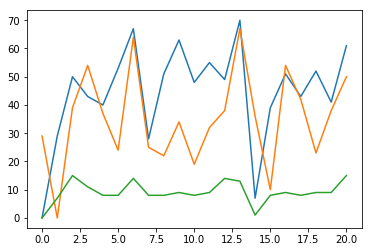

In [163]:
plt.plot(data2_arr_eucl[0]) 
plt.plot(data2_arr_eucl[1])
plt.plot(data2_arr_leven[0])

In [195]:
print(df2_eucl[0])
print(df_leven2[0])




0     0.0 
1     29.0
2     50.0
3     43.0
4     40.0
5     53.0
6     67.0
7     28.0
8     51.0
9     63.0
10    48.0
11    55.0
12    49.0
13    70.0
14    7.0 
15    39.0
16    51.0
17    43.0
18    52.0
19    41.0
20    61.0
Name: 0, dtype: float64
0     0 
1     7 
2     15
3     11
4     8 
5     8 
6     14
7     8 
8     8 
9     9 
10    8 
11    9 
12    14
13    13
14    1 
15    8 
16    9 
17    8 
18    9 
19    9 
20    15
Name: 0, dtype: int64


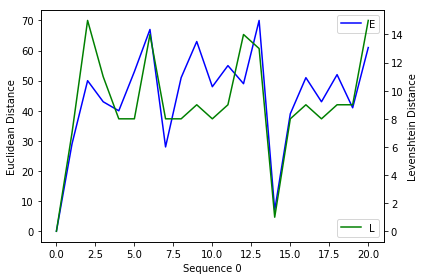

In [214]:
fig, ax = plt.subplots()
x = df2_eucl[0]
ax.plot(x, 'b')
ax.set_xlabel('Sequence 0')
ax.set_ylabel('Euclidean Distance')
plt.legend('Eucl')
ax2 = ax.twinx()

ax2.plot(df_leven2[0], 'g')
plt.legend('Leven')
ax2.set_ylabel('Levenshtein Distance')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

### Hamming Distance
Can only compare with floating values of same length

In [134]:
print (li_padded[0])
print(li_padded[9])
distance.hamming(li_padded[0],li_padded[9])

[ -7.5  -7.5   4.5   4.5   4.5 -10.5   4.5  -3.5  -4.5  -4.5  -4.5  -5.5
   4.5   4.5   8.5   4.5   4.5  -4.5   4.5  -5.5 -10.5   4.5   5.5   4.5
   4.5  -4.5  -0.5  -3.5   0.    0.    0. ]
[-10.5  -7.5   4.5   4.5  -0.5 -10.5  -3.5  -3.5  -4.5  -4.5  -4.5  -5.5
   4.5   4.5   8.5   4.5   4.5  -4.5   4.5  -7.5  -4.5 -10.5   4.5   5.5
   4.5   4.5  -4.5  -0.5  -3.5   0.    0. ]


12

### Misc

In [55]:
#leven
print (data2csv[1].iloc[1])
print(data2csv[1].iloc[10])
distance.levenshtein(data2csv[1].iloc[1],data2csv[1].iloc[10])

WKQENGMWYFYNTDGSM ATG
WAKVNGSWYYLNANGAM ATG


9

In [141]:
#nleven
print (data2csv[1].iloc[1])
print(data2csv[1].iloc[10])
distance.nlevenshtein(data2csv[1].iloc[1],data2csv[1].iloc[10],method=2)

WKQENGMWYFYNTDGSM ATG
WAKVNGSWYYLNANGAM ATG


0.391304347826087

### Difflib SequenceMatcher 

In [1]:
from difflib import SequenceMatcher

In [216]:
sm_data1_test1 = SequenceMatcher(None,li_padded[0],li_padded[2],)
sm_data1_test1.ratio()*100

87.09677419354838

In [217]:
sm_data1_test1 = SequenceMatcher(None,li_padded[42],li_padded[199],)
sm_data1_test1.ratio()*100


67.74193548387096

In [218]:
sm_data1_test2 = SequenceMatcher(None,li_padded[2],li_padded[1],)
sm_data1_test2.ratio()*100

96.7741935483871

In [3]:
sm_data2 = SequenceMatcher(None, "WKQENGMWYGSMALG","WKQENGMWYFYNTDGSM AIG")
sm_data2.ratio()*100

77.77777777777779

In [299]:
sm_data2_test2 = SequenceMatcher(None,li_padded2[0],li_padded2[1],)
sm_data2_test2.ratio()*100

71.42857142857143

In [5]:
sm_data2 = SequenceMatcher(None, "[4,6,7,3,4]","[4,6,7,3,4,2,5,6,4,2,8]")
sm_data2.ratio()*100

64.70588235294117

In [222]:
sm_data2_test1 = SequenceMatcher(None,li_padded2[0],li_padded2[14],)
sm_data2_test1.ratio()*100

95.23809523809523

In [ ]:
# Actual data line1= WKQENGMWYFYNTDGSM ATG and line2 = WKQENGMWYFYNTDGSM AIG
#line1 = "6.5,0.5,-4.5,-5.5,-8.5,-3.5,1.5,6.5,7.5,2.5,7.5,-8.5,5.5,-7.5,-3.5,4.5,1.5,0,-10.5,5.5,-3.5"
#line2= "6.5,0.5,-4.5,-5.5,-8.5,-3.5,1.5,6.5,7.5,2.5,7.5,-8.5,5.5,-7.5,-3.5,4.5,1.5,0,-10.5,-1.5,-3.5"
# >> 98.36065573770492

line1 = "6.5 0.5 -4.5 -5.5 -8.5 -3.5 1.5 6.5 7.5 2.5 7.5 -8.5 5.5 -7.5 -3.5 4.5 1.5 0 -10.5 5.5 -3.5"
line2 = "6.5 0.5 -4.5 -5.5 -8.5 -3.5 1.5 6.5 7.5 2.5 7.5 -8.5 5.5 -7.5 -3.5 4.5 1.5 0 -10.5 -1.5 -3.5"
#>> 98.36065573770492
sm_data2 = SequenceMatcher(None, line1,line2)
sm_data2.ratio()*100

In [ ]:
# chanegd ATG to ALG and compared to AIG
line11 = "6.5,0.5,-4.5,-5.5,-8.5,-3.5,1.5,6.5,7.5,2.5,7.5,-8.5,5.5,-7.5,-3.5,4.5,1.5,0.,-10.5,-0.5,-3.5"
line21= "6.5,0.5,-4.5,-5.5,-8.5,-3.5,1.5,6.5,7.5,2.5,7.5,-8.5,5.5,-7.5,-3.5,4.5,1.5,0.,-10.5,-1.5,-3.5"
sm_data2 = SequenceMatcher(None, line11,line21)
sm_data2.ratio()*100

In [ ]:
#line 18 and 19
#line18 = WLEYNGSWYYLNANGAM ATG
#line19 = WLEYNGSWYYLNSNGAM ATG
sm_data2_test3 = SequenceMatcher(None,li_padded2[18],li_padded2[19],)
sm_data2_test3.ratio()*100



In [ ]:
# lines 18 and 19 in data 2
line18 = "6.5,-0.5,-5.5,7.5,-8.5,-3.5,4.5,6.5,7.5,7.5,-0.5,-8.5,-10.5,-8.5,-3.5,-10.5,1.5,0.,-10.5,5.5,-3.5"
line19 = "6.5,-0.5,-5.5,7.5,-8.5,-3.5,4.5,6.5,7.5,7.5,-0.5,-8.5,4.5,-8.5,-3.5,-10.5,1.5,0.,-10.5,5.5,-3.5"
sm_data2 = SequenceMatcher(None, line18,line19)
sm_data2.ratio()*100

In [ ]:
#testing with 5 value changes
line18 = "-6.5,-1.5,-5.5,7.5,-8.5,-3.5,4.5,6.5,5.5,7.5,-0.5,-8.5,-10.5,-8.5,-3.5,-10.5,1.5,0.,-10.5,5.5,-10.5"
line19 = "6.5,-0.5,-5.5,7.5,-8.5,-3.5,4.5,6.5,7.5,7.5,-0.5,-8.5,4.5,-8.5,-3.5,-10.5,1.5,0.,-10.5,5.5,-3.5"
sm_data2 = SequenceMatcher(None, line18,line19)
sm_data2.ratio()*100

### FASTA

In [66]:
#https://biopython.org/wiki/SeqIO

In [236]:
from Bio import SeqIO
records = list(SeqIO.parse("groEL.fasta", "fasta"))
print(records[3076].seq)  # first seq
print(records[-1].id)  # last record

records.shape


makilkfdedarralergvnkladtvkvtigpkgrnvvidkkfgaptitndgvtiarevelddpyenlgaqlvkevatktndiagdgtttatvlaqalvreglknvaagaspallkkgidaavaavseellatarpiedkadiaavaalsaqdtqvgeliaeamdkvgkdgvitveesntfgleldftegmafdkgylspyfvtdqermeavledpyilinqgkissiqellpllekviqagaskplliiaedvegealstlvvnkirgtfnavavkapgfgdrrkamlqdmatltgaeviseevglkldqvglevlgsarrititkddttivdgagdssavqgriaqikaeientdsdwdreklqerlaklaggvcvikvgaatevelkekkhrledaisatraaveegivsgggsalvhaakvlegglgktgdeatgvavvrkavveplrwiaenaglegyvitskvaelekgqgfnaatgeygdlvkagvidpvkvtrsalenaasiaslllttetlvvekkeeeepaagghshghsh
KND30899.1


AttributeError: 'list' object has no attribute 'shape'

In [233]:
x = np.array(records)

In [234]:
x.shape

(3077,)